# Building up the project

In [ ]:
## About temporal and spatial coefficients:
# - time is first converted to seconds, then time slot using slot-size (which was taken to be 300 s)
# - the latitude, longitude values are converted to whole number value by multiplying required powers of 10

# # Normalization - lat, long : (l - l_min); basically converting to a range [0, l_max - l_min]

# # Formula for correlation:
# dST (x, y) = α.dS (x, y) + (1 − α).dT

# ** α can be set to a value a value greater than 0.5 ---> (spatial corr) > (temporal corr)

# # KNN-ST algorithm:
# Inputs: k, α and type. {α - [0,1]; type - [naive (deduced value is simply avg of k nearest neighbors), weighted (weighted avg of k n neighbors; weight is inversely prop to distance from the data point to be deduced), k - number of neighbors to consider]




In [ ]:
# Algorithm
# //k, α and type are input parameters.
for each missing data-point x do
  # //Find deduced value of x, xd
  Get the values of the k nearest points into array S[1..k]
  # values means?? distance or direct cordinate values?

  and the associated d_ST distances into array D[1..k]; 
  # d_ST (x, y) = α.d_S (x, y) + (1 − α).d_T

  x_d ← 0
  if type = ′naive′ then
    sum_s ← 0
    
    for i = 1 to k do
      sum_s ← sum_s + S[i]
    end for
    xd ← sums/k # simple avg of kNN values

  else #type is weighted avg
    if type = ′weighted′ then
      sum_s ← 0; sum_d ← 0
      
      for i = 1 to k do
        sum_d ← sum_d + 1/D[i]
      end for
      
      for i = 1 to k do
        x_d ← x_d + ((1/D[i])/sum_D).S[i] # Does D and d have different significance?
      end for

    end if
  end if
end for

#### Performance Evaluation

In [ ]:
      summation{i,j,t:S(i,j,t)=0 (|S(i, j, t) − Sˆ(i, j, t)|)} 
NE = ----------------------------------------------------------
        summation{i,j,t:S(i,j,t)=0 (|S(i, j,t)|) }


where, 
S(i, j, t) is the actual sensed value at voxel (i, j, t)
Sˆ(i, j, t) is the deduced value at voxel (i, j, t). 

When, S(i, j, t) = 0, it means value at voxel (i, j, t) is missing (and has to be deduced)

#### Loss probability

In [ ]:
loss probability of 0.8 represents 80% of data is missing.

In [ ]:
ratioS = error(KNN-S)/(error(KNN-S)+error(KNN-T)). 

Here,
error(KNN-S) and error(KNN-T) represent the error arrived
at when KNN-S and KNN-T are applied respectively. 

Similarly, 
ratioT = error(KNN-T)/(error(KNN-S) + error(KNN-T)).


#### The higher the error ratio, the lesser the correlation

In [ ]:
## set α = 1−ratioS since α is the weight assigned to the spatial component. 

### More on Federated Learning


Mounted at /content/drive


In [ ]:
# What I understood is, basically the server has connection with multiple clients (say mobile devices).
# The problem was earlier, client had to send their data (say heath data, messages typed on keyboard) to server so that a model can be built using clients data
# Here, privacy and protection of data was at stake

# Now using FL, the server will initiate a model (based on know parameters to consider) using some weights and biases.
# The same parameters will be sent to all the clients.
# On client devices, a model will be built using the received parameters and then train and update it accordingly. This process will occur on each client
# Once trained, the learned weight and biases will be sent server.
# On server, all the weights and biases will be aggregated (say using mean/average) and then that aggreated updated weights and biases will again be sent to each clients
# The above process will be repeated until we reach a optimal weights and biases [Although in real life, as new data gets generated everyday on client devices, the process should take place regularly to serve clients with the best model]
# Throughtout the process, clients' data never leave their place.



In [ ]:
## How different from Distributed Learnings?
# Definitely different from distributed learnings. In distributed learning, all the high-end devices are generally on same network inside a restricted area.
# Distributed learing is thus much much faster than FL. (one because FL devices are on different networks; second devices have very less processing power)

In [ ]:
# Details of FedAvg
  # FedAvg Loss: aim is to minimize overall global loss 
  # f(w) = summation(k=1 to K){(n_k / n) * F_k(w)}
  # K - number of clients
  # F_k - Client k's loss function; this is getting calculated on each client's individual devices
  # n_k - weighted by size of client k's dataset; devices with larger dataset will have more losses
  # Algorithm: FederatedAveraging. The K clients are
            # indexed by k; B is the local mini-batch size, E is the number
            # of local epochs, and η is the learning rate.

  # Server executes:
    initialize w_0
    for each round t = 1, 2, . . . do
      m ← max(C · K, 1)
      S_t ← (random set of m clients)
    
      for each client k ∈ S_t in parallel do
        w^(k)_(t+1) ← ClientUpdate(k, w_t)
      w_(t+1) ← summation(k=1 to K){(n_k/n) * w^(k)_(t+1)} #n_k - no. of training sample in each client K; n - total training samples;


  # ClientUpdate(k, w): // Run on client k
    B ← (split P_k into batches of size B) # what is p_K???
    for each local epoch i from 1 to E do
      for batch b ∈ B do
        w ← w − η O l(w; b) # this seems the SGD process
    
    return w to server


In [ ]:
# Improvements on FedAvg
  # Problem with FedAvg: 1. assumption that all local devices will have 'E' epochs of SGD; as a result some devices takes longer time than others
                      # 2. FedAvg ends up prefering devices with more data
              
  # 1st improvement: FedProx:
                          # 1. adds a regularization term to penalize large change in weights

  # and many more improvements are there


In [ ]:
# # Frameworks and datasets
#   1. TensorFlow Federated: Machine Learning on Decentralized Data
#   2. PyTorch: PySyft
#   3. Flower: pip install flwr

# 20th Sept, 2021


[Gradient Descent in LR](https://miro.medium.com/max/450/1*G3evFxIAlDchOx5Wl7bV5g.png)

### Batched Gradient Descent
*  In the batch gradient descent, to calculate the gradient of the cost function, we need to sum all training examples for each steps
* If we have 3 millions samples (m training examples) then the gradient descent algorithm should sum 3 millions samples for every epoch. To move a single step, we have to calculate each with 3 million times!

In [ ]:
def gradientDescent(X, y, theta, alpha, num_iters):
    """
       Performs gradient descent to learn theta
       theta: t0 (y-intercept), t1 (slope)
    """
    m = y.size  # number of training examples

    for i in range(num_iters):
        y_hat = np.dot(X, theta)
        theta = theta - alpha * (1.0/m) * np.dot(X.T, y_hat-y)
    return theta

### Stochastic Gradient Descent (SGD)
* In stochastic Gradient Descent, we use one example or one training sample at each iteration instead of using whole dataset to sum all for every steps
* SGD is widely used for larger dataset trainings and computationally faster and can be trained in parallel

In [ ]:
def SGD(f, theta0, alpha, num_iters):
    """ 
       Arguments:
       f -- the function to optimize, it takes a single argument
            and yield two outputs, a cost and the gradient
            with respect to the arguments
       theta0 -- the initial point to start SGD from
       num_iters -- total iterations to run SGD for
       Return:
       theta -- the parameter value after SGD finishes
    """
    start_iter = 0
    theta= theta0
    for iter in xrange(start_iter + 1, num_iters + 1):
        _, grad = f(theta)
        theta = theta - (alpha * grad) # there is NO dot product!
    return theta

### Mini-Batch Gradient Descent
* It is similar like SGD, it uses n samples instead of 1 at each iteration.

# 22nd September, 2021
#### Implementing the Algorithm using python code

In [ ]:
# Details of FedAvg
  # FedAvg Loss: aim is to minimize overall global loss 
  # f(w) = summation(k=1 to K){(n_k / n) * F_k(w)}
  # K - number of clients
  # F_k - Client k's loss function; this is getting calculated on each client's individual devices
  # n_k - weighted by size of client k's dataset; devices with larger dataset will have more losses
  # Algorithm: FederatedAveraging. The K clients are
            # indexed by k; B is the local mini-batch size, E is the number
            # of local epochs, and η is the learning rate.

K = 25 # as we have 25 clients
clients = {} # dictionary

# reading all the clients
for st_code in range(101,126):
    clients[st_code] = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dataNew/station_code"+str(st_code)+".csv")



# Server executes: 
def Server():
  # initialize w_0
  model = Sequential()

  # model.add(Dense(64, kernel_initializer='zeros', bias_initializer='zeros', activation=tf.nn.relu, input_dim=6)) # first dense/hidden layer
  model.add(Dense(64, kernel_initializer='he_uniform', bias_initializer="zeros", activation=tf.nn.relu, input_dim=2))
  model.add(Dropout(0.1))

  model.add(Dense(64, kernel_initializer='he_uniform', bias_initializer="zeros", activation=tf.nn.relu)) # second dense/hidden layer
  model.add(Dropout(0.2))

  model.add(Dense(1, kernel_initializer=init_mode, activation=tf.nn.softmax)) # output layer

  # compile model
  model.compile(loss='mse',
            optimizer='SGD',
            metrics=['mse'])
  
  # return model

  # for each round t = 1, 2, . . . do
  for t in range(1, 5):
    C = np.random.random(1)[0]

    # m ← max(C  K, 1)
    m = max(int(C*K), 1) # m == random number of client selected
    weight_t_plus_1 = [None] * m # matrix to store the weights of all client in each t-round
    n_k = [None] * m # parameters for weighted sum 


    # S_t ← (random set of m clients)
    S = {} # dictionary
    m_clients = np.random.uniform(low=101, high=126, size=(m)).astype(int)
    for client in m_clients:
      S[client] = clients[client]
    
    initial_weights = model.get_weights() # setting initial weights; should be same for all clients

    # for each client k ∈ S_t in parallel do
    client_idx = 0
    for client in S:
      # w^(k)_(t+1) ← ClientUpdate(k, model)
      n_k[client_idx] = Client(client, model) # pass by reference
      weight_t_plus_1[client_idx] = model.get_weights()
      client_idx += 1
      
      # setting weights back to initial weights
      model.set_weights(initial_weights)

    final_weights_t = np.array(weight_t_plus_1[0]) * (n_k[0]/ sum(n_k))

    for idx in range(1, len(weight_t_plus_1)):
      # w_(t+1) ← summation(k=1 to K){(n_k/n) * w^(k)_(t+1)} #n_k - no. of training sample in each client K; n - total training samples;
      final_weights_t += np.array(weight_t_plus_1[0]) * (n_k[idx]/ sum(n_k))

    # setting the aggregated weights
    model.set_weights(final_weights_t)

# -----------------------------------------------------------------------------------------------------------------------


# ClientUpdate(k, w): // Run on client k
def Client(client, model):
  B ← (split P_k into batches of size B) # what is p_K???
  for each local epoch i from 1 to E do
    for batch b ∈ B do
      w ← w − η O l(w; b) # this seems the SGD process

   return w to server

# 24th Sept, 2021

In [ ]:
# Details of FedAvg
  # FedAvg Loss: aim is to minimize overall global loss 
  # f(w) = summation(k=1 to K){(n_k / n) * F_k(w)}
  # K - number of clients
  # F_k - Client k's loss function; this is getting calculated on each client's individual devices
  # n_k - weighted by size of client k's dataset; devices with larger dataset will have more losses
  # Algorithm: FederatedAveraging. The K clients are
            # indexed by k; B is the local mini-batch size, E is the number
            # of local epochs, and η is the learning rate.

K = 25 # as we have 25 clients
clients = {} # dictionary

# reading all the clients
for st_code in range(101,126):
    clients[st_code] = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dataNew/station_code"+str(st_code)+".csv")



# Server executes: 
def Server():
  # initialize w_0
  model = Sequential()

  # model.add(Dense(64, kernel_initializer='zeros', bias_initializer='zeros', activation=tf.nn.relu, input_dim=6)) # first dense/hidden layer
  model.add(Dense(64, kernel_initializer='he_uniform', bias_initializer="zeros", activation=tf.nn.relu, input_dim=2))
  model.add(Dropout(0.1))

  model.add(Dense(64, kernel_initializer='he_uniform', bias_initializer="zeros", activation=tf.nn.relu)) # second dense/hidden layer
  model.add(Dropout(0.2))

  model.add(Dense(1, kernel_initializer=init_mode, activation=tf.nn.softmax)) # output layer

  # initial_weights = model.get_weights() # setting initial weights; should be same for all clients


  # for each round t = 1, 2, . . . do
  for t in range(1, 5):
    C = np.random.random(1)[0] # random number between 0 and 1.

    # m ← max(C  K, 1)
    m = max(int(C*K), 1) # m == random number of client selected
    weight_t_plus_1 = [None] * m # matrix to store the weights of all client in each t-round
    n_k = [None] * m # parameters for weighted sum 


    # S_t ← (random set of m clients)
    # S = {} # dictionary
    S_t = np.random.uniform(low=101, high=126, size=(m)).astype(int)

    # No need for below loop, as server don't need access to client data, server only need clients' number
    # for client in m_clients:
    #   S[client] = clients[client]
    
    initial_weights = model.get_weights() # setting initial weights; should be same for all clients
    # for t= 1 to T, initial_weights would be t-1th's final weights

    # for each client k ∈ S_t in parallel do
    client_idx = 0
    for client in S_t:
      # w^(k)_(t+1) ← ClientUpdate(k, model)
      n_k[client_idx] = Client(client, model) # pass by reference
      weight_t_plus_1[client_idx] = model.get_weights()
      client_idx += 1
      
      # setting weights back to initial weights
      model.set_weights(initial_weights)

    # finding the weighted sum
    final_weights_t = np.array(weight_t_plus_1[0]) * (n_k[0] / sum(n_k))

    for idx in range(1, m):
      # w_(t+1) ← summation(k=1 to K){(n_k/n) * w^(k)_(t+1)} #n_k - no. of training sample in each client K; n - total training samples;
      final_weights_t += np.array(weight_t_plus_1[idx]) * (n_k[idx]/ sum(n_k))

    # setting the aggregated weights
    model.set_weights(final_weights_t)

# -----------------------------------------------------------------------------------------------------------------------


# ClientUpdate(k, w): // Run on client k
def Client(client_idx, model):
# B ← (split P_k into batches of size B) # what is p_K --> each clients' sample size
  B = len(clients[client_idx]) / 1000 # so for each client the batch size would be different depending upon the total sample size
  E = 30 + B # number of local epochs; it will also depend on sample size (indirectly)
  learning_rate = 0.1 # initial learning rate
  decay_rate = 0.1
  momentum = 0.8

  # define the optimizer function
  sgd = SGD(lr = learning_rate, momentum = momentum, decay = decay_rate, nesterov = False)

  # compile the model
  model.compile(loss='mse', 
                optimizer=sgd, 
                metrics=['mse'])
  

# for each local epoch i from 1 to E do
#   for batch b ∈ B do
#     w ← w − η O l(w; b) # this seems the SGD process

  # fitting the model: same as above two for loops
  dataset = clients[client_idx]
  X, y = 
  x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=1)
  keras_model.fit(x_train, y_train, 
                  epochs = E, 
                  batch_size=B,
                  validation_data=(x_test, y_test),
                  verbose=True)

  # return w to server
  # in our case no need for any explicit return; as the model is pass by value
  return dataset.shape[0] # this will return the number of total sample


# 29th Sept, 2021

In [ ]:
!pip install keras

In [ ]:
!pip install tensorflow

In [ ]:
print(tf.__version__)
print(tf.keras.__version__)

2.2.0
2.3.0-tf


In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import initializers
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

import tensorflow as tf
import keras
from keras import layers
from keras import models
from keras import utils
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Activation
from keras.regularizers import l2
from tensorflow.keras.optimizers import SGD # from keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop # instead of from keras.optimizers import RMSprop
from keras import datasets

from keras.callbacks import LearningRateScheduler
from keras.callbacks import History

from keras import losses
from sklearn.utils import shuffle

print(tf.__version__)
print(tf.keras.__version__)

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import initializers
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

import tensorflow as tf
# import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import utils
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Activation
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import SGD # from keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop # instead of from keras.optimizers import RMSprop
# from keras import datasets

# from keras.callbacks import LearningRateScheduler
# from keras.callbacks import History

from tensorflow.keras import losses
from sklearn.utils import shuffle

print(tf.__version__)
print(tf.keras.__version__)

2.2.0
2.3.0-tf


In [ ]:
# Details of FedAvg
  # FedAvg Loss: aim is to minimize overall global loss 
  # f(w) = summation(k=1 to K){(n_k / n) * F_k(w)}
  # K - number of clients
  # F_k - Client k's loss function; this is getting calculated on each client's individual devices
  # n_k - weighted by size of client k's dataset; devices with larger dataset will have more losses
  # Algorithm: FederatedAveraging. The K clients are
            # indexed by k; B is the local mini-batch size, E is the number
            # of local epochs, and η is the learning rate.

K = 25 # as we have 25 clients
clients = {} # dictionary

# reading all the clients
for st_code in range(101,126):
    clients[st_code] = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dataNew/station_code"+str(st_code)+".csv", index_col = 0)


In [ ]:
4//2


2

In [ ]:
# import pandas as pd
# df = pd.DataFrame({'datetime':pd.date_range('2020-01-01 07:00',periods=6)})
# print("DataFrame is:\n", df)
# for d in df['datetime']:
#    df['date'] = d.date()
#    df['time'] = d.time()
# print(df)

DataFrame is:
              datetime
0 2020-01-01 07:00:00
1 2020-01-02 07:00:00
2 2020-01-03 07:00:00
3 2020-01-04 07:00:00
4 2020-01-05 07:00:00
5 2020-01-06 07:00:00
             datetime        date      time
0 2020-01-01 07:00:00  2020-01-06  07:00:00
1 2020-01-02 07:00:00  2020-01-06  07:00:00
2 2020-01-03 07:00:00  2020-01-06  07:00:00
3 2020-01-04 07:00:00  2020-01-06  07:00:00
4 2020-01-05 07:00:00  2020-01-06  07:00:00
5 2020-01-06 07:00:00  2020-01-06  07:00:00


In [ ]:
# Updating time column
for station_id in range(101,126):
  clients[station_id]['Measurement date'] = pd.to_datetime(clients[station_id]['Measurement date']) #changing the data type of column
  for dt in clients[station_id]['Measurement date']:
    clients[station_id]['date'], clients[station_id]['time'] = dt.date(), dt.time()

In [ ]:
clients[101].head()

Measurement date  Station code  ... month  year
0 2017-01-01 00:00:00           101  ...     1  2017
1 2017-01-01 01:00:00           101  ...     1  2017
2 2017-01-01 02:00:00           101  ...     1  2017
3 2017-01-01 03:00:00           101  ...     1  2017
4 2017-01-01 04:00:00           101  ...     1  2017

[5 rows x 16 columns]

In [ ]:
clients[101].columns

Index(['Measurement date', 'Station code', 'Address', 'Latitude', 'Longitude',
       'SO2', 'NO2', 'O3', 'CO', 'PM10', 'PM2.5', 'date', 'time', 'day',
       'month', 'year'],
      dtype='object')

In [ ]:
clients[101].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25905 entries, 0 to 25904
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Measurement date  25905 non-null  datetime64[ns]
 1   Station code      25905 non-null  int64         
 2   Address           25905 non-null  object        
 3   Latitude          25905 non-null  float64       
 4   Longitude         25905 non-null  float64       
 5   SO2               25905 non-null  float64       
 6   NO2               25905 non-null  float64       
 7   O3                25905 non-null  float64       
 8   CO                25905 non-null  float64       
 9   PM10              25905 non-null  float64       
 10  PM2.5             25905 non-null  float64       
 11  date              25905 non-null  object        
 12  time              25905 non-null  object        
 13  day               25905 non-null  int64         
 14  month             2590

In [ ]:
# taking required featuring and dropping rest
for station_id in range(101,126):
  clients[station_id] = clients[station_id][['Latitude', 'Longitude','day', 'month', 'year','CO']].copy()

In [ ]:
t = pd.to_datetime("2017-04-21 05:00")
type(t.month)
# t.day
# type(t.year)
# t.time()

int

In [ ]:
clients[101]

Latitude   Longitude      time        date   CO
0      37.572016  127.005007  23:00:00  2019-12-31  1.2
1      37.572016  127.005007  23:00:00  2019-12-31  1.2
2      37.572016  127.005007  23:00:00  2019-12-31  1.2
3      37.572016  127.005007  23:00:00  2019-12-31  1.2
4      37.572016  127.005007  23:00:00  2019-12-31  1.2
...          ...         ...       ...         ...  ...
25900  37.572016  127.005007  23:00:00  2019-12-31  0.5
25901  37.572016  127.005007  23:00:00  2019-12-31  0.4
25902  37.572016  127.005007  23:00:00  2019-12-31  0.4
25903  37.572016  127.005007  23:00:00  2019-12-31  0.5
25904  37.572016  127.005007  23:00:00  2019-12-31  0.5

[25905 rows x 5 columns]

In [ ]:
# ClientUpdate(k, w): // Run on client k
def Client(client_idx, model):
# B ← (split P_k into batches of size B) # what is p_K --> each clients' sample size
  B = len(clients[client_idx]) / 1000 # so for each client the batch size would be different depending upon the total sample size
  E = 30 + B # number of local epochs; it will also depend on sample size (indirectly)
  learning_rate = 0.1 # initial learning rate
  decay_rate = 0.1
  momentum = 0.8

  # define the optimizer function
  sgd = SGD(lr = learning_rate, momentum = momentum, decay = decay_rate, nesterov = False)

  # compile the model
  model.compile(loss='mse', 
                optimizer=sgd, 
                metrics=['mse'])
  

# for each local epoch i from 1 to E do
#   for batch b ∈ B do
#     w ← w − η O l(w; b) # this seems the SGD process

  # fitting the model: same as above two for loops
  dataset = clients[client_idx]
  X, y = dataset[['Latitude', 'Longitude','day', 'month', 'year']].copy(),  dataset['CO']

  x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=1)

  model.fit(x_train, y_train, 
                  epochs = E, 
                  batch_size=B,
                  validation_data=(x_test, y_test),
                  verbose=True)

  # return w to server
  # in our case no need for any explicit return; as the model is pass by value
  return dataset.shape[0] # this will return the number of total sample


In [ ]:
# Server executes: 
def Server():
  # initialize w_0
  model = Sequential()

  # model.add(Dense(64, kernel_initializer='zeros', bias_initializer='zeros', activation=tf.nn.relu, input_dim=6)) # first dense/hidden layer
  model.add(Dense(64, kernel_initializer='he_uniform', bias_initializer="zeros", activation=tf.nn.relu, input_dim=2))
  model.add(Dropout(0.1))

  model.add(Dense(64, kernel_initializer='he_uniform', bias_initializer="zeros", activation=tf.nn.relu)) # second dense/hidden layer
  model.add(Dropout(0.2))

  model.add(Dense(1, kernel_initializer= 'he_uniform', activation=tf.nn.softmax)) # output layer

  # initial_weights = model.get_weights() # setting initial weights; should be same for all clients


  # for each round t = 1, 2, . . . do
  for t in range(1, 5):
    C = np.random.random(1)[0] # random number between 0 and 1.

    # m ← max(C  K, 1)
    m = max(int(C*K), 1) # m == random number of client selected
    weight_t_plus_1 = [None] * m # matrix to store the weights of all client in each t-round
    n_k = [None] * m # parameters for weighted sum 


    # S_t ← (random set of m clients)
    # S = {} # dictionary
    S_t = np.random.uniform(low=101, high=126, size=(m)).astype(int)

    # No need for below loop, as server don't need access to client data, server only need clients' number
    # for client in m_clients:
    #   S[client] = clients[client]
    
    initial_weights = model.get_weights() # setting initial weights; should be same for all clients
    # for t= 1 to T, initial_weights would be t-1th's final weights

    # for each client k ∈ S_t in parallel do
    client_idx = 0
    for client in S_t:
      # w^(k)_(t+1) ← ClientUpdate(k, model)
      n_k[client_idx] = Client(client, model) # pass by reference
      weight_t_plus_1[client_idx] = model.get_weights()
      client_idx += 1
      
      # setting weights back to initial weights
      model.set_weights(initial_weights)

    # finding the weighted sum
    final_weights_t = np.array(weight_t_plus_1[0]) * (n_k[0] / sum(n_k))

    for idx in range(1, m):
      # w_(t+1) ← summation(k=1 to K){(n_k/n) * w^(k)_(t+1)} #n_k - no. of training sample in each client K; n - total training samples;
      final_weights_t += np.array(weight_t_plus_1[idx]) * (n_k[idx]/ sum(n_k))

    # setting the aggregated weights
    model.set_weights(final_weights_t)

  print(model.get_weights())

In [ ]:
# Server()

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


TypeError: ignored

# Codes where actual Implementation of both FL & TL started
# 30th sept, 2021

In [ ]:
# Details of FedAvg
  # FedAvg Loss: aim is to minimize overall global loss 
  # f(w) = summation(k=1 to K){(n_k / n) * F_k(w)}
  # K - number of clients
  # F_k - Client k's loss function; this is getting calculated on each client's individual devices
  # n_k - weighted by size of client k's dataset; devices with larger dataset will have more losses
  # Algorithm: FederatedAveraging. The K clients are
            # indexed by k; B is the local mini-batch size, E is the number
            # of local epochs, and η is the learning rate.

K = 25 # as we have 25 clients
clients = {} # dictionary

# reading all the clients
for st_code in range(101,126):
    clients[st_code] = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dataNew/station_code"+str(st_code)+".csv", index_col = 0)


In [ ]:
# taking required featuring and dropping rest
for station_id in range(101,126):
  clients[station_id] = clients[station_id][['Latitude', 'Longitude','day', 'month', 'year','CO']].copy()

In [ ]:
# ClientUpdate(k, w): // Run on client k
def Client(client_idx, model):
# B ← (split P_k into batches of size B) # what is p_K --> each clients' sample size
  B = 1 #int(len(clients[client_idx]) * 0.1) # so for each client the batch size would be different depending upon the total sample size
  E = 1 #max(30, B/1 # number of local epochs; it will also depend on sample size (indirectly)
  learning_rate = 0.1 # initial learning rate
  decay_rate = 0.1
  momentum = 0.8

  # define the optimizer function
  sgd = SGD(lr = learning_rate, momentum = momentum, decay = decay_rate, nesterov = False)

  # compile the model
  model.compile(loss='mse', 
                optimizer=sgd, 
                metrics=['mse'])
  

# for each local epoch i from 1 to E do
#   for batch b ∈ B do
#     w ← w − η O l(w; b) # this seems the SGD process

  # fitting the model: same as above two for loops
  dataset = clients[client_idx]
  
  X, y = dataset[['Latitude', 'Longitude','day', 'month', 'year']].copy(),  dataset['CO']

  x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=1)

  try:
    model.fit(x_train, y_train, 
                    epochs = E, 
                    batch_size=B,
                    validation_data=(x_test, y_test),
                    verbose=True)
  except Exception as e:
    print(e)
    print("tata bye bye")

  # return w to server
  # in our case no need for any explicit return; as the model is pass by value
  return dataset.shape[0] # this will return the number of total sample


In [ ]:
# Server executes: 
def Server():
  # initialize w_0
  model = Sequential()

  # model.add(Dense(64, kernel_initializer='zeros', bias_initializer='zeros', activation=tf.nn.relu, input_dim=6)) # first dense/hidden layer
  model.add(Dense(64, kernel_initializer='he_uniform', bias_initializer="zeros", activation=tf.nn.relu, input_dim=5))
  model.add(Dropout(0.1))

  model.add(Dense(64, kernel_initializer='he_uniform', bias_initializer="zeros", activation=tf.nn.relu)) # second dense/hidden layer
  model.add(Dropout(0.2))

  model.add(Dense(1, kernel_initializer= 'he_uniform', activation=tf.nn.softmax)) # output layer

  # initial_weights = model.get_weights() # setting initial weights; should be same for all clients


  # for each round t = 1, 2, . . . do
  for t in range(1, 5):
    C = np.random.random(1)[0] # random number between 0 and 1.

    # m ← max(C  K, 1)
    m = max(int(C*K), 1) # m == random number of client selected
    weight_t_plus_1 = [None] * m # matrix to store the weights of all client in each t-round
    n_k = [None] * m # parameters for weighted sum 


    # S_t ← (random set of m clients)
    # S = {} # dictionary
    S_t = np.random.uniform(low=101, high=126, size=(m)).astype(int)

    # No need for below loop, as server don't need access to client data, server only need clients' number
    # for client in m_clients:
    #   S[client] = clients[client]
    
    initial_weights = model.get_weights() # setting initial weights; should be same for all clients
    # for t= 1 to T, initial_weights would be t-1th's final weights

    # for each client k ∈ S_t in parallel do
    client_idx = 0
    for client in S_t:
      # w^(k)_(t+1) ← ClientUpdate(k, model)
      n_k[client_idx] = Client(client, model) # pass by reference
      weight_t_plus_1[client_idx] = model.get_weights()
      client_idx += 1
      
      # setting weights back to initial weights
      model.set_weights(initial_weights)

    # finding the weighted sum
    final_weights_t = np.array(weight_t_plus_1[0]) * (n_k[0] / sum(n_k))

    for idx in range(1, m):
      # w_(t+1) ← summation(k=1 to K){(n_k/n) * w^(k)_(t+1)} #n_k - no. of training sample in each client K; n - total training samples;
      final_weights_t += np.array(weight_t_plus_1[idx]) * (n_k[idx]/ sum(n_k))

    # setting the aggregated weights
    model.set_weights(final_weights_t)

  print(model.get_weights())

In [ ]:
Server()



---



---



In [ ]:
loss_probability = (missing values)/(total rows)
# 0.1 --> 10/100
NE = summation(abs(y_true - y_predicted)) / summation(y_true)

# 1st october : Both FL and Traditional ML

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import initializers
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

import tensorflow as tf
# import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import utils
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Activation
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import SGD # from keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop # instead of from keras.optimizers import RMSprop
# from keras import datasets

# from keras.callbacks import LearningRateScheduler
# from keras.callbacks import History

from tensorflow.keras import losses
from sklearn.utils import shuffle

print(tf.__version__)
print(tf.keras.__version__)

2.6.0
2.6.0


In [ ]:
%%time
# getting input data
K = 25 # as we have 25 clients
clients = {} # dictionary

# reading all the clients
for st_code in range(101,126):
    clients[st_code] = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dataNew/station_code"+str(st_code)+".csv", index_col = 0)

    clients[st_code]['Measurement date'] = pd.to_datetime(clients[st_code]['Measurement date'])

    clients[st_code]['year'] = clients[st_code]['Measurement date'].dt.year
    clients[st_code]['month'] = clients[st_code]['Measurement date'].dt.month
    clients[st_code]['week'] = clients[st_code]['Measurement date'].dt.week
    clients[st_code]['day'] = clients[st_code]['Measurement date'].dt.day
    clients[st_code]['hour'] = clients[st_code]['Measurement date'].dt.hour
    clients[st_code]['minute'] = clients[st_code]['Measurement date'].dt.minute # minute is not significant; as only 0 values
    clients[st_code]['dayOfWeek'] = clients[st_code]['Measurement date'].dt.dayofweek

    # choosing features
    clients[st_code] = clients[st_code][['Latitude', 'Longitude','year', 'month', 'week', 'day', 'hour', 'dayOfWeek', 'CO']]



# dataset['date'], dataset['time'] = dataset['Measurement date'].dt.date, dataset['Measurement date'].dt.time



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  del sys.path[0]


CPU times: user 2.59 s, sys: 233 ms, total: 2.82 s
Wall time: 20.8 s


In [ ]:
# merging all the clients data
import pandas as pd

frames = list(clients.values())

dataset = pd.concat(frames)
display(dataset)


Latitude   Longitude  year  month  week  day  hour  dayOfWeek   CO
0       37.572016  127.005007  2017      1    52    1     0          6  1.2
1       37.572016  127.005007  2017      1    52    1     1          6  1.2
2       37.572016  127.005007  2017      1    52    1     2          6  1.2
3       37.572016  127.005007  2017      1    52    1     3          6  1.2
4       37.572016  127.005007  2017      1    52    1     4          6  1.2
...           ...         ...   ...    ...   ...  ...   ...        ...  ...
647506  37.544962  127.136792  2019     12     1   31    19          1  0.5
647507  37.544962  127.136792  2019     12     1   31    20          1  0.4
647508  37.544962  127.136792  2019     12     1   31    21          1  0.4
647509  37.544962  127.136792  2019     12     1   31    22          1  0.5
647510  37.544962  127.136792  2019     12     1   31    23          1  0.5

[647511 rows x 9 columns]

In [ ]:
X, y = dataset.drop('CO', axis=1),  dataset['CO']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=0)
x_test, y_test = x_test.to_numpy(), y_test.to_numpy()
x_test[0].shape

(8,)

In [ ]:
# ClientUpdate(k, w): // Run on client k
def Client(client_idx, model, loss_p):
    # B ← (split P_k into batches of size B) # what is p_K --> each clients' sample size
    B = 1000 #int(len(clients[client_idx]) * 0.01) # so for each client the batch size would be different depending upon the total sample size
    E = 12 #max(30, B//10) # number of local epochs; it will also depend on sample size (indirectly)
    learning_rate = 0.1 # initial learning rate
    decay_rate = 0.1
    momentum = 0.8

    # define the optimizer function
    sgd = SGD(learning_rate = learning_rate, momentum = momentum, decay = decay_rate, nesterov = False)

    # compile the model
    model.compile(loss='mse', 
                optimizer=sgd, 
                metrics=['mse'])


    # for each local epoch i from 1 to E do
    #   for batch b ∈ B do
    #     w ← w − η O l(w; b) # this seems the SGD process

    # fitting the model: same as above two for loops
    data = clients[client_idx]
    # data = dataset.loc[dataset['Station code'] == client_idx]

    X, y = data[['Latitude', 'Longitude','year', 'month', 'week', 'day', 'hour', 'dayOfWeek']],  data['CO']

    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = loss_p, random_state=1)

    try:
        model.fit(x_train, y_train, 
                    epochs = E, 
                    batch_size=B,
    #                     validation_data=(x_test, y_test),
                    verbose=False)
    except Exception as e:
        print(e)
        print("tata bye bye")

    # return w to server
    # in our case no need for any explicit return; as the model is pass by value
    return data.shape[0] # this will return the number of total sample


In [ ]:
# Server executes: 
def Server(loss_p):
    # initialize w_0
    model = Sequential()
    
    # model.add(Dense(64, kernel_initializer='zeros', bias_initializer='zeros', activation=tf.nn.relu, input_dim=6)) # first dense/hidden layer
    model.add(Dense(64, kernel_initializer='he_uniform', bias_initializer="zeros", activation=tf.nn.relu, input_dim=8))
    model.add(Dropout(0.1))

    model.add(Dense(64, kernel_initializer='he_uniform', bias_initializer="zeros", activation=tf.nn.relu)) # second dense/hidden layer
    model.add(Dropout(0.2))

    model.add(Dense(1, kernel_initializer= 'he_uniform', activation=tf.nn.softmax)) # output layer

    # initial_weights = model.get_weights() # setting initial weights; should be same for all clients


# for each round t = 1, 2, . . . do
    for t in range(1, 5):
        C = np.random.random(1)[0] # random number between 0 and 1.

        # m ← max(C  K, 1)
        m = max(int(C*K), 1) # m == random number of client selected
        weight_t_plus_1 = [None] * m # matrix to store the weights of all client in each t-round
        n_k = [None] * m # parameters for weighted sum 


        # S_t ← (random set of m clients)
        # S = {} # dictionary
        S_t = np.random.uniform(low=101, high=126, size=(m)).astype(int)

        # No need for below loop, as server don't need access to client data, server only need clients' number
        # for client in m_clients:
        #   S[client] = clients[client]

        initial_weights = model.get_weights() # setting initial weights; should be same for all clients
        # for t= 1 to T, initial_weights would be t-1th's final weights

        # for each client k ∈ S_t in parallel do
        client_idx = 0
        for client in S_t:
            # w^(k)_(t+1) ← ClientUpdate(k, model)
            n_k[client_idx] = Client(client, model, loss_p) # pass by reference
            weight_t_plus_1[client_idx] = model.get_weights()
            client_idx += 1

            # setting weights back to initial weights
            model.set_weights(initial_weights)

        # finding the weighted sum
        final_weights_t = np.array(weight_t_plus_1[0]) * (n_k[0] / sum(n_k))

        for idx in range(1, m):
          # w_(t+1) ← summation(k=1 to K){(n_k/n) * w^(k)_(t+1)} #n_k - no. of training sample in each client K; n - total training samples;
          final_weights_t += np.array(weight_t_plus_1[idx]) * (n_k[idx]/ sum(n_k))

        # setting the aggregated weights
        model.set_weights(final_weights_t)


#         print(model.get_weights())
    # return error_clients(model, loss_p)) # THIS LINE WON'T BE THERE IN REAL SERVER
    return model

In [ ]:
def error_clients(model, loss_p):
    
    X, y = dataset.drop('CO', axis=1),  dataset['CO']
    
#     for loss_p in loss_prob:
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = loss_p, random_state=0)
   
    # adjusting the dimensions
    x_test, y_test = x_test.to_numpy(), y_test.to_numpy()
    x_test = x_test.reshape(x_test.shape[0], 1,  x_test.shape[1])
    y_test = y_test.reshape(y_test.shape[0],1,1)

    y_predicted = model.predict(x_test)
        
    NE = sum(abs(y_test - y_predicted)) / sum(y_test)
    return NE  
          

In [ ]:
# Final plotting
K = 25 # as we have 25 clients

loss_prob = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
models = []
errors = []

for loss_p in loss_prob:
  model = Server(loss_p)
  errors.append(error_clients(model, loss_p))

# import seaborn as sns
# sns.lineplot(x = loss_prob, y = errors, markers=True, dashes=False)

In [ ]:
errors[0]

array([[1.02276379]])

In [ ]:
errors[0].ravel()[0]

1.0227637921798483

In [ ]:
# reshaping errors
for err_idx in range(len(errors)):
  errors[err_idx] = errors[err_idx].ravel()[0]

In [ ]:
errors

[1.0227637921798483,
 1.0231448768600002,
 1.0219129321046316,
 1.0227209476040346,
 1.0226674799061215,
 1.0220998885081014,
 1.02239743534543,
 1.0222275615431877,
 1.0221784548709607]

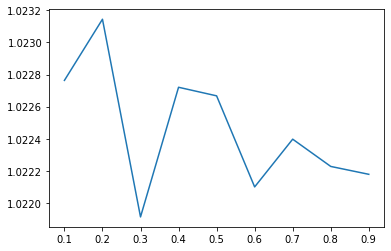

In [ ]:
import seaborn as sns
sns.lineplot(x = loss_prob, y = errors, markers=True, dashes=False)

In [ ]:
def traditional_ML(loss_p):
  # initialize w_0
  model = Sequential()

  # model.add(Dense(64, kernel_initializer='zeros', bias_initializer='zeros', activation=tf.nn.relu, input_dim=6)) # first dense/hidden layer
  model.add(Dense(64, kernel_initializer='he_uniform', bias_initializer="zeros", activation=tf.nn.relu, input_dim=8))
  model.add(Dropout(0.1))

  model.add(Dense(64, kernel_initializer='he_uniform', bias_initializer="zeros", activation=tf.nn.relu)) # second dense/hidden layer
  model.add(Dropout(0.2))

  model.add(Dense(1, kernel_initializer= 'he_uniform', activation=tf.nn.softmax)) # output layer

  # initial_weights = model.get_weights() # setting initial weights; should be same for all clients


  B = 1000 #int(len(clients[client_idx]) * 0.01) # so for each client the batch size would be different depending upon the total sample size
  E = 25 #max(30, B//10) # number of local epochs; it will also depend on sample size (indirectly)
  learning_rate = 0.1 # initial learning rate
  decay_rate = 0.1
  momentum = 0.8

  # define the optimizer function
  sgd = SGD(learning_rate = learning_rate, momentum = momentum, decay = decay_rate, nesterov = False)

  # compile the model
  model.compile(loss='mse', 
              optimizer=sgd, 
              metrics=['mse'])

  X, y = dataset[['Latitude', 'Longitude','year', 'month', 'week', 'day', 'hour', 'dayOfWeek']],  dataset['CO']

  x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = loss_p, random_state=1)

  model.fit(x_train, y_train, 
                  epochs = E, 
                  batch_size=B,
  #                     validation_data=(x_test, y_test),
                  verbose=False)
      
  x_test, y_test = x_test.to_numpy(), y_test.to_numpy()

  # adjusting the dimensions
  x_test = x_test.reshape(x_test.shape[0], 1,  x_test.shape[1])
  y_test = y_test.reshape(y_test.shape[0],1,1)
  y_predicted = model.predict(x_test)
      
  NE = sum(abs(y_test - y_predicted)) / sum(y_test)
  return NE


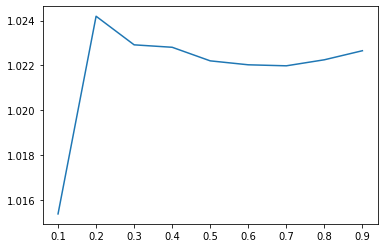

In [ ]:
# Final plotting
K = 25 # as we have 25 clients

loss_prob = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
errors = []

for loss_p in loss_prob:
  error = traditional_ML(loss_p)
  errors.append(error)

# reshaping errors
for err_idx in range(len(errors)):
  errors[err_idx] = errors[err_idx].ravel()[0]

import seaborn as sns
sns.lineplot(x = loss_prob, y = errors, markers=True, dashes=False)

# 3rd October
* Changed the NE's denominator to absolute values

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import initializers
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

import tensorflow as tf
# import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import utils
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Activation
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import SGD # from keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop # instead of from keras.optimizers import RMSprop
# from keras import datasets

# from keras.callbacks import LearningRateScheduler
# from keras.callbacks import History

from tensorflow.keras import losses
from sklearn.utils import shuffle

print(tf.__version__)
print(tf.keras.__version__)

2.6.0
2.6.0


In [ ]:
%%time
# getting input data
K = 25 # as we have 25 clients
clients = {} # dictionary

# reading all the clients
for st_code in range(101,126):
    clients[st_code] = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dataNew/station_code"+str(st_code)+".csv", index_col = 0)

    clients[st_code]['Measurement date'] = pd.to_datetime(clients[st_code]['Measurement date'])

    clients[st_code]['year'] = clients[st_code]['Measurement date'].dt.year
    clients[st_code]['month'] = clients[st_code]['Measurement date'].dt.month
    clients[st_code]['week'] = clients[st_code]['Measurement date'].dt.week
    clients[st_code]['day'] = clients[st_code]['Measurement date'].dt.day
    clients[st_code]['hour'] = clients[st_code]['Measurement date'].dt.hour
    clients[st_code]['minute'] = clients[st_code]['Measurement date'].dt.minute # minute is not significant; as only 0 values
    clients[st_code]['dayOfWeek'] = clients[st_code]['Measurement date'].dt.dayofweek

    # choosing features
    clients[st_code] = clients[st_code][['Latitude', 'Longitude','year', 'month', 'week', 'day', 'hour', 'dayOfWeek', 'CO']]



# dataset['date'], dataset['time'] = dataset['Measurement date'].dt.date, dataset['Measurement date'].dt.time



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  del sys.path[0]


CPU times: user 2.86 s, sys: 222 ms, total: 3.08 s
Wall time: 17.7 s


In [ ]:
# merging all the clients data
import pandas as pd

frames = list(clients.values())

dataset = pd.concat(frames)
display(dataset)


Latitude   Longitude  year  month  week  day  hour  dayOfWeek   CO
0       37.572016  127.005007  2017      1    52    1     0          6  1.2
1       37.572016  127.005007  2017      1    52    1     1          6  1.2
2       37.572016  127.005007  2017      1    52    1     2          6  1.2
3       37.572016  127.005007  2017      1    52    1     3          6  1.2
4       37.572016  127.005007  2017      1    52    1     4          6  1.2
...           ...         ...   ...    ...   ...  ...   ...        ...  ...
647506  37.544962  127.136792  2019     12     1   31    19          1  0.5
647507  37.544962  127.136792  2019     12     1   31    20          1  0.4
647508  37.544962  127.136792  2019     12     1   31    21          1  0.4
647509  37.544962  127.136792  2019     12     1   31    22          1  0.5
647510  37.544962  127.136792  2019     12     1   31    23          1  0.5

[647511 rows x 9 columns]

In [ ]:
X, y = dataset.drop('CO', axis=1),  dataset['CO']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=0)
x_test, y_test = x_test.to_numpy(), y_test.to_numpy()
x_test[0].shape

(8,)

In [ ]:
# ClientUpdate(k, w): // Run on client k
def Client(client_idx, model, loss_p):
    # B ← (split P_k into batches of size B) # what is p_K --> each clients' sample size
    B = 1000 #int(len(clients[client_idx]) * 0.01) # so for each client the batch size would be different depending upon the total sample size
    E = 12 #max(30, B//10) # number of local epochs; it will also depend on sample size (indirectly)
    learning_rate = 0.1 # initial learning rate
    decay_rate = 0.1
    momentum = 0.8

    # define the optimizer function
    sgd = SGD(learning_rate = learning_rate, momentum = momentum, decay = decay_rate, nesterov = False)

    # compile the model
    model.compile(loss='mse', 
                optimizer=sgd, 
                metrics=['mse'])


    # for each local epoch i from 1 to E do
    #   for batch b ∈ B do
    #     w ← w − η O l(w; b) # this seems the SGD process

    # fitting the model: same as above two for loops
    data = clients[client_idx]
    # data = dataset.loc[dataset['Station code'] == client_idx]

    X, y = data[['Latitude', 'Longitude','year', 'month', 'week', 'day', 'hour', 'dayOfWeek']],  data['CO']

    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = loss_p, random_state=1)

    try:
        model.fit(x_train, y_train, 
                    epochs = E, 
                    batch_size=B,
    #                     validation_data=(x_test, y_test),
                    verbose=False)
    except Exception as e:
        print(e)
        print("tata bye bye")

    # return w to server
    # in our case no need for any explicit return; as the model is pass by value
    return data.shape[0] # this will return the number of total sample


In [ ]:
# Server executes: 
def Server(loss_p):
    # initialize w_0
    model = Sequential()
    
    # model.add(Dense(64, kernel_initializer='zeros', bias_initializer='zeros', activation=tf.nn.relu, input_dim=6)) # first dense/hidden layer
    model.add(Dense(64, kernel_initializer='he_uniform', bias_initializer="zeros", activation=tf.nn.relu, input_dim=8))
    model.add(Dropout(0.1))

    model.add(Dense(64, kernel_initializer='he_uniform', bias_initializer="zeros", activation=tf.nn.relu)) # second dense/hidden layer
    model.add(Dropout(0.2))

    model.add(Dense(1, kernel_initializer= 'he_uniform', activation=tf.nn.softmax)) # output layer

    # initial_weights = model.get_weights() # setting initial weights; should be same for all clients


# for each round t = 1, 2, . . . do
    for t in range(1, 5):
        C = np.random.random(1)[0] # random number between 0 and 1.

        # m ← max(C  K, 1)
        m = max(int(C*K), 1) # m == random number of client selected
        weight_t_plus_1 = [None] * m # matrix to store the weights of all client in each t-round
        n_k = [None] * m # parameters for weighted sum 


        # S_t ← (random set of m clients)
        # S = {} # dictionary
        S_t = np.random.uniform(low=101, high=126, size=(m)).astype(int)

        # No need for below loop, as server don't need access to client data, server only need clients' number
        # for client in m_clients:
        #   S[client] = clients[client]

        initial_weights = model.get_weights() # setting initial weights; should be same for all clients
        # for t= 1 to T, initial_weights would be t-1th's final weights

        # for each client k ∈ S_t in parallel do
        client_idx = 0
        for client in S_t:
            # w^(k)_(t+1) ← ClientUpdate(k, model)
            n_k[client_idx] = Client(client, model, loss_p) # pass by reference
            weight_t_plus_1[client_idx] = model.get_weights()
            client_idx += 1

            # setting weights back to initial weights
            model.set_weights(initial_weights)

        # finding the weighted sum
        final_weights_t = np.array(weight_t_plus_1[0]) * (n_k[0] / sum(n_k))

        for idx in range(1, m):
          # w_(t+1) ← summation(k=1 to K){(n_k/n) * w^(k)_(t+1)} #n_k - no. of training sample in each client K; n - total training samples;
          final_weights_t += np.array(weight_t_plus_1[idx]) * (n_k[idx]/ sum(n_k))

        # setting the aggregated weights
        model.set_weights(final_weights_t)


#         print(model.get_weights())
    # return error_clients(model, loss_p)) # THIS LINE WON'T BE THERE IN REAL SERVER
    return model

In [ ]:
def error_clients(model, loss_p):
    
    X, y = dataset.drop('CO', axis=1),  dataset['CO']
    
#     for loss_p in loss_prob:
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = loss_p, random_state=0)
   
    # adjusting the dimensions
    x_test, y_test = x_test.to_numpy(), y_test.to_numpy()
    x_test = x_test.reshape(x_test.shape[0], 1,  x_test.shape[1])
    y_test = y_test.reshape(y_test.shape[0],1,1)

    y_predicted = model.predict(x_test)
        
    NE = sum(abs(y_test - y_predicted)) / sum(abs(y_test))
    return NE  
          

In [ ]:
# Final plotting
K = 25 # as we have 25 clients

loss_prob = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
models = []
errors = []

for loss_p in loss_prob:
  model = Server(loss_p)
  errors.append(error_clients(model, loss_p))

# import seaborn as sns
# sns.lineplot(x = loss_prob, y = errors, markers=True, dashes=False)

In [ ]:
errors[0]

array([[0.99940524]])

In [ ]:
errors[0].ravel()[0]

0.9994052433742779

In [ ]:
# reshaping errors
for err_idx in range(len(errors)):
  errors[err_idx] = errors[err_idx].ravel()[0]

In [ ]:
errors

[0.9994052433742779,
 1.0006287648025747,
 0.998888262480627,
 0.9988904977582561,
 0.9988322846636193,
 0.9980396480470268,
 0.9984262095374543,
 0.9980064719396179,
 0.9978903897601966]

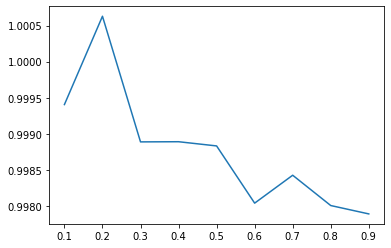

In [ ]:
import seaborn as sns
sns.lineplot(x = loss_prob, y = errors, markers=True, dashes=False)

In [ ]:
def traditional_ML(loss_p):
  # initialize w_0
  model = Sequential()

  # model.add(Dense(64, kernel_initializer='zeros', bias_initializer='zeros', activation=tf.nn.relu, input_dim=6)) # first dense/hidden layer
  model.add(Dense(64, kernel_initializer='he_uniform', bias_initializer="zeros", activation=tf.nn.relu, input_dim=8))
  model.add(Dropout(0.1))

  model.add(Dense(64, kernel_initializer='he_uniform', bias_initializer="zeros", activation=tf.nn.relu)) # second dense/hidden layer
  model.add(Dropout(0.2))

  model.add(Dense(1, kernel_initializer= 'he_uniform', activation=tf.nn.softmax)) # output layer

  # initial_weights = model.get_weights() # setting initial weights; should be same for all clients


  B = 1000 #int(len(clients[client_idx]) * 0.01) # so for each client the batch size would be different depending upon the total sample size
  E = 25 #max(30, B//10) # number of local epochs; it will also depend on sample size (indirectly)
  learning_rate = 0.1 # initial learning rate
  decay_rate = 0.1
  momentum = 0.8

  # define the optimizer function
  sgd = SGD(learning_rate = learning_rate, momentum = momentum, decay = decay_rate, nesterov = False)

  # compile the model
  model.compile(loss='mse', 
              optimizer=sgd, 
              metrics=['mse'])


  # for each local epoch i from 1 to E do
  #   for batch b ∈ B do
  #     w ← w − η O l(w; b) # this seems the SGD process

  # fitting the model: same as above two for loops

  # data = dataset.loc[dataset['Station code'] == client_idx]

  X, y = dataset[['Latitude', 'Longitude','year', 'month', 'week', 'day', 'hour', 'dayOfWeek']],  dataset['CO']

  x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = loss_p, random_state=1)

  model.fit(x_train, y_train, 
                  epochs = E, 
                  batch_size=B,
  #                     validation_data=(x_test, y_test),
                  verbose=False)
      
  x_test, y_test = x_test.to_numpy(), y_test.to_numpy()

  # adjusting the dimensions
  x_test = x_test.reshape(x_test.shape[0], 1,  x_test.shape[1])
  y_test = y_test.reshape(y_test.shape[0],1,1)
  y_predicted = model.predict(x_test)
      
  NE = sum(abs(y_test - y_predicted)) / sum(abs(y_test))
  return NE


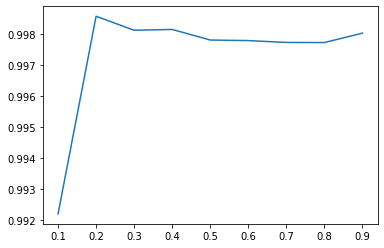

In [ ]:
# Final plotting
K = 25 # as we have 25 clients

loss_prob = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
errors = []

for loss_p in loss_prob:
  error = traditional_ML(loss_p)
  errors.append(error)

# reshaping errors
for err_idx in range(len(errors)):
  errors[err_idx] = errors[err_idx].ravel()[0]

import seaborn as sns
sns.lineplot(x = loss_prob, y = errors, markers=True, dashes=False)

In [ ]:
errors

[0.9922101026338223,
 0.9985838673448548,
 0.9981318469734085,
 0.9981583889165875,
 0.9978167890597636,
 0.9977991524296327,
 0.9977395710039685,
 0.9977349901494397,
 0.9980390653733856]

# 5th October
* Splitting train - test data before FL training, and testing with completely new data
* (future) Normalization (min-max scaller) on features --> NOT YET IMPLEMENTED

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import initializers
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

import tensorflow as tf
# import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import utils
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Activation
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import SGD # from keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop # instead of from keras.optimizers import RMSprop
# from keras import datasets

# from keras.callbacks import LearningRateScheduler
# from keras.callbacks import History

from tensorflow.keras import losses
from sklearn.utils import shuffle

print(tf.__version__)
print(tf.keras.__version__)

2.6.0
2.6.0


In [ ]:
# ClientUpdate(k, w): // Run on client k
def Client(client_idx, model):
    # B ← (split P_k into batches of size B) # what is p_K --> each clients' sample size
    B = 1000 #int(len(clients[client_idx]) * 0.01) # so for each client the batch size would be different depending upon the total sample size
    E = 12 #max(30, B//10) # number of local epochs; it will also depend on sample size (indirectly)
    learning_rate = 0.1 # initial learning rate
    decay_rate = 0.1
    momentum = 0.8

    # define the optimizer function
    sgd = SGD(learning_rate = learning_rate, momentum = momentum, decay = decay_rate, nesterov = False)

    # compile the model
    model.compile(loss='mse', 
                optimizer=sgd, 
                metrics=['mse'])


    # for each local epoch i from 1 to E do
    #   for batch b ∈ B do
    #     w ← w − η O l(w; b) # this seems the SGD process

    # fitting the model: same as above two for loops
    data = clients_cut[client_idx]
    # data = dataset.loc[dataset['Station code'] == client_idx]

    X, y = data[['Latitude', 'Longitude','year', 'month', 'week', 'day', 'hour', 'dayOfWeek']],  data['CO']

    x_train, x_val, y_train, y_val = train_test_split(X, y, test_size = 0.1, random_state=1)

    try:
        model.fit(x_train, y_train, 
                    epochs = E, 
                    batch_size=B,
                    validation_data=(x_val, y_val),
                    verbose=False)
    except Exception as e:
        print(e)
        print("tata bye bye")

    # return w to server
    # in our case no need for any explicit return; as the model is pass by value
    return data.shape[0] # this will return the number of total sample


In [ ]:
# Server executes: 
def Server():
    # initialize w_0
    model = Sequential()
    
    # model.add(Dense(64, kernel_initializer='zeros', bias_initializer='zeros', activation=tf.nn.relu, input_dim=6)) # first dense/hidden layer
    model.add(Dense(64, kernel_initializer='he_uniform', bias_initializer="zeros", activation=tf.nn.relu, input_dim=8))
    model.add(Dropout(0.1))

    model.add(Dense(64, kernel_initializer='he_uniform', bias_initializer="zeros", activation=tf.nn.relu)) # second dense/hidden layer
    model.add(Dropout(0.2))

    model.add(Dense(1, kernel_initializer= 'he_uniform', activation=tf.nn.softmax)) # output layer

    # initial_weights = model.get_weights() # setting initial weights; should be same for all clients


# for each round t = 1, 2, . . . do
    for t in range(1, 5):
        C = np.random.random(1)[0] # random number between 0 and 1.

        # m ← max(C  K, 1)
        m = max(int(C*K), 1) # m == random number of client selected
        weight_t_plus_1 = [None] * m # matrix to store the weights of all client in each t-round
        n_k = [None] * m # parameters for weighted sum 


        # S_t ← (random set of m clients)
        # S = {} # dictionary
        S_t = np.random.uniform(low=101, high=126, size=(m)).astype(int)

        # No need for below loop, as server don't need access to client data, server only need clients' number
        # for client in m_clients:
        #   S[client] = clients[client]

        initial_weights = model.get_weights() # setting initial weights; should be same for all clients
        # for t= 1 to T, initial_weights would be t-1th's final weights

        # for each client k ∈ S_t in parallel do
        client_idx = 0
        for client in S_t:
            # w^(k)_(t+1) ← ClientUpdate(k, model)
            n_k[client_idx] = Client(client, model) # pass by reference for model
            weight_t_plus_1[client_idx] = model.get_weights()
            client_idx += 1

            # setting weights back to initial weights
            model.set_weights(initial_weights)

        # finding the weighted sum
        final_weights_t = np.array(weight_t_plus_1[0]) * (n_k[0] / sum(n_k))

        for idx in range(1, m):
          # w_(t+1) ← summation(k=1 to K){(n_k/n) * w^(k)_(t+1)} #n_k - no. of training sample in each client K; n - total training samples;
          final_weights_t += np.array(weight_t_plus_1[idx]) * (n_k[idx]/ sum(n_k))

        # setting the aggregated weights
        model.set_weights(final_weights_t)


#         print(model.get_weights())
    # return error_clients(model, loss_p)) # THIS LINE WON'T BE THERE IN REAL SERVER
    return model

In [ ]:
def error_clients(model):
    
    X, y = test_data.drop('CO', axis=1),  test_data['CO']
    
    # adjusting the dimensions
    x_test, y_test = X.to_numpy(), y.to_numpy()
    x_test = x_test.reshape(x_test.shape[0], 1,  x_test.shape[1])
    y_test = y_test.reshape(y_test.shape[0],1,1)

    y_predicted = model.predict(x_test)
        
    NE = np.sum(abs(np.array(y_test) - np.array(y_predicted))) / np.sum(abs(np.array(y_test)))
    return NE  
          

In [ ]:
%%time
# Final plotting
K = 25 # as we have 25 clients

clients = {} # dictionary
clients_cut = {}

## reading the data from each client
for st_code in range(101,126):
    clients[st_code] = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dataNew/station_code"+str(st_code)+".csv", index_col = 0)

    clients[st_code]['Measurement date'] = pd.to_datetime(clients[st_code]['Measurement date'])

    clients[st_code]['year'] = clients[st_code]['Measurement date'].dt.year
    clients[st_code]['month'] = clients[st_code]['Measurement date'].dt.month
    clients[st_code]['week'] = clients[st_code]['Measurement date'].dt.week
    clients[st_code]['day'] = clients[st_code]['Measurement date'].dt.day
    clients[st_code]['hour'] = clients[st_code]['Measurement date'].dt.hour
    clients[st_code]['minute'] = clients[st_code]['Measurement date'].dt.minute # minute is not significant; as only 0 values
    clients[st_code]['dayOfWeek'] = clients[st_code]['Measurement date'].dt.dayofweek

    # choosing features
    clients[st_code] = clients[st_code][['Latitude', 'Longitude','year', 'month', 'week', 'day', 'hour', 'dayOfWeek', 'CO']]


# complete dataset
frames = list(clients.values())
dataset = pd.concat(frames)
# display(dataset)




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  from ipykernel import kernelapp as app


CPU times: user 3.56 s, sys: 134 ms, total: 3.69 s
Wall time: 4.09 s


In [ ]:
# create an Empty DataFrame object
train_data = pd.DataFrame()
test_data = pd.DataFrame()
loss_prob = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
models = []
errors = []

# reading all the clients and building model
for lp in loss_prob:
    for st_code in range(101,126):
        # splitting into train test split
        X, y = clients[st_code].drop('CO', axis=1),  clients[st_code]['CO']
        x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = lp, random_state=0)
        
        # training data prep
        clients_cut[st_code] = pd.concat([x_train, y_train], axis = 1)

        # testing data prep
        # first appending x_test and y_test column wise
        # then appending each clients' dataframe one below other
        if st_code == 101:
          test_data = pd.concat([x_test, y_test], axis = 1)
        else:
          xy = pd.concat([x_test, y_test], axis=1)
          test_data = pd.concat([test_data, xy], axis=0)
        # x_test, y_test = x_test.to_numpy(), y_test.to_numpy()
    
    # Training the model using federated learning
    model = Server()

    # testing model
    errors.append(error_clients(model))


In [ ]:
print("before reshaping")
display(errors)
print("****************************************************************************************************")

# reshaping errors
for err_idx in range(len(errors)):
  errors[err_idx] = errors[err_idx].ravel()[0]

print("after reshaping")
display(errors)
print("****************************************************************************************************")

before reshaping


[1.006530995486541,
 1.0014094704545322,
 1.005555059390908,
 1.003140237695039,
 1.003179759888887,
 1.0002382896930315,
 1.0001779185311044,
 1.0000689291486176,
 0.9985193588889794]

****************************************************************************************************
after reshaping


[1.006530995486541,
 1.0014094704545322,
 1.005555059390908,
 1.003140237695039,
 1.003179759888887,
 1.0002382896930315,
 1.0001779185311044,
 1.0000689291486176,
 0.9985193588889794]

****************************************************************************************************


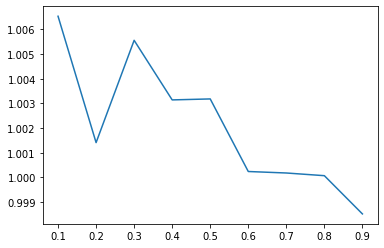

In [ ]:
import seaborn as sns
sns.lineplot(x = loss_prob, y = errors, markers=True, dashes=False)

##### traditional model building

In [ ]:
def traditional_ML(loss_p):
  # initialize w_0
  model = Sequential()

  # model.add(Dense(64, kernel_initializer='zeros', bias_initializer='zeros', activation=tf.nn.relu, input_dim=6)) # first dense/hidden layer
  model.add(Dense(64, kernel_initializer='he_uniform', bias_initializer="zeros", activation=tf.nn.relu, input_dim=8))
  model.add(Dropout(0.1))

  model.add(Dense(64, kernel_initializer='he_uniform', bias_initializer="zeros", activation=tf.nn.relu)) # second dense/hidden layer
  model.add(Dropout(0.2))

  model.add(Dense(1, kernel_initializer= 'he_uniform', activation=tf.nn.softmax)) # output layer

  # initial_weights = model.get_weights() # setting initial weights; should be same for all clients


  B = 1000 #int(len(clients[client_idx]) * 0.01) # so for each client the batch size would be different depending upon the total sample size
  E = 25 #max(30, B//10) # number of local epochs; it will also depend on sample size (indirectly)
  learning_rate = 0.1 # initial learning rate
  decay_rate = 0.1
  momentum = 0.8

  # define the optimizer function
  sgd = SGD(learning_rate = learning_rate, momentum = momentum, decay = decay_rate, nesterov = False)

  # compile the model
  model.compile(loss='mse', 
              optimizer=sgd, 
              metrics=['mse'])

  X, y = dataset[['Latitude', 'Longitude','year', 'month', 'week', 'day', 'hour', 'dayOfWeek']],  dataset['CO']

  x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = loss_p, random_state=1)

  model.fit(x_train, y_train, 
                  epochs = E, 
                  batch_size=B,
                  verbose=False)
      
  x_test, y_test = x_test.to_numpy(), y_test.to_numpy()

  # adjusting the dimensions
  x_test = x_test.reshape(x_test.shape[0], 1,  x_test.shape[1])
  y_test = y_test.reshape(y_test.shape[0],1,1)
  y_predicted = model.predict(x_test)
      
  NE = np.sum(abs(np.array(y_test) - np.array(y_predicted))) / np.sum(abs(np.array(y_test)))
  return NE


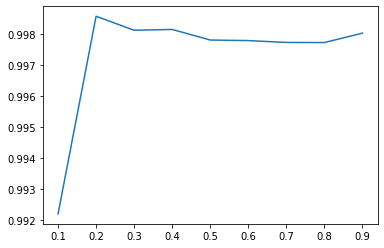

In [ ]:
# Final plotting
K = 25 # as we have 25 clients

loss_prob = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
errors = []

for loss_p in loss_prob:
  error = traditional_ML(loss_p)
  errors.append(error)

# reshaping errors
for err_idx in range(len(errors)):
  errors[err_idx] = errors[err_idx].ravel()[0]

import seaborn as sns
sns.lineplot(x = loss_prob, y = errors, markers=True, dashes=False)

# 6th October
* Dropping Negative values of dependent variable ('CO')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import initializers
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

import tensorflow as tf
# import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import utils
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Activation
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import SGD # from keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop # instead of from keras.optimizers import RMSprop
# from keras import datasets

# from keras.callbacks import LearningRateScheduler
# from keras.callbacks import History

from tensorflow.keras import losses
from sklearn.utils import shuffle

print(tf.__version__)
print(tf.keras.__version__)

2.6.0
2.6.0


In [ ]:
# ClientUpdate(k, w): // Run on client k
def Client(client_idx, model):
    # B ← (split P_k into batches of size B) # what is p_K --> each clients' sample size
    B = 1000 #int(len(clients[client_idx]) * 0.01) # so for each client the batch size would be different depending upon the total sample size
    E = 12 #max(30, B//10) # number of local epochs; it will also depend on sample size (indirectly)
    learning_rate = 0.1 # initial learning rate
    decay_rate = 0.1
    momentum = 0.8

    # define the optimizer function
    sgd = SGD(learning_rate = learning_rate, momentum = momentum, decay = decay_rate, nesterov = False)

    # compile the model
    model.compile(loss='mse', 
                optimizer=sgd, 
                metrics=['mse'])


    # for each local epoch i from 1 to E do
    #   for batch b ∈ B do
    #     w ← w − η O l(w; b) # this seems the SGD process

    # fitting the model: same as above two for loops
    data = clients_cut[client_idx]
    # data = dataset.loc[dataset['Station code'] == client_idx]

    X, y = data[['Latitude', 'Longitude','year', 'month', 'week', 'day', 'hour', 'dayOfWeek']],  data['CO']

    x_train, x_val, y_train, y_val = train_test_split(X, y, test_size = 0.1, random_state=1)

    try:
        model.fit(x_train, y_train, 
                    epochs = E, 
                    batch_size=B,
                    validation_data=(x_val, y_val),
                    verbose=False)
    except Exception as e:
        print(e)
        print("tata bye bye")

    # return w to server
    # in our case no need for any explicit return; as the model is pass by value
    return data.shape[0] # this will return the number of total sample


In [ ]:
# Server executes: 
def Server():
    # initialize w_0
    model = Sequential()
    
    # model.add(Dense(64, kernel_initializer='zeros', bias_initializer='zeros', activation=tf.nn.relu, input_dim=6)) # first dense/hidden layer
    model.add(Dense(64, kernel_initializer='he_uniform', bias_initializer="zeros", activation=tf.nn.relu, input_dim=8))
    model.add(Dropout(0.1))

    model.add(Dense(64, kernel_initializer='he_uniform', bias_initializer="zeros", activation=tf.nn.relu)) # second dense/hidden layer
    model.add(Dropout(0.2))

    model.add(Dense(1, kernel_initializer= 'he_uniform', activation=tf.nn.softmax)) # output layer

    # initial_weights = model.get_weights() # setting initial weights; should be same for all clients


# for each round t = 1, 2, . . . do
    for t in range(1, 5):
        C = np.random.random(1)[0] # random number between 0 and 1.

        # m ← max(C  K, 1)
        m = max(int(C*K), 1) # m == random number of client selected
        weight_t_plus_1 = [None] * m # matrix to store the weights of all client in each t-round
        n_k = [None] * m # parameters for weighted sum 


        # S_t ← (random set of m clients)
        # S = {} # dictionary
        S_t = np.random.uniform(low=101, high=126, size=(m)).astype(int)

        # No need for below loop, as server don't need access to client data, server only need clients' number
        # for client in m_clients:
        #   S[client] = clients[client]

        initial_weights = model.get_weights() # setting initial weights; should be same for all clients
        # for t= 1 to T, initial_weights would be t-1th's final weights

        # for each client k ∈ S_t in parallel do
        client_idx = 0
        for client in S_t:
            # w^(k)_(t+1) ← ClientUpdate(k, model)
            n_k[client_idx] = Client(client, model) # pass by reference for model
            weight_t_plus_1[client_idx] = model.get_weights()
            client_idx += 1

            # setting weights back to initial weights
            model.set_weights(initial_weights)

        # finding the weighted sum
        final_weights_t = np.array(weight_t_plus_1[0]) * (n_k[0] / sum(n_k))

        for idx in range(1, m):
          # w_(t+1) ← summation(k=1 to K){(n_k/n) * w^(k)_(t+1)} #n_k - no. of training sample in each client K; n - total training samples;
          final_weights_t += np.array(weight_t_plus_1[idx]) * (n_k[idx]/ sum(n_k))

        # setting the aggregated weights
        model.set_weights(final_weights_t)


#         print(model.get_weights())
    # return error_clients(model, loss_p)) # THIS LINE WON'T BE THERE IN REAL SERVER
    return model

In [ ]:
def error_clients(model):
    
    X, y = test_data.drop('CO', axis=1),  test_data['CO']
    
    # adjusting the dimensions
    x_test, y_test = X.to_numpy(), y.to_numpy()
    x_test = x_test.reshape(x_test.shape[0], 1,  x_test.shape[1])
    y_test = y_test.reshape(y_test.shape[0],1,1)

    y_predicted = model.predict(x_test)
        
    NE = np.sum(abs(np.array(y_test) - np.array(y_predicted))) / np.sum(abs(np.array(y_test)))
    return NE  
          

In [ ]:
%%time
# Final plotting
K = 25 # as we have 25 clients

clients = {} # dictionary
clients_cut = {}

## reading the data from each client
for st_code in range(101,126):
    clients[st_code] = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dataNew/station_code"+str(st_code)+".csv", index_col = 0)

    clients[st_code]['Measurement date'] = pd.to_datetime(clients[st_code]['Measurement date'])

    clients[st_code]['year'] = clients[st_code]['Measurement date'].dt.year
    clients[st_code]['month'] = clients[st_code]['Measurement date'].dt.month
    clients[st_code]['week'] = clients[st_code]['Measurement date'].dt.week
    clients[st_code]['day'] = clients[st_code]['Measurement date'].dt.day
    clients[st_code]['hour'] = clients[st_code]['Measurement date'].dt.hour
    clients[st_code]['minute'] = clients[st_code]['Measurement date'].dt.minute # minute is not significant; as only 0 values
    clients[st_code]['dayOfWeek'] = clients[st_code]['Measurement date'].dt.dayofweek

    # choosing features
    clients[st_code] = clients[st_code][['Latitude', 'Longitude','year', 'month', 'week', 'day', 'hour', 'dayOfWeek', 'CO']]

    clients[st_code].drop(clients[st_code][clients[st_code]['CO'] < 0].index, axis=0, inplace=True)


# complete dataset
frames = list(clients.values())
dataset = pd.concat(frames)
# display(dataset)




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: Fut

CPU times: user 3.03 s, sys: 136 ms, total: 3.17 s
Wall time: 3.35 s


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  from ipykernel import kernelapp as app


In [ ]:
# create an Empty DataFrame object
train_data = pd.DataFrame()
test_data = pd.DataFrame()
loss_prob = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
models = []
errors = []

# reading all the clients and building model
for lp in loss_prob:
    for st_code in range(101,126):
        # splitting into train test split
        X, y = clients[st_code].drop('CO', axis=1),  clients[st_code]['CO']
        x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = lp, random_state=0)
        
        # training data prep
        clients_cut[st_code] = pd.concat([x_train, y_train], axis = 1)

        # testing data prep
        # first appending x_test and y_test column wise
        # then appending each clients' dataframe one below other
        if st_code == 101:
          test_data = pd.concat([x_test, y_test], axis = 1)
        else:
          xy = pd.concat([x_test, y_test], axis=1)
          test_data = pd.concat([test_data, xy], axis=0)
        # x_test, y_test = x_test.to_numpy(), y_test.to_numpy()
    
    # Training the model using federated learning
    model = Server()

    # testing model
    errors.append(error_clients(model))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [ ]:
print("before reshaping")
display(errors)
print("****************************************************************************************************")

# reshaping errors
for err_idx in range(len(errors)):
  errors[err_idx] = errors[err_idx].ravel()[0]

print("after reshaping")
display(errors)
print("****************************************************************************************************")

In [ ]:
import seaborn as sns
sns.lineplot(x = loss_prob, y = errors, markers=True, dashes=False)

##### traditional model building

In [ ]:
def traditional_ML(loss_p):
  # initialize w_0
  model = Sequential()

  # model.add(Dense(64, kernel_initializer='zeros', bias_initializer='zeros', activation=tf.nn.relu, input_dim=6)) # first dense/hidden layer
  model.add(Dense(64, kernel_initializer='he_uniform', bias_initializer="zeros", activation=tf.nn.relu, input_dim=8))
  model.add(Dropout(0.1))

  model.add(Dense(64, kernel_initializer='he_uniform', bias_initializer="zeros", activation=tf.nn.relu)) # second dense/hidden layer
  model.add(Dropout(0.2))

  model.add(Dense(1, kernel_initializer= 'he_uniform', activation=tf.nn.softmax)) # output layer

  # initial_weights = model.get_weights() # setting initial weights; should be same for all clients


  B = 1000 #int(len(clients[client_idx]) * 0.01) # so for each client the batch size would be different depending upon the total sample size
  E = 25 #max(30, B//10) # number of local epochs; it will also depend on sample size (indirectly)
  learning_rate = 0.1 # initial learning rate
  decay_rate = 0.1
  momentum = 0.8

  # define the optimizer function
  sgd = SGD(learning_rate = learning_rate, momentum = momentum, decay = decay_rate, nesterov = False)

  # compile the model
  model.compile(loss='mse', 
              optimizer=sgd, 
              metrics=['mse'])

  X, y = dataset[['Latitude', 'Longitude','year', 'month', 'week', 'day', 'hour', 'dayOfWeek']],  dataset['CO']

  x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = loss_p, random_state=1)

  model.fit(x_train, y_train, 
                  epochs = E, 
                  batch_size=B,
                  verbose=False)
      
  x_test, y_test = x_test.to_numpy(), y_test.to_numpy()

  # adjusting the dimensions
  x_test = x_test.reshape(x_test.shape[0], 1,  x_test.shape[1])
  y_test = y_test.reshape(y_test.shape[0],1,1)
  y_predicted = model.predict(x_test)
      
  NE = np.sum(abs(np.array(y_test) - np.array(y_predicted))) / np.sum(abs(np.array(y_test)))
  return NE


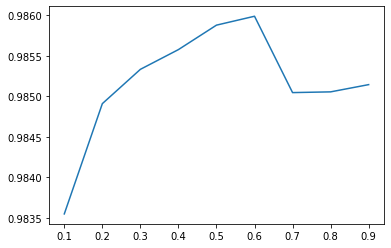

In [ ]:
# Final plotting
K = 25 # as we have 25 clients

loss_prob = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
errors = []

for loss_p in loss_prob:
  error = traditional_ML(loss_p)
  errors.append(error)

# reshaping errors
for err_idx in range(len(errors)):
  errors[err_idx] = errors[err_idx].ravel()[0]

import seaborn as sns
sns.lineplot(x = loss_prob, y = errors, markers=True, dashes=False)

# 8th October
* Feature scaling using Min-Max Scaler
* Keeping Negative values of dependent variable ('CO')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# %tensorflow_version 2.x
# import tensorflow as tf
# print(tf.test.is_gpu_available())
# device_name = tf.test.gpu_device_name()
# if device_name != '/device:GPU:0':
#   raise SystemError('GPU device not found')
# print('Found GPU at: {}'.format(device_name))

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import initializers
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


import tensorflow as tf
# import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import utils
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Activation
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import SGD # from keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop # instead of from keras.optimizers import RMSprop
# from keras import datasets

# from keras.callbacks import LearningRateScheduler
# from keras.callbacks import History

from tensorflow.keras import losses
from sklearn.utils import shuffle

print(tf.__version__)
print(tf.keras.__version__)

2.6.0
2.6.0


In [ ]:
# ClientUpdate(k, w): // Run on client k
def Client(client_idx, model):
    # B ← (split P_k into batches of size B) # what is p_K --> each clients' sample size
    B = 1000 #int(len(clients[client_idx]) * 0.01) # so for each client the batch size would be different depending upon the total sample size
    E = 12 #max(30, B//10) # number of local epochs; it will also depend on sample size (indirectly)
    learning_rate = 0.1 # initial learning rate
    decay_rate = 0.1
    momentum = 0.8

    # define the optimizer function
    sgd = SGD(learning_rate = learning_rate, momentum = momentum, decay = decay_rate, nesterov = False)

    # compile the model
    model.compile(loss='mse', 
                optimizer=sgd, 
                metrics=['mse'])

    data = clients_cut[client_idx]
    # data = dataset.loc[dataset['Station code'] == client_idx]

    X, y = data[['Latitude', 'Longitude','year', 'month', 'week', 'day', 'hour', 'dayOfWeek']],  data['CO']

    x_train, x_val, y_train, y_val = train_test_split(X, y, test_size = 0.1, random_state=1)

    try:
        model.fit(x_train, y_train, 
                    epochs = E, 
                    batch_size=B,
                    validation_data=(x_val, y_val),
                    verbose=False)
    except Exception as e:
        print(e)
        print("tata bye bye")

    # return w to server
    # in our case no need for any explicit return; as the model is pass by value
    return data.shape[0] # this will return the number of total sample


In [ ]:
# Server executes: 
def Server():
    # initialize w_0
    model = Sequential()
    
    # model.add(Dense(64, kernel_initializer='zeros', bias_initializer='zeros', activation=tf.nn.relu, input_dim=6)) # first dense/hidden layer
    model.add(Dense(64, kernel_initializer='he_uniform', bias_initializer="zeros", activation=tf.nn.relu, input_dim=8))
    model.add(Dropout(0.1))

    model.add(Dense(64, kernel_initializer='he_uniform', bias_initializer="zeros", activation=tf.nn.relu)) # second dense/hidden layer
    model.add(Dropout(0.2))

    model.add(Dense(1, kernel_initializer= 'he_uniform', activation=tf.nn.softmax)) # output layer

    # initial_weights = model.get_weights() # setting initial weights; should be same for all clients


# for each round t = 1, 2, . . . do
    for t in range(1, 5):
        C = np.random.random(1)[0] # random number between 0 and 1.

        # m ← max(C  K, 1)
        m = max(int(C*K), 1) # m == random number of client selected
        weight_t_plus_1 = [None] * m # matrix to store the weights of all client in each t-round
        n_k = [None] * m # parameters for weighted sum 


        # S_t ← (random set of m clients)
        # S = {} # dictionary
        S_t = np.random.uniform(low=101, high=126, size=(m)).astype(int)

        # No need for below loop, as server don't need access to client data, server only need clients' number
        # for client in m_clients:
        #   S[client] = clients[client]

        initial_weights = model.get_weights() # setting initial weights; should be same for all clients
        # for t= 1 to T, initial_weights would be t-1th's final weights

        # for each client k ∈ S_t in parallel do
        client_idx = 0
        for client in S_t:
            # w^(k)_(t+1) ← ClientUpdate(k, model)
            n_k[client_idx] = Client(client, model) # pass by reference for model
            weight_t_plus_1[client_idx] = model.get_weights()
            client_idx += 1

            # setting weights back to initial weights
            model.set_weights(initial_weights)

        # finding the weighted sum
        final_weights_t = np.array(weight_t_plus_1[0]) * (n_k[0] / sum(n_k))

        for idx in range(1, m):
          # w_(t+1) ← summation(k=1 to K){(n_k/n) * w^(k)_(t+1)} #n_k - no. of training sample in each client K; n - total training samples;
          final_weights_t += np.array(weight_t_plus_1[idx]) * (n_k[idx]/ sum(n_k))

        # setting the aggregated weights
        model.set_weights(final_weights_t)


#         print(model.get_weights())
    # return error_clients(model, loss_p)) # THIS LINE WON'T BE THERE IN REAL SERVER
    return model

In [ ]:
def error_clients(model):
    
    X, y = test_data.drop('CO', axis=1),  test_data['CO']
    
    # adjusting the dimensions
    x_test, y_test = X.to_numpy(), y.to_numpy()
    x_test = x_test.reshape(x_test.shape[0], 1,  x_test.shape[1])
    y_test = y_test.reshape(y_test.shape[0],1,1)

    y_predicted = model.predict(x_test)
        
    NE = np.sum(abs(np.array(y_test) - np.array(y_predicted))) / np.sum(abs(np.array(y_test)))
    return NE  
          

In [ ]:
%%time
# Final plotting
K = 25 # as we have 25 clients

clients = {} # dictionary
clients_cut = {}

## reading the data from each client
for st_code in range(101,126):
    clients[st_code] = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dataNew/station_code"+str(st_code)+".csv", index_col = 0)

    clients[st_code]['Measurement date'] = pd.to_datetime(clients[st_code]['Measurement date'])

    clients[st_code]['year'] = clients[st_code]['Measurement date'].dt.year
    clients[st_code]['month'] = clients[st_code]['Measurement date'].dt.month
    clients[st_code]['week'] = clients[st_code]['Measurement date'].dt.week
    clients[st_code]['day'] = clients[st_code]['Measurement date'].dt.day
    clients[st_code]['hour'] = clients[st_code]['Measurement date'].dt.hour
    clients[st_code]['minute'] = clients[st_code]['Measurement date'].dt.minute # minute is not significant; as only 0 values
    clients[st_code]['dayOfWeek'] = clients[st_code]['Measurement date'].dt.dayofweek

    # choosing features
    clients[st_code] = clients[st_code][['Latitude', 'Longitude','year', 'month', 'week', 'day', 'hour', 'dayOfWeek', 'CO']]

    # clients[st_code].drop(clients[st_code][clients[st_code]['CO'] < 0].index, axis=0, inplace=True)


# complete dataset
frames = list(clients.values())
dataset = pd.concat(frames)
# display(dataset)




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  from ipykernel import kernelapp as app


CPU times: user 2.92 s, sys: 93.1 ms, total: 3.01 s
Wall time: 3.21 s


In [ ]:
clients[118].head()

Latitude   Longitude  year  month  week  day  hour  dayOfWeek   CO
440296  37.452357  126.908296  2017      1    52    1     0          6  1.2
440297  37.452357  126.908296  2017      1    52    1     1          6  1.3
440298  37.452357  126.908296  2017      1    52    1     2          6  1.2
440299  37.452357  126.908296  2017      1    52    1     3          6  1.1
440300  37.452357  126.908296  2017      1    52    1     4          6  1.1

In [ ]:
dataset.tail()

Latitude   Longitude  year  month  week  day  hour  dayOfWeek   CO
647506  37.544962  127.136792  2019     12     1   31    19          1  0.5
647507  37.544962  127.136792  2019     12     1   31    20          1  0.4
647508  37.544962  127.136792  2019     12     1   31    21          1  0.4
647509  37.544962  127.136792  2019     12     1   31    22          1  0.5
647510  37.544962  127.136792  2019     12     1   31    23          1  0.5

In [ ]:

# create an Empty DataFrame object
train_data = pd.DataFrame()
test_data = pd.DataFrame()
loss_prob = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
models = []
errors = []

# reading all the clients and building model
for lp in loss_prob:
    for st_code in range(101,126):
        # splitting into train test split
        X, y = clients[st_code].drop('CO', axis=1),  clients[st_code]['CO']
        x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = lp, random_state=0)

        # Normalization using min-max scaler
        # Normalization across instances should be done after splitting the data between training and test set, using only the data from the training set.
        # to avoid data leak
        scaler_cols = x_train.columns
        scaler_idx_train = x_train.index
        scaler_idx_test = x_test.index

        # from sklearn.preprocessing import MinMaxScaler
        scaler = MinMaxScaler()

        # transforming train data
        x_train_encoded_scaled = pd.DataFrame(scaler.fit_transform(x_train), columns = scaler_cols, index=scaler_idx_train)
        # display(x_train_encoded_scaled.head())

        # transforming test data
        x_test_encoded_scaled = pd.DataFrame(scaler.transform(x_test), columns = scaler_cols, index = scaler_idx_test)
        # display(x_test_encoded_scaled.head())

        # training data prep
        clients_cut[st_code] = pd.concat([x_train_encoded_scaled, y_train], axis = 1)

        # testing data prep
        # first appending x_test and y_test column wise
        # then appending each clients' dataframe one below other
        if st_code == 101:
          test_data = pd.concat([x_test_encoded_scaled, y_test], axis = 1)
        else:
          xy = pd.concat([x_test_encoded_scaled, y_test], axis=1)
          test_data = pd.concat([test_data, xy], axis=0)
        # x_test, y_test = x_test.to_numpy(), y_test.to_numpy()
    
    # Training the model using federated learning
    model = Server()

    # testing model
    errors.append(error_clients(model))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [ ]:
test_data.isnull().sum()

Latitude     0
Longitude    0
year         0
month        0
week         0
day          0
hour         0
dayOfWeek    0
CO           0
dtype: int64

In [ ]:
print("before reshaping")
display(errors)
print("****************************************************************************************************")

# reshaping errors
for err_idx in range(len(errors)):
  errors[err_idx] = errors[err_idx].ravel()[0]

print("after reshaping")
display(errors)
print("****************************************************************************************************")

before reshaping


[1.006530995486541,
 1.0014094704545322,
 1.005555059390908,
 1.003140237695039,
 1.003179759888887,
 1.0002382896930315,
 1.0001779185311044,
 1.0000689291486176,
 0.9985193588889794]

****************************************************************************************************
after reshaping


[1.006530995486541,
 1.0014094704545322,
 1.005555059390908,
 1.003140237695039,
 1.003179759888887,
 1.0002382896930315,
 1.0001779185311044,
 1.0000689291486176,
 0.9985193588889794]

****************************************************************************************************


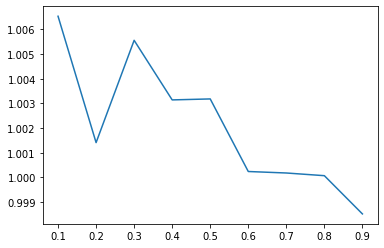

In [ ]:
import seaborn as sns
sns.lineplot(x = loss_prob, y = errors, markers=True, dashes=False)

##### traditional model building

In [ ]:
def traditional_ML(loss_p):
  # initialize w_0
  model = Sequential()

  # model.add(Dense(64, kernel_initializer='zeros', bias_initializer='zeros', activation=tf.nn.relu, input_dim=6)) # first dense/hidden layer
  model.add(Dense(64, kernel_initializer='he_uniform', bias_initializer="zeros", activation=tf.nn.relu, input_dim=8))
  model.add(Dropout(0.1))

  model.add(Dense(64, kernel_initializer='he_uniform', bias_initializer="zeros", activation=tf.nn.relu)) # second dense/hidden layer
  model.add(Dropout(0.2))

  model.add(Dense(1, kernel_initializer= 'he_uniform', activation=tf.nn.softmax)) # output layer

  # initial_weights = model.get_weights() # setting initial weights; should be same for all clients


  B = 1000 #int(len(clients[client_idx]) * 0.01) # so for each client the batch size would be different depending upon the total sample size
  E = 25 #max(30, B//10) # number of local epochs; it will also depend on sample size (indirectly)
  learning_rate = 0.1 # initial learning rate
  decay_rate = 0.1
  momentum = 0.8

  # define the optimizer function
  sgd = SGD(learning_rate = learning_rate, momentum = momentum, decay = decay_rate, nesterov = False)

  # compile the model
  model.compile(loss='mse', 
              optimizer=sgd, 
              metrics=['mse'])

  X, y = dataset[['Latitude', 'Longitude','year', 'month', 'week', 'day', 'hour', 'dayOfWeek']],  dataset['CO']

  x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = loss_p, random_state=1)

  model.fit(x_train, y_train, 
                  epochs = E, 
                  batch_size=B,
                  verbose=False)
      
  x_test, y_test = x_test.to_numpy(), y_test.to_numpy()

  # adjusting the dimensions
  x_test = x_test.reshape(x_test.shape[0], 1,  x_test.shape[1])
  y_test = y_test.reshape(y_test.shape[0],1,1)
  y_predicted = model.predict(x_test)
      
  NE = np.sum(abs(np.array(y_test) - np.array(y_predicted))) / np.sum(abs(np.array(y_test)))
  return NE


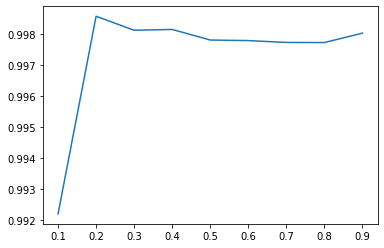

In [ ]:

# Final plotting
K = 25 # as we have 25 clients

loss_prob = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
errors = []

for loss_p in loss_prob:
  error = traditional_ML(loss_p)
  errors.append(error)

# reshaping errors
for err_idx in range(len(errors)):
  errors[err_idx] = errors[err_idx].ravel()[0]

import seaborn as sns
sns.lineplot(x = loss_prob, y = errors, markers=True, dashes=False)

# 9th October
* Feature scaling using Min-Max Scaler
* removing negative values of dependent variable ('CO')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# %tensorflow_version 2.x
# import tensorflow as tf
# print(tf.test.is_gpu_available())
# device_name = tf.test.gpu_device_name()
# if device_name != '/device:GPU:0':
#   raise SystemError('GPU device not found')
# print('Found GPU at: {}'.format(device_name))

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import initializers
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


import tensorflow as tf
# import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import utils
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Activation
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import SGD # from keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop # instead of from keras.optimizers import RMSprop
# from keras import datasets

# from keras.callbacks import LearningRateScheduler
# from keras.callbacks import History

from tensorflow.keras import losses
from sklearn.utils import shuffle

print(tf.__version__)
print(tf.keras.__version__)

2.6.0
2.6.0


In [ ]:
# ClientUpdate(k, w): // Run on client k
def Client(client_idx, model):
    # B ← (split P_k into batches of size B) # what is p_K --> each clients' sample size
    B = 1000 #int(len(clients[client_idx]) * 0.01) # so for each client the batch size would be different depending upon the total sample size
    E = 12 #max(30, B//10) # number of local epochs; it will also depend on sample size (indirectly)
    learning_rate = 0.1 # initial learning rate
    decay_rate = 0.1
    momentum = 0.8

    # define the optimizer function
    sgd = SGD(learning_rate = learning_rate, momentum = momentum, decay = decay_rate, nesterov = False)

    # compile the model
    model.compile(loss='mse', 
                optimizer=sgd, 
                metrics=['mse'])

    data = clients_cut[client_idx]
    # data = dataset.loc[dataset['Station code'] == client_idx]

    X, y = data[['Latitude', 'Longitude','year', 'month', 'week', 'day', 'hour', 'dayOfWeek']],  data['CO']

    x_train, x_val, y_train, y_val = train_test_split(X, y, test_size = 0.1, random_state=1)

    try:
        model.fit(x_train, y_train, 
                    epochs = E, 
                    batch_size=B,
                    validation_data=(x_val, y_val),
                    verbose=False)
    except Exception as e:
        print(e)
        print("tata bye bye")

    # return w to server
    # in our case no need for any explicit return; as the model is pass by value
    return data.shape[0] # this will return the number of total sample


In [ ]:
# Server executes: 
def Server():
    # initialize w_0
    model = Sequential()
    
    # model.add(Dense(64, kernel_initializer='zeros', bias_initializer='zeros', activation=tf.nn.relu, input_dim=6)) # first dense/hidden layer
    model.add(Dense(64, kernel_initializer='he_uniform', bias_initializer="zeros", activation=tf.nn.relu, input_dim=8))
    model.add(Dropout(0.1))

    model.add(Dense(64, kernel_initializer='he_uniform', bias_initializer="zeros", activation=tf.nn.relu)) # second dense/hidden layer
    model.add(Dropout(0.2))

    model.add(Dense(1, kernel_initializer= 'he_uniform', activation=tf.nn.softmax)) # output layer

    # initial_weights = model.get_weights() # setting initial weights; should be same for all clients


# for each round t = 1, 2, . . . do
    for t in range(1, 5):
        C = np.random.random(1)[0] # random number between 0 and 1.

        # m ← max(C  K, 1)
        m = max(int(C*K), 1) # m == random number of client selected
        weight_t_plus_1 = [None] * m # matrix to store the weights of all client in each t-round
        n_k = [None] * m # parameters for weighted sum 


        # S_t ← (random set of m clients)
        # S = {} # dictionary
        S_t = np.random.uniform(low=101, high=126, size=(m)).astype(int)

        # No need for below loop, as server don't need access to client data, server only need clients' number
        # for client in m_clients:
        #   S[client] = clients[client]

        initial_weights = model.get_weights() # setting initial weights; should be same for all clients
        # for t= 1 to T, initial_weights would be t-1th's final weights

        # for each client k ∈ S_t in parallel do
        client_idx = 0
        for client in S_t:
            # w^(k)_(t+1) ← ClientUpdate(k, model)
            n_k[client_idx] = Client(client, model) # pass by reference for model
            weight_t_plus_1[client_idx] = model.get_weights()
            client_idx += 1

            # setting weights back to initial weights
            model.set_weights(initial_weights)

        # finding the weighted sum
        final_weights_t = np.array(weight_t_plus_1[0]) * (n_k[0] / sum(n_k))

        for idx in range(1, m):
          # w_(t+1) ← summation(k=1 to K){(n_k/n) * w^(k)_(t+1)} #n_k - no. of training sample in each client K; n - total training samples;
          final_weights_t += np.array(weight_t_plus_1[idx]) * (n_k[idx]/ sum(n_k))

        # setting the aggregated weights
        model.set_weights(final_weights_t)


#         print(model.get_weights())
    # return error_clients(model, loss_p)) # THIS LINE WON'T BE THERE IN REAL SERVER
    return model

In [ ]:
def error_clients(model):
    
    X, y = test_data.drop('CO', axis=1),  test_data['CO']
    
    # adjusting the dimensions
    x_test, y_test = X.to_numpy(), y.to_numpy()
    x_test = x_test.reshape(x_test.shape[0], 1,  x_test.shape[1])
    y_test = y_test.reshape(y_test.shape[0],1,1)

    y_predicted = model.predict(x_test)
        
    NE = np.sum(abs(np.array(y_test) - np.array(y_predicted))) / np.sum(abs(np.array(y_test)))
    return NE  
          

In [ ]:
%%time
# Final plotting
K = 25 # as we have 25 clients

clients = {} # dictionary
clients_cut = {}

## reading the data from each client
for st_code in range(101,126):
    clients[st_code] = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dataNew/station_code"+str(st_code)+".csv", index_col = 0)

    clients[st_code]['Measurement date'] = pd.to_datetime(clients[st_code]['Measurement date'])

    clients[st_code]['year'] = clients[st_code]['Measurement date'].dt.year
    clients[st_code]['month'] = clients[st_code]['Measurement date'].dt.month
    clients[st_code]['week'] = clients[st_code]['Measurement date'].dt.week
    clients[st_code]['day'] = clients[st_code]['Measurement date'].dt.day
    clients[st_code]['hour'] = clients[st_code]['Measurement date'].dt.hour
    clients[st_code]['minute'] = clients[st_code]['Measurement date'].dt.minute # minute is not significant; as only 0 values
    clients[st_code]['dayOfWeek'] = clients[st_code]['Measurement date'].dt.dayofweek

    # choosing features
    clients[st_code] = clients[st_code][['Latitude', 'Longitude','year', 'month', 'week', 'day', 'hour', 'dayOfWeek', 'CO']]

    clients[st_code].drop(clients[st_code][clients[st_code]['CO'] < 0].index, axis=0, inplace=True)


# complete dataset
frames = list(clients.values())
dataset = pd.concat(frames)
# display(dataset)




In [ ]:
clients[118].head()

Latitude   Longitude  year  month  week  day  hour  dayOfWeek   CO
440296  37.452357  126.908296  2017      1    52    1     0          6  1.2
440297  37.452357  126.908296  2017      1    52    1     1          6  1.3
440298  37.452357  126.908296  2017      1    52    1     2          6  1.2
440299  37.452357  126.908296  2017      1    52    1     3          6  1.1
440300  37.452357  126.908296  2017      1    52    1     4          6  1.1

In [ ]:
dataset.tail()

Latitude   Longitude  year  month  week  day  hour  dayOfWeek   CO
647506  37.544962  127.136792  2019     12     1   31    19          1  0.5
647507  37.544962  127.136792  2019     12     1   31    20          1  0.4
647508  37.544962  127.136792  2019     12     1   31    21          1  0.4
647509  37.544962  127.136792  2019     12     1   31    22          1  0.5
647510  37.544962  127.136792  2019     12     1   31    23          1  0.5

In [ ]:

# create an Empty DataFrame object
train_data = pd.DataFrame()
test_data = pd.DataFrame()
loss_prob = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
models = []
errors = []

# reading all the clients and building model
for lp in loss_prob:
    for st_code in range(101,126):
        # splitting into train test split
        X, y = clients[st_code].drop('CO', axis=1),  clients[st_code]['CO']
        x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = lp, random_state=0)

        # Normalization using min-max scaler
        # Normalization across instances should be done after splitting the data between training and test set, using only the data from the training set.
        # to avoid data leak
        scaler_cols = x_train.columns
        scaler_idx_train = x_train.index
        scaler_idx_test = x_test.index

        # from sklearn.preprocessing import MinMaxScaler
        scaler = MinMaxScaler()

        # transforming train data
        x_train_encoded_scaled = pd.DataFrame(scaler.fit_transform(x_train), columns = scaler_cols, index=scaler_idx_train)
        # display(x_train_encoded_scaled.head())

        # transforming test data
        x_test_encoded_scaled = pd.DataFrame(scaler.transform(x_test), columns = scaler_cols, index = scaler_idx_test)
        # display(x_test_encoded_scaled.head())

        # training data prep
        clients_cut[st_code] = pd.concat([x_train_encoded_scaled, y_train], axis = 1)

        # testing data prep
        # first appending x_test and y_test column wise
        # then appending each clients' dataframe one below other
        if st_code == 101:
          test_data = pd.concat([x_test_encoded_scaled, y_test], axis = 1)
        else:
          xy = pd.concat([x_test_encoded_scaled, y_test], axis=1)
          test_data = pd.concat([test_data, xy], axis=0)
        # x_test, y_test = x_test.to_numpy(), y_test.to_numpy()
    
    # Training the model using federated learning
    model = Server()

    # testing model
    errors.append(error_clients(model))


In [ ]:
test_data.isnull().sum()

Latitude     0
Longitude    0
year         0
month        0
week         0
day          0
hour         0
dayOfWeek    0
CO           0
dtype: int64

In [ ]:
print("before reshaping")
display(errors)
print("****************************************************************************************************")

# reshaping errors
for err_idx in range(len(errors)):
  errors[err_idx] = errors[err_idx].ravel()[0]

print("after reshaping")
display(errors)
print("****************************************************************************************************")

before reshaping


[0.9945278454750538,
 0.9891783753466113,
 0.9900286283906723,
 0.9893221414279441,
 0.9884487031224185,
 0.9858582054326429,
 0.9869541146049432,
 0.9857908262818033,
 0.9851375378517827]

****************************************************************************************************
after reshaping


[0.9945278454750538,
 0.9891783753466113,
 0.9900286283906723,
 0.9893221414279441,
 0.9884487031224185,
 0.9858582054326429,
 0.9869541146049432,
 0.9857908262818033,
 0.9851375378517827]

****************************************************************************************************


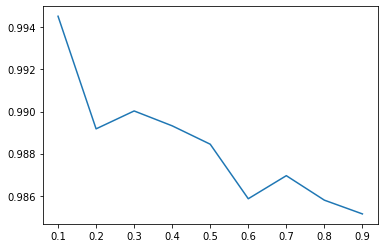

In [ ]:
import seaborn as sns
sns.lineplot(x = loss_prob, y = errors, markers=True, dashes=False)

##### traditional model building

In [ ]:
def traditional_ML(loss_p):
  # initialize w_0
  model = Sequential()

  # model.add(Dense(64, kernel_initializer='zeros', bias_initializer='zeros', activation=tf.nn.relu, input_dim=6)) # first dense/hidden layer
  model.add(Dense(64, kernel_initializer='he_uniform', bias_initializer="zeros", activation=tf.nn.relu, input_dim=8))
  model.add(Dropout(0.1))

  model.add(Dense(64, kernel_initializer='he_uniform', bias_initializer="zeros", activation=tf.nn.relu)) # second dense/hidden layer
  model.add(Dropout(0.2))

  model.add(Dense(1, kernel_initializer= 'he_uniform', activation=tf.nn.softmax)) # output layer

  # initial_weights = model.get_weights() # setting initial weights; should be same for all clients


  B = 1000 #int(len(clients[client_idx]) * 0.01) # so for each client the batch size would be different depending upon the total sample size
  E = 25 #max(30, B//10) # number of local epochs; it will also depend on sample size (indirectly)
  learning_rate = 0.1 # initial learning rate
  decay_rate = 0.1
  momentum = 0.8

  # define the optimizer function
  sgd = SGD(learning_rate = learning_rate, momentum = momentum, decay = decay_rate, nesterov = False)

  # compile the model
  model.compile(loss='mse', 
              optimizer=sgd, 
              metrics=['mse'])

  X, y = dataset[['Latitude', 'Longitude','year', 'month', 'week', 'day', 'hour', 'dayOfWeek']],  dataset['CO']

  x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = loss_p, random_state=1)

  model.fit(x_train, y_train, 
                  epochs = E, 
                  batch_size=B,
                  verbose=False)
      
  x_test, y_test = x_test.to_numpy(), y_test.to_numpy()

  # adjusting the dimensions
  x_test = x_test.reshape(x_test.shape[0], 1,  x_test.shape[1])
  y_test = y_test.reshape(y_test.shape[0],1,1)
  y_predicted = model.predict(x_test)
      
  NE = np.sum(abs(np.array(y_test) - np.array(y_predicted))) / np.sum(abs(np.array(y_test)))
  return NE


In [ ]:
([1,2,3] - [0.9, 1.8, 2.5])/ 6

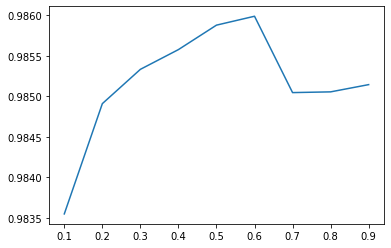

In [ ]:

# Final plotting
K = 25 # as we have 25 clients

loss_prob = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
errors = []

for loss_p in loss_prob:
  error = traditional_ML(loss_p)
  errors.append(error)

# reshaping errors
for err_idx in range(len(errors)):
  errors[err_idx] = errors[err_idx].ravel()[0]

import seaborn as sns
sns.lineplot(x = loss_prob, y = errors, markers=True, dashes=False)

# 11th October : part - A
* Feature scaling using Min-Max Scaler
* removing negative values of dependent variable ('CO')
* Using Mean squared error instead of NE

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# %tensorflow_version 2.x
# import tensorflow as tf
# print(tf.test.is_gpu_available())
# device_name = tf.test.gpu_device_name()
# if device_name != '/device:GPU:0':
#   raise SystemError('GPU device not found')
# print('Found GPU at: {}'.format(device_name))

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import initializers
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


import tensorflow as tf
# import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import utils
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Activation
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import SGD # from keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop # instead of from keras.optimizers import RMSprop
# from keras import datasets

# from keras.callbacks import LearningRateScheduler
# from keras.callbacks import History

from tensorflow.keras import losses
from sklearn.utils import shuffle

print(tf.__version__)
print(tf.keras.__version__)

2.6.0
2.6.0


In [ ]:
# ClientUpdate(k, w): // Run on client k
def Client(client_idx, model):
    # B ← (split P_k into batches of size B) # what is p_K --> each clients' sample size
    B = 1000 #int(len(clients[client_idx]) * 0.01) # so for each client the batch size would be different depending upon the total sample size
    E = 12 #max(30, B//10) # number of local epochs; it will also depend on sample size (indirectly)
    learning_rate = 0.1 # initial learning rate
    decay_rate = 0.1
    momentum = 0.8

    # define the optimizer function
    sgd = SGD(learning_rate = learning_rate, momentum = momentum, decay = decay_rate, nesterov = False)

    # compile the model
    model.compile(loss='mse', 
                optimizer=sgd, 
                metrics=['mse'])

    data = clients_cut[client_idx]
    # data = dataset.loc[dataset['Station code'] == client_idx]

    X, y = data[['Latitude', 'Longitude','year', 'month', 'week', 'day', 'hour', 'dayOfWeek']],  data['CO']

    x_train, x_val, y_train, y_val = train_test_split(X, y, test_size = 0.1, random_state=1)

    try:
        model.fit(x_train, y_train, 
                    epochs = E, 
                    batch_size=B,
                    validation_data=(x_val, y_val),
                    verbose=False)
    except Exception as e:
        print(e)
        print("tata bye bye")

    # return w to server
    # in our case no need for any explicit return; as the model is pass by value
    return data.shape[0] # this will return the number of total sample


In [ ]:
# Server executes: 
def Server():
    # initialize w_0
    model = Sequential()
    
    # model.add(Dense(64, kernel_initializer='zeros', bias_initializer='zeros', activation=tf.nn.relu, input_dim=6)) # first dense/hidden layer
    model.add(Dense(64, kernel_initializer='he_uniform', bias_initializer="zeros", activation=tf.nn.relu, input_dim=8))
    model.add(Dropout(0.1))

    model.add(Dense(64, kernel_initializer='he_uniform', bias_initializer="zeros", activation=tf.nn.relu)) # second dense/hidden layer
    model.add(Dropout(0.2))

    model.add(Dense(1, kernel_initializer= 'he_uniform', activation=tf.nn.softmax)) # output layer

    # initial_weights = model.get_weights() # setting initial weights; should be same for all clients


# for each round t = 1, 2, . . . do
    for t in range(1, 5):
        C = np.random.random(1)[0] # random number between 0 and 1.

        # m ← max(C  K, 1)
        m = max(int(C*K), 1) # m == random number of client selected
        weight_t_plus_1 = [None] * m # matrix to store the weights of all client in each t-round
        n_k = [None] * m # parameters for weighted sum 


        # S_t ← (random set of m clients)
        # S = {} # dictionary
        S_t = np.random.uniform(low=101, high=126, size=(m)).astype(int)

        # No need for below loop, as server don't need access to client data, server only need clients' number
        # for client in m_clients:
        #   S[client] = clients[client]

        initial_weights = model.get_weights() # setting initial weights; should be same for all clients
        # for t= 1 to T, initial_weights would be t-1th's final weights

        # for each client k ∈ S_t in parallel do
        client_idx = 0
        for client in S_t:
            # w^(k)_(t+1) ← ClientUpdate(k, model)
            n_k[client_idx] = Client(client, model) # pass by reference for model
            weight_t_plus_1[client_idx] = model.get_weights()
            client_idx += 1

            # setting weights back to initial weights
            model.set_weights(initial_weights)

        # finding the weighted sum
        final_weights_t = np.array(weight_t_plus_1[0]) * (n_k[0] / sum(n_k))

        for idx in range(1, m):
          # w_(t+1) ← summation(k=1 to K){(n_k/n) * w^(k)_(t+1)} #n_k - no. of training sample in each client K; n - total training samples;
          final_weights_t += np.array(weight_t_plus_1[idx]) * (n_k[idx]/ sum(n_k))

        # setting the aggregated weights
        model.set_weights(final_weights_t)


#         print(model.get_weights())
    # return error_clients(model, loss_p)) # THIS LINE WON'T BE THERE IN REAL SERVER
    return model

In [ ]:
def error_clients(model):
    
    X, y = test_data.drop('CO', axis=1),  test_data['CO']
    
    # adjusting the dimensions
    x_test, y_test = X.to_numpy(), y.to_numpy()
    x_test = x_test.reshape(x_test.shape[0], 1,  x_test.shape[1])
    y_test = y_test.reshape(y_test.shape[0],1,1)

    y_predicted = model.predict(x_test)
    
    from sklearn.metrics import mean_squared_error
    # print("y_predicted", y_predicted)
    # print("y_predicted.ravel()", y_predicted.ravel())
    mse = mean_squared_error(y_predicted.ravel(), y_test.ravel())
    return mse  
          

In [ ]:
%%time
# Final plotting
K = 25 # as we have 25 clients

clients = {} # dictionary
clients_cut = {}

## reading the data from each client
for st_code in range(101,126):
    clients[st_code] = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dataNew/station_code"+str(st_code)+".csv", index_col = 0)

    clients[st_code]['Measurement date'] = pd.to_datetime(clients[st_code]['Measurement date'])

    clients[st_code]['year'] = clients[st_code]['Measurement date'].dt.year
    clients[st_code]['month'] = clients[st_code]['Measurement date'].dt.month
    clients[st_code]['week'] = clients[st_code]['Measurement date'].dt.week
    clients[st_code]['day'] = clients[st_code]['Measurement date'].dt.day
    clients[st_code]['hour'] = clients[st_code]['Measurement date'].dt.hour
    clients[st_code]['minute'] = clients[st_code]['Measurement date'].dt.minute # minute is not significant; as only 0 values
    clients[st_code]['dayOfWeek'] = clients[st_code]['Measurement date'].dt.dayofweek

    # choosing features
    clients[st_code] = clients[st_code][['Latitude', 'Longitude','year', 'month', 'week', 'day', 'hour', 'dayOfWeek', 'CO']]

    clients[st_code].drop(clients[st_code][clients[st_code]['CO'] < 0].index, axis=0, inplace=True)


# complete dataset
frames = list(clients.values())
dataset = pd.concat(frames)
# display(dataset)




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: Fut

CPU times: user 3.1 s, sys: 105 ms, total: 3.21 s
Wall time: 3.39 s


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  from ipykernel import kernelapp as app


In [ ]:
clients[118].head()

Latitude   Longitude  year  month  week  day  hour  dayOfWeek   CO
440296  37.452357  126.908296  2017      1    52    1     0          6  1.2
440297  37.452357  126.908296  2017      1    52    1     1          6  1.3
440298  37.452357  126.908296  2017      1    52    1     2          6  1.2
440299  37.452357  126.908296  2017      1    52    1     3          6  1.1
440300  37.452357  126.908296  2017      1    52    1     4          6  1.1

In [ ]:
dataset.tail()

Latitude   Longitude  year  month  week  day  hour  dayOfWeek   CO
647506  37.544962  127.136792  2019     12     1   31    19          1  0.5
647507  37.544962  127.136792  2019     12     1   31    20          1  0.4
647508  37.544962  127.136792  2019     12     1   31    21          1  0.4
647509  37.544962  127.136792  2019     12     1   31    22          1  0.5
647510  37.544962  127.136792  2019     12     1   31    23          1  0.5

In [ ]:

# create an Empty DataFrame object
train_data = pd.DataFrame()
test_data = pd.DataFrame()
loss_prob = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
models = []
errors = []

# reading all the clients and building model
for lp in loss_prob:
    for st_code in range(101,126):
        # splitting into train test split
        X, y = clients[st_code].drop('CO', axis=1),  clients[st_code]['CO']
        x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = lp, random_state=0)

        # Normalization using min-max scaler
        # Normalization across instances should be done after splitting the data between training and test set, using only the data from the training set.
        # to avoid data leak
        scaler_cols = x_train.columns
        scaler_idx_train = x_train.index
        scaler_idx_test = x_test.index

        # from sklearn.preprocessing import MinMaxScaler
        scaler = MinMaxScaler()

        # transforming train data
        x_train_encoded_scaled = pd.DataFrame(scaler.fit_transform(x_train), columns = scaler_cols, index=scaler_idx_train)
        # display(x_train_encoded_scaled.head())

        # transforming test data
        x_test_encoded_scaled = pd.DataFrame(scaler.transform(x_test), columns = scaler_cols, index = scaler_idx_test)
        # display(x_test_encoded_scaled.head())

        # training data prep
        clients_cut[st_code] = pd.concat([x_train_encoded_scaled, y_train], axis = 1)

        # testing data prep
        # first appending x_test and y_test column wise
        # then appending each clients' dataframe one below other
        if st_code == 101:
          test_data = pd.concat([x_test_encoded_scaled, y_test], axis = 1)
        else:
          xy = pd.concat([x_test_encoded_scaled, y_test], axis=1)
          test_data = pd.concat([test_data, xy], axis=0)
        # x_test, y_test = x_test.to_numpy(), y_test.to_numpy()
    
    # Training the model using federated learning
    model = Server()

    # testing model
    errors.append(error_clients(model))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [ ]:
test_data.isnull().sum()

Latitude     0
Longitude    0
year         0
month        0
week         0
day          0
hour         0
dayOfWeek    0
CO           0
dtype: int64

In [ ]:
print("before reshaping")
display(errors)
print("****************************************************************************************************")

# reshaping errors
for err_idx in range(len(errors)):
  errors[err_idx] = errors[err_idx].ravel()[0]

print("after reshaping")
display(errors)
print("****************************************************************************************************")

before reshaping


[0.32737732682805554,
 0.3948640312028966,
 0.3814050400145036,
 0.3807280885780886,
 0.37207205107165947,
 0.3862660322821267,
 0.39084239480332655,
 0.39132232560850067,
 0.3861305489701089]

****************************************************************************************************
after reshaping


[0.32737732682805554,
 0.3948640312028966,
 0.3814050400145036,
 0.3807280885780886,
 0.37207205107165947,
 0.3862660322821267,
 0.39084239480332655,
 0.39132232560850067,
 0.3861305489701089]

****************************************************************************************************


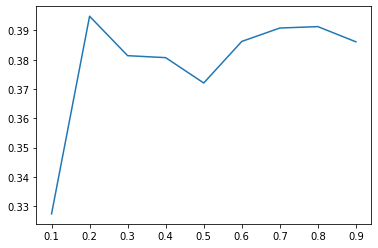

In [ ]:
import seaborn as sns
sns.lineplot(x = loss_prob, y = errors, markers=True, dashes=False)

##### traditional model building

In [ ]:
def traditional_ML(loss_p):
  # initialize w_0
  model = Sequential()

  # model.add(Dense(64, kernel_initializer='zeros', bias_initializer='zeros', activation=tf.nn.relu, input_dim=6)) # first dense/hidden layer
  model.add(Dense(64, kernel_initializer='he_uniform', bias_initializer="zeros", activation=tf.nn.relu, input_dim=8))
  model.add(Dropout(0.1))

  model.add(Dense(64, kernel_initializer='he_uniform', bias_initializer="zeros", activation=tf.nn.relu)) # second dense/hidden layer
  model.add(Dropout(0.2))

  model.add(Dense(1, kernel_initializer= 'he_uniform', activation=tf.nn.softmax)) # output layer

  # initial_weights = model.get_weights() # setting initial weights; should be same for all clients


  B = 1000 #int(len(clients[client_idx]) * 0.01) # so for each client the batch size would be different depending upon the total sample size
  E = 25 #max(30, B//10) # number of local epochs; it will also depend on sample size (indirectly)
  learning_rate = 0.1 # initial learning rate
  decay_rate = 0.1
  momentum = 0.8

  # define the optimizer function
  sgd = SGD(learning_rate = learning_rate, momentum = momentum, decay = decay_rate, nesterov = False)

  # compile the model
  model.compile(loss='mse', 
              optimizer=sgd, 
              metrics=['mse'])

  X, y = dataset[['Latitude', 'Longitude','year', 'month', 'week', 'day', 'hour', 'dayOfWeek']],  dataset['CO']

  x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = loss_p, random_state=1)

  model.fit(x_train, y_train, 
                  epochs = E, 
                  batch_size=B,
                  verbose=False)
      
  x_test, y_test = x_test.to_numpy(), y_test.to_numpy()

  # adjusting the dimensions
  x_test = x_test.reshape(x_test.shape[0], 1,  x_test.shape[1])
  y_test = y_test.reshape(y_test.shape[0],1,1)
  y_predicted = model.predict(x_test)
  

  from sklearn.metrics import mean_squared_error
  mse = mean_squared_error(y_predicted.ravel(), y_test.ravel())
  return mse 


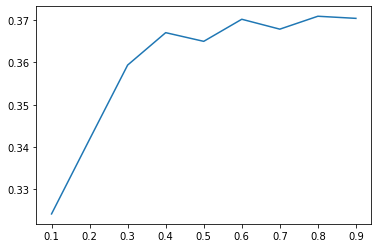

In [ ]:

# Final plotting
K = 25 # as we have 25 clients

loss_prob = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
errors = []

for loss_p in loss_prob:
  error = traditional_ML(loss_p)
  errors.append(error)

# reshaping errors
for err_idx in range(len(errors)):
  errors[err_idx] = errors[err_idx].ravel()[0]

import seaborn as sns
sns.lineplot(x = loss_prob, y = errors, markers=True, dashes=False)

# 11th October : part-B
* Feature scaling using Min-Max Scaler
* removing negative values of dependent variable ('CO')
* Using Mean absolute error instead of NE

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# %tensorflow_version 2.x
# import tensorflow as tf
# print(tf.test.is_gpu_available())
# device_name = tf.test.gpu_device_name()
# if device_name != '/device:GPU:0':
#   raise SystemError('GPU device not found')
# print('Found GPU at: {}'.format(device_name))

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import initializers
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


import tensorflow as tf
# import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import utils
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Activation
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import SGD # from keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop # instead of from keras.optimizers import RMSprop
# from keras import datasets

# from keras.callbacks import LearningRateScheduler
# from keras.callbacks import History

from tensorflow.keras import losses
from sklearn.utils import shuffle

print(tf.__version__)
print(tf.keras.__version__)

2.6.0
2.6.0


In [ ]:
# ClientUpdate(k, w): // Run on client k
def Client(client_idx, model):
    # B ← (split P_k into batches of size B) # what is p_K --> each clients' sample size
    B = 1000 #int(len(clients[client_idx]) * 0.01) # so for each client the batch size would be different depending upon the total sample size
    E = 12 #max(30, B//10) # number of local epochs; it will also depend on sample size (indirectly)
    learning_rate = 0.1 # initial learning rate
    decay_rate = 0.1
    momentum = 0.8

    # define the optimizer function
    sgd = SGD(learning_rate = learning_rate, momentum = momentum, decay = decay_rate, nesterov = False)

    # compile the model
    model.compile(loss='mse', 
                optimizer=sgd, 
                metrics=['mse'])

    data = clients_cut[client_idx]
    # data = dataset.loc[dataset['Station code'] == client_idx]

    X, y = data[['Latitude', 'Longitude','year', 'month', 'week', 'day', 'hour', 'dayOfWeek']],  data['CO']

    x_train, x_val, y_train, y_val = train_test_split(X, y, test_size = 0.1, random_state=1)

    try:
        model.fit(x_train, y_train, 
                    epochs = E, 
                    batch_size=B,
                    validation_data=(x_val, y_val),
                    verbose=False)
    except Exception as e:
        print(e)
        print("tata bye bye")

    # return w to server
    # in our case no need for any explicit return; as the model is pass by value
    return data.shape[0] # this will return the number of total sample


In [ ]:
# Server executes: 
def Server():
    # initialize w_0
    model = Sequential()
    
    # model.add(Dense(64, kernel_initializer='zeros', bias_initializer='zeros', activation=tf.nn.relu, input_dim=6)) # first dense/hidden layer
    model.add(Dense(64, kernel_initializer='he_uniform', bias_initializer="zeros", activation=tf.nn.relu, input_dim=8))
    model.add(Dropout(0.1))

    model.add(Dense(64, kernel_initializer='he_uniform', bias_initializer="zeros", activation=tf.nn.relu)) # second dense/hidden layer
    model.add(Dropout(0.2))

    model.add(Dense(1, kernel_initializer= 'he_uniform', activation=tf.nn.softmax)) # output layer

    # initial_weights = model.get_weights() # setting initial weights; should be same for all clients


# for each round t = 1, 2, . . . do
    for t in range(1, 5):
        C = np.random.random(1)[0] # random number between 0 and 1.

        # m ← max(C  K, 1)
        m = max(int(C*K), 1) # m == random number of client selected
        weight_t_plus_1 = [None] * m # matrix to store the weights of all client in each t-round
        n_k = [None] * m # parameters for weighted sum 


        # S_t ← (random set of m clients)
        # S = {} # dictionary
        S_t = np.random.uniform(low=101, high=126, size=(m)).astype(int)

        # No need for below loop, as server don't need access to client data, server only need clients' number
        # for client in m_clients:
        #   S[client] = clients[client]

        initial_weights = model.get_weights() # setting initial weights; should be same for all clients
        # for t= 1 to T, initial_weights would be t-1th's final weights

        # for each client k ∈ S_t in parallel do
        client_idx = 0
        for client in S_t:
            # w^(k)_(t+1) ← ClientUpdate(k, model)
            n_k[client_idx] = Client(client, model) # pass by reference for model
            weight_t_plus_1[client_idx] = model.get_weights()
            client_idx += 1

            # setting weights back to initial weights
            model.set_weights(initial_weights)

        # finding the weighted sum
        final_weights_t = np.array(weight_t_plus_1[0]) * (n_k[0] / sum(n_k))

        for idx in range(1, m):
          # w_(t+1) ← summation(k=1 to K){(n_k/n) * w^(k)_(t+1)} #n_k - no. of training sample in each client K; n - total training samples;
          final_weights_t += np.array(weight_t_plus_1[idx]) * (n_k[idx]/ sum(n_k))

        # setting the aggregated weights
        model.set_weights(final_weights_t)


#         print(model.get_weights())
    # return error_clients(model, loss_p)) # THIS LINE WON'T BE THERE IN REAL SERVER
    return model

In [ ]:
def error_clients(model):
    
    X, y = test_data.drop('CO', axis=1),  test_data['CO']
    
    # adjusting the dimensions
    x_test, y_test = X.to_numpy(), y.to_numpy()
    x_test = x_test.reshape(x_test.shape[0], 1,  x_test.shape[1])
    y_test = y_test.reshape(y_test.shape[0],1,1)

    y_predicted = model.predict(x_test)

    from sklearn.metrics import mean_absolute_error
    mae = mean_absolute_error(y_predicted.ravel(), y_test.ravel())
    return mae    
    # NE = np.sum(abs(np.array(y_test) - np.array(y_predicted))) / np.sum(abs(np.array(y_test)))
    # return NE  
          

In [ ]:
%%time
# Final plotting
K = 25 # as we have 25 clients

clients = {} # dictionary
clients_cut = {}

## reading the data from each client
for st_code in range(101,126):
    clients[st_code] = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dataNew/station_code"+str(st_code)+".csv", index_col = 0)

    clients[st_code]['Measurement date'] = pd.to_datetime(clients[st_code]['Measurement date'])

    clients[st_code]['year'] = clients[st_code]['Measurement date'].dt.year
    clients[st_code]['month'] = clients[st_code]['Measurement date'].dt.month
    clients[st_code]['week'] = clients[st_code]['Measurement date'].dt.week
    clients[st_code]['day'] = clients[st_code]['Measurement date'].dt.day
    clients[st_code]['hour'] = clients[st_code]['Measurement date'].dt.hour
    clients[st_code]['minute'] = clients[st_code]['Measurement date'].dt.minute # minute is not significant; as only 0 values
    clients[st_code]['dayOfWeek'] = clients[st_code]['Measurement date'].dt.dayofweek

    # choosing features
    clients[st_code] = clients[st_code][['Latitude', 'Longitude','year', 'month', 'week', 'day', 'hour', 'dayOfWeek', 'CO']]

    clients[st_code].drop(clients[st_code][clients[st_code]['CO'] < 0].index, axis=0, inplace=True)


# complete dataset
frames = list(clients.values())
dataset = pd.concat(frames)
# display(dataset)




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: Fut

CPU times: user 2.83 s, sys: 114 ms, total: 2.94 s
Wall time: 3.08 s


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  from ipykernel import kernelapp as app


In [ ]:
clients[118].head()

Latitude   Longitude  year  month  week  day  hour  dayOfWeek   CO
440296  37.452357  126.908296  2017      1    52    1     0          6  1.2
440297  37.452357  126.908296  2017      1    52    1     1          6  1.3
440298  37.452357  126.908296  2017      1    52    1     2          6  1.2
440299  37.452357  126.908296  2017      1    52    1     3          6  1.1
440300  37.452357  126.908296  2017      1    52    1     4          6  1.1

In [ ]:
dataset.tail()

Latitude   Longitude  year  month  week  day  hour  dayOfWeek   CO
647506  37.544962  127.136792  2019     12     1   31    19          1  0.5
647507  37.544962  127.136792  2019     12     1   31    20          1  0.4
647508  37.544962  127.136792  2019     12     1   31    21          1  0.4
647509  37.544962  127.136792  2019     12     1   31    22          1  0.5
647510  37.544962  127.136792  2019     12     1   31    23          1  0.5

In [ ]:

# create an Empty DataFrame object
train_data = pd.DataFrame()
test_data = pd.DataFrame()
loss_prob = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
models = []
errors = []

# reading all the clients and building model
for lp in loss_prob:
    for st_code in range(101,126):
        # splitting into train test split
        X, y = clients[st_code].drop('CO', axis=1),  clients[st_code]['CO']
        x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = lp, random_state=0)

        # Normalization using min-max scaler
        # Normalization across instances should be done after splitting the data between training and test set, using only the data from the training set.
        # to avoid data leak
        scaler_cols = x_train.columns
        scaler_idx_train = x_train.index
        scaler_idx_test = x_test.index

        # from sklearn.preprocessing import MinMaxScaler
        scaler = MinMaxScaler()

        # transforming train data
        x_train_encoded_scaled = pd.DataFrame(scaler.fit_transform(x_train), columns = scaler_cols, index=scaler_idx_train)
        # display(x_train_encoded_scaled.head())

        # transforming test data
        x_test_encoded_scaled = pd.DataFrame(scaler.transform(x_test), columns = scaler_cols, index = scaler_idx_test)
        # display(x_test_encoded_scaled.head())

        # training data prep
        clients_cut[st_code] = pd.concat([x_train_encoded_scaled, y_train], axis = 1)

        # testing data prep
        # first appending x_test and y_test column wise
        # then appending each clients' dataframe one below other
        if st_code == 101:
          test_data = pd.concat([x_test_encoded_scaled, y_test], axis = 1)
        else:
          xy = pd.concat([x_test_encoded_scaled, y_test], axis=1)
          test_data = pd.concat([test_data, xy], axis=0)
        # x_test, y_test = x_test.to_numpy(), y_test.to_numpy()
    
    # Training the model using federated learning
    model = Server()

    # testing model
    errors.append(error_clients(model))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [ ]:
test_data.isnull().sum()

Latitude     0
Longitude    0
year         0
month        0
week         0
day          0
hour         0
dayOfWeek    0
CO           0
dtype: int64

In [ ]:
print("before reshaping")
display(errors)
print("****************************************************************************************************")

# reshaping errors
for err_idx in range(len(errors)):
  errors[err_idx] = errors[err_idx].ravel()[0]

print("after reshaping")
display(errors)
print("****************************************************************************************************")

before reshaping


[0.5116986233257715,
 0.5124834895032089,
 0.5121343658542903,
 0.5119242424242424,
 0.5113838952707743,
 0.5111933301562306,
 0.5117153817805623,
 0.5113086889799725,
 0.5110738527365623]

****************************************************************************************************
after reshaping


[0.5116986233257715,
 0.5124834895032089,
 0.5121343658542903,
 0.5119242424242424,
 0.5113838952707743,
 0.5111933301562306,
 0.5117153817805623,
 0.5113086889799725,
 0.5110738527365623]

****************************************************************************************************


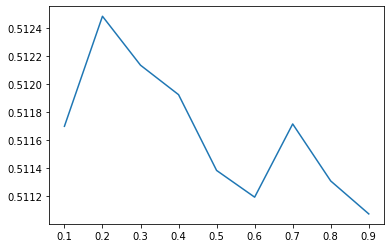

In [ ]:
import seaborn as sns
sns.lineplot(x = loss_prob, y = errors, markers=True, dashes=False)

##### traditional model building

In [ ]:
def traditional_ML(loss_p):
  # initialize w_0
  model = Sequential()

  # model.add(Dense(64, kernel_initializer='zeros', bias_initializer='zeros', activation=tf.nn.relu, input_dim=6)) # first dense/hidden layer
  model.add(Dense(64, kernel_initializer='he_uniform', bias_initializer="zeros", activation=tf.nn.relu, input_dim=8))
  model.add(Dropout(0.1))

  model.add(Dense(64, kernel_initializer='he_uniform', bias_initializer="zeros", activation=tf.nn.relu)) # second dense/hidden layer
  model.add(Dropout(0.2))

  model.add(Dense(1, kernel_initializer= 'he_uniform', activation=tf.nn.softmax)) # output layer

  # initial_weights = model.get_weights() # setting initial weights; should be same for all clients


  B = 1000 #int(len(clients[client_idx]) * 0.01) # so for each client the batch size would be different depending upon the total sample size
  E = 25 #max(30, B//10) # number of local epochs; it will also depend on sample size (indirectly)
  learning_rate = 0.1 # initial learning rate
  decay_rate = 0.1
  momentum = 0.8

  # define the optimizer function
  sgd = SGD(learning_rate = learning_rate, momentum = momentum, decay = decay_rate, nesterov = False)

  # compile the model
  model.compile(loss='mse', 
              optimizer=sgd, 
              metrics=['mse'])

  X, y = dataset[['Latitude', 'Longitude','year', 'month', 'week', 'day', 'hour', 'dayOfWeek']],  dataset['CO']

  x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = loss_p, random_state=1)

  model.fit(x_train, y_train, 
                  epochs = E, 
                  batch_size=B,
                  verbose=False)
      
  x_test, y_test = x_test.to_numpy(), y_test.to_numpy()

  # adjusting the dimensions
  x_test = x_test.reshape(x_test.shape[0], 1,  x_test.shape[1])
  y_test = y_test.reshape(y_test.shape[0],1,1)
  y_predicted = model.predict(x_test)
      

  from sklearn.metrics import mean_absolute_error
  mae = mean_absolute_error(y_predicted.ravel(), y_test.ravel())
  return mae  
  # NE = np.sum(abs(np.array(y_test) - np.array(y_predicted))) / np.sum(abs(np.array(y_test)))
  # return NE


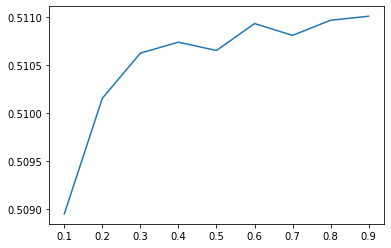

In [ ]:

# Final plotting
K = 25 # as we have 25 clients

loss_prob = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
errors = []

for loss_p in loss_prob:
  error = traditional_ML(loss_p)
  errors.append(error)

# reshaping errors
for err_idx in range(len(errors)):
  errors[err_idx] = errors[err_idx].ravel()[0]

import seaborn as sns
sns.lineplot(x = loss_prob, y = errors, markers=True, dashes=False)

# Trial for FL

In [ ]:
# ## generating random number between start to end
# import numpy as np
 
# start = 101   # inclusive
# end = 125    # exclusive

# n = 12

# x = np.random.uniform(low=101, high=126, size=(m)).astype(int)
# print(x)

[118 108 113 118 101 105 116 124 119 105 103 111]


In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import initializers
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.optimizers import Adam

In [ ]:
## clients
clients = []

for i in range(10): # number of clients = 10
  client = []
  client.append(np.random.uniform(low=1, high=12, size=(5)).astype(int))
  client.append(2*client[0] + 5)
  clients.append(client)

weight_t_plus_1 = [None] * 10 #10 represents the number of clients

clients

[[array([10,  5,  9,  1,  6]), array([25, 15, 23,  7, 17])],
 [array([ 4,  3,  3, 11,  6]), array([13, 11, 11, 27, 17])],
 [array([ 3,  3, 10,  9,  7]), array([11, 11, 25, 23, 19])],
 [array([ 6,  8,  9,  3, 11]), array([17, 21, 23, 11, 27])],
 [array([11,  4,  3,  7, 11]), array([27, 13, 11, 19, 27])],
 [array([ 8, 11,  9,  8,  1]), array([21, 27, 23, 21,  7])],
 [array([5, 9, 8, 1, 7]), array([15, 23, 21,  7, 19])],
 [array([ 2,  5, 11,  4,  8]), array([ 9, 15, 27, 13, 21])],
 [array([3, 7, 8, 1, 6]), array([11, 19, 21,  7, 17])],
 [array([2, 6, 6, 3, 2]), array([ 9, 17, 17, 11,  9])]]

In [ ]:
def client(X, y, model):
  adam = Adam(learning_rate = 0.01)
  model.compile(optimizer = adam,
              loss = 'mse',
              metrics = ['mse'])
  print("Before Training")
  print(model.get_weights())
  print()
  model.fit(X, y, epochs = 10, verbose=False)
  print("After Training")
  print(model.get_weights())
  print()

  return model

In [ ]:
def server():
  # Defining the architecture of NN model
  model = Sequential()

  model.add(Dense(5, input_dim = 1, activation = 'linear'))
  # model.add(Dense(5,  activation = 'linear'))
  print("initial weight :", model.get_weights())
  print()

  # defining weight matrix for t+1th roung
  # weight_t_plus_1 = [None] * 10 #10 represents the number of clients



  import numpy as np

  # update
  initial_weights = model.get_weights() # setting initial weights

  for i in range(10):
    client(clients[i][0], clients[i][1], model) # pass by reference
    print(str(i),"th model's weights", model.get_weights())
    
    weight_t_plus_1[i] = model.get_weights()

    print()

    # setting weights back to initial weights
    model.set_weights(initial_weights)
    


In [ ]:
## Server running
server()

In [ ]:
## adding/ all the weights
weights = np.array(weight_t_plus_1[0])

for i in range(1,10):
  weights += np.array(weight_t_plus_1[i])
weights

In [ ]:
# checking whether we can add the elements
a = 0
for i in range(10):
  a += weight_t_plus_1[i][0][0][1]
a

-6.675058722496033

In [ ]:
# checking if 0.5 gets multiplied will all the numbers
np.array(weight_t_plus_1[1])* 0.5

In [ ]:
# merging all the data frames
import pandas as pd
# First DataFrame
df1 = pd.DataFrame({'id': ['A01', 'A02', 'A03', 'A04'],
					'Name': ['ABC', 'PQR', 'DEF', 'GHI']})

# Second DataFrame
df2 = pd.DataFrame({'id': ['B05', 'B06', 'B07', 'B08'],
					'Name': ['XYZ', 'TUV', 'MNO', 'JKL']})

df3 = pd.DataFrame({'id': ['B05', 'B06', 'B07', 'B08'],
					'Name': ['XYZ', 'TUV', 'MNO', 'JKL']})

frames = [df1, df2, df3]

result = pd.concat(frames)
display(result)


#### for each loss prob, as it explodes memory

In [ ]:
# X, y = dataset.drop('CO', axis=1),  dataset['CO']

# #     for loss_p in loss_prob:
# x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=0)
# x_test, y_test = x_test.to_numpy(), y_test.to_numpy()
# x_test = x_test.reshape(x_test.shape[0], 1,  x_test.shape[1])
# # x_test[0].shape
# y_predicted = models[0].predict(x_test)
    


In [ ]:
# y_predicted.shape

In [ ]:
# y_test = y_test.reshape(y_test.shape[0], 1,1)

In [ ]:
# error = sum(abs(y_test - y_predicted)) / sum(y_test)
# # error

In [ ]:
# sum(y_test)

In [ ]:
# x_test.reshape(x_test.shape[0], x_test.shape[1], 1).shape

In [ ]:
# errors.append(error_clients(models[0], loss_prob[0]))

# 19th October
* Feature scaling using Min-Max Scaler
* removing negative values of dependent variable ('CO')
* Using Mean squared error instead of NE
* Adding labels to graph

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# %tensorflow_version 2.x
# import tensorflow as tf
# print(tf.test.is_gpu_available())
# device_name = tf.test.gpu_device_name()
# if device_name != '/device:GPU:0':
#   raise SystemError('GPU device not found')
# print('Found GPU at: {}'.format(device_name))

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import initializers
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


import tensorflow as tf
# import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import utils
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Activation
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import SGD # from keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop # instead of from keras.optimizers import RMSprop
# from keras import datasets

# from keras.callbacks import LearningRateScheduler
# from keras.callbacks import History

from tensorflow.keras import losses
from sklearn.utils import shuffle

print(tf.__version__)
print(tf.keras.__version__)

2.6.0
2.6.0


In [ ]:
# ClientUpdate(k, w): // Run on client k
def Client(client_idx, model):
    # B ← (split P_k into batches of size B) # what is p_K --> each clients' sample size
    B = int(len(clients[client_idx]) * 0.01) # so for each client the batch size would be different depending upon the total sample size
    E = max(30, B//10) # number of local epochs; it will also depend on sample size (indirectly)
    learning_rate = 0.1 # initial learning rate
    decay_rate = 0.1
    momentum = 0.8

    # define the optimizer function
    sgd = SGD(learning_rate = learning_rate, momentum = momentum, decay = decay_rate, nesterov = False)

    # compile the model
    model.compile(loss='mse', 
                optimizer=sgd, 
                metrics=['mse'])

    data = clients_cut[client_idx]
    # data = dataset.loc[dataset['Station code'] == client_idx]

    X, y = data[['Latitude', 'Longitude','year', 'month', 'week', 'day', 'hour', 'dayOfWeek']],  data['CO']

    x_train, x_val, y_train, y_val = train_test_split(X, y, test_size = 0.1, random_state=1)

    try:
        model.fit(x_train, y_train, 
                    epochs = E, 
                    batch_size=B,
                    validation_data=(x_val, y_val),
                    verbose=False)
    except Exception as e:
        print(e)
        print("error")

    # return w to server
    # in our case no need for any explicit return; as the model is pass by value
    return data.shape[0] # this will return the number of total sample


In [ ]:
# Server executes: 
def Server():
    # initialize w_0
    model = Sequential()
    
    # model.add(Dense(64, kernel_initializer='zeros', bias_initializer='zeros', activation=tf.nn.relu, input_dim=6)) # first dense/hidden layer
    model.add(Dense(64, kernel_initializer='he_uniform', bias_initializer="zeros", activation=tf.nn.relu, input_dim=8))
    model.add(Dropout(0.1))

    model.add(Dense(64, kernel_initializer='he_uniform', bias_initializer="zeros", activation=tf.nn.relu)) # second dense/hidden layer
    model.add(Dropout(0.2))

    model.add(Dense(1, kernel_initializer= 'he_uniform', activation=tf.nn.softmax)) # output layer

    # initial_weights = model.get_weights() # setting initial weights; should be same for all clients


# for each round t = 1, 2, . . . do
    for t in range(1, 5):
        C = np.random.random(1)[0] # random number between 0 and 1.

        # m ← max(C  K, 1)
        m = max(int(C*K), 1) # m == random number of client selected
        weight_t_plus_1 = [None] * m # matrix to store the weights of all client in each t-round
        n_k = [None] * m # parameters for weighted sum 


        # S_t ← (random set of m clients)
        # S = {} # dictionary
        S_t = np.random.uniform(low=101, high=126, size=(m)).astype(int)

        # No need for below loop, as server don't need access to client data, server only need clients' number
        # for client in m_clients:
        #   S[client] = clients[client]

        initial_weights = model.get_weights() # setting initial weights; should be same for all clients
        # for t= 1 to T, initial_weights would be t-1th's final weights

        # for each client k ∈ S_t in parallel do
        client_idx = 0
        for client in S_t:
            # w^(k)_(t+1) ← ClientUpdate(k, model)
            n_k[client_idx] = Client(client, model) # pass by reference for model
            weight_t_plus_1[client_idx] = model.get_weights()
            client_idx += 1

            # setting weights back to initial weights
            model.set_weights(initial_weights)

        # finding the weighted sum
        final_weights_t = np.array(weight_t_plus_1[0]) * (n_k[0] / sum(n_k))

        for idx in range(1, m):
          # w_(t+1) ← summation(k=1 to K){(n_k/n) * w^(k)_(t+1)} #n_k - no. of training sample in each client K; n - total training samples;
          final_weights_t += np.array(weight_t_plus_1[idx]) * (n_k[idx]/ sum(n_k))

        # setting the aggregated weights
        model.set_weights(final_weights_t)


#         print(model.get_weights())
    # return error_clients(model, loss_p)) # THIS LINE WON'T BE THERE IN REAL SERVER
    return model

In [ ]:
def error_clients(model):
    
    X, y = test_data.drop('CO', axis=1),  test_data['CO']
    
    # adjusting the dimensions
    x_test, y_test = X.to_numpy(), y.to_numpy()
    x_test = x_test.reshape(x_test.shape[0], 1,  x_test.shape[1])
    y_test = y_test.reshape(y_test.shape[0],1,1)

    y_predicted = model.predict(x_test)
    
    from sklearn.metrics import mean_squared_error
    # print("y_predicted", y_predicted)
    # print("y_predicted.ravel()", y_predicted.ravel())
    mse = mean_squared_error(y_predicted.ravel(), y_test.ravel())
    return mse  
          

In [ ]:
%%time
# Final plotting
K = 25 # as we have 25 clients

clients = {} # dictionary
clients_cut = {}

## reading the data from each client
for st_code in range(101,126):
    clients[st_code] = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dataNew/station_code"+str(st_code)+".csv", index_col = 0)

    clients[st_code]['Measurement date'] = pd.to_datetime(clients[st_code]['Measurement date'])

    clients[st_code]['year'] = clients[st_code]['Measurement date'].dt.year
    clients[st_code]['month'] = clients[st_code]['Measurement date'].dt.month
    clients[st_code]['week'] = clients[st_code]['Measurement date'].dt.week
    clients[st_code]['day'] = clients[st_code]['Measurement date'].dt.day
    clients[st_code]['hour'] = clients[st_code]['Measurement date'].dt.hour
    clients[st_code]['minute'] = clients[st_code]['Measurement date'].dt.minute # minute is not significant; as only 0 values
    clients[st_code]['dayOfWeek'] = clients[st_code]['Measurement date'].dt.dayofweek

    # choosing features
    clients[st_code] = clients[st_code][['Latitude', 'Longitude','year', 'month', 'week', 'day', 'hour', 'dayOfWeek', 'CO']]

    clients[st_code].drop(clients[st_code][clients[st_code]['CO'] < 0].index, axis=0, inplace=True)


# complete dataset
frames = list(clients.values())
dataset = pd.concat(frames)
# display(dataset)




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: Fut

CPU times: user 2.89 s, sys: 110 ms, total: 3 s
Wall time: 3.31 s


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  from ipykernel import kernelapp as app


In [ ]:
clients[118].head()

Latitude   Longitude  year  month  week  day  hour  dayOfWeek   CO
440296  37.452357  126.908296  2017      1    52    1     0          6  1.2
440297  37.452357  126.908296  2017      1    52    1     1          6  1.3
440298  37.452357  126.908296  2017      1    52    1     2          6  1.2
440299  37.452357  126.908296  2017      1    52    1     3          6  1.1
440300  37.452357  126.908296  2017      1    52    1     4          6  1.1

In [ ]:
dataset.tail()

Latitude   Longitude  year  month  week  day  hour  dayOfWeek   CO
647506  37.544962  127.136792  2019     12     1   31    19          1  0.5
647507  37.544962  127.136792  2019     12     1   31    20          1  0.4
647508  37.544962  127.136792  2019     12     1   31    21          1  0.4
647509  37.544962  127.136792  2019     12     1   31    22          1  0.5
647510  37.544962  127.136792  2019     12     1   31    23          1  0.5

In [ ]:

# create an Empty DataFrame object
train_data = pd.DataFrame()
test_data = pd.DataFrame()
loss_prob = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
models = []
errors = []

# reading all the clients and building model
for lp in loss_prob:
    for st_code in range(101,126):
        # splitting into train test split
        X, y = clients[st_code].drop('CO', axis=1),  clients[st_code]['CO']
        x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = lp, random_state=0)

        # Normalization using min-max scaler
        # Normalization across instances should be done after splitting the data between training and test set, using only the data from the training set.
        # to avoid data leak
        scaler_cols = x_train.columns
        scaler_idx_train = x_train.index
        scaler_idx_test = x_test.index

        # from sklearn.preprocessing import MinMaxScaler
        scaler = MinMaxScaler()

        # transforming train data
        x_train_encoded_scaled = pd.DataFrame(scaler.fit_transform(x_train), columns = scaler_cols, index=scaler_idx_train)
        # display(x_train_encoded_scaled.head())

        # transforming test data
        x_test_encoded_scaled = pd.DataFrame(scaler.transform(x_test), columns = scaler_cols, index = scaler_idx_test)
        # display(x_test_encoded_scaled.head())

        # training data prep
        clients_cut[st_code] = pd.concat([x_train_encoded_scaled, y_train], axis = 1)

        # testing data prep
        # first appending x_test and y_test column wise
        # then appending each clients' dataframe one below other
        if st_code == 101:
          test_data = pd.concat([x_test_encoded_scaled, y_test], axis = 1)
        else:
          xy = pd.concat([x_test_encoded_scaled, y_test], axis=1)
          test_data = pd.concat([test_data, xy], axis=0)
        # x_test, y_test = x_test.to_numpy(), y_test.to_numpy()
    
    # Training the model using federated learning
    model = Server()

    # testing model
    errors.append(error_clients(model))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [ ]:
test_data.isnull().sum()

Latitude     0
Longitude    0
year         0
month        0
week         0
day          0
hour         0
dayOfWeek    0
CO           0
dtype: int64

In [ ]:
print("before reshaping")
display(errors)
print("****************************************************************************************************")

# reshaping errors
for err_idx in range(len(errors)):
  errors[err_idx] = errors[err_idx].ravel()[0]

print("after reshaping")
display(errors)
print("****************************************************************************************************")

before reshaping


[0.32737732682805554,
 0.3948640312028966,
 0.3814050400145036,
 0.3807280885780886,
 0.37207205107165947,
 0.3862660322821267,
 0.39084239480332655,
 0.39132232560850067,
 0.3861305489701089]

****************************************************************************************************
after reshaping


[0.32737732682805554,
 0.3948640312028966,
 0.3814050400145036,
 0.3807280885780886,
 0.37207205107165947,
 0.3862660322821267,
 0.39084239480332655,
 0.39132232560850067,
 0.3861305489701089]

****************************************************************************************************


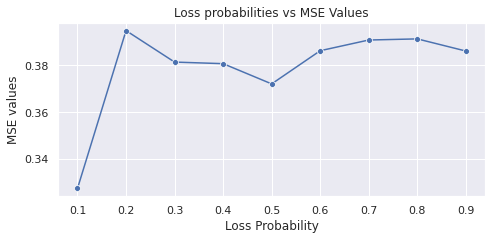

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.lineplot(x = loss_prob, y = errors, markers=True, 
                  marker="o", dashes=False)
# ax.set(xlabel='Loss Probability', ylabel='MSE values')
plt.xlabel("Loss Probability")
plt.ylabel("MSE values")
plt.title("Loss probabilities vs MSE Values") 
plt.show(ax)

##### traditional model building

In [ ]:
def traditional_ML(loss_p):
  # initialize w_0
  model = Sequential()

  # model.add(Dense(64, kernel_initializer='zeros', bias_initializer='zeros', activation=tf.nn.relu, input_dim=6)) # first dense/hidden layer
  model.add(Dense(64, kernel_initializer='he_uniform', bias_initializer="zeros", activation=tf.nn.relu, input_dim=8))
  model.add(Dropout(0.1))

  model.add(Dense(64, kernel_initializer='he_uniform', bias_initializer="zeros", activation=tf.nn.relu)) # second dense/hidden layer
  model.add(Dropout(0.2))

  model.add(Dense(1, kernel_initializer= 'he_uniform', activation=tf.nn.softmax)) # output layer

  # initial_weights = model.get_weights() # setting initial weights; should be same for all clients


  learning_rate = 0.1 # initial learning rate
  decay_rate = 0.1
  momentum = 0.8

  # define the optimizer function
  sgd = SGD(learning_rate = learning_rate, momentum = momentum, decay = decay_rate, nesterov = False)

  # compile the model
  model.compile(loss='mse', 
              optimizer=sgd, 
              metrics=['mse'])

  X, y = dataset[['Latitude', 'Longitude','year', 'month', 'week', 'day', 'hour', 'dayOfWeek']],  dataset['CO']

  x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = loss_p, random_state=1)


  B = int(len(x_train) * 0.01) # so for each client the batch size would be different depending upon the total sample size
  E = max(30, B//10) # number of local epochs; it will also depend on sample size (indirectly)


  model.fit(x_train, y_train, 
                  epochs = E, 
                  batch_size=B,
                  verbose=False)
      
  x_test, y_test = x_test.to_numpy(), y_test.to_numpy()

  # adjusting the dimensions
  x_test = x_test.reshape(x_test.shape[0], 1,  x_test.shape[1])
  y_test = y_test.reshape(y_test.shape[0],1,1)
  y_predicted = model.predict(x_test)
  

  from sklearn.metrics import mean_squared_error
  mse = mean_squared_error(y_predicted.ravel(), y_test.ravel())
  return mse 


In [ ]:

# Final plotting
K = 25 # as we have 25 clients

loss_prob = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
errors_tl = []

for loss_p in loss_prob:
  error = traditional_ML(loss_p)
  errors_tl.append(error)

# reshaping errors
for err_idx in range(len(errors)):
  errors_tl[err_idx] = errors_tl[err_idx].ravel()[0]



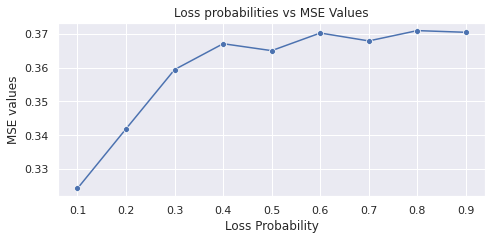

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# sns.lineplot(x = loss_prob, y = errors_tl, markers=True, dashes=False)
ax = sns.lineplot(x = loss_prob, y = errors_tl, markers=True, 
                  marker="o", dashes=False)
# ax.set(xlabel='Loss Probability', ylabel='MSE values')
plt.xlabel("Loss Probability")
plt.ylabel("MSE values")
plt.title("Loss probabilities vs MSE Values") 
plt.show(ax)

##### Mixed line graph

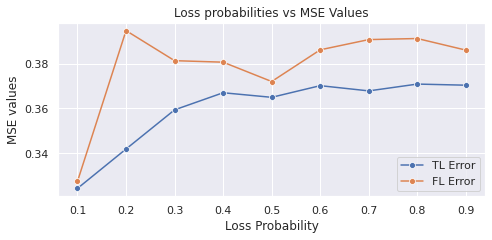

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# sns.lineplot(x = loss_prob, y = errors_tl, markers=True, dashes=False)
ax = sns.lineplot(x = loss_prob, y = errors_tl, markers=True, 
                  marker="o", dashes=False, label = 'TL Error')

ax = sns.lineplot(x = loss_prob, y = errors, markers=True, 
                  marker="o", dashes=False, label = 'FL Error')

# ax.set(xlabel='Loss Probability', ylabel='MSE values')
plt.legend()
plt.xlabel("Loss Probability")
plt.ylabel("MSE values")
plt.title("Loss probabilities vs MSE Values") 
plt.show(ax)

#### chaniging the range of y_axis

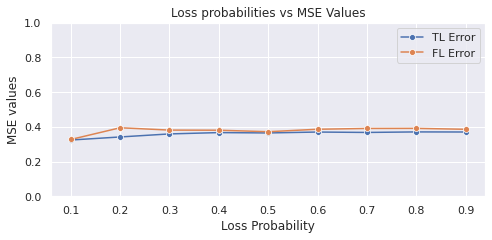

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# sns.lineplot(x = loss_prob, y = errors_tl, markers=True, dashes=False)
ax = sns.lineplot(x = loss_prob, y = errors_tl, markers=True, 
                  marker="o", dashes=False, label = 'TL Error')

ax = sns.lineplot(x = loss_prob, y = errors, markers=True, 
                  marker="o", dashes=False, label = 'FL Error')

ax.set(ylim=(0, 1))

plt.legend()
plt.xlabel("Loss Probability")
plt.ylabel("MSE values")
plt.title("Loss probabilities vs MSE Values") 
plt.show(ax)

#### Stacked Bar graphs for errors

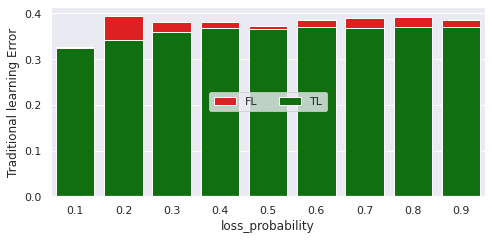

In [ ]:
error_df = pd.DataFrame({'loss_probability': loss_prob, 'Federated Learning Error': errors, 'Traditional learning Error': errors_tl})

import seaborn as sns
# sns.set()
# error_df.set_index('loss_probability').T.plot(kind='bar', stacked=True)
plt.rcParams["figure.figsize"] = [7.00, 3.50]
# plt.rcParams["figure.autolayout"] = True

bar_plot1 = sns.barplot(x='loss_probability', y='Federated Learning Error', data = error_df, label="FL", color="red")
bar_plot2 = sns.barplot(x='loss_probability', y='Traditional learning Error', data=error_df, label="TL", color="green")

plt.legend(ncol=2, loc="center", frameon=True)
plt.show()

# 22nd October
* Feature scaling using Min-Max Scaler
* removing negative values of dependent variable ('CO')
* Using Mean squared error instead of NE
* Adding labels to graph
* Changing t to 1 to 100 (NOT POSSIBLE, IT JUST BLOWS UP THE RAM AND PROCESSING TAKES A LOT OF TIME)
* On changing t values to 10 (instead of 5) doesn't observed any significant change on mse value

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# %tensorflow_version 2.x
# import tensorflow as tf
# print(tf.test.is_gpu_available())
# device_name = tf.test.gpu_device_name()
# if device_name != '/device:GPU:0':
#   raise SystemError('GPU device not found')
# print('Found GPU at: {}'.format(device_name))

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import initializers
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


import tensorflow as tf
# import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import utils
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Activation
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import SGD # from keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop # instead of from keras.optimizers import RMSprop
# from keras import datasets

# from keras.callbacks import LearningRateScheduler
# from keras.callbacks import History

from tensorflow.keras import losses
from sklearn.utils import shuffle

print(tf.__version__)
print(tf.keras.__version__)

2.6.0
2.6.0


In [ ]:
# ClientUpdate(k, w): // Run on client k
def Client(client_idx, model):
    # B ← (split P_k into batches of size B) # what is p_K --> each clients' sample size
    B = int(len(clients[client_idx]) * 0.01) # so for each client the batch size would be different depending upon the total sample size
    E = max(30, B//10) # number of local epochs; it will also depend on sample size (indirectly)
    learning_rate = 0.1 # initial learning rate
    decay_rate = 0.1
    momentum = 0.8

    # define the optimizer function
    sgd = SGD(learning_rate = learning_rate, momentum = momentum, decay = decay_rate, nesterov = False)

    # compile the model
    model.compile(loss='mse', 
                optimizer=sgd, 
                metrics=['mse'])

    data = clients_cut[client_idx]
    # data = dataset.loc[dataset['Station code'] == client_idx]

    X, y = data[['Latitude', 'Longitude','year', 'month', 'week', 'day', 'hour', 'dayOfWeek']],  data['CO']

    x_train, x_val, y_train, y_val = train_test_split(X, y, test_size = 0.1, random_state=1)

    try:
        model.fit(x_train, y_train, 
                    epochs = E, 
                    batch_size=B,
                    validation_data=(x_val, y_val),
                    verbose=False)
    except Exception as e:
        print(e)
        print("error")

    # return w to server
    # in our case no need for any explicit return; as the model is pass by value
    return data.shape[0] # this will return the number of total sample


In [ ]:
# Server executes: 
def Server():
    # initialize w_0
    model = Sequential()
    
    # model.add(Dense(64, kernel_initializer='zeros', bias_initializer='zeros', activation=tf.nn.relu, input_dim=6)) # first dense/hidden layer
    model.add(Dense(64, kernel_initializer='he_uniform', bias_initializer="zeros", activation=tf.nn.relu, input_dim=8))
    model.add(Dropout(0.1))

    model.add(Dense(64, kernel_initializer='he_uniform', bias_initializer="zeros", activation=tf.nn.relu)) # second dense/hidden layer
    model.add(Dropout(0.2))

    model.add(Dense(1, kernel_initializer= 'he_uniform', activation=tf.nn.softmax)) # output layer

    # initial_weights = model.get_weights() # setting initial weights; should be same for all clients


# for each round t = 1, 2, . . . do
    for t in range(1, 10):
        C = np.random.random(1)[0] # random number between 0 and 1.

        # m ← max(C  K, 1)
        m = max(int(C*K), 1) # m == random number of client selected
        weight_t_plus_1 = [None] * m # matrix to store the weights of all client in each t-round
        n_k = [None] * m # parameters for weighted sum 


        # S_t ← (random set of m clients)
        # S = {} # dictionary
        S_t = np.random.uniform(low=101, high=126, size=(m)).astype(int)

        # No need for below loop, as server don't need access to client data, server only need clients' number
        # for client in m_clients:
        #   S[client] = clients[client]

        initial_weights = model.get_weights() # setting initial weights; should be same for all clients
        # for t= 1 to T, initial_weights would be t-1th's final weights

        # for each client k ∈ S_t in parallel do
        client_idx = 0
        for client in S_t:
            # w^(k)_(t+1) ← ClientUpdate(k, model)
            n_k[client_idx] = Client(client, model) # pass by reference for model
            weight_t_plus_1[client_idx] = model.get_weights()
            client_idx += 1

            # setting weights back to initial weights
            model.set_weights(initial_weights)

        # finding the weighted sum
        final_weights_t = np.array(weight_t_plus_1[0]) * (n_k[0] / sum(n_k))

        for idx in range(1, m):
          # w_(t+1) ← summation(k=1 to K){(n_k/n) * w^(k)_(t+1)} #n_k - no. of training sample in each client K; n - total training samples;
          final_weights_t += np.array(weight_t_plus_1[idx]) * (n_k[idx]/ sum(n_k))

        # setting the aggregated weights
        model.set_weights(final_weights_t)


#         print(model.get_weights())
    # return error_clients(model, loss_p)) # THIS LINE WON'T BE THERE IN REAL SERVER
    return model

In [ ]:
def error_clients(model):
    
    X, y = test_data.drop('CO', axis=1),  test_data['CO']
    
    # adjusting the dimensions
    x_test, y_test = X.to_numpy(), y.to_numpy()
    x_test = x_test.reshape(x_test.shape[0], 1,  x_test.shape[1])
    y_test = y_test.reshape(y_test.shape[0],1,1)

    y_predicted = model.predict(x_test)
    
    from sklearn.metrics import mean_squared_error
    # print("y_predicted", y_predicted)
    # print("y_predicted.ravel()", y_predicted.ravel())
    mse = mean_squared_error(y_predicted.ravel(), y_test.ravel())
    return mse  
          

In [ ]:
%%time
# Final plotting
K = 25 # as we have 25 clients

clients = {} # dictionary
clients_cut = {}

## reading the data from each client
for st_code in range(101,126):
    clients[st_code] = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dataNew/station_code"+str(st_code)+".csv", index_col = 0)

    clients[st_code]['Measurement date'] = pd.to_datetime(clients[st_code]['Measurement date'])

    clients[st_code]['year'] = clients[st_code]['Measurement date'].dt.year
    clients[st_code]['month'] = clients[st_code]['Measurement date'].dt.month
    clients[st_code]['week'] = clients[st_code]['Measurement date'].dt.week
    clients[st_code]['day'] = clients[st_code]['Measurement date'].dt.day
    clients[st_code]['hour'] = clients[st_code]['Measurement date'].dt.hour
    clients[st_code]['minute'] = clients[st_code]['Measurement date'].dt.minute # minute is not significant; as only 0 values
    clients[st_code]['dayOfWeek'] = clients[st_code]['Measurement date'].dt.dayofweek

    # choosing features
    clients[st_code] = clients[st_code][['Latitude', 'Longitude','year', 'month', 'week', 'day', 'hour', 'dayOfWeek', 'CO']]

    clients[st_code].drop(clients[st_code][clients[st_code]['CO'] < 0].index, axis=0, inplace=True)


# complete dataset
frames = list(clients.values())
dataset = pd.concat(frames)
# display(dataset)




In [ ]:
clients[118].head()

Latitude   Longitude  year  month  week  day  hour  dayOfWeek   CO
440296  37.452357  126.908296  2017      1    52    1     0          6  1.2
440297  37.452357  126.908296  2017      1    52    1     1          6  1.3
440298  37.452357  126.908296  2017      1    52    1     2          6  1.2
440299  37.452357  126.908296  2017      1    52    1     3          6  1.1
440300  37.452357  126.908296  2017      1    52    1     4          6  1.1

In [ ]:
dataset.tail()

Latitude   Longitude  year  month  week  day  hour  dayOfWeek   CO
647506  37.544962  127.136792  2019     12     1   31    19          1  0.5
647507  37.544962  127.136792  2019     12     1   31    20          1  0.4
647508  37.544962  127.136792  2019     12     1   31    21          1  0.4
647509  37.544962  127.136792  2019     12     1   31    22          1  0.5
647510  37.544962  127.136792  2019     12     1   31    23          1  0.5

In [ ]:

# create an Empty DataFrame object
train_data = pd.DataFrame()
test_data = pd.DataFrame()
loss_prob = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
models = []
errors = []

# reading all the clients and building model
for lp in loss_prob:
    for st_code in range(101,126):
        # splitting into train test split
        X, y = clients[st_code].drop('CO', axis=1),  clients[st_code]['CO']
        x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = lp, random_state=0)

        # Normalization using min-max scaler
        # Normalization across instances should be done after splitting the data between training and test set, using only the data from the training set.
        # to avoid data leak
        scaler_cols = x_train.columns
        scaler_idx_train = x_train.index
        scaler_idx_test = x_test.index

        # from sklearn.preprocessing import MinMaxScaler
        scaler = MinMaxScaler()

        # transforming train data
        x_train_encoded_scaled = pd.DataFrame(scaler.fit_transform(x_train), columns = scaler_cols, index=scaler_idx_train)
        # display(x_train_encoded_scaled.head())

        # transforming test data
        x_test_encoded_scaled = pd.DataFrame(scaler.transform(x_test), columns = scaler_cols, index = scaler_idx_test)
        # display(x_test_encoded_scaled.head())

        # training data prep
        clients_cut[st_code] = pd.concat([x_train_encoded_scaled, y_train], axis = 1)

        # testing data prep
        # first appending x_test and y_test column wise
        # then appending each clients' dataframe one below other
        if st_code == 101:
          test_data = pd.concat([x_test_encoded_scaled, y_test], axis = 1)
        else:
          xy = pd.concat([x_test_encoded_scaled, y_test], axis=1)
          test_data = pd.concat([test_data, xy], axis=0)
        # x_test, y_test = x_test.to_numpy(), y_test.to_numpy()
    
    # Training the model using federated learning
    model = Server()

    # testing model
    errors.append(error_clients(model))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local

In [ ]:
test_data.isnull().sum()

In [ ]:
print("before reshaping")
display(errors)
print("****************************************************************************************************")

# reshaping errors
for err_idx in range(len(errors)):
  errors[err_idx] = errors[err_idx].ravel()[0]

print("after reshaping")
display(errors)
print("****************************************************************************************************")

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.lineplot(x = loss_prob, y = errors, markers=True, 
                  marker="o", dashes=False)
# ax.set(xlabel='Loss Probability', ylabel='MSE values')
plt.xlabel("Loss Probability")
plt.ylabel("MSE values")
plt.title("Loss probabilities vs MSE Values") 
plt.show(ax)

##### traditional model building

In [ ]:
def traditional_ML(loss_p):
  # initialize w_0
  model = Sequential()

  # model.add(Dense(64, kernel_initializer='zeros', bias_initializer='zeros', activation=tf.nn.relu, input_dim=6)) # first dense/hidden layer
  model.add(Dense(64, kernel_initializer='he_uniform', bias_initializer="zeros", activation=tf.nn.relu, input_dim=8))
  model.add(Dropout(0.1))

  model.add(Dense(64, kernel_initializer='he_uniform', bias_initializer="zeros", activation=tf.nn.relu)) # second dense/hidden layer
  model.add(Dropout(0.2))

  model.add(Dense(1, kernel_initializer= 'he_uniform', activation=tf.nn.softmax)) # output layer

  # initial_weights = model.get_weights() # setting initial weights; should be same for all clients


  learning_rate = 0.1 # initial learning rate
  decay_rate = 0.1
  momentum = 0.8

  # define the optimizer function
  sgd = SGD(learning_rate = learning_rate, momentum = momentum, decay = decay_rate, nesterov = False)

  # compile the model
  model.compile(loss='mse', 
              optimizer=sgd, 
              metrics=['mse'])

  X, y = dataset[['Latitude', 'Longitude','year', 'month', 'week', 'day', 'hour', 'dayOfWeek']],  dataset['CO']

  x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = loss_p, random_state=1)


  B = int(len(x_train) * 0.01) # so for each client the batch size would be different depending upon the total sample size
  E = max(30, B//10) # number of local epochs; it will also depend on sample size (indirectly)


  model.fit(x_train, y_train, 
                  epochs = E, 
                  batch_size=B,
                  verbose=False)
      
  x_test, y_test = x_test.to_numpy(), y_test.to_numpy()

  # adjusting the dimensions
  x_test = x_test.reshape(x_test.shape[0], 1,  x_test.shape[1])
  y_test = y_test.reshape(y_test.shape[0],1,1)
  y_predicted = model.predict(x_test)
  

  from sklearn.metrics import mean_squared_error
  mse = mean_squared_error(y_predicted.ravel(), y_test.ravel())
  return mse 


In [ ]:

# Final plotting
K = 25 # as we have 25 clients

loss_prob = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
errors_tl = []

for loss_p in loss_prob:
  error = traditional_ML(loss_p)
  errors_tl.append(error)

# reshaping errors
for err_idx in range(len(errors)):
  errors_tl[err_idx] = errors_tl[err_idx].ravel()[0]



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# sns.lineplot(x = loss_prob, y = errors_tl, markers=True, dashes=False)
ax = sns.lineplot(x = loss_prob, y = errors_tl, markers=True, 
                  marker="o", dashes=False)
# ax.set(xlabel='Loss Probability', ylabel='MSE values')
plt.xlabel("Loss Probability")
plt.ylabel("MSE values")
plt.title("Loss probabilities vs MSE Values") 
plt.show(ax)

##### Mixed line graph

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# sns.lineplot(x = loss_prob, y = errors_tl, markers=True, dashes=False)
ax = sns.lineplot(x = loss_prob, y = errors_tl, markers=True, 
                  marker="o", dashes=False, label = 'TL Error')

ax = sns.lineplot(x = loss_prob, y = errors, markers=True, 
                  marker="o", dashes=False, label = 'FL Error')

# ax.set(xlabel='Loss Probability', ylabel='MSE values')
plt.legend()
plt.xlabel("Loss Probability")
plt.ylabel("MSE values")
plt.title("Loss probabilities vs MSE Values") 
plt.show(ax)

#### chaniging the range of y_axis

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# sns.lineplot(x = loss_prob, y = errors_tl, markers=True, dashes=False)
ax = sns.lineplot(x = loss_prob, y = errors_tl, markers=True, 
                  marker="o", dashes=False, label = 'TL Error')

ax = sns.lineplot(x = loss_prob, y = errors, markers=True, 
                  marker="o", dashes=False, label = 'FL Error')

ax.set(ylim=(0, 1))

plt.legend()
plt.xlabel("Loss Probability")
plt.ylabel("MSE values")
plt.title("Loss probabilities vs MSE Values") 
plt.show(ax)

#### Stacked Bar graphs for errors

In [ ]:
error_df = pd.DataFrame({'loss_probability': loss_prob, 'Federated Learning Error': errors, 'Traditional learning Error': errors_tl})

import seaborn as sns
# sns.set()
# error_df.set_index('loss_probability').T.plot(kind='bar', stacked=True)
plt.rcParams["figure.figsize"] = [7.00, 3.50]
# plt.rcParams["figure.autolayout"] = True

bar_plot1 = sns.barplot(x='loss_probability', y='Federated Learning Error', data = error_df, label="FL", color="red")
bar_plot2 = sns.barplot(x='loss_probability', y='Traditional learning Error', data=error_df, label="TL", color="green")

plt.legend(ncol=2, loc="center", frameon=True)
plt.show()

# 23rd October
* Feature scaling using Min-Max Scaler
* removing negative values of dependent variable ('CO')
* Using Mean squared error instead of NE
* Adding labels to graph
* Using 'softplus' instead of 'relu' for training

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# %tensorflow_version 2.x
# import tensorflow as tf
# print(tf.test.is_gpu_available())
# device_name = tf.test.gpu_device_name()
# if device_name != '/device:GPU:0':
#   raise SystemError('GPU device not found')
# print('Found GPU at: {}'.format(device_name))

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import initializers
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


import tensorflow as tf
# import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import utils
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Activation
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import SGD # from keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop # instead of from keras.optimizers import RMSprop
# from keras import datasets

# from keras.callbacks import LearningRateScheduler
# from keras.callbacks import History

from tensorflow.keras import losses
from sklearn.utils import shuffle

print(tf.__version__)
print(tf.keras.__version__)

2.6.0
2.6.0


In [ ]:
# ClientUpdate(k, w): // Run on client k
def Client(client_idx, model):
    # B ← (split P_k into batches of size B) # what is p_K --> each clients' sample size
    B = int(len(clients[client_idx]) * 0.01) # so for each client the batch size would be different depending upon the total sample size
    E = max(30, B//10) # number of local epochs; it will also depend on sample size (indirectly)
    learning_rate = 0.1 # initial learning rate
    decay_rate = 0.1
    momentum = 0.8

    # define the optimizer function
    sgd = SGD(learning_rate = learning_rate, momentum = momentum, decay = decay_rate, nesterov = False)

    # compile the model
    model.compile(loss='mse', 
                optimizer=sgd, 
                metrics=['mse'])

    data = clients_cut[client_idx]
    # data = dataset.loc[dataset['Station code'] == client_idx]

    X, y = data[['Latitude', 'Longitude','year', 'month', 'week', 'day', 'hour', 'dayOfWeek']],  data['CO']

    x_train, x_val, y_train, y_val = train_test_split(X, y, test_size = 0.1, random_state=1)

    try:
        model.fit(x_train, y_train, 
                    epochs = E, 
                    batch_size=B,
                    validation_data=(x_val, y_val),
                    verbose=False)
    except Exception as e:
        print(e)
        print("error")

    # return w to server
    # in our case no need for any explicit return; as the model is pass by value
    return data.shape[0] # this will return the number of total sample


In [ ]:
# Server executes: 
def Server():
    # initialize w_0
    model = Sequential()
    # tf.keras.activations.softplus
    # model.add(Dense(64, kernel_initializer='zeros', bias_initializer='zeros', activation=tf.nn.relu, input_dim=6)) # first dense/hidden layer
    model.add(Dense(64, kernel_initializer='he_uniform', bias_initializer="zeros", activation='softplus', input_dim=8))
    model.add(Dropout(0.1))

    model.add(Dense(64, kernel_initializer='he_uniform', bias_initializer="zeros", activation='softplus')) # second dense/hidden layer
    model.add(Dropout(0.2))

    model.add(Dense(1, kernel_initializer= 'he_uniform', activation=tf.nn.softmax)) # output layer

    # initial_weights = model.get_weights() # setting initial weights; should be same for all clients


# for each round t = 1, 2, . . . do
    for t in range(1, 5):
        C = np.random.random(1)[0] # random number between 0 and 1.

        # m ← max(C  K, 1)
        m = max(int(C*K), 1) # m == random number of client selected
        weight_t_plus_1 = [None] * m # matrix to store the weights of all client in each t-round
        n_k = [None] * m # parameters for weighted sum 


        # S_t ← (random set of m clients)
        # S = {} # dictionary
        S_t = np.random.uniform(low=101, high=126, size=(m)).astype(int)

        # No need for below loop, as server don't need access to client data, server only need clients' number
        # for client in m_clients:
        #   S[client] = clients[client]

        initial_weights = model.get_weights() # setting initial weights; should be same for all clients
        # for t= 1 to T, initial_weights would be t-1th's final weights

        # for each client k ∈ S_t in parallel do
        client_idx = 0
        for client in S_t:
            # w^(k)_(t+1) ← ClientUpdate(k, model)
            n_k[client_idx] = Client(client, model) # pass by reference for model
            weight_t_plus_1[client_idx] = model.get_weights()
            client_idx += 1

            # setting weights back to initial weights
            model.set_weights(initial_weights)

        # finding the weighted sum
        final_weights_t = np.array(weight_t_plus_1[0]) * (n_k[0] / sum(n_k))

        for idx in range(1, m):
          # w_(t+1) ← summation(k=1 to K){(n_k/n) * w^(k)_(t+1)} #n_k - no. of training sample in each client K; n - total training samples;
          final_weights_t += np.array(weight_t_plus_1[idx]) * (n_k[idx]/ sum(n_k))

        # setting the aggregated weights
        model.set_weights(final_weights_t)


#         print(model.get_weights())
    # return error_clients(model, loss_p)) # THIS LINE WON'T BE THERE IN REAL SERVER
    return model

In [ ]:
def error_clients(model):
    
    X, y = test_data.drop('CO', axis=1),  test_data['CO']
    
    # adjusting the dimensions
    x_test, y_test = X.to_numpy(), y.to_numpy()
    x_test = x_test.reshape(x_test.shape[0], 1,  x_test.shape[1])
    y_test = y_test.reshape(y_test.shape[0],1,1)

    y_predicted = model.predict(x_test)
    
    from sklearn.metrics import mean_squared_error
    # print("y_predicted", y_predicted)
    # print("y_predicted.ravel()", y_predicted.ravel())
    mse = mean_squared_error(y_predicted.ravel(), y_test.ravel())
    return mse  
          

In [ ]:
%%time
# Final plotting
K = 25 # as we have 25 clients

clients = {} # dictionary
clients_cut = {}

## reading the data from each client
for st_code in range(101,126):
    clients[st_code] = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dataNew/station_code"+str(st_code)+".csv", index_col = 0)

    clients[st_code]['Measurement date'] = pd.to_datetime(clients[st_code]['Measurement date'])

    clients[st_code]['year'] = clients[st_code]['Measurement date'].dt.year
    clients[st_code]['month'] = clients[st_code]['Measurement date'].dt.month
    clients[st_code]['week'] = clients[st_code]['Measurement date'].dt.week
    clients[st_code]['day'] = clients[st_code]['Measurement date'].dt.day
    clients[st_code]['hour'] = clients[st_code]['Measurement date'].dt.hour
    clients[st_code]['minute'] = clients[st_code]['Measurement date'].dt.minute # minute is not significant; as only 0 values
    clients[st_code]['dayOfWeek'] = clients[st_code]['Measurement date'].dt.dayofweek

    # choosing features
    clients[st_code] = clients[st_code][['Latitude', 'Longitude','year', 'month', 'week', 'day', 'hour', 'dayOfWeek', 'CO']]

    clients[st_code].drop(clients[st_code][clients[st_code]['CO'] < 0].index, axis=0, inplace=True)


# complete dataset
frames = list(clients.values())
dataset = pd.concat(frames)
# display(dataset)




In [ ]:
clients[118].head()

Latitude   Longitude  year  month  week  day  hour  dayOfWeek   CO
440296  37.452357  126.908296  2017      1    52    1     0          6  1.2
440297  37.452357  126.908296  2017      1    52    1     1          6  1.3
440298  37.452357  126.908296  2017      1    52    1     2          6  1.2
440299  37.452357  126.908296  2017      1    52    1     3          6  1.1
440300  37.452357  126.908296  2017      1    52    1     4          6  1.1

In [ ]:
dataset.tail()

Latitude   Longitude  year  month  week  day  hour  dayOfWeek   CO
647506  37.544962  127.136792  2019     12     1   31    19          1  0.5
647507  37.544962  127.136792  2019     12     1   31    20          1  0.4
647508  37.544962  127.136792  2019     12     1   31    21          1  0.4
647509  37.544962  127.136792  2019     12     1   31    22          1  0.5
647510  37.544962  127.136792  2019     12     1   31    23          1  0.5

In [ ]:

# create an Empty DataFrame object
train_data = pd.DataFrame()
test_data = pd.DataFrame()
loss_prob = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
models = []
errors = []

# reading all the clients and building model
for lp in loss_prob:
    for st_code in range(101,126):
        # splitting into train test split
        X, y = clients[st_code].drop('CO', axis=1),  clients[st_code]['CO']
        x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = lp, random_state=0)

        # Normalization using min-max scaler
        # Normalization across instances should be done after splitting the data between training and test set, using only the data from the training set.
        # to avoid data leak
        scaler_cols = x_train.columns
        scaler_idx_train = x_train.index
        scaler_idx_test = x_test.index

        # from sklearn.preprocessing import MinMaxScaler
        scaler = MinMaxScaler()

        # transforming train data
        x_train_encoded_scaled = pd.DataFrame(scaler.fit_transform(x_train), columns = scaler_cols, index=scaler_idx_train)
        # display(x_train_encoded_scaled.head())

        # transforming test data
        x_test_encoded_scaled = pd.DataFrame(scaler.transform(x_test), columns = scaler_cols, index = scaler_idx_test)
        # display(x_test_encoded_scaled.head())

        # training data prep
        clients_cut[st_code] = pd.concat([x_train_encoded_scaled, y_train], axis = 1)

        # testing data prep
        # first appending x_test and y_test column wise
        # then appending each clients' dataframe one below other
        if st_code == 101:
          test_data = pd.concat([x_test_encoded_scaled, y_test], axis = 1)
        else:
          xy = pd.concat([x_test_encoded_scaled, y_test], axis=1)
          test_data = pd.concat([test_data, xy], axis=0)
        # x_test, y_test = x_test.to_numpy(), y_test.to_numpy()
    
    # Training the model using federated learning
    model = Server()

    # testing model
    errors.append(error_clients(model))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [ ]:
test_data.isnull().sum()

Latitude     0
Longitude    0
year         0
month        0
week         0
day          0
hour         0
dayOfWeek    0
CO           0
dtype: int64

In [ ]:
print("before reshaping")
display(errors)
print("****************************************************************************************************")

# reshaping errors
for err_idx in range(len(errors)):
  errors[err_idx] = errors[err_idx].ravel()[0]

print("after reshaping")
display(errors)
print("****************************************************************************************************")

before reshaping


[0.32737732682805554,
 0.3948640312028966,
 0.3814050400145036,
 0.3807280885780886,
 0.37207205107165947,
 0.3862660322821267,
 0.39084239480332655,
 0.39132232560850067,
 0.3861305489701089]

****************************************************************************************************
after reshaping


[0.32737732682805554,
 0.3948640312028966,
 0.3814050400145036,
 0.3807280885780886,
 0.37207205107165947,
 0.3862660322821267,
 0.39084239480332655,
 0.39132232560850067,
 0.3861305489701089]

****************************************************************************************************


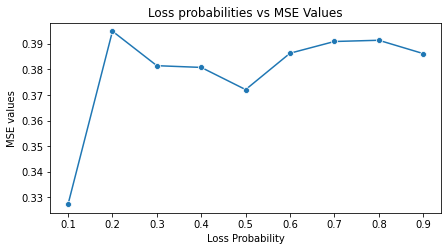

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.lineplot(x = loss_prob, y = errors, markers=True, 
                  marker="o", dashes=False)
# ax.set(xlabel='Loss Probability', ylabel='MSE values')
plt.xlabel("Loss Probability")
plt.ylabel("MSE values")
plt.title("Loss probabilities vs MSE Values") 
plt.show(ax)

##### traditional model building

In [ ]:
def traditional_ML(loss_p):
  # initialize w_0
  model = Sequential()

  # model.add(Dense(64, kernel_initializer='zeros', bias_initializer='zeros', activation=tf.nn.relu, input_dim=6)) # first dense/hidden layer
  model.add(Dense(64, kernel_initializer='he_uniform', bias_initializer="zeros", activation='softplus', input_dim=8))
  model.add(Dropout(0.1))

  model.add(Dense(64, kernel_initializer='he_uniform', bias_initializer="zeros", activation='softplus')) # second dense/hidden layer
  model.add(Dropout(0.2))

  model.add(Dense(1, kernel_initializer= 'he_uniform', activation=tf.nn.softmax)) # output layer

  # initial_weights = model.get_weights() # setting initial weights; should be same for all clients


  learning_rate = 0.1 # initial learning rate
  decay_rate = 0.1
  momentum = 0.8

  # define the optimizer function
  sgd = SGD(learning_rate = learning_rate, momentum = momentum, decay = decay_rate, nesterov = False)

  # compile the model
  model.compile(loss='mse', 
              optimizer=sgd, 
              metrics=['mse'])

  X, y = dataset[['Latitude', 'Longitude','year', 'month', 'week', 'day', 'hour', 'dayOfWeek']],  dataset['CO']

  x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = loss_p, random_state=1)


  B = int(len(x_train) * 0.01) # so for each client the batch size would be different depending upon the total sample size
  E = max(30, B//10) # number of local epochs; it will also depend on sample size (indirectly)


  model.fit(x_train, y_train, 
                  epochs = E, 
                  batch_size=B,
                  verbose=False)
      
  x_test, y_test = x_test.to_numpy(), y_test.to_numpy()

  # adjusting the dimensions
  x_test = x_test.reshape(x_test.shape[0], 1,  x_test.shape[1])
  y_test = y_test.reshape(y_test.shape[0],1,1)
  y_predicted = model.predict(x_test)
  

  from sklearn.metrics import mean_squared_error
  mse = mean_squared_error(y_predicted.ravel(), y_test.ravel())
  return mse 


In [ ]:

# Final plotting
K = 25 # as we have 25 clients

loss_prob = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
errors_tl = []

for loss_p in loss_prob:
  error = traditional_ML(loss_p)
  errors_tl.append(error)

# reshaping errors
for err_idx in range(len(errors)):
  errors_tl[err_idx] = errors_tl[err_idx].ravel()[0]



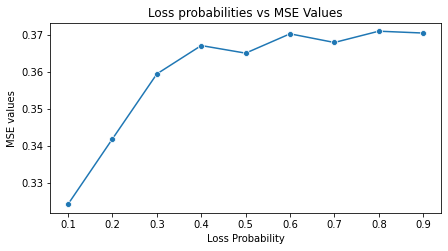

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# sns.lineplot(x = loss_prob, y = errors_tl, markers=True, dashes=False)
ax = sns.lineplot(x = loss_prob, y = errors_tl, markers=True, 
                  marker="o", dashes=False)
# ax.set(xlabel='Loss Probability', ylabel='MSE values')
plt.xlabel("Loss Probability")
plt.ylabel("MSE values")
plt.title("Loss probabilities vs MSE Values") 
plt.show(ax)

##### Mixed line graph

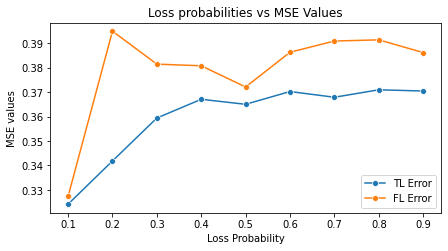

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# sns.lineplot(x = loss_prob, y = errors_tl, markers=True, dashes=False)
ax = sns.lineplot(x = loss_prob, y = errors_tl, markers=True, 
                  marker="o", dashes=False, label = 'TL Error')

ax = sns.lineplot(x = loss_prob, y = errors, markers=True, 
                  marker="o", dashes=False, label = 'FL Error')

# ax.set(xlabel='Loss Probability', ylabel='MSE values')
plt.legend()
plt.xlabel("Loss Probability")
plt.ylabel("MSE values")
plt.title("Loss probabilities vs MSE Values") 
plt.show(ax)

#### chaniging the range of y_axis

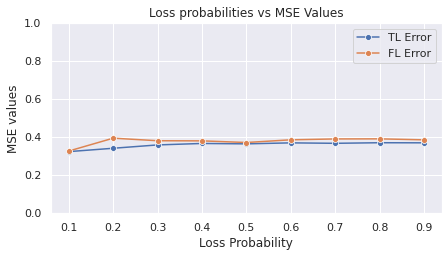

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# sns.lineplot(x = loss_prob, y = errors_tl, markers=True, dashes=False)
ax = sns.lineplot(x = loss_prob, y = errors_tl, markers=True, 
                  marker="o", dashes=False, label = 'TL Error')

ax = sns.lineplot(x = loss_prob, y = errors, markers=True, 
                  marker="o", dashes=False, label = 'FL Error')

ax.set(ylim=(0, 1))

plt.legend()
plt.xlabel("Loss Probability")
plt.ylabel("MSE values")
plt.title("Loss probabilities vs MSE Values") 
plt.show(ax)

#### Stacked Bar graphs for errors

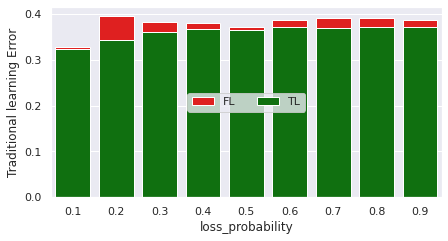

In [ ]:
error_df = pd.DataFrame({'loss_probability': loss_prob, 'Federated Learning Error': errors, 'Traditional learning Error': errors_tl})

import seaborn as sns
sns.set()
# error_df.set_index('loss_probability').T.plot(kind='bar', stacked=True)
plt.rcParams["figure.figsize"] = [7.00, 3.50]
# plt.rcParams["figure.autolayout"] = True

bar_plot1 = sns.barplot(x='loss_probability', y='Federated Learning Error', data = error_df, label="FL", color="red")
bar_plot2 = sns.barplot(x='loss_probability', y='Traditional learning Error', data=error_df, label="TL", color="green")

plt.legend(ncol=2, loc="center", frameon=True)
plt.show()

# 24th October Part-A
* Feature scaling using Min-Max Scaler
* removing negative values of dependent variable ('CO')
* Using Mean squared error instead of NE
* Adding labels to graph
* use of he_uniform for relu activation; glorot_uniform for sigmoid

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# %tensorflow_version 2.x
# import tensorflow as tf
# print(tf.test.is_gpu_available())
# device_name = tf.test.gpu_device_name()
# if device_name != '/device:GPU:0':
#   raise SystemError('GPU device not found')
# print('Found GPU at: {}'.format(device_name))

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import initializers
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


import tensorflow as tf
# import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import utils
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Activation
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import SGD # from keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop # instead of from keras.optimizers import RMSprop
# from keras import datasets

# from keras.callbacks import LearningRateScheduler
# from keras.callbacks import History

from tensorflow.keras import losses
from sklearn.utils import shuffle

print(tf.__version__)
print(tf.keras.__version__)

2.6.0
2.6.0


In [ ]:
# ClientUpdate(k, w): // Run on client k
def Client(client_idx, model):
    # B ← (split P_k into batches of size B) # what is p_K --> each clients' sample size
    B = int(len(clients[client_idx]) * 0.01) # so for each client the batch size would be different depending upon the total sample size
    E = max(30, B//10) # number of local epochs; it will also depend on sample size (indirectly)
    learning_rate = 0.1 # initial learning rate
    decay_rate = 0.1
    momentum = 0.8

    # define the optimizer function
    sgd = SGD(learning_rate = learning_rate, momentum = momentum, decay = decay_rate, nesterov = False)

    # compile the model
    model.compile(loss='mse', 
                optimizer=sgd, 
                metrics=['mse'])

    data = clients_cut[client_idx]
    # data = dataset.loc[dataset['Station code'] == client_idx]

    X, y = data[['Latitude', 'Longitude','year', 'month', 'week', 'day', 'hour', 'dayOfWeek']],  data['CO']

    x_train, x_val, y_train, y_val = train_test_split(X, y, test_size = 0.1, random_state=1)

    try:
        model.fit(x_train, y_train, 
                    epochs = E, 
                    batch_size=B,
                    validation_data=(x_val, y_val),
                    verbose=False)
    except Exception as e:
        print(e)
        print("error")

    # return w to server
    # in our case no need for any explicit return; as the model is pass by value
    return data.shape[0] # this will return the number of total sample


In [ ]:
# Server executes: 
def Server():
    # initialize w_0
    model = Sequential()
    
    # model.add(Dense(64, kernel_initializer='zeros', bias_initializer='zeros', activation=tf.nn.relu, input_dim=6)) # first dense/hidden layer
    model.add(Dense(64, kernel_initializer='he_uniform', bias_initializer="zeros", activation=tf.nn.relu, input_dim=8))
    model.add(Dropout(0.1))

    model.add(Dense(64, kernel_initializer='he_uniform', bias_initializer="zeros", activation=tf.nn.relu)) # second dense/hidden layer
    model.add(Dropout(0.2))

    model.add(Dense(1, kernel_initializer= 'glorot_uniform', activation=tf.nn.softmax)) # output layer

    # initial_weights = model.get_weights() # setting initial weights; should be same for all clients


# for each round t = 1, 2, . . . do
    for t in range(1, 5):
        C = np.random.random(1)[0] # random number between 0 and 1.

        # m ← max(C  K, 1)
        m = max(int(C*K), 1) # m == random number of client selected
        weight_t_plus_1 = [None] * m # matrix to store the weights of all client in each t-round
        n_k = [None] * m # parameters for weighted sum 


        # S_t ← (random set of m clients)
        # S = {} # dictionary
        S_t = np.random.uniform(low=101, high=126, size=(m)).astype(int)

        # No need for below loop, as server don't need access to client data, server only need clients' number
        # for client in m_clients:
        #   S[client] = clients[client]

        initial_weights = model.get_weights() # setting initial weights; should be same for all clients
        # for t= 1 to T, initial_weights would be t-1th's final weights

        # for each client k ∈ S_t in parallel do
        client_idx = 0
        for client in S_t:
            # w^(k)_(t+1) ← ClientUpdate(k, model)
            n_k[client_idx] = Client(client, model) # pass by reference for model
            weight_t_plus_1[client_idx] = model.get_weights()
            client_idx += 1

            # setting weights back to initial weights
            model.set_weights(initial_weights)

        # finding the weighted sum
        final_weights_t = np.array(weight_t_plus_1[0]) * (n_k[0] / sum(n_k))

        for idx in range(1, m):
          # w_(t+1) ← summation(k=1 to K){(n_k/n) * w^(k)_(t+1)} #n_k - no. of training sample in each client K; n - total training samples;
          final_weights_t += np.array(weight_t_plus_1[idx]) * (n_k[idx]/ sum(n_k))

        # setting the aggregated weights
        model.set_weights(final_weights_t)


#         print(model.get_weights())
    # return error_clients(model, loss_p)) # THIS LINE WON'T BE THERE IN REAL SERVER
    return model

In [ ]:
def error_clients(model):
    
    X, y = test_data.drop('CO', axis=1),  test_data['CO']
    
    # adjusting the dimensions
    x_test, y_test = X.to_numpy(), y.to_numpy()
    x_test = x_test.reshape(x_test.shape[0], 1,  x_test.shape[1])
    y_test = y_test.reshape(y_test.shape[0],1,1)

    y_predicted = model.predict(x_test)
    
    from sklearn.metrics import mean_squared_error
    # print("y_predicted", y_predicted)
    # print("y_predicted.ravel()", y_predicted.ravel())
    mse = mean_squared_error(y_predicted.ravel(), y_test.ravel())
    return mse  
          

In [ ]:
%%time
# Final plotting
K = 25 # as we have 25 clients

clients = {} # dictionary
clients_cut = {}

## reading the data from each client
for st_code in range(101,126):
    clients[st_code] = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dataNew/station_code"+str(st_code)+".csv", index_col = 0)

    clients[st_code]['Measurement date'] = pd.to_datetime(clients[st_code]['Measurement date'])

    clients[st_code]['year'] = clients[st_code]['Measurement date'].dt.year
    clients[st_code]['month'] = clients[st_code]['Measurement date'].dt.month
    clients[st_code]['week'] = clients[st_code]['Measurement date'].dt.week
    clients[st_code]['day'] = clients[st_code]['Measurement date'].dt.day
    clients[st_code]['hour'] = clients[st_code]['Measurement date'].dt.hour
    clients[st_code]['minute'] = clients[st_code]['Measurement date'].dt.minute # minute is not significant; as only 0 values
    clients[st_code]['dayOfWeek'] = clients[st_code]['Measurement date'].dt.dayofweek

    # choosing features
    clients[st_code] = clients[st_code][['Latitude', 'Longitude','year', 'month', 'week', 'day', 'hour', 'dayOfWeek', 'CO']]

    clients[st_code].drop(clients[st_code][clients[st_code]['CO'] < 0].index, axis=0, inplace=True)


# complete dataset
frames = list(clients.values())
dataset = pd.concat(frames)
# display(dataset)




In [ ]:
clients[118].head()

Latitude   Longitude  year  month  week  day  hour  dayOfWeek   CO
440296  37.452357  126.908296  2017      1    52    1     0          6  1.2
440297  37.452357  126.908296  2017      1    52    1     1          6  1.3
440298  37.452357  126.908296  2017      1    52    1     2          6  1.2
440299  37.452357  126.908296  2017      1    52    1     3          6  1.1
440300  37.452357  126.908296  2017      1    52    1     4          6  1.1

In [ ]:
dataset.tail()

Latitude   Longitude  year  month  week  day  hour  dayOfWeek   CO
647506  37.544962  127.136792  2019     12     1   31    19          1  0.5
647507  37.544962  127.136792  2019     12     1   31    20          1  0.4
647508  37.544962  127.136792  2019     12     1   31    21          1  0.4
647509  37.544962  127.136792  2019     12     1   31    22          1  0.5
647510  37.544962  127.136792  2019     12     1   31    23          1  0.5

In [ ]:

# create an Empty DataFrame object
train_data = pd.DataFrame()
test_data = pd.DataFrame()
loss_prob = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
models = []
errors = []

# reading all the clients and building model
for lp in loss_prob:
    for st_code in range(101,126):
        # splitting into train test split
        X, y = clients[st_code][['Latitude', 'Longitude','year', 'month', 'week', 'day', 'hour', 'dayOfWeek']],  clients[st_code]['CO']
        x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = lp, random_state=0)

        # Normalization using min-max scaler
        # Normalization across instances should be done after splitting the data between training and test set, using only the data from the training set.
        # to avoid data leak
        scaler_cols = x_train.columns
        scaler_idx_train = x_train.index
        scaler_idx_test = x_test.index

        # from sklearn.preprocessing import MinMaxScaler
        scaler = MinMaxScaler()

        # transforming train data
        x_train_encoded_scaled = pd.DataFrame(scaler.fit_transform(x_train), columns = scaler_cols, index=scaler_idx_train)
        # display(x_train_encoded_scaled.head())

        # transforming test data
        x_test_encoded_scaled = pd.DataFrame(scaler.transform(x_test), columns = scaler_cols, index = scaler_idx_test)
        # display(x_test_encoded_scaled.head())

        # training data prep
        clients_cut[st_code] = pd.concat([x_train_encoded_scaled, y_train], axis = 1)

        # testing data prep
        # first appending x_test and y_test column wise
        # then appending each clients' dataframe one below other
        if st_code == 101:
          test_data = pd.concat([x_test_encoded_scaled, y_test], axis = 1)
        else:
          xy = pd.concat([x_test_encoded_scaled, y_test], axis=1)
          test_data = pd.concat([test_data, xy], axis=0)
        # x_test, y_test = x_test.to_numpy(), y_test.to_numpy()
    
    # Training the model using federated learning
    model = Server()

    # testing model
    errors.append(error_clients(model))


In [ ]:
test_data.isnull().sum()

Latitude     0
Longitude    0
year         0
month        0
week         0
day          0
hour         0
dayOfWeek    0
CO           0
dtype: int64

In [ ]:
print("before reshaping")
display(errors)
print("****************************************************************************************************")

# reshaping errors
for err_idx in range(len(errors)):
  errors[err_idx] = errors[err_idx].ravel()[0]

print("after reshaping")
display(errors)
print("****************************************************************************************************")

before reshaping


[0.32737732682805554,
 0.3948640312028966,
 0.3814050400145036,
 0.3807280885780886,
 0.37207205107165947,
 0.3862660322821267,
 0.39084239480332655,
 0.39132232560850067,
 0.3861305489701089]

****************************************************************************************************
after reshaping


[0.32737732682805554,
 0.3948640312028966,
 0.3814050400145036,
 0.3807280885780886,
 0.37207205107165947,
 0.3862660322821267,
 0.39084239480332655,
 0.39132232560850067,
 0.3861305489701089]

****************************************************************************************************


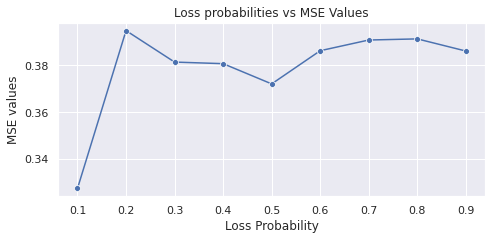

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.lineplot(x = loss_prob, y = errors, markers=True, 
                  marker="o", dashes=False)
# ax.set(xlabel='Loss Probability', ylabel='MSE values')
plt.xlabel("Loss Probability")
plt.ylabel("MSE values")
plt.title("Loss probabilities vs MSE Values") 
plt.show(ax)

##### traditional model building

In [ ]:
def traditional_ML(loss_p):
  # initialize w_0
  model = Sequential()

  # model.add(Dense(64, kernel_initializer='zeros', bias_initializer='zeros', activation=tf.nn.relu, input_dim=6)) # first dense/hidden layer
  model.add(Dense(64, kernel_initializer='he_uniform', bias_initializer="zeros", activation=tf.nn.relu, input_dim=8))
  model.add(Dropout(0.1))

  model.add(Dense(64, kernel_initializer='he_uniform', bias_initializer="zeros", activation=tf.nn.relu)) # second dense/hidden layer
  model.add(Dropout(0.2))

  model.add(Dense(1, kernel_initializer= 'glorot_uniform', activation=tf.nn.softmax)) # output layer

  # initial_weights = model.get_weights() # setting initial weights; should be same for all clients


  learning_rate = 0.1 # initial learning rate
  decay_rate = 0.1
  momentum = 0.8

  # define the optimizer function
  sgd = SGD(learning_rate = learning_rate, momentum = momentum, decay = decay_rate, nesterov = False)

  # compile the model
  model.compile(loss='mse', 
              optimizer=sgd, 
              metrics=['mse'])

  X, y = dataset[['Latitude', 'Longitude','year', 'month', 'week', 'day', 'hour', 'dayOfWeek']],  dataset['CO']

  x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = loss_p, random_state=1)


  B = int(len(x_train) * 0.01) # so for each client the batch size would be different depending upon the total sample size
  E = max(30, B//10) # number of local epochs; it will also depend on sample size (indirectly)


  model.fit(x_train, y_train, 
                  epochs = E, 
                  batch_size=B,
                  verbose=False)
      
  x_test, y_test = x_test.to_numpy(), y_test.to_numpy()

  # adjusting the dimensions
  x_test = x_test.reshape(x_test.shape[0], 1,  x_test.shape[1])
  y_test = y_test.reshape(y_test.shape[0],1,1)
  y_predicted = model.predict(x_test)
  

  from sklearn.metrics import mean_squared_error
  mse = mean_squared_error(y_predicted.ravel(), y_test.ravel())
  return mse 


In [ ]:

# Final plotting
K = 25 # as we have 25 clients

loss_prob = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
errors_tl = []

for loss_p in loss_prob:
  error = traditional_ML(loss_p)
  errors_tl.append(error)

# reshaping errors
for err_idx in range(len(errors)):
  errors_tl[err_idx] = errors_tl[err_idx].ravel()[0]



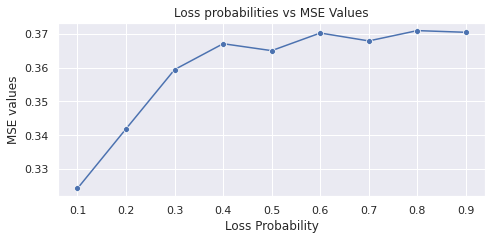

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# sns.lineplot(x = loss_prob, y = errors_tl, markers=True, dashes=False)
ax = sns.lineplot(x = loss_prob, y = errors_tl, markers=True, 
                  marker="o", dashes=False)
# ax.set(xlabel='Loss Probability', ylabel='MSE values')
plt.xlabel("Loss Probability")
plt.ylabel("MSE values")
plt.title("Loss probabilities vs MSE Values") 
plt.show(ax)

##### Mixed line graph

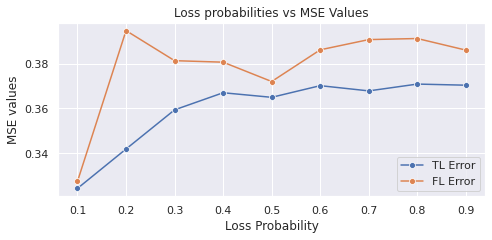

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# sns.lineplot(x = loss_prob, y = errors_tl, markers=True, dashes=False)
ax = sns.lineplot(x = loss_prob, y = errors_tl, markers=True, 
                  marker="o", dashes=False, label = 'TL Error')

ax = sns.lineplot(x = loss_prob, y = errors, markers=True, 
                  marker="o", dashes=False, label = 'FL Error')

# ax.set(xlabel='Loss Probability', ylabel='MSE values')
plt.legend()
plt.xlabel("Loss Probability")
plt.ylabel("MSE values")
plt.title("Loss probabilities vs MSE Values") 
plt.show(ax)

#### chaniging the range of y_axis

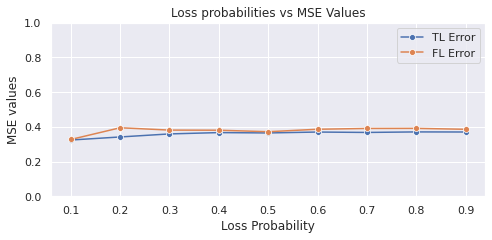

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# sns.lineplot(x = loss_prob, y = errors_tl, markers=True, dashes=False)
ax = sns.lineplot(x = loss_prob, y = errors_tl, markers=True, 
                  marker="o", dashes=False, label = 'TL Error')

ax = sns.lineplot(x = loss_prob, y = errors, markers=True, 
                  marker="o", dashes=False, label = 'FL Error')

ax.set(ylim=(0, 1))

plt.legend()
plt.xlabel("Loss Probability")
plt.ylabel("MSE values")
plt.title("Loss probabilities vs MSE Values") 
plt.show(ax)

#### Stacked Bar graphs for errors

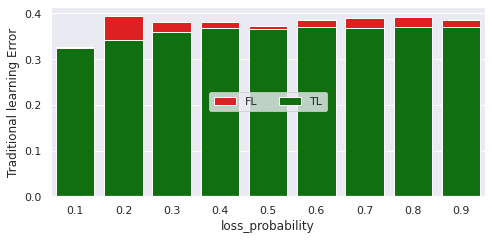

In [ ]:
error_df = pd.DataFrame({'loss_probability': loss_prob, 'Federated Learning Error': errors, 'Traditional learning Error': errors_tl})

import seaborn as sns
# sns.set()
# error_df.set_index('loss_probability').T.plot(kind='bar', stacked=True)
plt.rcParams["figure.figsize"] = [7.00, 3.50]
# plt.rcParams["figure.autolayout"] = True

bar_plot1 = sns.barplot(x='loss_probability', y='Federated Learning Error', data = error_df, label="FL", color="red")
bar_plot2 = sns.barplot(x='loss_probability', y='Traditional learning Error', data=error_df, label="TL", color="green")

plt.legend(ncol=2, loc="center", frameon=True)
plt.show()

# 24th October Part-B
* Feature scaling using Min-Max Scaler
* removing negative values of dependent variable ('CO', 'PM2.5', 'PM10')
* Using Mean squared error instead of NE
* Adding labels to graph
* use of he_uniform for relu activation; glorot_uniform for sigmoid

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# %tensorflow_version 2.x
# import tensorflow as tf
# print(tf.test.is_gpu_available())
# device_name = tf.test.gpu_device_name()
# if device_name != '/device:GPU:0':
#   raise SystemError('GPU device not found')
# print('Found GPU at: {}'.format(device_name))

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import initializers
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


import tensorflow as tf
# import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import utils
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Activation
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import SGD # from keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop # instead of from keras.optimizers import RMSprop
# from keras import datasets

# from keras.callbacks import LearningRateScheduler
# from keras.callbacks import History

from tensorflow.keras import losses
from sklearn.utils import shuffle

print(tf.__version__)
print(tf.keras.__version__)

2.6.0
2.6.0


In [ ]:
%%time
# Final plotting
K = 25 # as we have 25 clients

clients = {} # dictionary
clients_cut = {}

## reading the data from each client
for st_code in range(101,126):
    clients[st_code] = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dataNew/station_code"+str(st_code)+".csv", index_col = 0)

    clients[st_code]['Measurement date'] = pd.to_datetime(clients[st_code]['Measurement date'])

    clients[st_code]['year'] = clients[st_code]['Measurement date'].dt.year
    clients[st_code]['month'] = clients[st_code]['Measurement date'].dt.month
    clients[st_code]['week'] = clients[st_code]['Measurement date'].dt.week
    clients[st_code]['day'] = clients[st_code]['Measurement date'].dt.day
    clients[st_code]['hour'] = clients[st_code]['Measurement date'].dt.hour
    clients[st_code]['minute'] = clients[st_code]['Measurement date'].dt.minute # minute is not significant; as only 0 values
    clients[st_code]['dayOfWeek'] = clients[st_code]['Measurement date'].dt.dayofweek

    # choosing features
    clients[st_code] = clients[st_code][['Latitude', 'Longitude','year', 'month', 'week', 'day', 'hour', 'dayOfWeek', 'CO', 	'PM10',	'PM2.5']]

    clients[st_code].drop(clients[st_code][clients[st_code]['CO'] < 0].index, axis=0, inplace=True)
    clients[st_code].drop(clients[st_code][clients[st_code]['PM10'] < 0].index, axis=0, inplace=True)
    clients[st_code].drop(clients[st_code][clients[st_code]['PM2.5'] < 0].index, axis=0, inplace=True)


# complete dataset
frames = list(clients.values())
dataset = pd.concat(frames)
# display(dataset)




In [ ]:
dataset['CO'].describe()

count    643012.000000
mean          0.518481
std           0.386543
min           0.000000
25%           0.300000
50%           0.500000
75%           0.600000
max          71.700000
Name: CO, dtype: float64

In [ ]:
dataset['PM10'].describe()

count    643012.000000
mean         43.987356
std          71.263287
min           0.000000
25%          22.000000
50%          35.000000
75%          53.000000
max        3586.000000
Name: PM10, dtype: float64

In [ ]:
dataset['PM2.5'].describe()

count    643012.000000
mean         25.572573
std          43.937370
min           0.000000
25%          11.000000
50%          19.000000
75%          31.000000
max        6256.000000
Name: PM2.5, dtype: float64

In [ ]:
dataset[dataset['PM2.5'] < 0]['PM2.5'].value_counts()
# Number of values less than 0

Series([], Name: PM2.5, dtype: int64)

In [ ]:
dataset[dataset['PM10'] < 0]['PM10'].value_counts()

Series([], Name: PM10, dtype: int64)

In [ ]:
clients[118].head()

Latitude   Longitude  year  month  ...  dayOfWeek   CO  PM10  PM2.5
440296  37.452357  126.908296  2017      1  ...          6  1.2  67.0   45.0
440297  37.452357  126.908296  2017      1  ...          6  1.3  66.0   45.0
440298  37.452357  126.908296  2017      1  ...          6  1.2  63.0   42.0
440299  37.452357  126.908296  2017      1  ...          6  1.1  66.0   44.0
440300  37.452357  126.908296  2017      1  ...          6  1.1  62.0   42.0

[5 rows x 11 columns]

In [ ]:
# ClientUpdate(k, w): // Run on client k
def Client(client_idx, model, gas):
    # B ← (split P_k into batches of size B) # what is p_K --> each clients' sample size
    B = int(len(clients[client_idx]) * 0.01) # so for each client the batch size would be different depending upon the total sample size
    E = max(30, B//10) # number of local epochs; it will also depend on sample size (indirectly)
    learning_rate = 0.1 # initial learning rate
    decay_rate = 0.1
    momentum = 0.8

    # define the optimizer function
    sgd = SGD(learning_rate = learning_rate, momentum = momentum, decay = decay_rate, nesterov = False)

    # compile the model
    model.compile(loss='mse', 
                optimizer=sgd, 
                metrics=['mse'])

    data = clients_cut[client_idx]
    # data = dataset.loc[dataset['Station code'] == client_idx]

    X, y = data[['Latitude', 'Longitude','year', 'month', 'week', 'day', 'hour', 'dayOfWeek']],  data[gas]

    x_train, x_val, y_train, y_val = train_test_split(X, y, test_size = 0.1, random_state=1)

    try:
        model.fit(x_train, y_train, 
                    epochs = E, 
                    batch_size=B,
                    validation_data=(x_val, y_val),
                    verbose=False)
    except Exception as e:
        print(e)
        print("error")

    # return w to server
    # in our case no need for any explicit return; as the model is pass by value
    return data.shape[0] # this will return the number of total sample


In [ ]:
# Server executes: 
def Server(gas):
    # initialize w_0
    model = Sequential()
    
    # model.add(Dense(64, kernel_initializer='zeros', bias_initializer='zeros', activation=tf.nn.relu, input_dim=6)) # first dense/hidden layer
    model.add(Dense(64, kernel_initializer='he_uniform', bias_initializer="zeros", activation=tf.nn.relu, input_dim=8))
    model.add(Dropout(0.1))

    model.add(Dense(64, kernel_initializer='he_uniform', bias_initializer="zeros", activation=tf.nn.relu)) # second dense/hidden layer
    model.add(Dropout(0.2))

    model.add(Dense(1, kernel_initializer= 'glorot_uniform', activation=tf.nn.softmax)) # output layer

    # initial_weights = model.get_weights() # setting initial weights; should be same for all clients


# for each round t = 1, 2, . . . do
    for t in range(1, 5):
        C = np.random.random(1)[0] # random number between 0 and 1.

        # m ← max(C  K, 1)
        m = max(int(C*K), 1) # m == random number of client selected
        weight_t_plus_1 = [None] * m # matrix to store the weights of all client in each t-round
        n_k = [None] * m # parameters for weighted sum 


        # S_t ← (random set of m clients)
        # S = {} # dictionary
        S_t = np.random.uniform(low=101, high=126, size=(m)).astype(int)

        # No need for below loop, as server don't need access to client data, server only need clients' number
        # for client in m_clients:
        #   S[client] = clients[client]

        initial_weights = model.get_weights() # setting initial weights; should be same for all clients
        # for t= 1 to T, initial_weights would be t-1th's final weights

        # for each client k ∈ S_t in parallel do
        client_idx = 0
        for client in S_t:
            # w^(k)_(t+1) ← ClientUpdate(k, model)
            n_k[client_idx] = Client(client, model, gas) # pass by reference for model
            weight_t_plus_1[client_idx] = model.get_weights()
            client_idx += 1

            # setting weights back to initial weights
            model.set_weights(initial_weights)

        # finding the weighted sum
        final_weights_t = np.array(weight_t_plus_1[0]) * (n_k[0] / sum(n_k))

        for idx in range(1, m):
          # w_(t+1) ← summation(k=1 to K){(n_k/n) * w^(k)_(t+1)} #n_k - no. of training sample in each client K; n - total training samples;
          final_weights_t += np.array(weight_t_plus_1[idx]) * (n_k[idx]/ sum(n_k))

        # setting the aggregated weights
        model.set_weights(final_weights_t)


#         print(model.get_weights())
    # return error_clients(model, loss_p)) # THIS LINE WON'T BE THERE IN REAL SERVER
    return model

In [ ]:
def error_clients(model, gas):
    
    X, y = test_data[['Latitude', 'Longitude','year', 'month', 'week', 'day', 'hour', 'dayOfWeek']],  test_data[gas]
    
    # adjusting the dimensions
    x_test, y_test = X.to_numpy(), y.to_numpy()
    x_test = x_test.reshape(x_test.shape[0], 1,  x_test.shape[1])
    y_test = y_test.reshape(y_test.shape[0],1,1)

    y_predicted = model.predict(x_test)
    
    from sklearn.metrics import mean_squared_error
    # print("y_predicted", y_predicted)
    # print("y_predicted.ravel()", y_predicted.ravel())
    mse = mean_squared_error(y_predicted.ravel(), y_test.ravel())
    return mse  
          

In [ ]:

# create an Empty DataFrame object
train_data = pd.DataFrame()
test_data = pd.DataFrame()
loss_prob = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
models = []
errors = {'CO':[], 	'PM10':[],	'PM2.5':[]}
gases = ['CO', 	'PM10',	'PM2.5']

# reading all the clients and building model
for gas in gases:
  for lp in loss_prob:
      for st_code in range(101,126):
          # splitting into train test split
          X, y = clients[st_code][['Latitude', 'Longitude','year', 'month', 'week', 'day', 'hour', 'dayOfWeek']],  clients[st_code][gas]
          x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = lp, random_state=0)

          # Normalization using min-max scaler
          # Normalization across instances should be done after splitting the data between training and test set, using only the data from the training set.
          # to avoid data leak
          scaler_cols = x_train.columns
          scaler_idx_train = x_train.index
          scaler_idx_test = x_test.index

          # from sklearn.preprocessing import MinMaxScaler
          scaler = MinMaxScaler()

          # transforming train data
          x_train_encoded_scaled = pd.DataFrame(scaler.fit_transform(x_train), columns = scaler_cols, index=scaler_idx_train)
          # display(x_train_encoded_scaled.head())

          # transforming test data
          x_test_encoded_scaled = pd.DataFrame(scaler.transform(x_test), columns = scaler_cols, index = scaler_idx_test)
          # display(x_test_encoded_scaled.head())

          # training data prep
          clients_cut[st_code] = pd.concat([x_train_encoded_scaled, y_train], axis = 1)

          # testing data prep
          # first appending x_test and y_test column wise
          # then appending each clients' dataframe one below other
          if st_code == 101:
            test_data = pd.concat([x_test_encoded_scaled, y_test], axis = 1)
          else:
            xy = pd.concat([x_test_encoded_scaled, y_test], axis=1)
            test_data = pd.concat([test_data, xy], axis=0)
          # x_test, y_test = x_test.to_numpy(), y_test.to_numpy()
      
      # Training the model using federated learning
      model = Server(gas)

      # testing model
      errors[gas].append(error_clients(model, gas))


In [ ]:
test_data.isnull().sum()

Latitude     0
Longitude    0
year         0
month        0
week         0
day          0
hour         0
dayOfWeek    0
PM2.5        0
dtype: int64

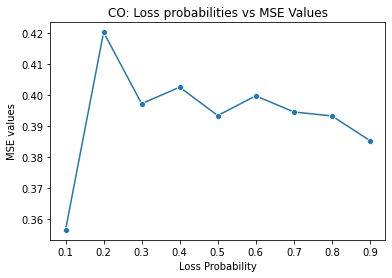

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.lineplot(x = loss_prob, y = errors['CO'], markers=True, 
                  marker="o", dashes=False)
# ax.set(xlabel='Loss Probability', ylabel='MSE values')
plt.xlabel("Loss Probability")
plt.ylabel("MSE values")
plt.title("CO: Loss probabilities vs MSE Values") 
plt.show(ax)

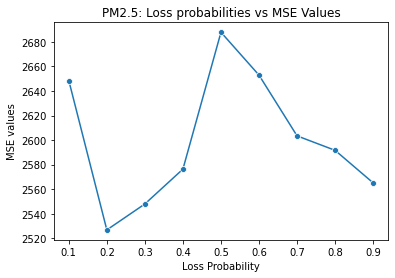

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.lineplot(x = loss_prob, y = errors['PM2.5'], markers=True, 
                  marker="o", dashes=False)
# ax.set(xlabel='Loss Probability', ylabel='MSE values')
plt.xlabel("Loss Probability")
plt.ylabel("MSE values")
plt.title("PM2.5: Loss probabilities vs MSE Values") 
plt.show(ax)

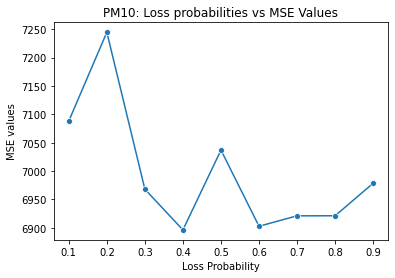

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.lineplot(x = loss_prob, y = errors['PM10'], markers=True, 
                  marker="o", dashes=False)
# ax.set(xlabel='Loss Probability', ylabel='MSE values')
plt.xlabel("Loss Probability")
plt.ylabel("MSE values")
plt.title("PM10: Loss probabilities vs MSE Values") 
plt.show(ax)

##### traditional model building

In [ ]:
def traditional_ML(loss_p, gas):
  # initialize w_0
  model = Sequential()

  # model.add(Dense(64, kernel_initializer='zeros', bias_initializer='zeros', activation=tf.nn.relu, input_dim=6)) # first dense/hidden layer
  model.add(Dense(64, kernel_initializer='he_uniform', bias_initializer="zeros", activation=tf.nn.relu, input_dim=8))
  model.add(Dropout(0.1))

  model.add(Dense(64, kernel_initializer='he_uniform', bias_initializer="zeros", activation=tf.nn.relu)) # second dense/hidden layer
  model.add(Dropout(0.2))

  model.add(Dense(1, kernel_initializer= 'glorot_uniform', activation=tf.nn.softmax)) # output layer

  # initial_weights = model.get_weights() # setting initial weights; should be same for all clients


  learning_rate = 0.1 # initial learning rate
  decay_rate = 0.1
  momentum = 0.8

  # define the optimizer function
  sgd = SGD(learning_rate = learning_rate, momentum = momentum, decay = decay_rate, nesterov = False)

  # compile the model
  model.compile(loss='mse', 
              optimizer=sgd, 
              metrics=['mse'])

  X, y = dataset[['Latitude', 'Longitude','year', 'month', 'week', 'day', 'hour', 'dayOfWeek']],  dataset[gas]

  x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = loss_p, random_state=1)


  B = int(len(x_train) * 0.01) # so for each client the batch size would be different depending upon the total sample size
  E = max(30, B//10) # number of local epochs; it will also depend on sample size (indirectly)


  model.fit(x_train, y_train, 
                  epochs = E, 
                  batch_size=B,
                  verbose=False)
      
  x_test, y_test = x_test.to_numpy(), y_test.to_numpy()

  # adjusting the dimensions
  x_test = x_test.reshape(x_test.shape[0], 1,  x_test.shape[1])
  y_test = y_test.reshape(y_test.shape[0],1,1)
  y_predicted = model.predict(x_test)
  

  from sklearn.metrics import mean_squared_error
  mse = mean_squared_error(y_predicted.ravel(), y_test.ravel())
  return mse 


In [ ]:

# Final plotting
K = 25 # as we have 25 clients

loss_prob = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
errors_tl = {'CO':[], 	'PM10':[],	'PM2.5':[]}
gases = ['CO', 	'PM10',	'PM2.5']

for gas in gases:
  for loss_p in loss_prob:
    error = traditional_ML(loss_p, gas)
    errors_tl[gas].append(error)



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# sns.lineplot(x = loss_prob, y = errors_tl, markers=True, dashes=False)
ax = sns.lineplot(x = loss_prob, y = errors_tl['CO'], markers=True, 
                  marker="o", dashes=False)
# ax.set(xlabel='Loss Probability', ylabel='MSE values')
plt.xlabel("Loss Probability")
plt.ylabel("MSE values")
plt.title("CO: Loss probabilities vs MSE Values") 
plt.show(ax)


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# sns.lineplot(x = loss_prob, y = errors_tl, markers=True, dashes=False)
ax = sns.lineplot(x = loss_prob, y = errors_tl['PM10'], markers=True, 
                  marker="o", dashes=False)
# ax.set(xlabel='Loss Probability', ylabel='MSE values')
plt.xlabel("Loss Probability")
plt.ylabel("MSE values")
plt.title("PM10: Loss probabilities vs MSE Values") 
plt.show(ax)


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# sns.lineplot(x = loss_prob, y = errors_tl, markers=True, dashes=False)
ax = sns.lineplot(x = loss_prob, y = errors_tl['PM2.5'], markers=True, 
                  marker="o", dashes=False)
# ax.set(xlabel='Loss Probability', ylabel='MSE values')
plt.xlabel("Loss Probability")
plt.ylabel("MSE values")
plt.title("PM2.5: Loss probabilities vs MSE Values") 
plt.show(ax)


##### Mixed line graph

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# sns.lineplot(x = loss_prob, y = errors_tl, markers=True, dashes=False)
ax = sns.lineplot(x = loss_prob, y = errors_tl['CO'], markers=True, 
                  marker="o", dashes=False, label = 'TL Error')

ax = sns.lineplot(x = loss_prob, y = errors['CO'], markers=True, 
                  marker="o", dashes=False, label = 'FL Error')

# ax.set(xlabel='Loss Probability', ylabel='MSE values')
plt.legend()
plt.xlabel("Loss Probability")
plt.ylabel("MSE values")
plt.title("CO:Loss probabilities vs MSE Values") 
plt.show(ax)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# sns.lineplot(x = loss_prob, y = errors_tl, markers=True, dashes=False)
ax = sns.lineplot(x = loss_prob, y = errors_tl['PM2.5'], markers=True, 
                  marker="o", dashes=False, label = 'TL Error')

ax = sns.lineplot(x = loss_prob, y = errors['PM2.5'], markers=True, 
                  marker="o", dashes=False, label = 'FL Error')

# ax.set(xlabel='Loss Probability', ylabel='MSE values')
plt.legend()
plt.xlabel("Loss Probability")
plt.ylabel("MSE values")
plt.title("PM2.5: Loss probabilities vs MSE Values") 
plt.show(ax)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# sns.lineplot(x = loss_prob, y = errors_tl, markers=True, dashes=False)
ax = sns.lineplot(x = loss_prob, y = errors_tl['PM10'], markers=True, 
                  marker="o", dashes=False, label = 'TL Error')

ax = sns.lineplot(x = loss_prob, y = errors['PM10'], markers=True, 
                  marker="o", dashes=False, label = 'FL Error')

# ax.set(xlabel='Loss Probability', ylabel='MSE values')
plt.legend()
plt.xlabel("Loss Probability")
plt.ylabel("MSE values")
plt.title("PM10: Loss probabilities vs MSE Values") 
plt.show(ax)

#### chaniging the range of y_axis

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# sns.lineplot(x = loss_prob, y = errors_tl, markers=True, dashes=False)
ax = sns.lineplot(x = loss_prob, y = errors_tl['CO'], markers=True, 
                  marker="o", dashes=False, label = 'TL Error')

ax = sns.lineplot(x = loss_prob, y = errors['CO'], markers=True, 
                  marker="o", dashes=False, label = 'FL Error')

ax.set(ylim=(0, 1))

plt.legend()
plt.xlabel("Loss Probability")
plt.ylabel("MSE values")
plt.title("CO: Loss probabilities vs MSE Values") 
plt.show(ax)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# sns.lineplot(x = loss_prob, y = errors_tl, markers=True, dashes=False)
ax = sns.lineplot(x = loss_prob, y = errors_tl['PM10'], markers=True, 
                  marker="o", dashes=False, label = 'TL Error')

ax = sns.lineplot(x = loss_prob, y = errors['PM10'], markers=True, 
                  marker="o", dashes=False, label = 'FL Error')

ax.set(ylim=(0, 1))
# ax.set(xlabel='Loss Probability', ylabel='MSE values')
plt.legend()
plt.xlabel("Loss Probability")
plt.ylabel("MSE values")
plt.title("PM10: Loss probabilities vs MSE Values") 
plt.show(ax)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# sns.lineplot(x = loss_prob, y = errors_tl, markers=True, dashes=False)
ax = sns.lineplot(x = loss_prob, y = errors_tl['PM2.5'], markers=True, 
                  marker="o", dashes=False, label = 'TL Error')

ax = sns.lineplot(x = loss_prob, y = errors['PM2.5'], markers=True, 
                  marker="o", dashes=False, label = 'FL Error')

ax.set(ylim=(0, 1))
# ax.set(xlabel='Loss Probability', ylabel='MSE values')
plt.legend()
plt.xlabel("Loss Probability")
plt.ylabel("MSE values")
plt.title("PM2.5: Loss probabilities vs MSE Values") 
plt.show(ax)

# 24th October Part-C
* Feature scaling using Min-Max Scaler
* removing negative values of dependent variable ('CO', 'PM2.5', 'PM10')
* Using Mean squared error instead of NE
* Adding labels to graph
* use of he_uniform for relu activation; glorot_uniform for sigmoid
* Adding 3 Optimizers: SGD, RMSprop, Adam

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# %tensorflow_version 2.x
# import tensorflow as tf
# print(tf.test.is_gpu_available())
# device_name = tf.test.gpu_device_name()
# if device_name != '/device:GPU:0':
#   raise SystemError('GPU device not found')
# print('Found GPU at: {}'.format(device_name))

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import initializers
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


import tensorflow as tf
# import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import utils
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Activation
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import SGD # from keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop # instead of from keras.optimizers import RMSprop
# from keras import datasets

# from keras.callbacks import LearningRateScheduler
# from keras.callbacks import History

from tensorflow.keras import losses
from sklearn.utils import shuffle

print(tf.__version__)
print(tf.keras.__version__)

2.6.0
2.6.0


In [ ]:
%%time
# Final plotting
K = 25 # as we have 25 clients

clients = {} # dictionary
clients_cut = {}

## reading the data from each client
for st_code in range(101,126):
    clients[st_code] = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dataNew/station_code"+str(st_code)+".csv", index_col = 0)

    clients[st_code]['Measurement date'] = pd.to_datetime(clients[st_code]['Measurement date'])

    clients[st_code]['year'] = clients[st_code]['Measurement date'].dt.year
    clients[st_code]['month'] = clients[st_code]['Measurement date'].dt.month
    clients[st_code]['week'] = clients[st_code]['Measurement date'].dt.week
    clients[st_code]['day'] = clients[st_code]['Measurement date'].dt.day
    clients[st_code]['hour'] = clients[st_code]['Measurement date'].dt.hour
    clients[st_code]['minute'] = clients[st_code]['Measurement date'].dt.minute # minute is not significant; as only 0 values
    clients[st_code]['dayOfWeek'] = clients[st_code]['Measurement date'].dt.dayofweek

    # choosing features
    clients[st_code] = clients[st_code][['Latitude', 'Longitude','year', 'month', 'week', 'day', 'hour', 'dayOfWeek', 'CO', 	'PM10',	'PM2.5']]

    clients[st_code].drop(clients[st_code][clients[st_code]['CO'] < 0].index, axis=0, inplace=True)
    clients[st_code].drop(clients[st_code][clients[st_code]['PM10'] < 0].index, axis=0, inplace=True)
    clients[st_code].drop(clients[st_code][clients[st_code]['PM2.5'] < 0].index, axis=0, inplace=True)


# complete dataset
frames = list(clients.values())
dataset = pd.concat(frames)
# display(dataset)




In [ ]:
## KAGGLE REQUIREMENTS

# %%time
# # getting input data
# dataset = pd.read_csv("../input/air-pollution-in-seoul/AirPollutionSeoul/Measurement_summary.csv")

# dataset['Measurement date'] = pd.to_datetime(dataset['Measurement date'])

# dataset['year'] =dataset['Measurement date'].dt.year
# dataset['month'] = dataset['Measurement date'].dt.month
# dataset['week'] = dataset['Measurement date'].dt.week
# dataset['day'] = dataset['Measurement date'].dt.day
# dataset['hour'] = dataset['Measurement date'].dt.hour
# dataset['minute'] = dataset['Measurement date'].dt.minute
# dataset['dayOfWeek'] = dataset['Measurement date'].dt.dayofweek



# dataset.head(5)

# # %%time
# # Final plotting
# K = 25 # as we have 25 clients

# clients = {} # dictionary
# clients_cut = {}

# ## reading the data from each client
# for st_code in range(101,126):

#     # choosing features
#     clients[st_code] = dataset[dataset['Station code'] == st_code]
#     clients[st_code] = clients[st_code][['Latitude', 'Longitude','year', 'month', 'week', 'day', 'hour', 'dayOfWeek', 'CO', 'PM10','PM2.5']]

#     clients[st_code].drop(clients[st_code][clients[st_code]['CO'] < 0].index, axis=0, inplace=True)
#     clients[st_code].drop(clients[st_code][clients[st_code]['PM10'] < 0].index, axis=0, inplace=True)
#     clients[st_code].drop(clients[st_code][clients[st_code]['PM2.5'] < 0].index, axis=0, inplace=True)



# # complete dataset
# frames = list(clients.values())
# dataset = pd.concat(frames)
# # display(dataset)




In [ ]:
dataset['CO'].describe()

In [ ]:
dataset['PM10'].describe()

In [ ]:
dataset['PM2.5'].describe()

count    643012.000000
mean         25.572573
std          43.937370
min           0.000000
25%          11.000000
50%          19.000000
75%          31.000000
max        6256.000000
Name: PM2.5, dtype: float64

In [ ]:
dataset[dataset['PM2.5'] < 0]['PM2.5'].value_counts()
# Number of values less than 0

Series([], Name: PM2.5, dtype: int64)

In [ ]:
dataset[dataset['PM10'] < 0]['PM10'].value_counts()

Series([], Name: PM10, dtype: int64)

In [ ]:
clients[118].head()

Latitude   Longitude  year  month  ...  dayOfWeek   CO  PM10  PM2.5
440296  37.452357  126.908296  2017      1  ...          6  1.2  67.0   45.0
440297  37.452357  126.908296  2017      1  ...          6  1.3  66.0   45.0
440298  37.452357  126.908296  2017      1  ...          6  1.2  63.0   42.0
440299  37.452357  126.908296  2017      1  ...          6  1.1  66.0   44.0
440300  37.452357  126.908296  2017      1  ...          6  1.1  62.0   42.0

[5 rows x 11 columns]

In [ ]:
# ClientUpdate(k, w): // Run on client k
def Client(client_idx, model, gas, optimizer):
    # B ← (split P_k into batches of size B) # what is p_K --> each clients' sample size
    B = 1000 #int(len(clients[client_idx]) * 0.01) # so for each client the batch size would be different depending upon the total sample size
    E = 20 #max(30, B//10) # number of local epochs; it will also depend on sample size (indirectly)
    learning_rate = 0.1 # initial learning rate
    decay_rate = 0.1
    momentum = 0.8

    # define the optimizer function
    if optimizer == 'sgd':
      sgd = SGD(learning_rate = learning_rate, momentum = momentum, decay = decay_rate, nesterov = False)
      optimizer = sgd

    elif optimizer == 'rmsprop':
      optimizer = RMSprop(lr=0.00025, epsilon=0.01)

    # compile the model
    model.compile(loss='mse', 
                optimizer=optimizer, 
                metrics=['mse'])

    data = clients_cut[client_idx]
    # data = dataset.loc[dataset['Station code'] == client_idx]

    X, y = data[['Latitude', 'Longitude','year', 'month', 'week', 'day', 'hour', 'dayOfWeek']],  data[gas]

    x_train, x_val, y_train, y_val = train_test_split(X, y, test_size = 0.1, random_state=1)

    try:
        model.fit(x_train, y_train, 
                    epochs = E, 
                    batch_size=B,
                    validation_data=(x_val, y_val),
                    verbose=False)
    except Exception as e:
        print(e)
        print("error")

    # return w to server
    # in our case no need for any explicit return; as the model is pass by value
    return data.shape[0] # this will return the number of total sample


In [ ]:
# Server executes: 
def Server(gas, optimizer):
    # initialize w_0
    model = Sequential()
    
    # model.add(Dense(64, kernel_initializer='zeros', bias_initializer='zeros', activation=tf.nn.relu, input_dim=6)) # first dense/hidden layer
    model.add(Dense(64, kernel_initializer='he_uniform', bias_initializer="zeros", activation=tf.nn.relu, input_dim=8))
    model.add(Dropout(0.1))

    model.add(Dense(64, kernel_initializer='he_uniform', bias_initializer="zeros", activation=tf.nn.relu)) # second dense/hidden layer
    model.add(Dropout(0.2))

    model.add(Dense(1, kernel_initializer= 'glorot_uniform', activation=tf.nn.softmax)) # output layer

    # initial_weights = model.get_weights() # setting initial weights; should be same for all clients


# for each round t = 1, 2, . . . do
    for t in range(1, 5):
        C = np.random.random(1)[0] # random number between 0 and 1.

        # m ← max(C  K, 1)
        m = max(int(C*K), 1) # m == random number of client selected
        weight_t_plus_1 = [None] * m # matrix to store the weights of all client in each t-round
        n_k = [None] * m # parameters for weighted sum 


        # S_t ← (random set of m clients)
        # S = {} # dictionary
        S_t = np.random.uniform(low=101, high=126, size=(m)).astype(int)

        # No need for below loop, as server don't need access to client data, server only need clients' number
        # for client in m_clients:
        #   S[client] = clients[client]

        initial_weights = model.get_weights() # setting initial weights; should be same for all clients
        # for t= 1 to T, initial_weights would be t-1th's final weights

        # for each client k ∈ S_t in parallel do
        client_idx = 0
        for client in S_t:
            # w^(k)_(t+1) ← ClientUpdate(k, model)
            n_k[client_idx] = Client(client, model, gas, optimizer) # pass by reference for model
            weight_t_plus_1[client_idx] = model.get_weights()
            client_idx += 1

            # setting weights back to initial weights
            model.set_weights(initial_weights)

        # finding the weighted sum
        final_weights_t = np.array(weight_t_plus_1[0]) * (n_k[0] / sum(n_k))

        for idx in range(1, m):
          # w_(t+1) ← summation(k=1 to K){(n_k/n) * w^(k)_(t+1)} #n_k - no. of training sample in each client K; n - total training samples;
          final_weights_t += np.array(weight_t_plus_1[idx]) * (n_k[idx]/ sum(n_k))

        # setting the aggregated weights
        model.set_weights(final_weights_t)


#         print(model.get_weights())
    # return error_clients(model, loss_p)) # THIS LINE WON'T BE THERE IN REAL SERVER
    return model

In [ ]:
def error_clients(model, gas):
    
    X, y = test_data[['Latitude', 'Longitude','year', 'month', 'week', 'day', 'hour', 'dayOfWeek']],  test_data[gas]
    
    # adjusting the dimensions
    x_test, y_test = X.to_numpy(), y.to_numpy()
    x_test = x_test.reshape(x_test.shape[0], 1,  x_test.shape[1])
    y_test = y_test.reshape(y_test.shape[0],1,1)

    y_predicted = model.predict(x_test)
    
    from sklearn.metrics import mean_squared_error
    # print("y_predicted", y_predicted)
    # print("y_predicted.ravel()", y_predicted.ravel())
    NE = np.sum(abs(np.array(y_test) - np.array(y_predicted))) / np.sum(np.array(y_test))
    return NE

          

In [ ]:

# create an Empty DataFrame object
train_data = pd.DataFrame()
test_data = pd.DataFrame()
loss_prob = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
models = []
errors = {'CO':{'adam':[], 'rmsprop':[], 'sgd':[]}, 	'PM10':{'adam':[], 'rmsprop':[], 'sgd':[]},	'PM2.5':{'adam':[], 'rmsprop':[], 'sgd':[]}}
gases = ['CO', 	'PM10',	'PM2.5']
optimizers = ['adam', 'rmsprop', 'sgd']

# reading all the clients and building model
for gas in gases:
  for opt in optimizers:
    for lp in loss_prob:
        for st_code in range(101,126):
            # splitting into train test split
            X, y = clients[st_code][['Latitude', 'Longitude','year', 'month', 'week', 'day', 'hour', 'dayOfWeek']],  clients[st_code][gas]
            x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = lp, random_state=0)

            # Normalization using min-max scaler
            # Normalization across instances should be done after splitting the data between training and test set, using only the data from the training set.
            # to avoid data leak
            scaler_cols = x_train.columns
            scaler_idx_train = x_train.index
            scaler_idx_test = x_test.index

            # from sklearn.preprocessing import MinMaxScaler
            scaler = MinMaxScaler()

            # transforming train data
            x_train_encoded_scaled = pd.DataFrame(scaler.fit_transform(x_train), columns = scaler_cols, index=scaler_idx_train)
            # display(x_train_encoded_scaled.head())

            # transforming test data
            x_test_encoded_scaled = pd.DataFrame(scaler.transform(x_test), columns = scaler_cols, index = scaler_idx_test)
            # display(x_test_encoded_scaled.head())

            # training data prep
            clients_cut[st_code] = pd.concat([x_train_encoded_scaled, y_train], axis = 1)

            # testing data prep
            # first appending x_test and y_test column wise
            # then appending each clients' dataframe one below other
            if st_code == 101:
              test_data = pd.concat([x_test_encoded_scaled, y_test], axis = 1)
            else:
              xy = pd.concat([x_test_encoded_scaled, y_test], axis=1)
              test_data = pd.concat([test_data, xy], axis=0)
            # x_test, y_test = x_test.to_numpy(), y_test.to_numpy()
        
        # Training the model using federated learning
        model = Server(gas, opt)

        # testing model
        errors[gas][opt].append(error_clients(model, gas))


In [ ]:
test_data.isnull().sum()

Latitude     0
Longitude    0
year         0
month        0
week         0
day          0
hour         0
dayOfWeek    0
PM2.5        0
dtype: int64

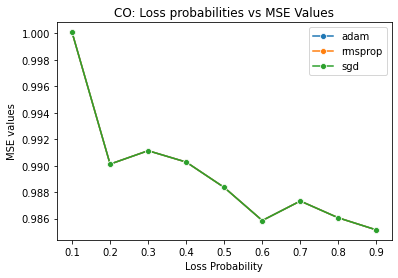

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.lineplot(x = loss_prob, y = errors['CO']['adam'], markers=True, 
                  marker="o", dashes=False, label = 'adam')
ax = sns.lineplot(x = loss_prob, y = errors['CO']['rmsprop'], markers=True, 
                  marker="o", dashes=False, label='rmsprop')
ax = sns.lineplot(x = loss_prob, y = errors['CO']['sgd'], markers=True, 
                  marker="o", dashes=False, label='sgd')
# ax.set(xlabel='Loss Probability', ylabel='MSE values')
plt.xlabel("Loss Probability")
plt.ylabel("MSE values")
plt.title("CO: Loss probabilities vs MSE Values") 
plt.show(ax)

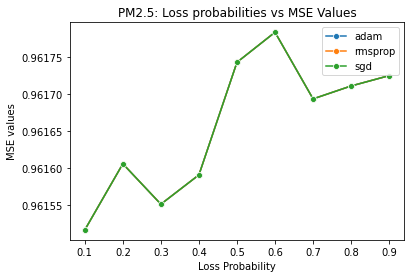

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.lineplot(x = loss_prob, y = errors['PM2.5']['adam'], markers=True, 
                  marker="o", dashes=False, label = 'adam')
ax = sns.lineplot(x = loss_prob, y = errors['PM2.5']['rmsprop'], markers=True, 
                  marker="o", dashes=False, label='rmsprop')
ax = sns.lineplot(x = loss_prob, y = errors['PM2.5']['sgd'], markers=True, 
                  marker="o", dashes=False, label='sgd')
# ax.set(xlabel='Loss Probability', ylabel='MSE values')
plt.xlabel("Loss Probability")
plt.ylabel("MSE values")
plt.title("PM2.5: Loss probabilities vs MSE Values") 
plt.show(ax)

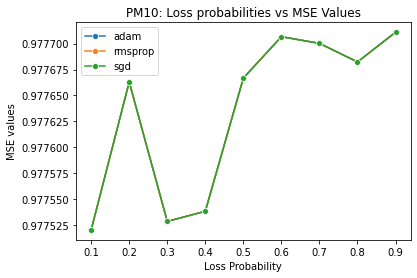

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.lineplot(x = loss_prob, y = errors['PM10']['adam'], markers=True, 
                  marker="o", dashes=False, label = 'adam')
ax = sns.lineplot(x = loss_prob, y = errors['PM10']['rmsprop'], markers=True, 
                  marker="o", dashes=False, label='rmsprop')
ax = sns.lineplot(x = loss_prob, y = errors['PM10']['sgd'], markers=True, 
                  marker="o", dashes=False, label='sgd')
# ax.set(xlabel='Loss Probability', ylabel='MSE values')
plt.xlabel("Loss Probability")
plt.ylabel("MSE values")
plt.title("PM10: Loss probabilities vs MSE Values") 
plt.show(ax)

##### traditional model building

In [ ]:
def traditional_ML(loss_p, gas, optimizer):
  # initialize w_0
  model = Sequential()

  # model.add(Dense(64, kernel_initializer='zeros', bias_initializer='zeros', activation=tf.nn.relu, input_dim=6)) # first dense/hidden layer
  model.add(Dense(64, kernel_initializer='he_uniform', bias_initializer="zeros", activation=tf.nn.relu, input_dim=8))
  model.add(Dropout(0.1))

  model.add(Dense(64, kernel_initializer='he_uniform', bias_initializer="zeros", activation=tf.nn.relu)) # second dense/hidden layer
  model.add(Dropout(0.2))

  model.add(Dense(1, kernel_initializer= 'glorot_uniform', activation=tf.nn.softmax)) # output layer

  # initial_weights = model.get_weights() # setting initial weights; should be same for all clients

  learning_rate = 0.1 # initial learning rate
  decay_rate = 0.1
  momentum = 0.8

  # define the optimizer function
  sgd = SGD(learning_rate = learning_rate, momentum = momentum, decay = decay_rate, nesterov = False)

  # define the optimizer function
  if optimizer == 'sgd':
    sgd = SGD(learning_rate = learning_rate, momentum = momentum, decay = decay_rate, nesterov = False)
    optimizer = sgd

  elif optimizer == 'rmsprop':
    optimizer = RMSprop(lr=0.00025, epsilon=0.01)

  # compile the model
  model.compile(loss='mse', 
              optimizer=optimizer, 
              metrics=['mse'])

  X, y = dataset[['Latitude', 'Longitude','year', 'month', 'week', 'day', 'hour', 'dayOfWeek']],  dataset[gas]

  x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = loss_p, random_state=1)


  B = 1000 #int(len(x_train) * 0.01) # so for each client the batch size would be different depending upon the total sample size
  E = 25 #max(30, B//10) # number of local epochs; it will also depend on sample size (indirectly)


  model.fit(x_train, y_train, 
                  epochs = E, 
                  batch_size=B,
                  verbose=False)
      
  x_test, y_test = x_test.to_numpy(), y_test.to_numpy()

  # adjusting the dimensions
  x_test = x_test.reshape(x_test.shape[0], 1,  x_test.shape[1])
  y_test = y_test.reshape(y_test.shape[0],1,1)
  y_predicted = model.predict(x_test)
  

  # from sklearn.metrics import mean_squared_error
  # mse = mean_squared_error(y_predicted.ravel(), y_test.ravel())
  # return mse 
  NE = np.sum(abs(np.array(y_test) - np.array(y_predicted))) / np.sum(np.array(y_test))
  return NE


In [ ]:

# Final plotting
K = 25 # as we have 25 clients

loss_prob = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
errors_tl = {'CO':[], 	'PM10':[],	'PM2.5':[]}
gases = ['CO', 	'PM10',	'PM2.5']
errors_tl = {'CO':{'adam':[], 'rmsprop':[], 'sgd':[]}, 	'PM10':{'adam':[], 'rmsprop':[], 'sgd':[]},	'PM2.5':{'adam':[], 'rmsprop':[], 'sgd':[]}}
optimizers = ['adam', 'rmsprop', 'sgd']


for gas in gases:
  for opt in optimizers:
    for loss_p in loss_prob:
      error = traditional_ML(loss_p, gas, opt)
      errors_tl[gas][opt].append(error)


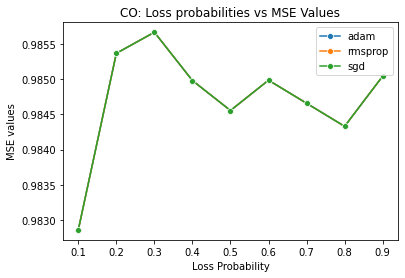

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# sns.lineplot(x = loss_prob, y = errors_tl, markers=True, dashes=False)
ax = sns.lineplot(x = loss_prob, y = errors_tl['CO']['adam'], markers=True, 
                  marker="o", dashes=False, label = 'adam')
ax = sns.lineplot(x = loss_prob, y = errors_tl['CO']['rmsprop'], markers=True, 
                  marker="o", dashes=False, label='rmsprop')
ax = sns.lineplot(x = loss_prob, y = errors_tl['CO']['sgd'], markers=True, 
                  marker="o", dashes=False, label='sgd')
# ax.set(xlabel='Loss Probability', ylabel='MSE values')
plt.xlabel("Loss Probability")
plt.ylabel("MSE values")
plt.title("CO: Loss probabilities vs MSE Values") 
plt.show(ax)


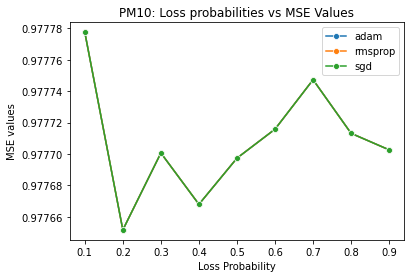

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# sns.lineplot(x = loss_prob, y = errors_tl, markers=True, dashes=False)
ax = sns.lineplot(x = loss_prob, y = errors_tl['PM10']['adam'], markers=True, 
                  marker="o", dashes=False, label = 'adam')
ax = sns.lineplot(x = loss_prob, y = errors_tl['PM10']['rmsprop'], markers=True, 
                  marker="o", dashes=False, label='rmsprop')
ax = sns.lineplot(x = loss_prob, y = errors_tl['PM10']['sgd'], markers=True, 
                  marker="o", dashes=False, label='sgd')
# ax.set(xlabel='Loss Probability', ylabel='MSE values')
plt.xlabel("Loss Probability")
plt.ylabel("MSE values")
plt.title("PM10: Loss probabilities vs MSE Values") 
plt.show(ax)


In [ ]:
errors_tl

{'CO': {'adam': [0.9828633464026487,
   0.985363902120346,
   0.985662130103633,
   0.9849781853150178,
   0.9845540667652081,
   0.9849828354539535,
   0.9846567786605552,
   0.9843297961374315,
   0.9850400479689041],
  'rmsprop': [0.9828633464026487,
   0.985363902120346,
   0.985662130103633,
   0.9849781853150178,
   0.9845540667652081,
   0.9849828354539535,
   0.9846567786605552,
   0.9843297961374315,
   0.9850400479689041],
  'sgd': [0.9828633464026487,
   0.985363902120346,
   0.985662130103633,
   0.9849781853150178,
   0.9845540667652081,
   0.9849828354539535,
   0.9846567786605552,
   0.9843297961374315,
   0.9850400479689041]},
 'PM10': {'adam': [0.9777775036348416,
   0.9776516236353399,
   0.9777006191563162,
   0.9776679255134392,
   0.9776973325162956,
   0.9777157751018108,
   0.9777472675174682,
   0.9777131240849155,
   0.9777026162876652],
  'rmsprop': [0.9777775036348416,
   0.9776516236353399,
   0.9777006191563162,
   0.9776679255134392,
   0.9776973325162956,

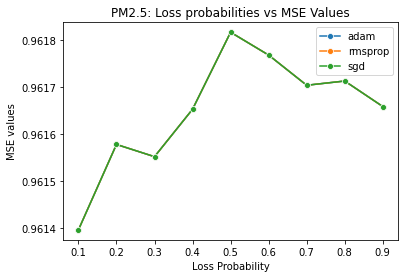

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# sns.lineplot(x = loss_prob, y = errors_tl, markers=True, dashes=False)
ax = sns.lineplot(x = loss_prob, y = errors_tl['PM2.5']['adam'], markers=True, 
                  marker="o", dashes=False, label = 'adam')
ax = sns.lineplot(x = loss_prob, y = errors_tl['PM2.5']['rmsprop'], markers=True, 
                  marker="o", dashes=False, label='rmsprop')
ax = sns.lineplot(x = loss_prob, y = errors_tl['PM2.5']['sgd'], markers=True, 
                  marker="o", dashes=False, label='sgd')
# ax.set(xlabel='Loss Probability', ylabel='MSE values')
plt.xlabel("Loss Probability")
plt.ylabel("MSE values")
plt.title("PM2.5: Loss probabilities vs MSE Values") 
plt.show(ax)


##### Mixed line graph

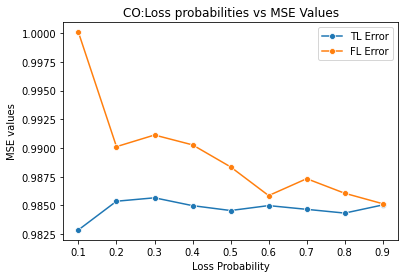

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# sns.lineplot(x = loss_prob, y = errors_tl, markers=True, dashes=False)
ax = sns.lineplot(x = loss_prob, y = errors_tl['CO']['adam'], markers=True, 
                  marker="o", dashes=False, label = 'TL Error')

ax = sns.lineplot(x = loss_prob, y = errors['CO']['adam'], markers=True, 
                  marker="o", dashes=False, label = 'FL Error')

# ax.set(xlabel='Loss Probability', ylabel='MSE values')
plt.legend()
plt.xlabel("Loss Probability")
plt.ylabel("MSE values")
plt.title("CO:Loss probabilities vs MSE Values") 
plt.show(ax)

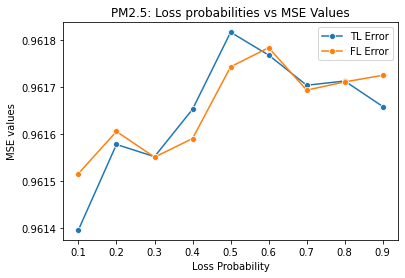

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# sns.lineplot(x = loss_prob, y = errors_tl, markers=True, dashes=False)
ax = sns.lineplot(x = loss_prob, y = errors_tl['PM2.5']['adam'], markers=True, 
                  marker="o", dashes=False, label = 'TL Error')

ax = sns.lineplot(x = loss_prob, y = errors['PM2.5']['adam'], markers=True, 
                  marker="o", dashes=False, label = 'FL Error')

# ax.set(xlabel='Loss Probability', ylabel='MSE values')
plt.legend()
plt.xlabel("Loss Probability")
plt.ylabel("MSE values")
plt.title("PM2.5: Loss probabilities vs MSE Values") 
plt.show(ax)

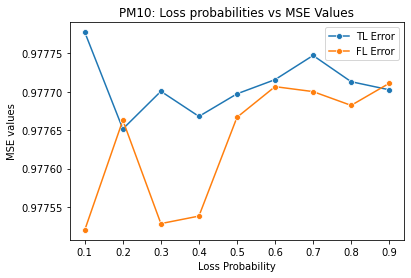

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# sns.lineplot(x = loss_prob, y = errors_tl, markers=True, dashes=False)
ax = sns.lineplot(x = loss_prob, y = errors_tl['PM10']['adam'], markers=True, 
                  marker="o", dashes=False, label = 'TL Error')

ax = sns.lineplot(x = loss_prob, y = errors['PM10']['adam'], markers=True, 
                  marker="o", dashes=False, label = 'FL Error')

# ax.set(xlabel='Loss Probability', ylabel='MSE values')
plt.legend()
plt.xlabel("Loss Probability")
plt.ylabel("MSE values")
plt.title("PM10: Loss probabilities vs MSE Values") 
plt.show(ax)

#### chaniging the range of y_axis

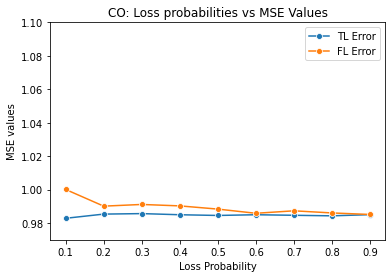

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# sns.lineplot(x = loss_prob, y = errors_tl, markers=True, dashes=False)
ax = sns.lineplot(x = loss_prob, y = errors_tl['CO']['adam'], markers=True, 
                  marker="o", dashes=False, label = 'TL Error')

ax = sns.lineplot(x = loss_prob, y = errors['CO']['adam'], markers=True, 
                  marker="o", dashes=False, label = 'FL Error')

ax.set(ylim=(0.97, 1.1))

plt.legend()
plt.xlabel("Loss Probability")
plt.ylabel("MSE values")
plt.title("CO: Loss probabilities vs MSE Values") 
plt.show(ax)

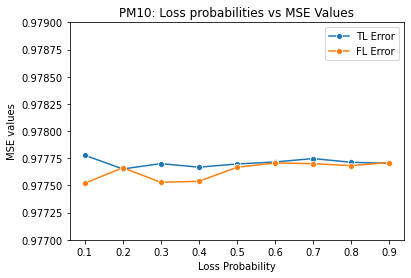

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# sns.lineplot(x = loss_prob, y = errors_tl, markers=True, dashes=False)
ax = sns.lineplot(x = loss_prob, y = errors_tl['PM10']['adam'], markers=True, 
                  marker="o", dashes=False, label = 'TL Error')

ax = sns.lineplot(x = loss_prob, y = errors['PM10']['adam'], markers=True, 
                  marker="o", dashes=False, label = 'FL Error')

ax.set(ylim=(0.977, 0.979))
# ax.set(xlabel='Loss Probability', ylabel='MSE values')
plt.legend()
plt.xlabel("Loss Probability")
plt.ylabel("MSE values")
plt.title("PM10: Loss probabilities vs MSE Values") 
plt.show(ax)

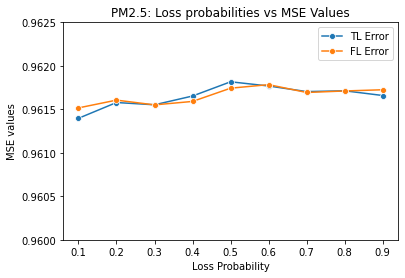

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# sns.lineplot(x = loss_prob, y = errors_tl, markers=True, dashes=False)
ax = sns.lineplot(x = loss_prob, y = errors_tl['PM2.5']['adam'], markers=True, 
                  marker="o", dashes=False, label = 'TL Error')

ax = sns.lineplot(x = loss_prob, y = errors['PM2.5']['adam'], markers=True, 
                  marker="o", dashes=False, label = 'FL Error')

ax.set(ylim=(0.96, 0.9625))
# ax.set(xlabel='Loss Probability', ylabel='MSE values')
plt.legend()
plt.xlabel("Loss Probability")
plt.ylabel("MSE values")
plt.title("PM2.5: Loss probabilities vs MSE Values") 
plt.show(ax)

# 26th October
* Feature scaling using Min-Max Scaler
* removing negative values of dependent variable ('CO', 'PM2.5', 'PM10')
* Adding labels to graph
* use of he_uniform for relu activation; glorot_uniform for sigmoid
* Adding 3 Optimizers: SGD, RMSprop, Adam
* Keeping both Mean squared error and NE

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# %tensorflow_version 2.x
# import tensorflow as tf
# print(tf.test.is_gpu_available())
# device_name = tf.test.gpu_device_name()
# if device_name != '/device:GPU:0':
#   raise SystemError('GPU device not found')
# print('Found GPU at: {}'.format(device_name))

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import initializers
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


import tensorflow as tf
# import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import utils
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Activation
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import SGD # from keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop # instead of from keras.optimizers import RMSprop
# from keras import datasets

# from keras.callbacks import LearningRateScheduler
# from keras.callbacks import History

from tensorflow.keras import losses
from sklearn.utils import shuffle

print(tf.__version__)
print(tf.keras.__version__)

2.6.0
2.6.0


In [ ]:
%%time
# Final plotting
K = 25 # as we have 25 clients

clients = {} # dictionary
clients_cut = {}

## reading the data from each client
for st_code in range(101,126):
    clients[st_code] = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dataNew/station_code"+str(st_code)+".csv", index_col = 0)

    clients[st_code]['Measurement date'] = pd.to_datetime(clients[st_code]['Measurement date'])

    clients[st_code]['year'] = clients[st_code]['Measurement date'].dt.year
    clients[st_code]['month'] = clients[st_code]['Measurement date'].dt.month
    clients[st_code]['week'] = clients[st_code]['Measurement date'].dt.week
    clients[st_code]['day'] = clients[st_code]['Measurement date'].dt.day
    clients[st_code]['hour'] = clients[st_code]['Measurement date'].dt.hour
    clients[st_code]['minute'] = clients[st_code]['Measurement date'].dt.minute # minute is not significant; as only 0 values
    clients[st_code]['dayOfWeek'] = clients[st_code]['Measurement date'].dt.dayofweek

    # choosing features
    clients[st_code] = clients[st_code][['Latitude', 'Longitude','year', 'month', 'week', 'day', 'hour', 'dayOfWeek', 'CO', 	'PM10',	'PM2.5']]

    clients[st_code].drop(clients[st_code][clients[st_code]['CO'] < 0].index, axis=0, inplace=True)
    clients[st_code].drop(clients[st_code][clients[st_code]['PM10'] < 0].index, axis=0, inplace=True)
    clients[st_code].drop(clients[st_code][clients[st_code]['PM2.5'] < 0].index, axis=0, inplace=True)


# complete dataset
frames = list(clients.values())
dataset = pd.concat(frames)
# display(dataset)




In [ ]:
## KAGGLE REQUIREMENTS

# %%time
# # getting input data
# dataset = pd.read_csv("../input/air-pollution-in-seoul/AirPollutionSeoul/Measurement_summary.csv")

# dataset['Measurement date'] = pd.to_datetime(dataset['Measurement date'])

# dataset['year'] =dataset['Measurement date'].dt.year
# dataset['month'] = dataset['Measurement date'].dt.month
# dataset['week'] = dataset['Measurement date'].dt.week
# dataset['day'] = dataset['Measurement date'].dt.day
# dataset['hour'] = dataset['Measurement date'].dt.hour
# dataset['minute'] = dataset['Measurement date'].dt.minute
# dataset['dayOfWeek'] = dataset['Measurement date'].dt.dayofweek



# dataset.head(5)

# # %%time
# # Final plotting
# K = 25 # as we have 25 clients

# clients = {} # dictionary
# clients_cut = {}

# ## reading the data from each client
# for st_code in range(101,126):

#     # choosing features
#     clients[st_code] = dataset[dataset['Station code'] == st_code]
#     clients[st_code] = clients[st_code][['Latitude', 'Longitude','year', 'month', 'week', 'day', 'hour', 'dayOfWeek', 'CO', 'PM10','PM2.5']]

#     clients[st_code].drop(clients[st_code][clients[st_code]['CO'] < 0].index, axis=0, inplace=True)
#     clients[st_code].drop(clients[st_code][clients[st_code]['PM10'] < 0].index, axis=0, inplace=True)
#     clients[st_code].drop(clients[st_code][clients[st_code]['PM2.5'] < 0].index, axis=0, inplace=True)



# # complete dataset
# frames = list(clients.values())
# dataset = pd.concat(frames)
# # display(dataset)




In [ ]:
dataset['CO'].describe()

count    643012.000000
mean          0.518481
std           0.386543
min           0.000000
25%           0.300000
50%           0.500000
75%           0.600000
max          71.700000
Name: CO, dtype: float64

In [ ]:
dataset['PM10'].describe()

count    643012.000000
mean         43.987356
std          71.263287
min           0.000000
25%          22.000000
50%          35.000000
75%          53.000000
max        3586.000000
Name: PM10, dtype: float64

In [ ]:
dataset['PM2.5'].describe()

count    643012.000000
mean         25.572573
std          43.937370
min           0.000000
25%          11.000000
50%          19.000000
75%          31.000000
max        6256.000000
Name: PM2.5, dtype: float64

In [ ]:
dataset[dataset['PM2.5'] < 0]['PM2.5'].value_counts()
# Number of values less than 0

Series([], Name: PM2.5, dtype: int64)

In [ ]:
dataset[dataset['PM10'] < 0]['PM10'].value_counts()

Series([], Name: PM10, dtype: int64)

In [ ]:
clients[118].head()

Latitude   Longitude  year  month  ...  dayOfWeek   CO  PM10  PM2.5
440296  37.452357  126.908296  2017      1  ...          6  1.2  67.0   45.0
440297  37.452357  126.908296  2017      1  ...          6  1.3  66.0   45.0
440298  37.452357  126.908296  2017      1  ...          6  1.2  63.0   42.0
440299  37.452357  126.908296  2017      1  ...          6  1.1  66.0   44.0
440300  37.452357  126.908296  2017      1  ...          6  1.1  62.0   42.0

[5 rows x 11 columns]

In [ ]:
# ClientUpdate(k, w): // Run on client k
def Client(client_idx, model, gas):
    # B ← (split P_k into batches of size B) # what is p_K --> each clients' sample size
    B = 1000 #int(len(clients[client_idx]) * 0.01) # so for each client the batch size would be different depending upon the total sample size
    E = 20 #max(30, B//10) # number of local epochs; it will also depend on sample size (indirectly)

    data = clients_cut[client_idx]
    # data = dataset.loc[dataset['Station code'] == client_idx]

    X, y = data[['Latitude', 'Longitude','year', 'month', 'week', 'day', 'hour', 'dayOfWeek']],  data[gas]

    x_train, x_val, y_train, y_val = train_test_split(X, y, test_size = 0.1, random_state=1)

    try:
        model.fit(x_train, y_train, 
                    epochs = E, 
                    batch_size=B,
                    validation_data=(x_val, y_val),
                    verbose=False)
    except Exception as e:
        print(e)
        print("error")

    # return w to server
    # in our case no need for any explicit return; as the model is pass by value
    return data.shape[0] # this will return the number of total sample


In [ ]:
# Server executes: 
def Server(gas, optimizer):
    # initialize w_0
    model = Sequential()
    
    # model.add(Dense(64, kernel_initializer='zeros', bias_initializer='zeros', activation=tf.nn.relu, input_dim=6)) # first dense/hidden layer
    model.add(Dense(64, kernel_initializer='he_uniform', bias_initializer="zeros", activation=tf.nn.relu, input_dim=8))
    model.add(Dropout(0.1))

    model.add(Dense(64, kernel_initializer='he_uniform', bias_initializer="zeros", activation=tf.nn.relu)) # second dense/hidden layer
    model.add(Dropout(0.2))

    model.add(Dense(1, kernel_initializer= 'glorot_uniform', activation=tf.nn.softmax)) # output layer

    # initial_weights = model.get_weights() # setting initial weights; should be same for all clients

    learning_rate = 0.1 # initial learning rate
    decay_rate = 0.1
    momentum = 0.8

    # define the optimizer function
    if optimizer == 'sgd':
      sgd = SGD(learning_rate = learning_rate, momentum = momentum, decay = decay_rate, nesterov = False)
      optimizer = sgd

    elif optimizer == 'rmsprop':
      optimizer = RMSprop(learning_rate=0.00025, epsilon=0.01)

    # compile the model
    model.compile(loss='mse', 
                optimizer=optimizer, 
                metrics=['mse'])
    

# for each round t = 1, 2, . . . do
    for t in range(1, 5):
        C = np.random.random(1)[0] # random number between 0 and 1.

        # m ← max(C  K, 1)
        m = max(int(C*K), 1) # m == random number of client selected
        weight_t_plus_1 = [None] * m # matrix to store the weights of all client in each t-round
        n_k = [None] * m # parameters for weighted sum 


        # S_t ← (random set of m clients)
        # S = {} # dictionary
        S_t = np.random.uniform(low=101, high=126, size=(m)).astype(int)

        # No need for below loop, as server don't need access to client data, server only need clients' number
        # for client in m_clients:
        #   S[client] = clients[client]

        initial_weights = model.get_weights() # setting initial weights; should be same for all clients
        # for t= 1 to T, initial_weights would be t-1th's final weights

        # for each client k ∈ S_t in parallel do
        client_idx = 0
        for client in S_t:
            # w^(k)_(t+1) ← ClientUpdate(k, model)
            n_k[client_idx] = Client(client, model, gas) # pass by reference for model
            weight_t_plus_1[client_idx] = model.get_weights()
            client_idx += 1

            # setting weights back to initial weights
            model.set_weights(initial_weights)

        # finding the weighted sum
        final_weights_t = np.array(weight_t_plus_1[0]) * (n_k[0] / sum(n_k))

        for idx in range(1, m):
          # w_(t+1) ← summation(k=1 to K){(n_k/n) * w^(k)_(t+1)} #n_k - no. of training sample in each client K; n - total training samples;
          final_weights_t += np.array(weight_t_plus_1[idx]) * (n_k[idx]/ sum(n_k))

        # setting the aggregated weights
        model.set_weights(final_weights_t)


#         print(model.get_weights())
    # return error_clients(model, loss_p)) # THIS LINE WON'T BE THERE IN REAL SERVER
    return model

In [ ]:
def error_clients(model, gas):
    
    X, y = test_data[['Latitude', 'Longitude','year', 'month', 'week', 'day', 'hour', 'dayOfWeek']],  test_data[gas]
    
    # adjusting the dimensions
    x_test, y_test = X.to_numpy(), y.to_numpy()
    x_test = x_test.reshape(x_test.shape[0], 1,  x_test.shape[1])
    y_test = y_test.reshape(y_test.shape[0],1,1)

    y_predicted = model.predict(x_test)
    
    from sklearn.metrics import mean_squared_error
    # print("y_predicted", y_predicted)
    # print("y_predicted.ravel()", y_predicted.ravel())
    NE = np.sum(abs(np.array(y_test) - np.array(y_predicted))) / np.sum(np.array(y_test))

    mse = mean_squared_error(y_predicted.ravel(), y_test.ravel())
    
    return (mse,NE)

          

In [ ]:

# create an Empty DataFrame object
train_data = pd.DataFrame()
test_data = pd.DataFrame()
loss_prob = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
models = []
errors = {'CO':{'adam':[], 'rmsprop':[], 'sgd':[]}, 	'PM10':{'adam':[], 'rmsprop':[], 'sgd':[]},	'PM2.5':{'adam':[], 'rmsprop':[], 'sgd':[]}}
gases = ['CO', 	'PM10',	'PM2.5']
optimizers = ['adam', 'rmsprop', 'sgd']

# reading all the clients and building model
for gas in gases:
  for opt in optimizers:
    for lp in loss_prob:
        for st_code in range(101,126):
            # splitting into train test split
            X, y = clients[st_code][['Latitude', 'Longitude','year', 'month', 'week', 'day', 'hour', 'dayOfWeek']],  clients[st_code][gas]
            x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = lp, random_state=0)

            # Normalization using min-max scaler
            # Normalization across instances should be done after splitting the data between training and test set, using only the data from the training set.
            # to avoid data leak
            scaler_cols = x_train.columns
            scaler_idx_train = x_train.index
            scaler_idx_test = x_test.index

            # from sklearn.preprocessing import MinMaxScaler
            scaler = MinMaxScaler()

            # transforming train data
            x_train_encoded_scaled = pd.DataFrame(scaler.fit_transform(x_train), columns = scaler_cols, index=scaler_idx_train)
            # display(x_train_encoded_scaled.head())

            # transforming test data
            x_test_encoded_scaled = pd.DataFrame(scaler.transform(x_test), columns = scaler_cols, index = scaler_idx_test)
            # display(x_test_encoded_scaled.head())

            # training data prep
            clients_cut[st_code] = pd.concat([x_train_encoded_scaled, y_train], axis = 1)

            # testing data prep
            # first appending x_test and y_test column wise
            # then appending each clients' dataframe one below other
            if st_code == 101:
              test_data = pd.concat([x_test_encoded_scaled, y_test], axis = 1)
            else:
              xy = pd.concat([x_test_encoded_scaled, y_test], axis=1)
              test_data = pd.concat([test_data, xy], axis=0)
            # x_test, y_test = x_test.to_numpy(), y_test.to_numpy()
        
        # Training the model using federated learning
        model = Server(gas, opt)

        # testing model
        errors[gas][opt].append(error_clients(model, gas))


In [ ]:
test_data.isnull().sum()

Latitude     0
Longitude    0
year         0
month        0
week         0
day          0
hour         0
dayOfWeek    0
PM2.5        0
dtype: int64

### MSE Errors

In [ ]:
errors

{'CO': {'adam': [(0.3564245731877974, 1.000090668681526),
   (0.42024701628892425, 0.990120185426374),
   (0.3971914200999399, 0.9911338711357136),
   (0.4025077755660611, 0.990274791924384),
   (0.3933551158277141, 0.9883547340107193),
   (0.3997140642940638, 0.9858544708762934),
   (0.39451267548059304, 0.9873287955970068),
   (0.3932234624491177, 0.9860573733314842),
   (0.38527309265399856, 0.9851438273418877)],
  'rmsprop': [(0.3564245731877974, 1.000090668681526),
   (0.42024701628892425, 0.990120185426374),
   (0.3971914200999399, 0.9911338711357136),
   (0.4025077755660611, 0.990274791924384),
   (0.3933551158277141, 0.9883547340107193),
   (0.3997140642940638, 0.9858544708762934),
   (0.39451267548059304, 0.9873287955970068),
   (0.3932234624491177, 0.9860573733314842),
   (0.38527309265399856, 0.9851438273418877)],
  'sgd': [(0.3564245731877974, 1.000090668681526),
   (0.42024701628892425, 0.990120185426374),
   (0.3971914200999399, 0.9911338711357136),
   (0.4025077755660611

In [ ]:
np.array(errors['CO']['adam'][:])

array([[0.35642457, 1.00009067],
       [0.42024702, 0.99012019],
       [0.39719142, 0.99113387],
       [0.40250778, 0.99027479],
       [0.39335512, 0.98835473],
       [0.39971406, 0.98585447],
       [0.39451268, 0.9873288 ],
       [0.39322346, 0.98605737],
       [0.38527309, 0.98514383]])

In [ ]:
np.array(errors['CO']['adam'][:])[:,0]

array([0.35642457, 0.42024702, 0.39719142, 0.40250778, 0.39335512,
       0.39971406, 0.39451268, 0.39322346, 0.38527309])

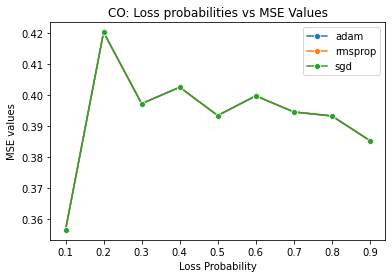

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.lineplot(x = loss_prob, y = np.array(errors['CO']['adam'][:])[:,0], markers=True, 
                  marker="o", dashes=False, label = 'adam')
ax = sns.lineplot(x = loss_prob, y = np.array(errors['CO']['rmsprop'])[:,0], markers=True, 
                  marker="o", dashes=False, label='rmsprop')
ax = sns.lineplot(x = loss_prob, y = np.array(errors['CO']['sgd'])[:,0], markers=True, 
                  marker="o", dashes=False, label='sgd')
# ax.set(xlabel='Loss Probability', ylabel='MSE values')
plt.xlabel("Loss Probability")
plt.ylabel("MSE values")
plt.title("CO: Loss probabilities vs MSE Values") 
plt.show(ax)

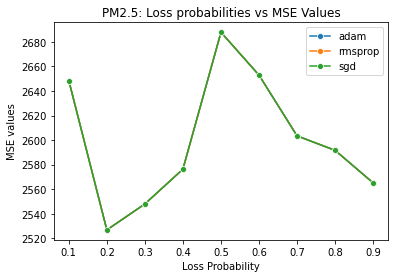

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.lineplot(x = loss_prob, y = np.array(errors['PM2.5']['adam'][:])[:,0], markers=True, marker="o", dashes=False, label = 'adam')
ax = sns.lineplot(x = loss_prob, y = np.array(errors['PM2.5']['rmsprop'][:])[:,0], markers=True, marker="o", dashes=False, label = 'rmsprop')
ax = sns.lineplot(x = loss_prob, y = np.array(errors['PM2.5']['sgd'][:])[:,0], markers=True, marker="o", dashes=False, label = 'sgd')

# ax.set(xlabel='Loss Probability', ylabel='MSE values')
plt.xlabel("Loss Probability")
plt.ylabel("MSE values")
plt.title("PM2.5: Loss probabilities vs MSE Values") 
plt.show(ax)

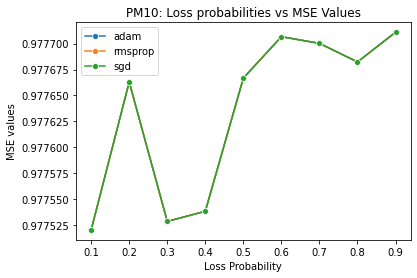

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


ax = sns.lineplot(x = loss_prob, y = np.array(errors['PM10']['adam'][:])[:,0], markers=True, marker="o", dashes=False, label = 'adam')
ax = sns.lineplot(x = loss_prob, y = np.array(errors['PM10']['rmsprop'][:])[:,0], markers=True, marker="o", dashes=False, label = 'rmsprop')
ax = sns.lineplot(x = loss_prob, y = np.array(errors['PM10']['sgd'][:])[:,0], markers=True, marker="o", dashes=False, label = 'sgd')
# ax.set(xlabel='Loss Probability', ylabel='MSE values')
plt.xlabel("Loss Probability")
plt.ylabel("MSE values")
plt.title("PM10: Loss probabilities vs MSE Values") 
plt.show(ax)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.lineplot(x = loss_prob, y = np.array(errors['CO']['adam'][:])[:,1], markers=True, marker="o", dashes=False, label = 'adam')
ax = sns.lineplot(x = loss_prob, y = np.array(errors['CO']['rmsprop'][:])[:,1], markers=True, marker="o", dashes=False, label = 'rmsprop')
ax = sns.lineplot(x = loss_prob, y = np.array(errors['CO']['sgd'][:])[:,1], markers=True, marker="o", dashes=False, label = 'sgd')
# ax.set(xlabel='Loss Probability', ylabel='MSE values')
plt.xlabel("Loss Probability")
plt.ylabel("Normalized Error values")
plt.title("CO: Loss probabilities vs Normalized Error Values") 
plt.show(ax)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.lineplot(x = loss_prob, y = np.array(errors['PM2.5']['adam'][:])[:,1], markers=True, marker="o", dashes=False, label = 'adam')
ax = sns.lineplot(x = loss_prob, y = np.array(errors['PM2.5']['rmsprop'][:])[:,1], markers=True, marker="o", dashes=False, label = 'rmsprop')
ax = sns.lineplot(x = loss_prob, y = np.array(errors['PM2.5']['sgd'][:])[:,1], markers=True, marker="o", dashes=False, label = 'sgd')
# ax.set(xlabel='Loss Probability', ylabel='MSE values')
plt.xlabel("Loss Probability")
plt.ylabel("Normalized Error values")
plt.title("PM2.5: Loss probabilities vs Normalized Error Values") 
plt.show(ax)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.lineplot(x = loss_prob, y = np.array(errors['PM10']['adam'][:])[:,1], markers=True, marker="o", dashes=False, label = 'adam')
ax = sns.lineplot(x = loss_prob, y = np.array(errors['PM10']['rmsprop'][:])[:,1], markers=True, marker="o", dashes=False, label = 'rmsprop')
ax = sns.lineplot(x = loss_prob, y = np.array(errors['PM10']['sgd'][:])[:,1], markers=True, marker="o", dashes=False, label = 'sgd')
# ax.set(xlabel='Loss Probability', ylabel='MSE values')
plt.xlabel("Loss Probability")
plt.ylabel("Normalized Error values")
plt.title("PM10: Loss probabilities vs Normalized Error Values") 
plt.show(ax)

##### traditional model building

In [ ]:
def traditional_ML(loss_p, gas, optimizer):
  # initialize w_0
  model = Sequential()

  # model.add(Dense(64, kernel_initializer='zeros', bias_initializer='zeros', activation=tf.nn.relu, input_dim=6)) # first dense/hidden layer
  model.add(Dense(64, kernel_initializer='he_uniform', bias_initializer="zeros", activation=tf.nn.relu, input_dim=8))
  model.add(Dropout(0.1))

  model.add(Dense(64, kernel_initializer='he_uniform', bias_initializer="zeros", activation=tf.nn.relu)) # second dense/hidden layer
  model.add(Dropout(0.2))

  model.add(Dense(1, kernel_initializer= 'glorot_uniform', activation=tf.nn.softmax)) # output layer

  # initial_weights = model.get_weights() # setting initial weights; should be same for all clients

  learning_rate = 0.1 # initial learning rate
  decay_rate = 0.1
  momentum = 0.8

  # define the optimizer function
  sgd = SGD(learning_rate = learning_rate, momentum = momentum, decay = decay_rate, nesterov = False)

  # define the optimizer function
  if optimizer == 'sgd':
    sgd = SGD(learning_rate = learning_rate, momentum = momentum, decay = decay_rate, nesterov = False)
    optimizer = sgd

  elif optimizer == 'rmsprop':
    optimizer = RMSprop(learning_rate=0.00025, epsilon=0.01)

  # compile the model
  model.compile(loss='mse', 
              optimizer=optimizer, 
              metrics=['mse'])

  X, y = dataset[['Latitude', 'Longitude','year', 'month', 'week', 'day', 'hour', 'dayOfWeek']],  dataset[gas]

  x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = loss_p, random_state=1)


  B = 1000 #int(len(x_train) * 0.01) # so for each client the batch size would be different depending upon the total sample size
  E = 25 #max(30, B//10) # number of local epochs; it will also depend on sample size (indirectly)


  model.fit(x_train, y_train, 
                  epochs = E, 
                  batch_size=B,
                  verbose=False)
      
  x_test, y_test = x_test.to_numpy(), y_test.to_numpy()

  # adjusting the dimensions
  x_test = x_test.reshape(x_test.shape[0], 1,  x_test.shape[1])
  y_test = y_test.reshape(y_test.shape[0],1,1)
  y_predicted = model.predict(x_test)
  

  from sklearn.metrics import mean_squared_error
  mse = mean_squared_error(y_predicted.ravel(), y_test.ravel())

  NE = np.sum(abs(np.array(y_test) - np.array(y_predicted))) / np.sum(np.array(y_test))
  return (mse, NE)


In [ ]:

# Final plotting
K = 25 # as we have 25 clients

loss_prob = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
gases = ['CO', 	'PM10',	'PM2.5']
errors_tl = {'CO':{'adam':[], 'rmsprop':[], 'sgd':[]}, 	'PM10':{'adam':[], 'rmsprop':[], 'sgd':[]},	'PM2.5':{'adam':[], 'rmsprop':[], 'sgd':[]}}
optimizers = ['adam', 'rmsprop', 'sgd']


for gas in gases:
  for opt in optimizers:
    for loss_p in loss_prob:
      error = traditional_ML(loss_p, gas, opt)
      errors_tl[gas][opt].append(error)


### MSE Errors

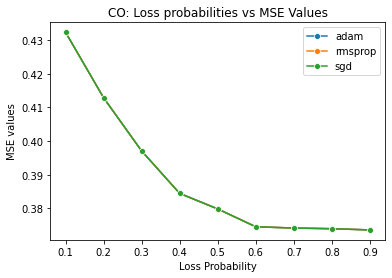

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# sns.lineplot(x = loss_prob, y = errors_tl, markers=True, dashes=False)
ax = sns.lineplot(x = loss_prob, y = np.array(errors_tl['CO']['adam'][:])[:,0], markers=True, marker="o", dashes=False, label = 'adam')
ax = sns.lineplot(x = loss_prob, y = np.array(errors_tl['CO']['rmsprop'][:])[:,0], markers=True, marker="o", dashes=False, label = 'rmsprop')
ax = sns.lineplot(x = loss_prob, y = np.array(errors_tl['CO']['sgd'][:])[:,0], markers=True, marker="o", dashes=False, label = 'sgd')
# ax.set(xlabel='Loss Probability', ylabel='MSE values')
plt.xlabel("Loss Probability")
plt.ylabel("MSE values")
plt.title("CO: Loss probabilities vs MSE Values") 
plt.show(ax)


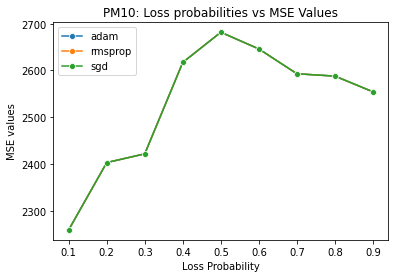

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# sns.lineplot(x = loss_prob, y = errors_tl, markers=True, dashes=False)
ax = sns.lineplot(x = loss_prob, y = np.array(errors_tl['PM2.5']['adam'][:])[:,0], markers=True, marker="o", dashes=False, label = 'adam')
ax = sns.lineplot(x = loss_prob, y = np.array(errors_tl['PM2.5']['rmsprop'][:])[:,0], markers=True, marker="o", dashes=False, label = 'rmsprop')
ax = sns.lineplot(x = loss_prob, y = np.array(errors_tl['PM2.5']['sgd'][:])[:,0], markers=True, marker="o", dashes=False, label = 'sgd')
# ax.set(xlabel='Loss Probability', ylabel='MSE values')
plt.xlabel("Loss Probability")
plt.ylabel("MSE values")
plt.title("PM10: Loss probabilities vs MSE Values") 
plt.show(ax)


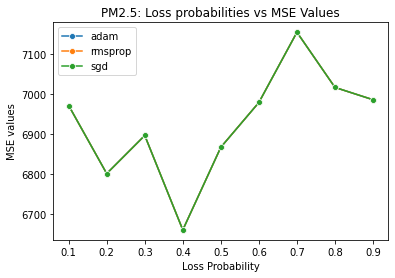

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# sns.lineplot(x = loss_prob, y = errors_tl, markers=True, dashes=False)
ax = sns.lineplot(x = loss_prob, y = np.array(errors_tl['PM10']['adam'][:])[:,0], markers=True, marker="o", dashes=False, label = 'adam')
ax = sns.lineplot(x = loss_prob, y = np.array(errors_tl['PM10']['rmsprop'][:])[:,0], markers=True, marker="o", dashes=False, label = 'rmsprop')
ax = sns.lineplot(x = loss_prob, y = np.array(errors_tl['PM10']['sgd'][:])[:,0], markers=True, marker="o", dashes=False, label = 'sgd')
# ax.set(xlabel='Loss Probability', ylabel='MSE values')
plt.xlabel("Loss Probability")
plt.ylabel("MSE values")
plt.title("PM2.5: Loss probabilities vs MSE Values") 
plt.show(ax)


### NE Error

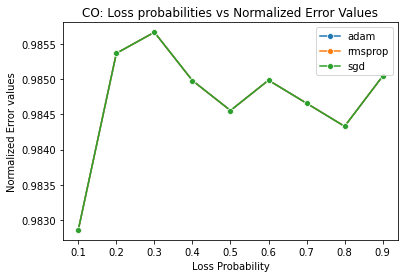

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# sns.lineplot(x = loss_prob, y = errors_tl, markers=True, dashes=False)
ax = sns.lineplot(x = loss_prob, y = np.array(errors_tl['CO']['adam'][:])[:,1], markers=True, marker="o", dashes=False, label = 'adam')
ax = sns.lineplot(x = loss_prob, y = np.array(errors_tl['CO']['rmsprop'][:])[:,1], markers=True, marker="o", dashes=False, label = 'rmsprop')
ax = sns.lineplot(x = loss_prob, y = np.array(errors_tl['CO']['sgd'][:])[:,1], markers=True, marker="o", dashes=False, label = 'sgd')
# ax.set(xlabel='Loss Probability', ylabel='MSE values')
plt.xlabel("Loss Probability")
plt.ylabel("Normalized Error values")
plt.title("CO: Loss probabilities vs Normalized Error Values") 
plt.show(ax)


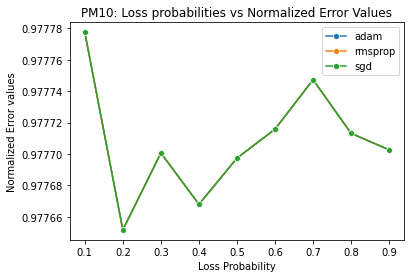

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# sns.lineplot(x = loss_prob, y = errors_tl, markers=True, dashes=False)
ax = sns.lineplot(x = loss_prob, y = np.array(errors_tl['PM10']['adam'][:])[:,1], markers=True, marker="o", dashes=False, label = 'adam')
ax = sns.lineplot(x = loss_prob, y = np.array(errors_tl['PM10']['rmsprop'][:])[:,1], markers=True, marker="o", dashes=False, label = 'rmsprop')
ax = sns.lineplot(x = loss_prob, y = np.array(errors_tl['PM10']['sgd'][:])[:,1], markers=True, marker="o", dashes=False, label = 'sgd')
# ax.set(xlabel='Loss Probability', ylabel='MSE values')
plt.xlabel("Loss Probability")
plt.ylabel("Normalized Error values")
plt.title("PM10: Loss probabilities vs Normalized Error Values") 
plt.show(ax)


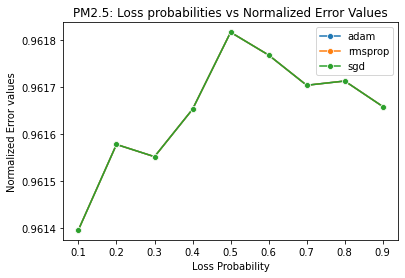

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# sns.lineplot(x = loss_prob, y = errors_tl, markers=True, dashes=False)
ax = sns.lineplot(x = loss_prob, y = np.array(errors_tl['PM2.5']['adam'][:])[:,1], markers=True, marker="o", dashes=False, label = 'adam')
ax = sns.lineplot(x = loss_prob, y = np.array(errors_tl['PM2.5']['rmsprop'][:])[:,1], markers=True, marker="o", dashes=False, label = 'rmsprop')
ax = sns.lineplot(x = loss_prob, y = np.array(errors_tl['PM2.5']['sgd'][:])[:,1], markers=True, marker="o", dashes=False, label = 'sgd')
# ax.set(xlabel='Loss Probability', ylabel='MSE values')
plt.xlabel("Loss Probability")
plt.ylabel("Normalized Error values")
plt.title("PM2.5: Loss probabilities vs Normalized Error Values") 
plt.show(ax)


##### Mixed line graph

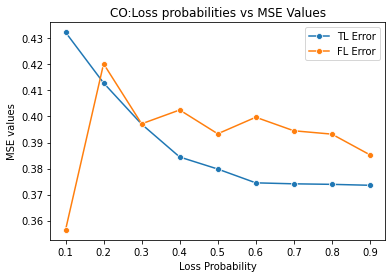

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# sns.lineplot(x = loss_prob, y = errors_tl, markers=True, dashes=False)
ax = sns.lineplot(x = loss_prob, y = np.array(errors_tl['CO']['adam'][:])[:,0], markers=True, 
                  marker="o", dashes=False, label = 'TL Error')

ax = sns.lineplot(x = loss_prob, y = np.array(errors['CO']['adam'][:])[:,0], markers=True, 
                  marker="o", dashes=False, label = 'FL Error')

# ax.set(xlabel='Loss Probability', ylabel='MSE values')
plt.legend()
plt.xlabel("Loss Probability")
plt.ylabel("MSE values")
plt.title("CO:Loss probabilities vs MSE Values") 
plt.show(ax)

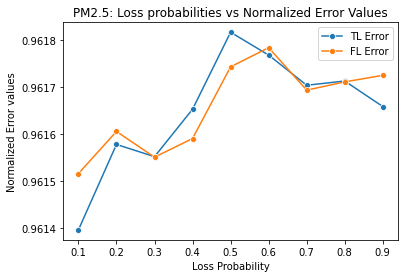

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# sns.lineplot(x = loss_prob, y = errors_tl, markers=True, dashes=False)
ax = sns.lineplot(x = loss_prob, y = np.array(errors_tl['PM2.5']['adam'][:])[:,1], markers=True, 
                  marker="o", dashes=False, label = 'TL Error')

ax = sns.lineplot(x = loss_prob, y = np.array(errors['PM2.5']['adam'][:])[:,1], markers=True, 
                  marker="o", dashes=False, label = 'FL Error')

# ax.set(xlabel='Loss Probability', ylabel='MSE values')
plt.legend()
plt.xlabel("Loss Probability")
plt.ylabel("Normalized Error values")
plt.title("PM2.5: Loss probabilities vs Normalized Error Values") 
plt.show(ax)

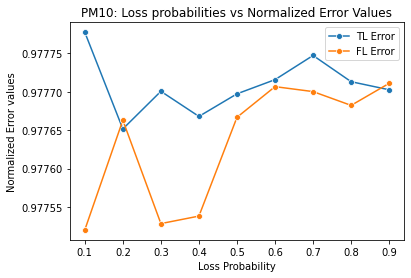

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# sns.lineplot(x = loss_prob, y = errors_tl, markers=True, dashes=False)
ax = sns.lineplot(x = loss_prob, y = np.array(errors_tl['PM10']['adam'][:])[:,1], markers=True, 
                  marker="o", dashes=False, label = 'TL Error')

ax = sns.lineplot(x = loss_prob, y = np.array(errors['PM10']['adam'][:])[:,1], markers=True, 
                  marker="o", dashes=False, label = 'FL Error')

# ax.set(xlabel='Loss Probability', ylabel='MSE values')
plt.legend()
plt.xlabel("Loss Probability")
plt.ylabel("Normalized Error values")
plt.title("PM10: Loss probabilities vs Normalized Error Values") 
plt.show(ax)

#### chaniging the range of y_axis

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# sns.lineplot(x = loss_prob, y = errors_tl, markers=True, dashes=False)
ax = sns.lineplot(x = loss_prob, y = np.array(errors_tl['CO']['adam'][:])[:,0], markers=True, 
                  marker="o", dashes=False, label = 'TL Error')

ax = sns.lineplot(x = loss_prob, y = np.array(errors['CO']['adam'][:])[:,0], markers=True, 
                  marker="o", dashes=False, label = 'FL Error')

ax.set(ylim=(0.2, 0.5))

plt.legend()
plt.xlabel("Loss Probability")
plt.ylabel("ERROR values")
plt.title("CO: Loss probabilities vs ERROR Values") 
plt.show(ax)

NameError: ignored

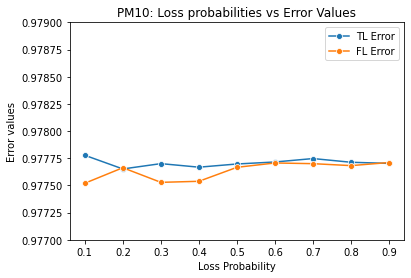

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# sns.lineplot(x = loss_prob, y = errors_tl, markers=True, dashes=False)
ax = sns.lineplot(x = loss_prob, y = np.array(errors_tl['PM10']['adam'][:])[:,1], markers=True, 
                  marker="o", dashes=False, label = 'TL Error')

ax = sns.lineplot(x = loss_prob, y = np.array(errors['PM10']['adam'][:])[:,1], markers=True, 
                  marker="o", dashes=False, label = 'FL Error')

ax.set(ylim=(0.977, 0.979))
# ax.set(xlabel='Loss Probability', ylabel='MSE values')
plt.legend()
plt.xlabel("Loss Probability")
plt.ylabel("Error values")
plt.title("PM10: Loss probabilities vs Error Values") 
plt.show(ax)

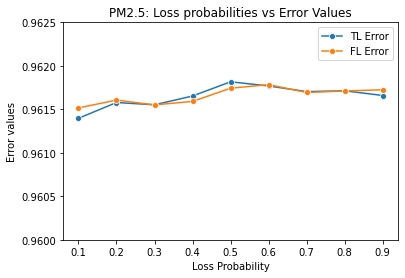

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# sns.lineplot(x = loss_prob, y = errors_tl, markers=True, dashes=False)
ax = sns.lineplot(x = loss_prob, y = np.array(errors_tl['PM2.5']['adam'][:])[:,1], markers=True, 
                  marker="o", dashes=False, label = 'TL Error')

ax = sns.lineplot(x = loss_prob, y = np.array(errors['PM2.5']['adam'][:])[:,1], markers=True, 
                  marker="o", dashes=False, label = 'FL Error')

ax.set(ylim=(0.96, 0.9625))
# ax.set(xlabel='Loss Probability', ylabel='MSE values')
plt.legend()
plt.xlabel("Loss Probability")
plt.ylabel("Error values")
plt.title("PM2.5: Loss probabilities vs Error Values") 
plt.show(ax)

# 27TH Oct
* seperating optimizers

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import initializers
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


import tensorflow as tf
# import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import utils
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Activation
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import SGD # from keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop # instead of from keras.optimizers import RMSprop
# from keras import datasets

# from keras.callbacks import LearningRateScheduler
# from keras.callbacks import History

from tensorflow.keras import losses
from sklearn.utils import shuffle

print(tf.__version__)
print(tf.keras.__version__)

2.6.0
2.6.0


In [ ]:
%%time
# Final plotting
K = 25 # as we have 25 clients

clients = {} # dictionary
clients_cut = {}

## reading the data from each client
for st_code in range(101,126):
    clients[st_code] = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dataNew/station_code"+str(st_code)+".csv", index_col = 0)

    clients[st_code]['Measurement date'] = pd.to_datetime(clients[st_code]['Measurement date'])

    clients[st_code]['year'] = clients[st_code]['Measurement date'].dt.year
    clients[st_code]['month'] = clients[st_code]['Measurement date'].dt.month
    clients[st_code]['week'] = clients[st_code]['Measurement date'].dt.week
    clients[st_code]['day'] = clients[st_code]['Measurement date'].dt.day
    clients[st_code]['hour'] = clients[st_code]['Measurement date'].dt.hour
    clients[st_code]['minute'] = clients[st_code]['Measurement date'].dt.minute # minute is not significant; as only 0 values
    clients[st_code]['dayOfWeek'] = clients[st_code]['Measurement date'].dt.dayofweek

    # choosing features
    clients[st_code] = clients[st_code][['Latitude', 'Longitude','year', 'month', 'week', 'day', 'hour', 'dayOfWeek', 'CO', 	'PM10',	'PM2.5']]

    clients[st_code].drop(clients[st_code][clients[st_code]['CO'] < 0].index, axis=0, inplace=True)
    clients[st_code].drop(clients[st_code][clients[st_code]['PM10'] < 0].index, axis=0, inplace=True)
    clients[st_code].drop(clients[st_code][clients[st_code]['PM2.5'] < 0].index, axis=0, inplace=True)


# complete dataset
frames = list(clients.values())
dataset = pd.concat(frames)
# display(dataset)




In [ ]:
# ClientUpdate(k, w): // Run on client k
def Client(client_idx, model, gas):
    # B ← (split P_k into batches of size B) # what is p_K --> each clients' sample size
    B = 1000 #int(len(clients[client_idx]) * 0.01) # so for each client the batch size would be different depending upon the total sample size
    E = 20 #max(30, B//10) # number of local epochs; it will also depend on sample size (indirectly)

    data = clients_cut[client_idx]
    # data = dataset.loc[dataset['Station code'] == client_idx]

    X, y = data[['Latitude', 'Longitude','year', 'month', 'week', 'day', 'hour', 'dayOfWeek']],  data[gas]

    x_train, x_val, y_train, y_val = train_test_split(X, y, test_size = 0.1, random_state=1)

    try:
        model.fit(x_train, y_train, 
                    epochs = E, 
                    batch_size=B,
                    validation_data=(x_val, y_val),
                    verbose=False)
    except Exception as e:
        print(e)
        print("error")

    # return w to server
    # in our case no need for any explicit return; as the model is pass by value
    return data.shape[0] # this will return the number of total sample


In [ ]:
# Server executes: 
def Server(gas, optimizer):
    # initialize w_0
    model = Sequential()
    
    # model.add(Dense(64, kernel_initializer='zeros', bias_initializer='zeros', activation=tf.nn.relu, input_dim=6)) # first dense/hidden layer
    model.add(Dense(64, kernel_initializer='he_uniform', bias_initializer="zeros", activation=tf.nn.relu, input_dim=8))
    model.add(Dropout(0.1))

    model.add(Dense(64, kernel_initializer='he_uniform', bias_initializer="zeros", activation=tf.nn.relu)) # second dense/hidden layer
    model.add(Dropout(0.2))

    model.add(Dense(1, kernel_initializer= 'glorot_uniform', activation=tf.nn.softmax)) # output layer

    # initial_weights = model.get_weights() # setting initial weights; should be same for all clients

    # learning_rate = 0.1 # initial learning rate
    # decay_rate = 0.1
    # momentum = 0.8

    # # define the optimizer function
    # if optimizer == 'sgd':
    #   sgd = SGD(learning_rate = learning_rate, momentum = momentum, decay = decay_rate, nesterov = False)
    #   optimizer = sgd

    # elif optimizer == 'rmsprop':
    #   optimizer = RMSprop(learning_rate=0.00025, epsilon=0.01)

    # compile the model
    model.compile(loss='mse', 
                optimizer=optimizer, 
                metrics=['mse'])
    

# for each round t = 1, 2, . . . do
    for t in range(1, 5):
        C = np.random.random(1)[0] # random number between 0 and 1.

        # m ← max(C  K, 1)
        m = max(int(C*K), 1) # m == random number of client selected
        weight_t_plus_1 = [None] * m # matrix to store the weights of all client in each t-round
        n_k = [None] * m # parameters for weighted sum 


        # S_t ← (random set of m clients)
        # S = {} # dictionary
        S_t = np.random.uniform(low=101, high=126, size=(m)).astype(int)

        # No need for below loop, as server don't need access to client data, server only need clients' number
        # for client in m_clients:
        #   S[client] = clients[client]

        initial_weights = model.get_weights() # setting initial weights; should be same for all clients
        # for t= 1 to T, initial_weights would be t-1th's final weights

        # for each client k ∈ S_t in parallel do
        client_idx = 0
        for client in S_t:
            # w^(k)_(t+1) ← ClientUpdate(k, model)
            n_k[client_idx] = Client(client, model, gas) # pass by reference for model
            weight_t_plus_1[client_idx] = model.get_weights()
            client_idx += 1

            # setting weights back to initial weights
            model.set_weights(initial_weights)

        # finding the weighted sum
        final_weights_t = np.array(weight_t_plus_1[0]) * (n_k[0] / sum(n_k))

        for idx in range(1, m):
          # w_(t+1) ← summation(k=1 to K){(n_k/n) * w^(k)_(t+1)} #n_k - no. of training sample in each client K; n - total training samples;
          final_weights_t += np.array(weight_t_plus_1[idx]) * (n_k[idx]/ sum(n_k))

        # setting the aggregated weights
        model.set_weights(final_weights_t)


#         print(model.get_weights())
    # return error_clients(model, loss_p)) # THIS LINE WON'T BE THERE IN REAL SERVER
    return model

In [ ]:
def error_clients(model, gas):
    
    X, y = test_data[['Latitude', 'Longitude','year', 'month', 'week', 'day', 'hour', 'dayOfWeek']],  test_data[gas]
    
    # adjusting the dimensions
    x_test, y_test = X.to_numpy(), y.to_numpy()
    x_test = x_test.reshape(x_test.shape[0], 1,  x_test.shape[1])
    y_test = y_test.reshape(y_test.shape[0],1,1)

    y_predicted = model.predict(x_test)
    
    from sklearn.metrics import mean_squared_error
    # print("y_predicted", y_predicted)
    # print("y_predicted.ravel()", y_predicted.ravel())
    NE = np.sum(abs(np.array(y_test) - np.array(y_predicted))) / np.sum(np.array(y_test))

    mse = mean_squared_error(y_predicted.ravel(), y_test.ravel())
    
    return (mse,NE)

          

### adam optimizer

In [ ]:

# create an Empty DataFrame object
train_data = pd.DataFrame()
test_data = pd.DataFrame()
loss_prob = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
models = []
errors_adam = {'CO':[], 	'PM10':[],	'PM2.5':[]}
gases = ['CO', 	'PM10',	'PM2.5']
optimizers = ['adam', 'rmsprop', 'sgd']

# reading all the clients and building model
for gas in gases:
  for lp in loss_prob:
      for st_code in range(101,126):
          # splitting into train test split
          X, y = clients[st_code][['Latitude', 'Longitude','year', 'month', 'week', 'day', 'hour', 'dayOfWeek']],  clients[st_code][gas]
          x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = lp, random_state=0)

          # Normalization using min-max scaler
          # Normalization across instances should be done after splitting the data between training and test set, using only the data from the training set.
          # to avoid data leak
          scaler_cols = x_train.columns
          scaler_idx_train = x_train.index
          scaler_idx_test = x_test.index

          # from sklearn.preprocessing import MinMaxScaler
          scaler = MinMaxScaler()

          # transforming train data
          x_train_encoded_scaled = pd.DataFrame(scaler.fit_transform(x_train), columns = scaler_cols, index=scaler_idx_train)
          # display(x_train_encoded_scaled.head())

          # transforming test data
          x_test_encoded_scaled = pd.DataFrame(scaler.transform(x_test), columns = scaler_cols, index = scaler_idx_test)
          # display(x_test_encoded_scaled.head())

          # training data prep
          clients_cut[st_code] = pd.concat([x_train_encoded_scaled, y_train], axis = 1)

          # testing data prep
          # first appending x_test and y_test column wise
          # then appending each clients' dataframe one below other
          if st_code == 101:
            test_data = pd.concat([x_test_encoded_scaled, y_test], axis = 1)
          else:
            xy = pd.concat([x_test_encoded_scaled, y_test], axis=1)
            test_data = pd.concat([test_data, xy], axis=0)
          # x_test, y_test = x_test.to_numpy(), y_test.to_numpy()
      
      # Training the model using federated learning
      model = Server(gas, 'adam')

      # testing model
      errors_adam[gas].append(error_clients(model, gas))


### rmsprop optimizer

In [ ]:

# create an Empty DataFrame object
train_data = pd.DataFrame()
test_data = pd.DataFrame()
loss_prob = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
models = []
errors_rmsprop = {'CO':[], 	'PM10':[],	'PM2.5':[]}
gases = ['CO', 	'PM10',	'PM2.5']
optimizers = ['adam', 'rmsprop', 'sgd']

# reading all the clients and building model
for gas in gases:
  for lp in loss_prob:
      for st_code in range(101,126):
          # splitting into train test split
          X, y = clients[st_code][['Latitude', 'Longitude','year', 'month', 'week', 'day', 'hour', 'dayOfWeek']],  clients[st_code][gas]
          x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = lp, random_state=0)

          # Normalization using min-max scaler
          # Normalization across instances should be done after splitting the data between training and test set, using only the data from the training set.
          # to avoid data leak
          scaler_cols = x_train.columns
          scaler_idx_train = x_train.index
          scaler_idx_test = x_test.index

          # from sklearn.preprocessing import MinMaxScaler
          scaler = MinMaxScaler()

          # transforming train data
          x_train_encoded_scaled = pd.DataFrame(scaler.fit_transform(x_train), columns = scaler_cols, index=scaler_idx_train)
          # display(x_train_encoded_scaled.head())

          # transforming test data
          x_test_encoded_scaled = pd.DataFrame(scaler.transform(x_test), columns = scaler_cols, index = scaler_idx_test)
          # display(x_test_encoded_scaled.head())

          # training data prep
          clients_cut[st_code] = pd.concat([x_train_encoded_scaled, y_train], axis = 1)

          # testing data prep
          # first appending x_test and y_test column wise
          # then appending each clients' dataframe one below other
          if st_code == 101:
            test_data = pd.concat([x_test_encoded_scaled, y_test], axis = 1)
          else:
            xy = pd.concat([x_test_encoded_scaled, y_test], axis=1)
            test_data = pd.concat([test_data, xy], axis=0)
          # x_test, y_test = x_test.to_numpy(), y_test.to_numpy()
      
      # Training the model using federated learning
      model = Server(gas, 'rmsprop')

      # testing model
      errors_rmsprop[gas].append(error_clients(model, gas))


### sgd optimizer

In [ ]:

# create an Empty DataFrame object
train_data = pd.DataFrame()
test_data = pd.DataFrame()
loss_prob = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
models = []
errors_sgd = {'CO':[], 	'PM10':[],	'PM2.5':[]}
gases = ['CO', 	'PM10',	'PM2.5']
optimizers = ['adam', 'rmsprop', 'sgd']

# reading all the clients and building model
for gas in gases:
  for lp in loss_prob:
      for st_code in range(101,126):
          # splitting into train test split
          X, y = clients[st_code][['Latitude', 'Longitude','year', 'month', 'week', 'day', 'hour', 'dayOfWeek']],  clients[st_code][gas]
          x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = lp, random_state=0)

          # Normalization using min-max scaler
          # Normalization across instances should be done after splitting the data between training and test set, using only the data from the training set.
          # to avoid data leak
          scaler_cols = x_train.columns
          scaler_idx_train = x_train.index
          scaler_idx_test = x_test.index

          # from sklearn.preprocessing import MinMaxScaler
          scaler = MinMaxScaler()

          # transforming train data
          x_train_encoded_scaled = pd.DataFrame(scaler.fit_transform(x_train), columns = scaler_cols, index=scaler_idx_train)
          # display(x_train_encoded_scaled.head())

          # transforming test data
          x_test_encoded_scaled = pd.DataFrame(scaler.transform(x_test), columns = scaler_cols, index = scaler_idx_test)
          # display(x_test_encoded_scaled.head())

          # training data prep
          clients_cut[st_code] = pd.concat([x_train_encoded_scaled, y_train], axis = 1)

          # testing data prep
          # first appending x_test and y_test column wise
          # then appending each clients' dataframe one below other
          if st_code == 101:
            test_data = pd.concat([x_test_encoded_scaled, y_test], axis = 1)
          else:
            xy = pd.concat([x_test_encoded_scaled, y_test], axis=1)
            test_data = pd.concat([test_data, xy], axis=0)
          # x_test, y_test = x_test.to_numpy(), y_test.to_numpy()
      
      # Training the model using federated learning
      model = Server(gas, 'sgd')

      # testing model
      errors_sgd[gas].append(error_clients(model, gas))


### MSE Errors

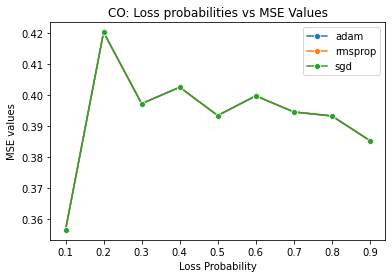

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.lineplot(x = loss_prob, y = np.array(errors_adam['CO'][:])[:,0], markers=True, 
                  marker="o", dashes=False, label = 'adam')
ax = sns.lineplot(x = loss_prob, y = np.array(errors_rmsprop['CO'])[:,0], markers=True, 
                  marker="o", dashes=False, label='rmsprop')
ax = sns.lineplot(x = loss_prob, y = np.array(errors_sgd['CO'])[:,0], markers=True, 
                  marker="o", dashes=False, label='sgd')
# ax.set(xlabel='Loss Probability', ylabel='MSE values')
plt.xlabel("Loss Probability")
plt.ylabel("MSE values")
plt.title("CO: Loss probabilities vs MSE Values") 
plt.show(ax)

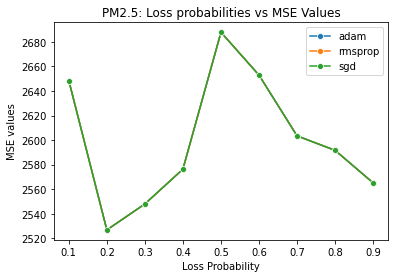

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.lineplot(x = loss_prob, y = np.array(errors_adam['PM2.5'][:])[:,0], markers=True, 
                  marker="o", dashes=False, label = 'adam')
ax = sns.lineplot(x = loss_prob, y = np.array(errors_rmsprop['PM2.5'])[:,0], markers=True, 
                  marker="o", dashes=False, label='rmsprop')
ax = sns.lineplot(x = loss_prob, y = np.array(errors_sgd['PM2.5'])[:,0], markers=True, 
                  marker="o", dashes=False, label='sgd')

# ax.set(xlabel='Loss Probability', ylabel='MSE values')
plt.xlabel("Loss Probability")
plt.ylabel("MSE values")
plt.title("PM2.5: Loss probabilities vs MSE Values") 
plt.show(ax)

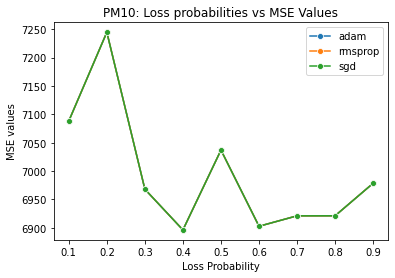

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.lineplot(x = loss_prob, y = np.array(errors_adam['PM10'][:])[:,0], markers=True, 
                  marker="o", dashes=False, label = 'adam')
ax = sns.lineplot(x = loss_prob, y = np.array(errors_rmsprop['PM10'])[:,0], markers=True, 
                  marker="o", dashes=False, label='rmsprop')
ax = sns.lineplot(x = loss_prob, y = np.array(errors_sgd['PM10'])[:,0], markers=True, 
                  marker="o", dashes=False, label='sgd')
# ax.set(xlabel='Loss Probability', ylabel='MSE values')
plt.xlabel("Loss Probability")
plt.ylabel("MSE values")
plt.title("PM10: Loss probabilities vs MSE Values") 
plt.show(ax)

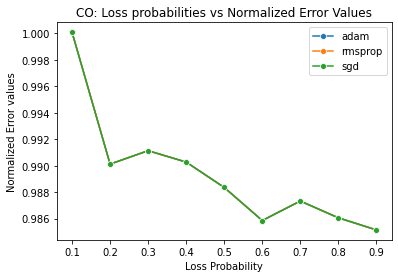

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.lineplot(x = loss_prob, y = np.array(errors_adam['CO'][:])[:,1], markers=True, 
                  marker="o", dashes=False, label = 'adam')
ax = sns.lineplot(x = loss_prob, y = np.array(errors_rmsprop['CO'])[:,1], markers=True, 
                  marker="o", dashes=False, label='rmsprop')
ax = sns.lineplot(x = loss_prob, y = np.array(errors_sgd['CO'])[:,1], markers=True, 
                  marker="o", dashes=False, label='sgd')
# ax.set(xlabel='Loss Probability', ylabel='MSE values')
plt.xlabel("Loss Probability")
plt.ylabel("Normalized Error values")
plt.title("CO: Loss probabilities vs Normalized Error Values") 
plt.show(ax)

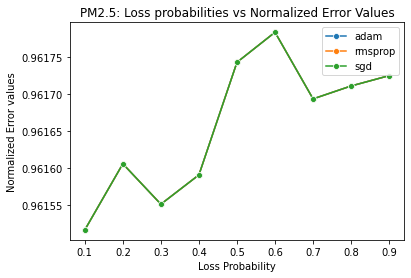

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.lineplot(x = loss_prob, y = np.array(errors_adam['PM2.5'][:])[:,1], markers=True, 
                  marker="o", dashes=False, label = 'adam')
ax = sns.lineplot(x = loss_prob, y = np.array(errors_rmsprop['PM2.5'])[:,1], markers=True, 
                  marker="o", dashes=False, label='rmsprop')
ax = sns.lineplot(x = loss_prob, y = np.array(errors_sgd['PM2.5'])[:,1], markers=True, 
                  marker="o", dashes=False, label='sgd')
# ax.set(xlabel='Loss Probability', ylabel='MSE values')
plt.xlabel("Loss Probability")
plt.ylabel("Normalized Error values")
plt.title("PM2.5: Loss probabilities vs Normalized Error Values") 
plt.show(ax)

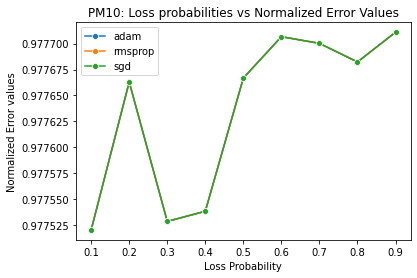

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.lineplot(x = loss_prob, y = np.array(errors_adam['PM10'][:])[:,1], markers=True, 
                  marker="o", dashes=False, label = 'adam')
ax = sns.lineplot(x = loss_prob, y = np.array(errors_rmsprop['PM10'])[:,1], markers=True, 
                  marker="o", dashes=False, label='rmsprop')
ax = sns.lineplot(x = loss_prob, y = np.array(errors_sgd['PM10'])[:,1], markers=True, 
                  marker="o", dashes=False, label='sgd')
# ax.set(xlabel='Loss Probability', ylabel='MSE values')
plt.xlabel("Loss Probability")
plt.ylabel("Normalized Error values")
plt.title("PM10: Loss probabilities vs Normalized Error Values") 
plt.show(ax)

##### traditional model building

In [ ]:
def traditional_ML(loss_p, gas, optimizer):
  # initialize w_0
  model = Sequential()

  # model.add(Dense(64, kernel_initializer='zeros', bias_initializer='zeros', activation=tf.nn.relu, input_dim=6)) # first dense/hidden layer
  model.add(Dense(64, kernel_initializer='he_uniform', bias_initializer="zeros", activation=tf.nn.relu, input_dim=8))
  model.add(Dropout(0.1))

  model.add(Dense(64, kernel_initializer='he_uniform', bias_initializer="zeros", activation=tf.nn.relu)) # second dense/hidden layer
  model.add(Dropout(0.2))

  model.add(Dense(1, kernel_initializer= 'glorot_uniform', activation=tf.nn.softmax)) # output layer

  # initial_weights = model.get_weights() # setting initial weights; should be same for all clients

  # learning_rate = 0.1 # initial learning rate
  # decay_rate = 0.1
  # momentum = 0.8

  # # define the optimizer function
  # sgd = SGD(learning_rate = learning_rate, momentum = momentum, decay = decay_rate, nesterov = False)

  # # define the optimizer function
  # if optimizer == 'sgd':
  #   sgd = SGD(learning_rate = learning_rate, momentum = momentum, decay = decay_rate, nesterov = False)
  #   optimizer = sgd

  # elif optimizer == 'rmsprop':
  #   optimizer = RMSprop(learning_rate=0.00025, epsilon=0.01)

  # compile the model
  model.compile(loss='mse', 
              optimizer=optimizer, 
              metrics=['mse'])

  X, y = dataset[['Latitude', 'Longitude','year', 'month', 'week', 'day', 'hour', 'dayOfWeek']],  dataset[gas]

  x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = loss_p, random_state=1)


  B = 1000 #int(len(x_train) * 0.01) # so for each client the batch size would be different depending upon the total sample size
  E = 25 #max(30, B//10) # number of local epochs; it will also depend on sample size (indirectly)


  model.fit(x_train, y_train, 
                  epochs = E, 
                  batch_size=B,
                  verbose=False)
      
  x_test, y_test = x_test.to_numpy(), y_test.to_numpy()

  # adjusting the dimensions
  x_test = x_test.reshape(x_test.shape[0], 1,  x_test.shape[1])
  y_test = y_test.reshape(y_test.shape[0],1,1)
  y_predicted = model.predict(x_test)
  

  from sklearn.metrics import mean_squared_error
  mse = mean_squared_error(y_predicted.ravel(), y_test.ravel())

  NE = np.sum(abs(np.array(y_test) - np.array(y_predicted))) / np.sum(np.array(y_test))
  return (mse, NE)


# 27th October - Filter
* Feature scaling using Min-Max Scaler
* removing negative values of dependent variable ('CO', 'PM2.5', 'PM10')
* Adding labels to graph
* use of he_uniform for relu activation; glorot_uniform for sigmoid
* Adding 3 Optimizers: SGD, RMSprop, Adam
* Keeping both Mean squared error and NE

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 2 layer with different optimizers and gases

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import initializers
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


import tensorflow as tf
# import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import utils
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Activation
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import SGD # from keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop # instead of from keras.optimizers import RMSprop
# from keras import datasets

# from keras.callbacks import LearningRateScheduler
# from keras.callbacks import History

from tensorflow.keras import losses
from sklearn.utils import shuffle

print(tf.__version__)
print(tf.keras.__version__)

2.6.0
2.6.0


In [ ]:
%%time
# Final plotting
K = 25 # as we have 25 clients

clients = {} # dictionary
clients_cut = {}

## reading the data from each client
for st_code in range(101,126):
    clients[st_code] = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dataNew/station_code"+str(st_code)+".csv", index_col = 0)

    clients[st_code]['Measurement date'] = pd.to_datetime(clients[st_code]['Measurement date'])

    clients[st_code]['year'] = clients[st_code]['Measurement date'].dt.year
    clients[st_code]['month'] = clients[st_code]['Measurement date'].dt.month
    clients[st_code]['week'] = clients[st_code]['Measurement date'].dt.week
    clients[st_code]['day'] = clients[st_code]['Measurement date'].dt.day
    clients[st_code]['hour'] = clients[st_code]['Measurement date'].dt.hour
    clients[st_code]['minute'] = clients[st_code]['Measurement date'].dt.minute # minute is not significant; as only 0 values
    clients[st_code]['dayOfWeek'] = clients[st_code]['Measurement date'].dt.dayofweek

    # choosing features
    clients[st_code] = clients[st_code][['Latitude', 'Longitude','year', 'month', 'week', 'day', 'hour', 'dayOfWeek', 'CO', 	'PM10',	'PM2.5']]

    clients[st_code].drop(clients[st_code][clients[st_code]['CO'] < 0].index, axis=0, inplace=True)
    clients[st_code].drop(clients[st_code][clients[st_code]['PM10'] < 0].index, axis=0, inplace=True)
    clients[st_code].drop(clients[st_code][clients[st_code]['PM2.5'] < 0].index, axis=0, inplace=True)


# complete dataset
frames = list(clients.values())
dataset = pd.concat(frames)
# display(dataset)




### Federared Learning

In [ ]:
# ClientUpdate(k, w): // Run on client k
def Client(client_idx, model, gas):
    # B ← (split P_k into batches of size B) # what is p_K --> each clients' sample size
    B = 1000 #int(len(clients[client_idx]) * 0.01) # so for each client the batch size would be different depending upon the total sample size
    E = 20 #max(30, B//10) # number of local epochs; it will also depend on sample size (indirectly)

    data = clients_cut[client_idx]
    # data = dataset.loc[dataset['Station code'] == client_idx]

    X, y = data[['Latitude', 'Longitude','year', 'month', 'week', 'day', 'hour', 'dayOfWeek']],  data[gas]

    x_train, x_val, y_train, y_val = train_test_split(X, y, test_size = 0.1, random_state=1)

    try:
        model.fit(x_train, y_train, 
                    epochs = E, 
                    batch_size=B,
                    validation_data=(x_val, y_val),
                    verbose=False)
    except Exception as e:
        print(e)
        print("error")

    # return w to server
    # in our case no need for any explicit return; as the model is pass by value
    return data.shape[0] # this will return the number of total sample


In [ ]:
# Server executes: 
def Server(gas, optimizer):
    # initialize w_0
    model = Sequential()
    
    # model.add(Dense(64, kernel_initializer='zeros', bias_initializer='zeros', activation=tf.nn.relu, input_dim=6)) # first dense/hidden layer
    model.add(Dense(64, kernel_initializer='he_uniform', bias_initializer="zeros", activation=tf.nn.relu, input_dim=8))
    model.add(Dropout(0.1))

    model.add(Dense(64, kernel_initializer='he_uniform', bias_initializer="zeros", activation=tf.nn.relu)) # second dense/hidden layer
    model.add(Dropout(0.2))

    model.add(Dense(1, kernel_initializer= 'glorot_uniform', activation=tf.nn.softmax)) # output layer

    # initial_weights = model.get_weights() # setting initial weights; should be same for all clients

    learning_rate = 0.1 # initial learning rate
    decay_rate = 0.1
    momentum = 0.8

    # define the optimizer function
    if optimizer == 'sgd':
      sgd = SGD(learning_rate = learning_rate, momentum = momentum, decay = decay_rate, nesterov = False)
      optimizer = sgd

    elif optimizer == 'rmsprop':
      optimizer = RMSprop(learning_rate=0.00025, epsilon=0.01)

    # compile the model
    model.compile(loss='mse', 
                optimizer=optimizer, 
                metrics=['mse'])
    

# for each round t = 1, 2, . . . do
    for t in range(1, 5):
        C = np.random.random(1)[0] # random number between 0 and 1.

        # m ← max(C  K, 1)
        m = max(int(C*K), 1) # m == random number of client selected
        weight_t_plus_1 = [None] * m # matrix to store the weights of all client in each t-round
        n_k = [None] * m # parameters for weighted sum 


        # S_t ← (random set of m clients)
        # S = {} # dictionary
        S_t = np.random.uniform(low=101, high=126, size=(m)).astype(int)

        # No need for below loop, as server don't need access to client data, server only need clients' number
        # for client in m_clients:
        #   S[client] = clients[client]

        initial_weights = model.get_weights() # setting initial weights; should be same for all clients
        # for t= 1 to T, initial_weights would be t-1th's final weights

        # for each client k ∈ S_t in parallel do
        client_idx = 0
        for client in S_t:
            # w^(k)_(t+1) ← ClientUpdate(k, model)
            n_k[client_idx] = Client(client, model, gas) # pass by reference for model
            weight_t_plus_1[client_idx] = model.get_weights()
            client_idx += 1

            # setting weights back to initial weights
            model.set_weights(initial_weights)

        # finding the weighted sum
        final_weights_t = np.array(weight_t_plus_1[0]) * (n_k[0] / sum(n_k))

        for idx in range(1, m):
          # w_(t+1) ← summation(k=1 to K){(n_k/n) * w^(k)_(t+1)} #n_k - no. of training sample in each client K; n - total training samples;
          final_weights_t += np.array(weight_t_plus_1[idx]) * (n_k[idx]/ sum(n_k))

        # setting the aggregated weights
        model.set_weights(final_weights_t)


#         print(model.get_weights())
    # return error_clients(model, loss_p)) # THIS LINE WON'T BE THERE IN REAL SERVER
    return model

In [ ]:
def error_clients(model, gas):
    
    X, y = test_data[['Latitude', 'Longitude','year', 'month', 'week', 'day', 'hour', 'dayOfWeek']],  test_data[gas]
    
    # adjusting the dimensions
    x_test, y_test = X.to_numpy(), y.to_numpy()
    x_test = x_test.reshape(x_test.shape[0], 1,  x_test.shape[1])
    y_test = y_test.reshape(y_test.shape[0],1,1)

    y_predicted = model.predict(x_test)
    
    from sklearn.metrics import mean_squared_error
    # print("y_predicted", y_predicted)
    # print("y_predicted.ravel()", y_predicted.ravel())
    NE = np.sum(abs(np.array(y_test) - np.array(y_predicted))) / np.sum(np.array(y_test))

    mse = mean_squared_error(y_predicted.ravel(), y_test.ravel())
    
    return (mse,NE)

          

In [ ]:

# create an Empty DataFrame object
train_data = pd.DataFrame()
test_data = pd.DataFrame()
loss_prob = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
models = []
errors = {'CO':{'adam':[], 'rmsprop':[], 'sgd':[]}, 	'PM10':{'adam':[], 'rmsprop':[], 'sgd':[]},	'PM2.5':{'adam':[], 'rmsprop':[], 'sgd':[]}}
gases = ['CO', 	'PM10',	'PM2.5']
optimizers = ['adam', 'rmsprop', 'sgd']

# reading all the clients and building model
for gas in gases:
  for opt in optimizers:
    for lp in loss_prob:
        for st_code in range(101,126):
            # splitting into train test split
            X, y = clients[st_code][['Latitude', 'Longitude','year', 'month', 'week', 'day', 'hour', 'dayOfWeek']],  clients[st_code][gas]
            x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = lp, random_state=0)

            # Normalization using min-max scaler
            # Normalization across instances should be done after splitting the data between training and test set, using only the data from the training set.
            # to avoid data leak
            scaler_cols = x_train.columns
            scaler_idx_train = x_train.index
            scaler_idx_test = x_test.index

            # from sklearn.preprocessing import MinMaxScaler
            scaler = MinMaxScaler()

            # transforming train data
            x_train_encoded_scaled = pd.DataFrame(scaler.fit_transform(x_train), columns = scaler_cols, index=scaler_idx_train)
            # display(x_train_encoded_scaled.head())

            # transforming test data
            x_test_encoded_scaled = pd.DataFrame(scaler.transform(x_test), columns = scaler_cols, index = scaler_idx_test)
            # display(x_test_encoded_scaled.head())

            # training data prep
            clients_cut[st_code] = pd.concat([x_train_encoded_scaled, y_train], axis = 1)

            # testing data prep
            # first appending x_test and y_test column wise
            # then appending each clients' dataframe one below other
            if st_code == 101:
              test_data = pd.concat([x_test_encoded_scaled, y_test], axis = 1)
            else:
              xy = pd.concat([x_test_encoded_scaled, y_test], axis=1)
              test_data = pd.concat([test_data, xy], axis=0)
            # x_test, y_test = x_test.to_numpy(), y_test.to_numpy()
        
        # Training the model using federated learning
        model = Server(gas, opt)

        # testing model
        errors[gas][opt].append(error_clients(model, gas))


### MSE Errors

In [ ]:
errors

{'CO': {'adam': [(0.3564245731877974, 1.000090668681526),
   (0.42024701628892425, 0.990120185426374),
   (0.3971914200999399, 0.9911338711357136),
   (0.4025077755660611, 0.990274791924384),
   (0.3933551158277141, 0.9883547340107193),
   (0.3997140642940638, 0.9858544708762934),
   (0.39451267548059304, 0.9873287955970068),
   (0.3932234624491177, 0.9860573733314842),
   (0.38527309265399856, 0.9851438273418877)],
  'rmsprop': [(0.3564245731877974, 1.000090668681526),
   (0.42024701628892425, 0.990120185426374),
   (0.3971914200999399, 0.9911338711357136),
   (0.4025077755660611, 0.990274791924384),
   (0.3933551158277141, 0.9883547340107193),
   (0.3997140642940638, 0.9858544708762934),
   (0.39451267548059304, 0.9873287955970068),
   (0.3932234624491177, 0.9860573733314842),
   (0.38527309265399856, 0.9851438273418877)],
  'sgd': [(0.3564245731877974, 1.000090668681526),
   (0.42024701628892425, 0.990120185426374),
   (0.3971914200999399, 0.9911338711357136),
   (0.4025077755660611

In [ ]:
np.array(errors['CO']['adam'][:])

array([[0.35642457, 1.00009067],
       [0.42024702, 0.99012019],
       [0.39719142, 0.99113387],
       [0.40250778, 0.99027479],
       [0.39335512, 0.98835473],
       [0.39971406, 0.98585447],
       [0.39451268, 0.9873288 ],
       [0.39322346, 0.98605737],
       [0.38527309, 0.98514383]])

In [ ]:
np.array(errors['CO']['adam'][:])[:,0]

array([0.35642457, 0.42024702, 0.39719142, 0.40250778, 0.39335512,
       0.39971406, 0.39451268, 0.39322346, 0.38527309])

### MSE error; 
* Optimizers: ['adam', 'rmsprop', 'sgd']; 
* gases: ['CO', 'PM2.5', 'PM10']

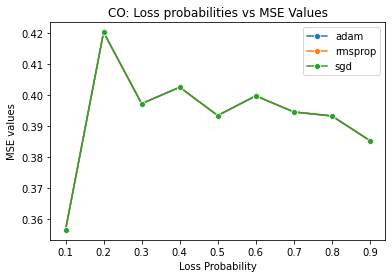

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.lineplot(x = loss_prob, y = np.array(errors['CO']['adam'][:])[:,0], markers=True, 
                  marker="o", dashes=False, label = 'adam')
ax = sns.lineplot(x = loss_prob, y = np.array(errors['CO']['rmsprop'])[:,0], markers=True, 
                  marker="o", dashes=False, label='rmsprop')
ax = sns.lineplot(x = loss_prob, y = np.array(errors['CO']['sgd'])[:,0], markers=True, 
                  marker="o", dashes=False, label='sgd')
# ax.set(xlabel='Loss Probability', ylabel='MSE values')
plt.xlabel("Loss Probability")
plt.ylabel("MSE values")
plt.title("CO: Loss probabilities vs MSE Values") 
plt.show(ax)

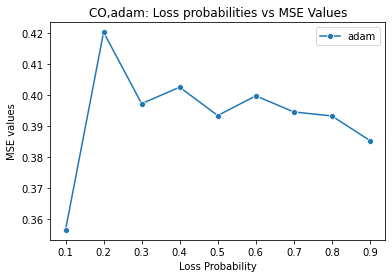

In [ ]:
ax = sns.lineplot(x = loss_prob, y = np.array(errors['CO']['adam'][:])[:,0], markers=True, 
                  marker="o", dashes=False, label = 'adam')

# ax.set(xlabel='Loss Probability', ylabel='MSE values')
plt.xlabel("Loss Probability")
plt.ylabel("MSE values")
plt.title("CO,adam: Loss probabilities vs MSE Values") 
plt.show(ax)

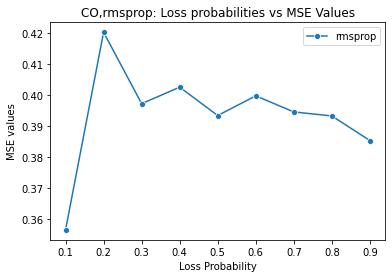

In [ ]:
ax = sns.lineplot(x = loss_prob, y = np.array(errors['CO']['rmsprop'])[:,0], markers=True, 
                  marker="o", dashes=False, label='rmsprop')
plt.xlabel("Loss Probability")
plt.ylabel("MSE values")
plt.title("CO,rmsprop: Loss probabilities vs MSE Values") 
plt.show(ax)

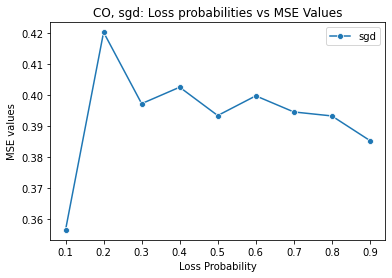

In [ ]:
ax = sns.lineplot(x = loss_prob, y = np.array(errors['CO']['sgd'])[:,0], markers=True, 
                  marker="o", dashes=False, label='sgd')
# ax.set(xlabel='Loss Probability', ylabel='MSE values')
plt.xlabel("Loss Probability")
plt.ylabel("MSE values")
plt.title("CO, sgd: Loss probabilities vs MSE Values") 
plt.show(ax)

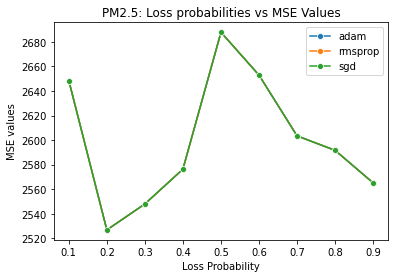

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.lineplot(x = loss_prob, y = np.array(errors['PM2.5']['adam'][:])[:,0], markers=True, marker="o", dashes=False, label = 'adam')
ax = sns.lineplot(x = loss_prob, y = np.array(errors['PM2.5']['rmsprop'][:])[:,0], markers=True, marker="o", dashes=False, label = 'rmsprop')
ax = sns.lineplot(x = loss_prob, y = np.array(errors['PM2.5']['sgd'][:])[:,0], markers=True, marker="o", dashes=False, label = 'sgd')

# ax.set(xlabel='Loss Probability', ylabel='MSE values')
plt.xlabel("Loss Probability")
plt.ylabel("MSE values")
plt.title("PM2.5: Loss probabilities vs MSE Values") 
plt.show(ax)

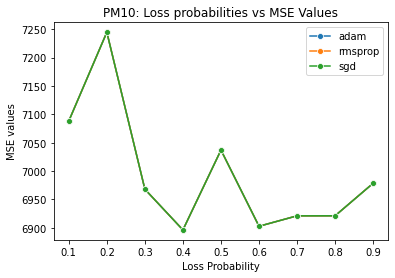

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


ax = sns.lineplot(x = loss_prob, y = np.array(errors['PM10']['adam'][:])[:,0], markers=True, marker="o", dashes=False, label = 'adam')
ax = sns.lineplot(x = loss_prob, y = np.array(errors['PM10']['rmsprop'][:])[:,0], markers=True, marker="o", dashes=False, label = 'rmsprop')
ax = sns.lineplot(x = loss_prob, y = np.array(errors['PM10']['sgd'][:])[:,0], markers=True, marker="o", dashes=False, label = 'sgd')
# ax.set(xlabel='Loss Probability', ylabel='MSE values')
plt.xlabel("Loss Probability")
plt.ylabel("MSE values")
plt.title("PM10: Loss probabilities vs MSE Values") 
plt.show(ax)

### Normalized Error error; 
* Optimizers: ['adam', 'rmsprop', 'sgd']; 
* gases: ['CO', 'PM2.5', 'PM10']

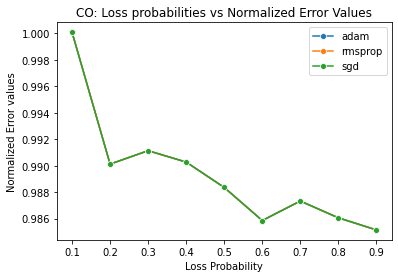

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.lineplot(x = loss_prob, y = np.array(errors['CO']['adam'][:])[:,1], markers=True, marker="o", dashes=False, label = 'adam')
ax = sns.lineplot(x = loss_prob, y = np.array(errors['CO']['rmsprop'][:])[:,1], markers=True, marker="o", dashes=False, label = 'rmsprop')
ax = sns.lineplot(x = loss_prob, y = np.array(errors['CO']['sgd'][:])[:,1], markers=True, marker="o", dashes=False, label = 'sgd')
# ax.set(xlabel='Loss Probability', ylabel='MSE values')
plt.xlabel("Loss Probability")
plt.ylabel("Normalized Error values")
plt.title("CO: Loss probabilities vs Normalized Error Values") 
plt.show(ax)

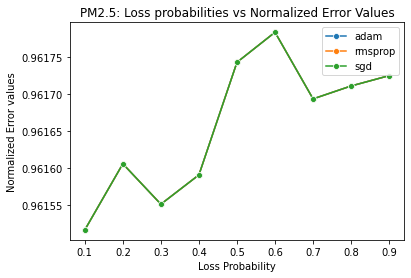

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.lineplot(x = loss_prob, y = np.array(errors['PM2.5']['adam'][:])[:,1], markers=True, marker="o", dashes=False, label = 'adam')
ax = sns.lineplot(x = loss_prob, y = np.array(errors['PM2.5']['rmsprop'][:])[:,1], markers=True, marker="o", dashes=False, label = 'rmsprop')
ax = sns.lineplot(x = loss_prob, y = np.array(errors['PM2.5']['sgd'][:])[:,1], markers=True, marker="o", dashes=False, label = 'sgd')
# ax.set(xlabel='Loss Probability', ylabel='MSE values')
plt.xlabel("Loss Probability")
plt.ylabel("Normalized Error values")
plt.title("PM2.5: Loss probabilities vs Normalized Error Values") 
plt.show(ax)

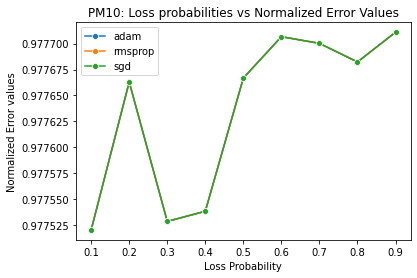

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.lineplot(x = loss_prob, y = np.array(errors['PM10']['adam'][:])[:,1], markers=True, marker="o", dashes=False, label = 'adam')
ax = sns.lineplot(x = loss_prob, y = np.array(errors['PM10']['rmsprop'][:])[:,1], markers=True, marker="o", dashes=False, label = 'rmsprop')
ax = sns.lineplot(x = loss_prob, y = np.array(errors['PM10']['sgd'][:])[:,1], markers=True, marker="o", dashes=False, label = 'sgd')
# ax.set(xlabel='Loss Probability', ylabel='MSE values')
plt.xlabel("Loss Probability")
plt.ylabel("Normalized Error values")
plt.title("PM10: Loss probabilities vs Normalized Error Values") 
plt.show(ax)

### traditional model building

In [ ]:
def traditional_ML(loss_p, gas, optimizer):
  # initialize w_0
  model = Sequential()

  # model.add(Dense(64, kernel_initializer='zeros', bias_initializer='zeros', activation=tf.nn.relu, input_dim=6)) # first dense/hidden layer
  model.add(Dense(64, kernel_initializer='he_uniform', bias_initializer="zeros", activation=tf.nn.relu, input_dim=8))
  model.add(Dropout(0.1))

  model.add(Dense(64, kernel_initializer='he_uniform', bias_initializer="zeros", activation=tf.nn.relu)) # second dense/hidden layer
  model.add(Dropout(0.2))

  model.add(Dense(1, kernel_initializer= 'glorot_uniform', activation=tf.nn.softmax)) # output layer

  # initial_weights = model.get_weights() # setting initial weights; should be same for all clients

  learning_rate = 0.1 # initial learning rate
  decay_rate = 0.1
  momentum = 0.8

  # define the optimizer function
  sgd = SGD(learning_rate = learning_rate, momentum = momentum, decay = decay_rate, nesterov = False)

  # define the optimizer function
  if optimizer == 'sgd':
    sgd = SGD(learning_rate = learning_rate, momentum = momentum, decay = decay_rate, nesterov = False)
    optimizer = sgd

  elif optimizer == 'rmsprop':
    optimizer = RMSprop(learning_rate=0.00025, epsilon=0.01)

  # compile the model
  model.compile(loss='mse', 
              optimizer=optimizer, 
              metrics=['mse'])

  X, y = dataset[['Latitude', 'Longitude','year', 'month', 'week', 'day', 'hour', 'dayOfWeek']],  dataset[gas]

  x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = loss_p, random_state=1)


  B = 1000 #int(len(x_train) * 0.01) # so for each client the batch size would be different depending upon the total sample size
  E = 25 #max(30, B//10) # number of local epochs; it will also depend on sample size (indirectly)


  model.fit(x_train, y_train, 
                  epochs = E, 
                  batch_size=B,
                  verbose=False)
      
  x_test, y_test = x_test.to_numpy(), y_test.to_numpy()

  # adjusting the dimensions
  x_test = x_test.reshape(x_test.shape[0], 1,  x_test.shape[1])
  y_test = y_test.reshape(y_test.shape[0],1,1)
  y_predicted = model.predict(x_test)
  

  from sklearn.metrics import mean_squared_error
  mse = mean_squared_error(y_predicted.ravel(), y_test.ravel())

  NE = np.sum(abs(np.array(y_test) - np.array(y_predicted))) / np.sum(np.array(y_test))
  return (mse, NE)


In [ ]:

# Final plotting
K = 25 # as we have 25 clients

loss_prob = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
gases = ['CO', 	'PM10',	'PM2.5']
errors_tl = {'CO':{'adam':[], 'rmsprop':[], 'sgd':[]}, 	'PM10':{'adam':[], 'rmsprop':[], 'sgd':[]},	'PM2.5':{'adam':[], 'rmsprop':[], 'sgd':[]}}
optimizers = ['adam', 'rmsprop', 'sgd']


for gas in gases:
  for opt in optimizers:
    for loss_p in loss_prob:
      error = traditional_ML(loss_p, gas, opt)
      errors_tl[gas][opt].append(error)


### MSE Errors

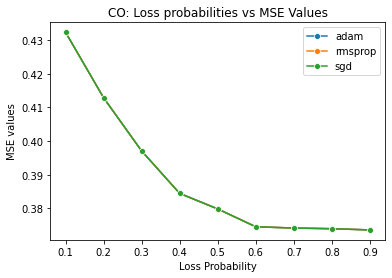

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# sns.lineplot(x = loss_prob, y = errors_tl, markers=True, dashes=False)
ax = sns.lineplot(x = loss_prob, y = np.array(errors_tl['CO']['adam'][:])[:,0], markers=True, marker="o", dashes=False, label = 'adam')
ax = sns.lineplot(x = loss_prob, y = np.array(errors_tl['CO']['rmsprop'][:])[:,0], markers=True, marker="o", dashes=False, label = 'rmsprop')
ax = sns.lineplot(x = loss_prob, y = np.array(errors_tl['CO']['sgd'][:])[:,0], markers=True, marker="o", dashes=False, label = 'sgd')
# ax.set(xlabel='Loss Probability', ylabel='MSE values')
plt.xlabel("Loss Probability")
plt.ylabel("MSE values")
plt.title("CO: Loss probabilities vs MSE Values") 
plt.show(ax)


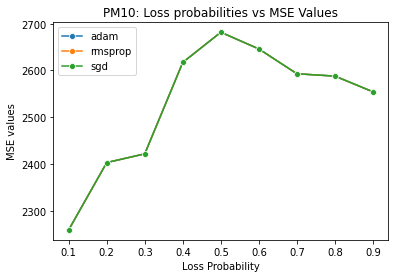

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# sns.lineplot(x = loss_prob, y = errors_tl, markers=True, dashes=False)
ax = sns.lineplot(x = loss_prob, y = np.array(errors_tl['PM2.5']['adam'][:])[:,0], markers=True, marker="o", dashes=False, label = 'adam')
ax = sns.lineplot(x = loss_prob, y = np.array(errors_tl['PM2.5']['rmsprop'][:])[:,0], markers=True, marker="o", dashes=False, label = 'rmsprop')
ax = sns.lineplot(x = loss_prob, y = np.array(errors_tl['PM2.5']['sgd'][:])[:,0], markers=True, marker="o", dashes=False, label = 'sgd')
# ax.set(xlabel='Loss Probability', ylabel='MSE values')
plt.xlabel("Loss Probability")
plt.ylabel("MSE values")
plt.title("PM10: Loss probabilities vs MSE Values") 
plt.show(ax)


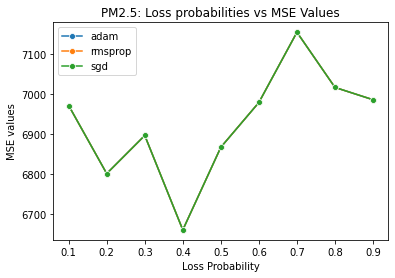

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# sns.lineplot(x = loss_prob, y = errors_tl, markers=True, dashes=False)
ax = sns.lineplot(x = loss_prob, y = np.array(errors_tl['PM10']['adam'][:])[:,0], markers=True, marker="o", dashes=False, label = 'adam')
ax = sns.lineplot(x = loss_prob, y = np.array(errors_tl['PM10']['rmsprop'][:])[:,0], markers=True, marker="o", dashes=False, label = 'rmsprop')
ax = sns.lineplot(x = loss_prob, y = np.array(errors_tl['PM10']['sgd'][:])[:,0], markers=True, marker="o", dashes=False, label = 'sgd')
# ax.set(xlabel='Loss Probability', ylabel='MSE values')
plt.xlabel("Loss Probability")
plt.ylabel("MSE values")
plt.title("PM2.5: Loss probabilities vs MSE Values") 
plt.show(ax)


### NE Error

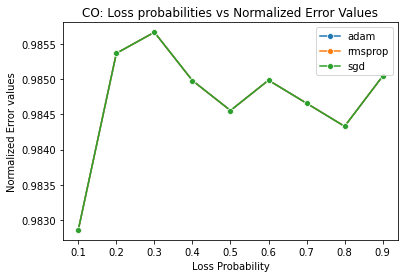

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# sns.lineplot(x = loss_prob, y = errors_tl, markers=True, dashes=False)
ax = sns.lineplot(x = loss_prob, y = np.array(errors_tl['CO']['adam'][:])[:,1], markers=True, marker="o", dashes=False, label = 'adam')
ax = sns.lineplot(x = loss_prob, y = np.array(errors_tl['CO']['rmsprop'][:])[:,1], markers=True, marker="o", dashes=False, label = 'rmsprop')
ax = sns.lineplot(x = loss_prob, y = np.array(errors_tl['CO']['sgd'][:])[:,1], markers=True, marker="o", dashes=False, label = 'sgd')
# ax.set(xlabel='Loss Probability', ylabel='MSE values')
plt.xlabel("Loss Probability")
plt.ylabel("Normalized Error values")
plt.title("CO: Loss probabilities vs Normalized Error Values") 
plt.show(ax)


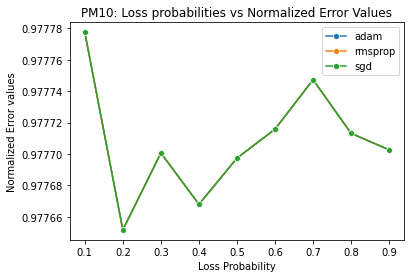

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# sns.lineplot(x = loss_prob, y = errors_tl, markers=True, dashes=False)
ax = sns.lineplot(x = loss_prob, y = np.array(errors_tl['PM10']['adam'][:])[:,1], markers=True, marker="o", dashes=False, label = 'adam')
ax = sns.lineplot(x = loss_prob, y = np.array(errors_tl['PM10']['rmsprop'][:])[:,1], markers=True, marker="o", dashes=False, label = 'rmsprop')
ax = sns.lineplot(x = loss_prob, y = np.array(errors_tl['PM10']['sgd'][:])[:,1], markers=True, marker="o", dashes=False, label = 'sgd')
# ax.set(xlabel='Loss Probability', ylabel='MSE values')
plt.xlabel("Loss Probability")
plt.ylabel("Normalized Error values")
plt.title("PM10: Loss probabilities vs Normalized Error Values") 
plt.show(ax)


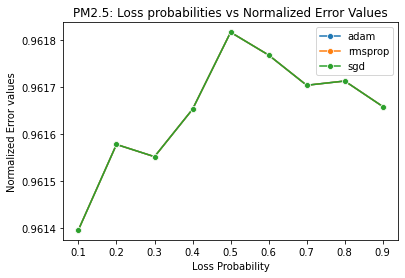

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# sns.lineplot(x = loss_prob, y = errors_tl, markers=True, dashes=False)
ax = sns.lineplot(x = loss_prob, y = np.array(errors_tl['PM2.5']['adam'][:])[:,1], markers=True, marker="o", dashes=False, label = 'adam')
ax = sns.lineplot(x = loss_prob, y = np.array(errors_tl['PM2.5']['rmsprop'][:])[:,1], markers=True, marker="o", dashes=False, label = 'rmsprop')
ax = sns.lineplot(x = loss_prob, y = np.array(errors_tl['PM2.5']['sgd'][:])[:,1], markers=True, marker="o", dashes=False, label = 'sgd')
# ax.set(xlabel='Loss Probability', ylabel='MSE values')
plt.xlabel("Loss Probability")
plt.ylabel("Normalized Error values")
plt.title("PM2.5: Loss probabilities vs Normalized Error Values") 
plt.show(ax)


### chaniging the range of y_axis

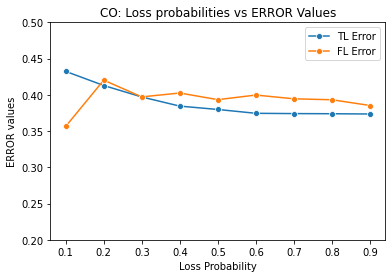

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# sns.lineplot(x = loss_prob, y = errors_tl, markers=True, dashes=False)
ax = sns.lineplot(x = loss_prob, y = np.array(errors_tl['CO']['adam'][:])[:,0], markers=True, 
                  marker="o", dashes=False, label = 'TL Error')

ax = sns.lineplot(x = loss_prob, y = np.array(errors['CO']['adam'][:])[:,0], markers=True, 
                  marker="o", dashes=False, label = 'FL Error')

ax.set(ylim=(0.2, 0.5))

plt.legend()
plt.xlabel("Loss Probability")
plt.ylabel("ERROR values")
plt.title("CO: Loss probabilities vs ERROR Values") 
plt.show(ax)

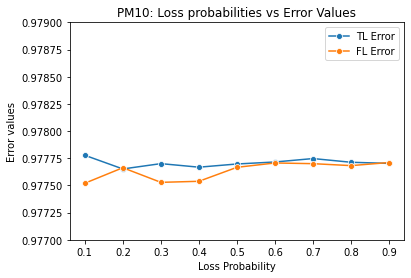

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# sns.lineplot(x = loss_prob, y = errors_tl, markers=True, dashes=False)
ax = sns.lineplot(x = loss_prob, y = np.array(errors_tl['PM10']['adam'][:])[:,1], markers=True, 
                  marker="o", dashes=False, label = 'TL Error')

ax = sns.lineplot(x = loss_prob, y = np.array(errors['PM10']['adam'][:])[:,1], markers=True, 
                  marker="o", dashes=False, label = 'FL Error')

ax.set(ylim=(0.977, 0.979))
# ax.set(xlabel='Loss Probability', ylabel='MSE values')
plt.legend()
plt.xlabel("Loss Probability")
plt.ylabel("Error values")
plt.title("PM10: Loss probabilities vs Error Values") 
plt.show(ax)

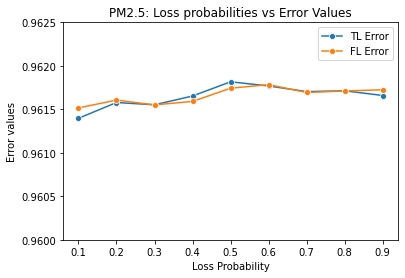

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# sns.lineplot(x = loss_prob, y = errors_tl, markers=True, dashes=False)
ax = sns.lineplot(x = loss_prob, y = np.array(errors_tl['PM2.5']['adam'][:])[:,1], markers=True, 
                  marker="o", dashes=False, label = 'TL Error')

ax = sns.lineplot(x = loss_prob, y = np.array(errors['PM2.5']['adam'][:])[:,1], markers=True, 
                  marker="o", dashes=False, label = 'FL Error')

ax.set(ylim=(0.96, 0.9625))
# ax.set(xlabel='Loss Probability', ylabel='MSE values')
plt.legend()
plt.xlabel("Loss Probability")
plt.ylabel("Error values")
plt.title("PM2.5: Loss probabilities vs Error Values") 
plt.show(ax)

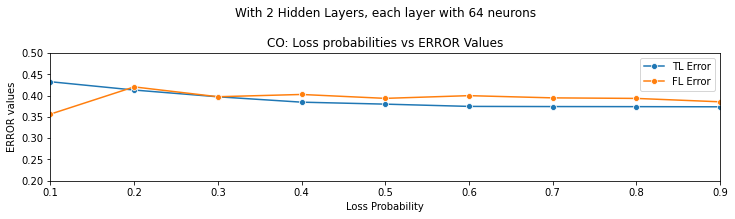

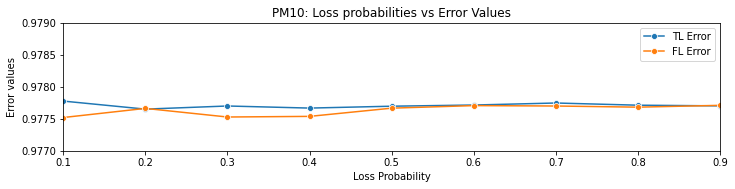

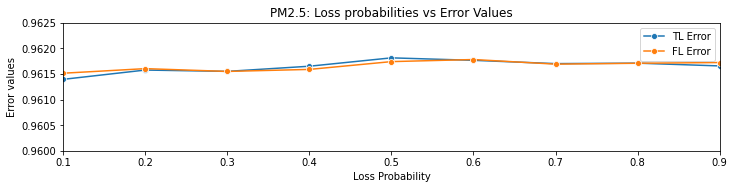

In [ ]:
plt.figure(figsize=(12, 8))
plt.title("With 2 Hidden Layers, each layer with 64 neurons")

plt.subplot(3,1,1)
ax = sns.lineplot(x = loss_prob, y = np.array(errors_tl['CO']['adam'][:])[:,0], markers=True, 
                  marker="o", dashes=False, label = 'TL Error')

ax = sns.lineplot(x = loss_prob, y = np.array(errors['CO']['adam'][:])[:,0], markers=True, 
                  marker="o", dashes=False, label = 'FL Error')

ax.set(ylim=(0.2, 0.5))
ax.set(xlim=(0.1, 0.9))
plt.legend()
plt.xlabel("Loss Probability")
plt.ylabel("ERROR values")
plt.title("With 2 Hidden Layers, each layer with 64 neurons\n\nCO: Loss probabilities vs ERROR Values") 
plt.show(ax)


plt.figure(figsize=(25.9, 8))
plt.subplot(3,2,1)
ax = sns.lineplot(x = loss_prob, y = np.array(errors_tl['PM10']['adam'][:])[:,1], markers=True, 
                  marker="o", dashes=False, label = 'TL Error')

ax = sns.lineplot(x = loss_prob, y = np.array(errors['PM10']['adam'][:])[:,1], markers=True, 
                  marker="o", dashes=False, label = 'FL Error')

ax.set(ylim=(0.977, 0.979))
ax.set(xlim=(0.1, 0.9))
# ax.set(xlabel='Loss Probability', ylabel='MSE values')
plt.legend()
plt.xlabel("Loss Probability")
plt.ylabel("Error values")
plt.title("PM10: Loss probabilities vs Error Values") 
plt.show(ax)


plt.figure(figsize=(40, 8))
plt.subplot(3,3,1)
import seaborn as sns
import matplotlib.pyplot as plt

# sns.lineplot(x = loss_prob, y = errors_tl, markers=True, dashes=False)
ax = sns.lineplot(x = loss_prob, y = np.array(errors_tl['PM2.5']['adam'][:])[:,1], markers=True, 
                  marker="o", dashes=False, label = 'TL Error')

ax = sns.lineplot(x = loss_prob, y = np.array(errors['PM2.5']['adam'][:])[:,1], markers=True, 
                  marker="o", dashes=False, label = 'FL Error')

ax.set(ylim=(0.96, 0.9625))
ax.set(xlim=(0.1, 0.9))
# ax.set(xlabel='Loss Probability', ylabel='MSE values')
plt.legend()
plt.xlabel("Loss Probability")
plt.ylabel("Error values")
plt.title("PM2.5: Loss probabilities vs Error Values") 
plt.show(ax)

##### Mixed line graph

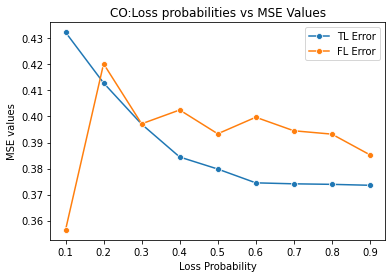

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# sns.lineplot(x = loss_prob, y = errors_tl, markers=True, dashes=False)
ax = sns.lineplot(x = loss_prob, y = np.array(errors_tl['CO']['adam'][:])[:,0], markers=True, 
                  marker="o", dashes=False, label = 'TL Error')

ax = sns.lineplot(x = loss_prob, y = np.array(errors['CO']['adam'][:])[:,0], markers=True, 
                  marker="o", dashes=False, label = 'FL Error')

# ax.set(xlabel='Loss Probability', ylabel='MSE values')
plt.legend()
plt.xlabel("Loss Probability")
plt.ylabel("MSE values")
plt.title("CO:Loss probabilities vs MSE Values") 
plt.show(ax)

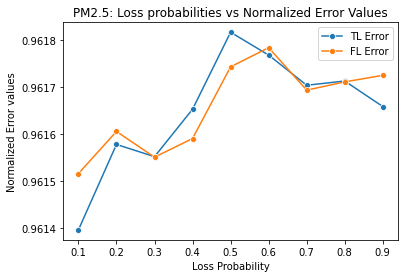

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# sns.lineplot(x = loss_prob, y = errors_tl, markers=True, dashes=False)
ax = sns.lineplot(x = loss_prob, y = np.array(errors_tl['PM2.5']['adam'][:])[:,1], markers=True, 
                  marker="o", dashes=False, label = 'TL Error')

ax = sns.lineplot(x = loss_prob, y = np.array(errors['PM2.5']['adam'][:])[:,1], markers=True, 
                  marker="o", dashes=False, label = 'FL Error')

# ax.set(xlabel='Loss Probability', ylabel='MSE values')
plt.legend()
plt.xlabel("Loss Probability")
plt.ylabel("Normalized Error values")
plt.title("PM2.5: Loss probabilities vs Normalized Error Values") 
plt.show(ax)

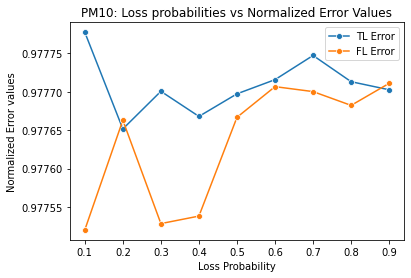

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# sns.lineplot(x = loss_prob, y = errors_tl, markers=True, dashes=False)
ax = sns.lineplot(x = loss_prob, y = np.array(errors_tl['PM10']['adam'][:])[:,1], markers=True, 
                  marker="o", dashes=False, label = 'TL Error')

ax = sns.lineplot(x = loss_prob, y = np.array(errors['PM10']['adam'][:])[:,1], markers=True, 
                  marker="o", dashes=False, label = 'FL Error')

# ax.set(xlabel='Loss Probability', ylabel='MSE values')
plt.legend()
plt.xlabel("Loss Probability")
plt.ylabel("Normalized Error values")
plt.title("PM10: Loss probabilities vs Normalized Error Values") 
plt.show(ax)

# 27th - Part: C
* Using different number of layers

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

### Libraries

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import initializers
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


import tensorflow as tf
# import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import utils
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Activation
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import SGD # from keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop # instead of from keras.optimizers import RMSprop
# from keras import datasets

# from keras.callbacks import LearningRateScheduler
# from keras.callbacks import History

from tensorflow.keras import losses
from sklearn.utils import shuffle

print(tf.__version__)
print(tf.keras.__version__)

### taking input

In [ ]:
%%time
# Final plotting
K = 25 # as we have 25 clients

clients = {} # dictionary
clients_cut = {}

## reading the data from each client
for st_code in range(101,126):
    clients[st_code] = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dataNew/station_code"+str(st_code)+".csv", index_col = 0)

    clients[st_code]['Measurement date'] = pd.to_datetime(clients[st_code]['Measurement date'])

    clients[st_code]['year'] = clients[st_code]['Measurement date'].dt.year
    clients[st_code]['month'] = clients[st_code]['Measurement date'].dt.month
    clients[st_code]['week'] = clients[st_code]['Measurement date'].dt.week
    clients[st_code]['day'] = clients[st_code]['Measurement date'].dt.day
    clients[st_code]['hour'] = clients[st_code]['Measurement date'].dt.hour
    clients[st_code]['minute'] = clients[st_code]['Measurement date'].dt.minute # minute is not significant; as only 0 values
    clients[st_code]['dayOfWeek'] = clients[st_code]['Measurement date'].dt.dayofweek

    # choosing features
    clients[st_code] = clients[st_code][['Latitude', 'Longitude','year', 'month', 'week', 'day', 'hour', 'dayOfWeek', 'CO', 	'PM10',	'PM2.5']]

    clients[st_code].drop(clients[st_code][clients[st_code]['CO'] < 0].index, axis=0, inplace=True)
    clients[st_code].drop(clients[st_code][clients[st_code]['PM10'] < 0].index, axis=0, inplace=True)
    clients[st_code].drop(clients[st_code][clients[st_code]['PM2.5'] < 0].index, axis=0, inplace=True)


# complete dataset
frames = list(clients.values())
dataset = pd.concat(frames)
# display(dataset)




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: Fut

CPU times: user 2.65 s, sys: 77.3 ms, total: 2.73 s
Wall time: 2.85 s


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  from ipykernel import kernelapp as app


## 1 hidden layer

### traditional Learning

In [ ]:
def traditional_ML(loss_p, gas):
  # initialize w_0
  model = Sequential()

  # model.add(Dense(64, kernel_initializer='zeros', bias_initializer='zeros', activation=tf.nn.relu, input_dim=6)) # first dense/hidden layer
  model.add(Dense(64, kernel_initializer='he_uniform', bias_initializer="zeros", activation=tf.nn.relu, input_dim=8))
  model.add(Dropout(0.1))

  model.add(Dense(1, kernel_initializer= 'glorot_uniform', activation=tf.nn.softmax)) # output layer


  # compile the model
  model.compile(loss='mse', 
              optimizer='adam', 
              metrics=['mse'])

  X, y = dataset[['Latitude', 'Longitude','year', 'month', 'week', 'day', 'hour', 'dayOfWeek']],  dataset[gas]

  x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = loss_p, random_state=1)


  B = 1000 #int(len(x_train) * 0.01) # so for each client the batch size would be different depending upon the total sample size
  E = 25 #max(30, B//10) # number of local epochs; it will also depend on sample size (indirectly)


  model.fit(x_train, y_train, 
                  epochs = E, 
                  batch_size=B,
                  verbose=False)
      
  x_test, y_test = x_test.to_numpy(), y_test.to_numpy()

  # adjusting the dimensions
  x_test = x_test.reshape(x_test.shape[0], 1,  x_test.shape[1])
  y_test = y_test.reshape(y_test.shape[0],1,1)
  y_predicted = model.predict(x_test)
  

  from sklearn.metrics import mean_squared_error
  mse = mean_squared_error(y_predicted.ravel(), y_test.ravel())

  NE = np.sum(abs(np.array(y_test) - np.array(y_predicted))) / np.sum(np.array(y_test))
  return (mse, NE)


In [ ]:

# Final plotting
K = 25 # as we have 25 clients

loss_prob = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
gases = ['CO', 	'PM10',	'PM2.5']
errors_tl_h1 = {'CO':[], 	'PM10':[],	'PM2.5':[]}


for gas in gases:
  for loss_p in loss_prob:
    error = traditional_ML(loss_p, gas)
    errors_tl_h1[gas].append(error)


### Federated Learning

In [ ]:
# ClientUpdate(k, w): // Run on client k
def Client(client_idx, model, gas):
    # B ← (split P_k into batches of size B) # what is p_K --> each clients' sample size
    B = 1000 #int(len(clients[client_idx]) * 0.01) # so for each client the batch size would be different depending upon the total sample size
    E = 20 #max(30, B//10) # number of local epochs; it will also depend on sample size (indirectly)

    data = clients_cut[client_idx]
    # data = dataset.loc[dataset['Station code'] == client_idx]

    X, y = data[['Latitude', 'Longitude','year', 'month', 'week', 'day', 'hour', 'dayOfWeek']],  data[gas]

    x_train, x_val, y_train, y_val = train_test_split(X, y, test_size = 0.1, random_state=1)

    try:
        model.fit(x_train, y_train, 
                    epochs = E, 
                    batch_size=B,
                    validation_data=(x_val, y_val),
                    verbose=False)
    except Exception as e:
        print(e)
        print("error")

    # return w to server
    # in our case no need for any explicit return; as the model is pass by value
    return data.shape[0] # this will return the number of total sample


In [ ]:
# Server executes: 
def Server(gas):
    # initialize w_0
    model = Sequential()
    
    # model.add(Dense(64, kernel_initializer='zeros', bias_initializer='zeros', activation=tf.nn.relu, input_dim=6)) # first dense/hidden layer
    model.add(Dense(64, kernel_initializer='he_uniform', bias_initializer="zeros", activation=tf.nn.relu, input_dim=8))
    model.add(Dropout(0.1))

    model.add(Dense(1, kernel_initializer= 'glorot_uniform', activation=tf.nn.softmax)) # output layer


    # compile the model
    model.compile(loss='mse', 
                optimizer='adam', 
                metrics=['mse'])
    

# for each round t = 1, 2, . . . do
    for t in range(1, 5):
        C = np.random.random(1)[0] # random number between 0 and 1.

        # m ← max(C  K, 1)
        m = max(int(C*K), 1) # m == random number of client selected
        weight_t_plus_1 = [None] * m # matrix to store the weights of all client in each t-round
        n_k = [None] * m # parameters for weighted sum 


        # S_t ← (random set of m clients)
        # S = {} # dictionary
        S_t = np.random.uniform(low=101, high=126, size=(m)).astype(int)

        # No need for below loop, as server don't need access to client data, server only need clients' number
        # for client in m_clients:
        #   S[client] = clients[client]

        initial_weights = model.get_weights() # setting initial weights; should be same for all clients
        # for t= 1 to T, initial_weights would be t-1th's final weights

        # for each client k ∈ S_t in parallel do
        client_idx = 0
        for client in S_t:
            # w^(k)_(t+1) ← ClientUpdate(k, model)
            n_k[client_idx] = Client(client, model, gas) # pass by reference for model
            weight_t_plus_1[client_idx] = model.get_weights()
            client_idx += 1

            # setting weights back to initial weights
            model.set_weights(initial_weights)

        # finding the weighted sum
        final_weights_t = np.array(weight_t_plus_1[0]) * (n_k[0] / sum(n_k))

        for idx in range(1, m):
          # w_(t+1) ← summation(k=1 to K){(n_k/n) * w^(k)_(t+1)} #n_k - no. of training sample in each client K; n - total training samples;
          final_weights_t += np.array(weight_t_plus_1[idx]) * (n_k[idx]/ sum(n_k))

        # setting the aggregated weights
        model.set_weights(final_weights_t)


#         print(model.get_weights())
    # return error_clients(model, loss_p)) # THIS LINE WON'T BE THERE IN REAL SERVER
    return model

In [ ]:
def error_clients(model, gas):
    
    X, y = test_data[['Latitude', 'Longitude','year', 'month', 'week', 'day', 'hour', 'dayOfWeek']],  test_data[gas]
    
    # adjusting the dimensions
    x_test, y_test = X.to_numpy(), y.to_numpy()
    x_test = x_test.reshape(x_test.shape[0], 1,  x_test.shape[1])
    y_test = y_test.reshape(y_test.shape[0],1,1)

    y_predicted = model.predict(x_test)
    
    from sklearn.metrics import mean_squared_error
    # print("y_predicted", y_predicted)
    # print("y_predicted.ravel()", y_predicted.ravel())
    NE = np.sum(abs(np.array(y_test) - np.array(y_predicted))) / np.sum(np.array(y_test))

    mse = mean_squared_error(y_predicted.ravel(), y_test.ravel())
    
    return (mse,NE)

          

In [ ]:

# create an Empty DataFrame object
train_data = pd.DataFrame()
test_data = pd.DataFrame()
loss_prob = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
models = []
errors_fl_h1 = {'CO':[], 	'PM10':[],	'PM2.5':[]}
gases = ['CO', 	'PM10',	'PM2.5']

# reading all the clients and building model
for gas in gases:
  for lp in loss_prob:
      for st_code in range(101,126):
          # splitting into train test split
          X, y = clients[st_code][['Latitude', 'Longitude','year', 'month', 'week', 'day', 'hour', 'dayOfWeek']],  clients[st_code][gas]
          x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = lp, random_state=0)

          # Normalization using min-max scaler
          # Normalization across instances should be done after splitting the data between training and test set, using only the data from the training set.
          # to avoid data leak
          scaler_cols = x_train.columns
          scaler_idx_train = x_train.index
          scaler_idx_test = x_test.index

          # from sklearn.preprocessing import MinMaxScaler
          scaler = MinMaxScaler()

          # transforming train data
          x_train_encoded_scaled = pd.DataFrame(scaler.fit_transform(x_train), columns = scaler_cols, index=scaler_idx_train)
          # display(x_train_encoded_scaled.head())

          # transforming test data
          x_test_encoded_scaled = pd.DataFrame(scaler.transform(x_test), columns = scaler_cols, index = scaler_idx_test)
          # display(x_test_encoded_scaled.head())

          # training data prep
          clients_cut[st_code] = pd.concat([x_train_encoded_scaled, y_train], axis = 1)

          # testing data prep
          # first appending x_test and y_test column wise
          # then appending each clients' dataframe one below other
          if st_code == 101:
            test_data = pd.concat([x_test_encoded_scaled, y_test], axis = 1)
          else:
            xy = pd.concat([x_test_encoded_scaled, y_test], axis=1)
            test_data = pd.concat([test_data, xy], axis=0)
          # x_test, y_test = x_test.to_numpy(), y_test.to_numpy()
      
      # Training the model using federated learning
      model = Server(gas)

      # testing model
      errors_fl_h1[gas].append(error_clients(model, gas))


### Plots

#### Original plots

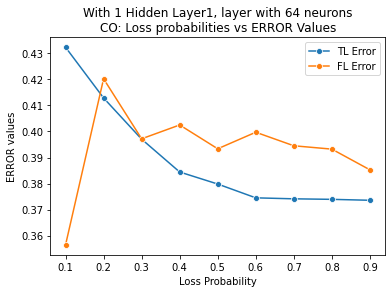

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# sns.lineplot(x = loss_prob, y = errors_tl, markers=True, dashes=False)
ax = sns.lineplot(x = loss_prob, y = np.array(errors_tl_h1['CO'])[:,0], markers=True, 
                  marker="o", dashes=False, label = 'TL Error')

ax = sns.lineplot(x = loss_prob, y = np.array(errors_fl_h1['CO'])[:,0], markers=True, 
                  marker="o", dashes=False, label = 'FL Error')

# ax.set(ylim=(0.2, 0.5))

plt.legend()
plt.xlabel("Loss Probability")
plt.ylabel("ERROR values")
plt.title("With 1 Hidden Layer1, layer with 64 neurons\nCO: Loss probabilities vs ERROR Values") 
plt.show(ax)

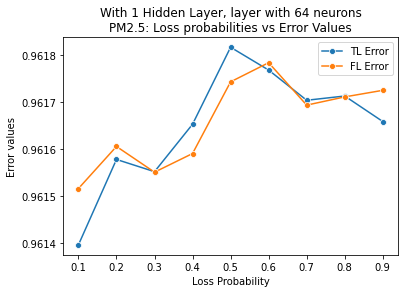

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# sns.lineplot(x = loss_prob, y = errors_tl, markers=True, dashes=False)
ax = sns.lineplot(x = loss_prob, y = np.array(errors_tl_h1['PM2.5'])[:,1], markers=True, 
                  marker="o", dashes=False, label = 'TL Error')

ax = sns.lineplot(x = loss_prob, y = np.array(errors_fl_h1['PM2.5'])[:,1], markers=True, 
                  marker="o", dashes=False, label = 'FL Error')

# ax.set(ylim=(0.96, 0.9625))
# ax.set(xlabel='Loss Probability', ylabel='MSE values')
plt.legend()
plt.xlabel("Loss Probability")
plt.ylabel("Error values")
plt.title("With 1 Hidden Layer, layer with 64 neurons\nPM2.5: Loss probabilities vs Error Values") 
plt.show(ax)

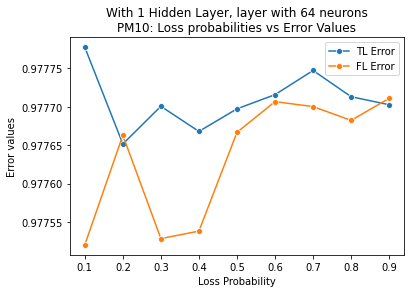

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# sns.lineplot(x = loss_prob, y = errors_tl, markers=True, dashes=False)
ax = sns.lineplot(x = loss_prob, y = np.array(errors_tl_h1['PM10'])[:,1], markers=True, 
                  marker="o", dashes=False, label = 'TL Error')

ax = sns.lineplot(x = loss_prob, y = np.array(errors_fl_h1['PM10'])[:,1], markers=True, 
                  marker="o", dashes=False, label = 'FL Error')

# ax.set(ylim=(0.977, 0.979))
# ax.set(xlabel='Loss Probability', ylabel='MSE values')
plt.legend()
plt.xlabel("Loss Probability")
plt.ylabel("Error values")
plt.title("With 1 Hidden Layer, layer with 64 neurons\nPM10: Loss probabilities vs Error Values") 
plt.show(ax)

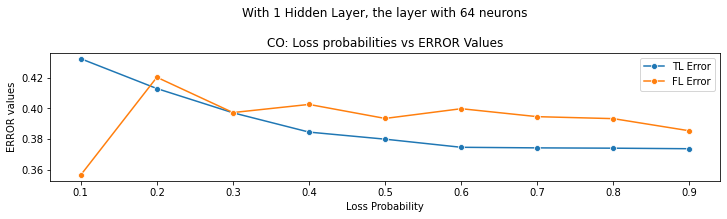

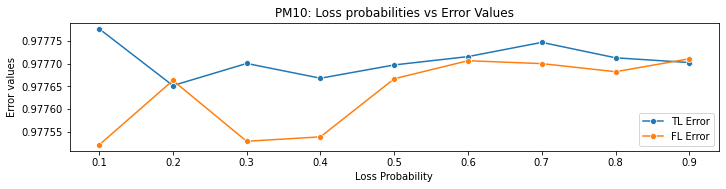

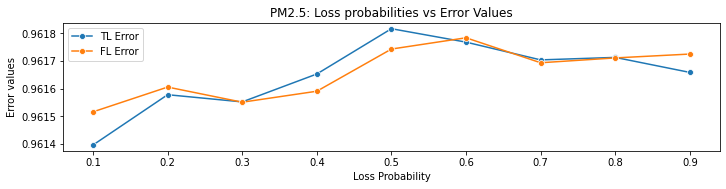

In [ ]:
plt.figure(figsize=(12, 8))
plt.title("With 2 Hidden Layers, each layer with 64 neurons")

plt.subplot(3,1,1)
ax = sns.lineplot(x = loss_prob, y = np.array(errors_tl_h1['CO'])[:,0], markers=True, 
                  marker="o", dashes=False, label = 'TL Error')

ax = sns.lineplot(x = loss_prob, y = np.array(errors_fl_h1['CO'])[:,0], markers=True, 
                  marker="o", dashes=False, label = 'FL Error')

# ax.set(ylim=(0.2, 0.5))
# ax.set(xlim=(0.1, 0.9))
plt.legend()
plt.xlabel("Loss Probability")
plt.ylabel("ERROR values")
plt.title("With 1 Hidden Layer, the layer with 64 neurons\n\nCO: Loss probabilities vs ERROR Values") 
plt.show(ax)


plt.figure(figsize=(25.6, 8))
plt.subplot(3,2,1)
ax = sns.lineplot(x = loss_prob, y = np.array(errors_tl_h1['PM10'])[:,1], markers=True, 
                  marker="o", dashes=False, label = 'TL Error')

ax = sns.lineplot(x = loss_prob, y = np.array(errors_fl_h1['PM10'])[:,1], markers=True, 
                  marker="o", dashes=False, label = 'FL Error')

# ax.set(ylim=(0.977, 0.979))
# ax.set(xlim=(0.1, 0.9))
# ax.set(xlabel='Loss Probability', ylabel='MSE values')
plt.legend()
plt.xlabel("Loss Probability")
plt.ylabel("Error values")
plt.title("PM10: Loss probabilities vs Error Values") 
plt.show(ax)


plt.figure(figsize=(40, 8))
plt.subplot(3,3,1)
import seaborn as sns
import matplotlib.pyplot as plt

# sns.lineplot(x = loss_prob, y = errors_tl, markers=True, dashes=False)
ax = sns.lineplot(x = loss_prob, y = np.array(errors_tl_h1['PM2.5'])[:,1], markers=True, 
                  marker="o", dashes=False, label = 'TL Error')

ax = sns.lineplot(x = loss_prob, y = np.array(errors_fl_h1['PM2.5'])[:,1], markers=True, 
                  marker="o", dashes=False, label = 'FL Error')

# ax.set(ylim=(0.96, 0.9625))
# ax.set(xlim=(0.1, 0.9))
# ax.set(xlabel='Loss Probability', ylabel='MSE values')
plt.legend()
plt.xlabel("Loss Probability")
plt.ylabel("Error values")
plt.title("PM2.5: Loss probabilities vs Error Values") 
plt.show(ax)

#### Customized plots

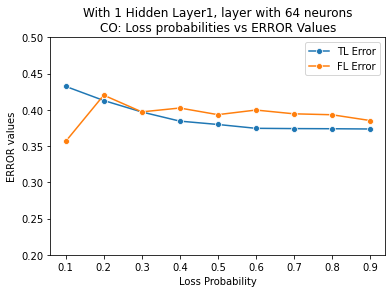

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# sns.lineplot(x = loss_prob, y = errors_tl, markers=True, dashes=False)
ax = sns.lineplot(x = loss_prob, y = np.array(errors_tl_h1['CO'])[:,0], markers=True, 
                  marker="o", dashes=False, label = 'TL Error')

ax = sns.lineplot(x = loss_prob, y = np.array(errors_fl_h1['CO'])[:,0], markers=True, 
                  marker="o", dashes=False, label = 'FL Error')

ax.set(ylim=(0.2, 0.5))

plt.legend()
plt.xlabel("Loss Probability")
plt.ylabel("ERROR values")
plt.title("With 1 Hidden Layer1, layer with 64 neurons\nCO: Loss probabilities vs ERROR Values") 
plt.show(ax)

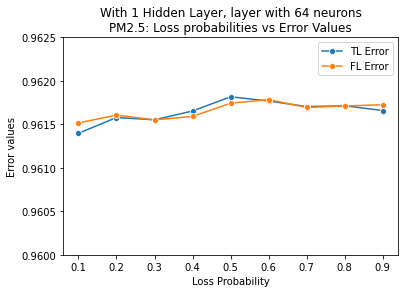

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# sns.lineplot(x = loss_prob, y = errors_tl, markers=True, dashes=False)
ax = sns.lineplot(x = loss_prob, y = np.array(errors_tl_h1['PM2.5'])[:,1], markers=True, 
                  marker="o", dashes=False, label = 'TL Error')

ax = sns.lineplot(x = loss_prob, y = np.array(errors_fl_h1['PM2.5'])[:,1], markers=True, 
                  marker="o", dashes=False, label = 'FL Error')

ax.set(ylim=(0.96, 0.9625))
# ax.set(xlabel='Loss Probability', ylabel='MSE values')
plt.legend()
plt.xlabel("Loss Probability")
plt.ylabel("Error values")
plt.title("With 1 Hidden Layer, layer with 64 neurons\nPM2.5: Loss probabilities vs Error Values") 
plt.show(ax)

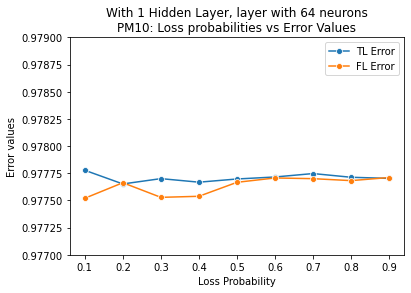

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# sns.lineplot(x = loss_prob, y = errors_tl, markers=True, dashes=False)
ax = sns.lineplot(x = loss_prob, y = np.array(errors_tl_h1['PM10'])[:,1], markers=True, 
                  marker="o", dashes=False, label = 'TL Error')

ax = sns.lineplot(x = loss_prob, y = np.array(errors_fl_h1['PM10'])[:,1], markers=True, 
                  marker="o", dashes=False, label = 'FL Error')

ax.set(ylim=(0.977, 0.979))
# ax.set(xlabel='Loss Probability', ylabel='MSE values')
plt.legend()
plt.xlabel("Loss Probability")
plt.ylabel("Error values")
plt.title("With 1 Hidden Layer, layer with 64 neurons\nPM10: Loss probabilities vs Error Values") 
plt.show(ax)

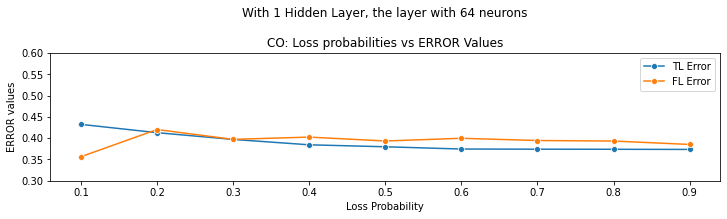

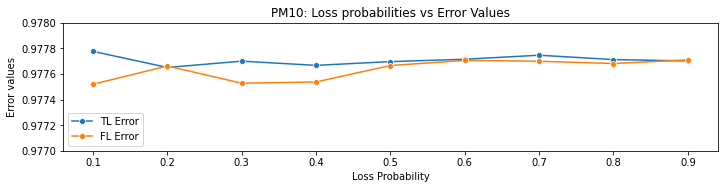

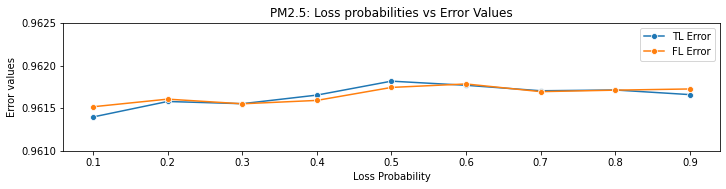

In [ ]:
plt.figure(figsize=(12, 8))
plt.title("With 2 Hidden Layers, each layer with 64 neurons")

plt.subplot(3,1,1)
ax = sns.lineplot(x = loss_prob, y = np.array(errors_tl_h1['CO'])[:,0], markers=True, 
                  marker="o", dashes=False, label = 'TL Error')

ax = sns.lineplot(x = loss_prob, y = np.array(errors_fl_h1['CO'])[:,0], markers=True, 
                  marker="o", dashes=False, label = 'FL Error')

ax.set(ylim=(0.3, 0.6))
# ax.set(xlim=(0.1, 0.9))
plt.legend()
plt.xlabel("Loss Probability")
plt.ylabel("ERROR values")
plt.title("With 1 Hidden Layer, the layer with 64 neurons\n\nCO: Loss probabilities vs ERROR Values") 
plt.show(ax)


plt.figure(figsize=(25.8, 8))
plt.subplot(3,2,1)
ax = sns.lineplot(x = loss_prob, y = np.array(errors_tl_h1['PM10'])[:,1], markers=True, 
                  marker="o", dashes=False, label = 'TL Error')

ax = sns.lineplot(x = loss_prob, y = np.array(errors_fl_h1['PM10'])[:,1], markers=True, 
                  marker="o", dashes=False, label = 'FL Error')

ax.set(ylim=(0.977, 0.978))
# ax.set(xlim=(0.1, 0.9))
# ax.set(xlabel='Loss Probability', ylabel='MSE values')
plt.legend()
plt.xlabel("Loss Probability")
plt.ylabel("Error values")
plt.title("PM10: Loss probabilities vs Error Values") 
plt.show(ax)


plt.figure(figsize=(40, 8))
plt.subplot(3,3,1)
import seaborn as sns
import matplotlib.pyplot as plt

# sns.lineplot(x = loss_prob, y = errors_tl, markers=True, dashes=False)
ax = sns.lineplot(x = loss_prob, y = np.array(errors_tl_h1['PM2.5'])[:,1], markers=True, 
                  marker="o", dashes=False, label = 'TL Error')

ax = sns.lineplot(x = loss_prob, y = np.array(errors_fl_h1['PM2.5'])[:,1], markers=True, 
                  marker="o", dashes=False, label = 'FL Error')

ax.set(ylim=(0.961, 0.9625))
# ax.set(xlim=(0.1, 0.9))
# ax.set(xlabel='Loss Probability', ylabel='MSE values')
plt.legend()
plt.xlabel("Loss Probability")
plt.ylabel("Error values")
plt.title("PM2.5: Loss probabilities vs Error Values") 
plt.show(ax)

## 2 hidden layer

### traditional Learning

In [ ]:
def traditional_ML(loss_p, gas):
  # initialize w_0
  model = Sequential()

  # model.add(Dense(64, kernel_initializer='zeros', bias_initializer='zeros', activation=tf.nn.relu, input_dim=6)) # first dense/hidden layer
  model.add(Dense(64, kernel_initializer='he_uniform', bias_initializer="zeros", activation=tf.nn.relu, input_dim=8))
  model.add(Dropout(0.1))

  model.add(Dense(64, kernel_initializer='he_uniform', bias_initializer="zeros", activation=tf.nn.relu))
  model.add(Dropout(0.1))

  model.add(Dense(1, kernel_initializer= 'glorot_uniform', activation=tf.nn.softmax)) # output layer


  # compile the model
  model.compile(loss='mse', 
              optimizer='adam', 
              metrics=['mse'])

  X, y = dataset[['Latitude', 'Longitude','year', 'month', 'week', 'day', 'hour', 'dayOfWeek']],  dataset[gas]

  x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = loss_p, random_state=1)


  B = 1000 #int(len(x_train) * 0.01) # so for each client the batch size would be different depending upon the total sample size
  E = 25 #max(30, B//10) # number of local epochs; it will also depend on sample size (indirectly)


  model.fit(x_train, y_train, 
                  epochs = E, 
                  batch_size=B,
                  verbose=False)
      
  x_test, y_test = x_test.to_numpy(), y_test.to_numpy()

  # adjusting the dimensions
  x_test = x_test.reshape(x_test.shape[0], 1,  x_test.shape[1])
  y_test = y_test.reshape(y_test.shape[0],1,1)
  y_predicted = model.predict(x_test)
  

  from sklearn.metrics import mean_squared_error
  mse = mean_squared_error(y_predicted.ravel(), y_test.ravel())

  NE = np.sum(abs(np.array(y_test) - np.array(y_predicted))) / np.sum(np.array(y_test))
  return (mse, NE)


In [ ]:

# Final plotting
K = 25 # as we have 25 clients

loss_prob = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
gases = ['CO', 	'PM10',	'PM2.5']
errors_tl_h2 = {'CO':[], 	'PM10':[],	'PM2.5':[]}


for gas in gases:
  for loss_p in loss_prob:
    error = traditional_ML(loss_p, gas)
    errors_tl_h2[gas].append(error)


### Federated Learning

In [ ]:
# ClientUpdate(k, w): // Run on client k
def Client(client_idx, model, gas):
    # B ← (split P_k into batches of size B) # what is p_K --> each clients' sample size
    B = 1000 #int(len(clients[client_idx]) * 0.01) # so for each client the batch size would be different depending upon the total sample size
    E = 20 #max(30, B//10) # number of local epochs; it will also depend on sample size (indirectly)

    data = clients_cut[client_idx]
    # data = dataset.loc[dataset['Station code'] == client_idx]

    X, y = data[['Latitude', 'Longitude','year', 'month', 'week', 'day', 'hour', 'dayOfWeek']],  data[gas]

    x_train, x_val, y_train, y_val = train_test_split(X, y, test_size = 0.1, random_state=1)

    try:
        model.fit(x_train, y_train, 
                    epochs = E, 
                    batch_size=B,
                    validation_data=(x_val, y_val),
                    verbose=False)
    except Exception as e:
        print(e)
        print("error")

    # return w to server
    # in our case no need for any explicit return; as the model is pass by value
    return data.shape[0] # this will return the number of total sample


In [ ]:
# Server executes: 
def Server(gas):
    # initialize w_0
    model = Sequential()
    
    # model.add(Dense(64, kernel_initializer='zeros', bias_initializer='zeros', activation=tf.nn.relu, input_dim=6)) # first dense/hidden layer
    model.add(Dense(64, kernel_initializer='he_uniform', bias_initializer="zeros", activation=tf.nn.relu, input_dim=8))
    model.add(Dropout(0.1))

    model.add(Dense(64, kernel_initializer='he_uniform', bias_initializer="zeros", activation=tf.nn.relu))
    model.add(Dropout(0.1))
    
    model.add(Dense(1, kernel_initializer= 'glorot_uniform', activation=tf.nn.softmax)) # output layer


    # compile the model
    model.compile(loss='mse', 
                optimizer='adam', 
                metrics=['mse'])
    

# for each round t = 1, 2, . . . do
    for t in range(1, 5):
        C = np.random.random(1)[0] # random number between 0 and 1.

        # m ← max(C  K, 1)
        m = max(int(C*K), 1) # m == random number of client selected
        weight_t_plus_1 = [None] * m # matrix to store the weights of all client in each t-round
        n_k = [None] * m # parameters for weighted sum 


        # S_t ← (random set of m clients)
        # S = {} # dictionary
        S_t = np.random.uniform(low=101, high=126, size=(m)).astype(int)

        # No need for below loop, as server don't need access to client data, server only need clients' number
        # for client in m_clients:
        #   S[client] = clients[client]

        initial_weights = model.get_weights() # setting initial weights; should be same for all clients
        # for t= 1 to T, initial_weights would be t-1th's final weights

        # for each client k ∈ S_t in parallel do
        client_idx = 0
        for client in S_t:
            # w^(k)_(t+1) ← ClientUpdate(k, model)
            n_k[client_idx] = Client(client, model, gas) # pass by reference for model
            weight_t_plus_1[client_idx] = model.get_weights()
            client_idx += 1

            # setting weights back to initial weights
            model.set_weights(initial_weights)

        # finding the weighted sum
        final_weights_t = np.array(weight_t_plus_1[0]) * (n_k[0] / sum(n_k))

        for idx in range(1, m):
          # w_(t+1) ← summation(k=1 to K){(n_k/n) * w^(k)_(t+1)} #n_k - no. of training sample in each client K; n - total training samples;
          final_weights_t += np.array(weight_t_plus_1[idx]) * (n_k[idx]/ sum(n_k))

        # setting the aggregated weights
        model.set_weights(final_weights_t)


#         print(model.get_weights())
    # return error_clients(model, loss_p)) # THIS LINE WON'T BE THERE IN REAL SERVER
    return model

In [ ]:
def error_clients(model, gas):
    
    X, y = test_data[['Latitude', 'Longitude','year', 'month', 'week', 'day', 'hour', 'dayOfWeek']],  test_data[gas]
    
    # adjusting the dimensions
    x_test, y_test = X.to_numpy(), y.to_numpy()
    x_test = x_test.reshape(x_test.shape[0], 1,  x_test.shape[1])
    y_test = y_test.reshape(y_test.shape[0],1,1)

    y_predicted = model.predict(x_test)
    
    from sklearn.metrics import mean_squared_error
    # print("y_predicted", y_predicted)
    # print("y_predicted.ravel()", y_predicted.ravel())
    NE = np.sum(abs(np.array(y_test) - np.array(y_predicted))) / np.sum(np.array(y_test))

    mse = mean_squared_error(y_predicted.ravel(), y_test.ravel())
    
    return (mse,NE)

          

In [ ]:

# create an Empty DataFrame object
train_data = pd.DataFrame()
test_data = pd.DataFrame()
loss_prob = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
models = []
errors_fl_h2 = {'CO':[], 	'PM10':[],	'PM2.5':[]}
gases = ['CO', 	'PM10',	'PM2.5']

# reading all the clients and building model
for gas in gases:
  for lp in loss_prob:
      for st_code in range(101,126):
          # splitting into train test split
          X, y = clients[st_code][['Latitude', 'Longitude','year', 'month', 'week', 'day', 'hour', 'dayOfWeek']],  clients[st_code][gas]
          x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = lp, random_state=0)

          # Normalization using min-max scaler
          # Normalization across instances should be done after splitting the data between training and test set, using only the data from the training set.
          # to avoid data leak
          scaler_cols = x_train.columns
          scaler_idx_train = x_train.index
          scaler_idx_test = x_test.index

          # from sklearn.preprocessing import MinMaxScaler
          scaler = MinMaxScaler()

          # transforming train data
          x_train_encoded_scaled = pd.DataFrame(scaler.fit_transform(x_train), columns = scaler_cols, index=scaler_idx_train)
          # display(x_train_encoded_scaled.head())

          # transforming test data
          x_test_encoded_scaled = pd.DataFrame(scaler.transform(x_test), columns = scaler_cols, index = scaler_idx_test)
          # display(x_test_encoded_scaled.head())

          # training data prep
          clients_cut[st_code] = pd.concat([x_train_encoded_scaled, y_train], axis = 1)

          # testing data prep
          # first appending x_test and y_test column wise
          # then appending each clients' dataframe one below other
          if st_code == 101:
            test_data = pd.concat([x_test_encoded_scaled, y_test], axis = 1)
          else:
            xy = pd.concat([x_test_encoded_scaled, y_test], axis=1)
            test_data = pd.concat([test_data, xy], axis=0)
          # x_test, y_test = x_test.to_numpy(), y_test.to_numpy()
      
      # Training the model using federated learning
      model = Server(gas)

      # testing model
      errors_fl_h2[gas].append(error_clients(model, gas))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:59: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:59: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:59: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:59: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:59: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:59: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:59: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:59: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:59: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:59: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:59: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:59: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:59: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:59: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:59: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:59: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:59: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:59: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:59: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:59: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:59: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:59: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:59: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:59: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:59: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:59: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:59: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:59: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


### Plots

#### Original Plots

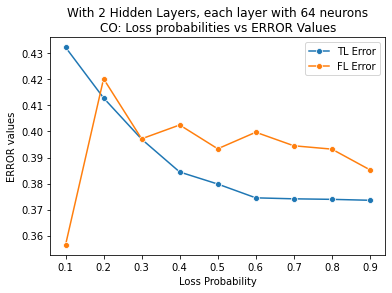

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# sns.lineplot(x = loss_prob, y = errors_tl, markers=True, dashes=False)
ax = sns.lineplot(x = loss_prob, y = np.array(errors_tl_h2['CO'])[:,0], markers=True, 
                  marker="o", dashes=False, label = 'TL Error')

ax = sns.lineplot(x = loss_prob, y = np.array(errors_fl_h2['CO'])[:,0], markers=True, 
                  marker="o", dashes=False, label = 'FL Error')

# ax.set(ylim=(0.2, 0.5))

plt.legend()
plt.xlabel("Loss Probability")
plt.ylabel("ERROR values")
plt.title("With 2 Hidden Layers, each layer with 64 neurons\nCO: Loss probabilities vs ERROR Values") 
plt.show(ax)

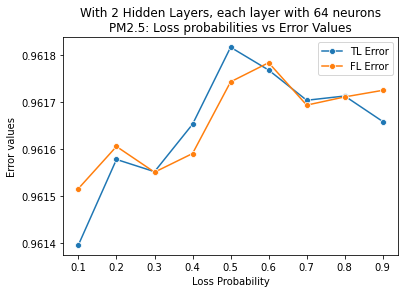

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# sns.lineplot(x = loss_prob, y = errors_tl, markers=True, dashes=False)
ax = sns.lineplot(x = loss_prob, y = np.array(errors_tl_h2['PM2.5'])[:,1], markers=True, 
                  marker="o", dashes=False, label = 'TL Error')

ax = sns.lineplot(x = loss_prob, y = np.array(errors_fl_h2['PM2.5'])[:,1], markers=True, 
                  marker="o", dashes=False, label = 'FL Error')

# ax.set(ylim=(0.96, 0.9625))
# ax.set(xlabel='Loss Probability', ylabel='MSE values')
plt.legend()
plt.xlabel("Loss Probability")
plt.ylabel("Error values")
plt.title("With 2 Hidden Layers, each layer with 64 neurons\nPM2.5: Loss probabilities vs Error Values") 
plt.show(ax)

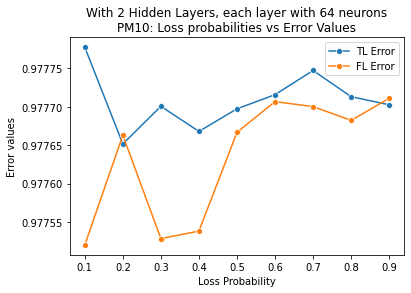

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# sns.lineplot(x = loss_prob, y = errors_tl, markers=True, dashes=False)
ax = sns.lineplot(x = loss_prob, y = np.array(errors_tl_h2['PM10'])[:,1], markers=True, 
                  marker="o", dashes=False, label = 'TL Error')

ax = sns.lineplot(x = loss_prob, y = np.array(errors_fl_h2['PM10'])[:,1], markers=True, 
                  marker="o", dashes=False, label = 'FL Error')

# ax.set(ylim=(0.977, 0.979))
# ax.set(xlabel='Loss Probability', ylabel='MSE values')
plt.legend()
plt.xlabel("Loss Probability")
plt.ylabel("Error values")
plt.title("With 2 Hidden Layers, each layer with 64 neurons\nPM10: Loss probabilities vs Error Values") 
plt.show(ax)

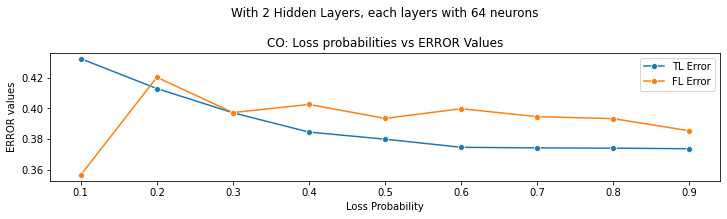

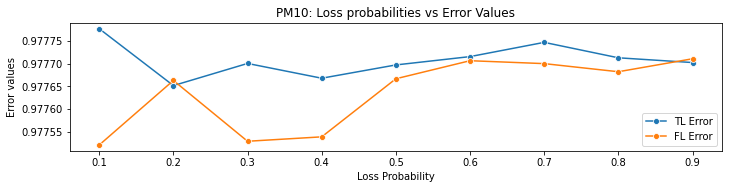

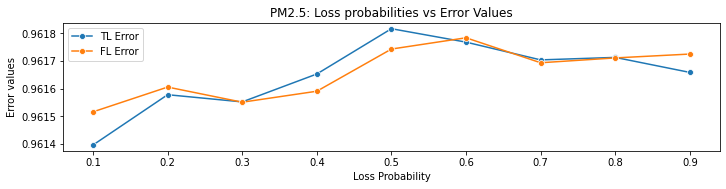

In [ ]:
plt.figure(figsize=(12, 8))
plt.title("With 2 Hidden Layers, each layer with 64 neurons")

plt.subplot(3,1,1)
ax = sns.lineplot(x = loss_prob, y = np.array(errors_tl_h2['CO'])[:,0], markers=True, 
                  marker="o", dashes=False, label = 'TL Error')

ax = sns.lineplot(x = loss_prob, y = np.array(errors_fl_h2['CO'])[:,0], markers=True, 
                  marker="o", dashes=False, label = 'FL Error')

# ax.set(ylim=(0.2, 0.5))
# ax.set(xlim=(0.1, 0.9))
plt.legend()
plt.xlabel("Loss Probability")
plt.ylabel("ERROR values")
plt.title("With 2 Hidden Layers, each layers with 64 neurons\n\nCO: Loss probabilities vs ERROR Values") 
plt.show(ax)


plt.figure(figsize=(25.73, 8))
plt.subplot(3,2,1)
ax = sns.lineplot(x = loss_prob, y = np.array(errors_tl_h2['PM10'])[:,1], markers=True, 
                  marker="o", dashes=False, label = 'TL Error')

ax = sns.lineplot(x = loss_prob, y = np.array(errors_fl_h2['PM10'])[:,1], markers=True, 
                  marker="o", dashes=False, label = 'FL Error')

# ax.set(ylim=(0.977, 0.979))
# ax.set(xlim=(0.1, 0.9))
# ax.set(xlabel='Loss Probability', ylabel='MSE values')
plt.legend()
plt.xlabel("Loss Probability")
plt.ylabel("Error values")
plt.title("PM10: Loss probabilities vs Error Values") 
plt.show(ax)


plt.figure(figsize=(40, 8))
plt.subplot(3,3,1)
import seaborn as sns
import matplotlib.pyplot as plt

# sns.lineplot(x = loss_prob, y = errors_tl, markers=True, dashes=False)
ax = sns.lineplot(x = loss_prob, y = np.array(errors_tl_h2['PM2.5'])[:,1], markers=True, 
                  marker="o", dashes=False, label = 'TL Error')

ax = sns.lineplot(x = loss_prob, y = np.array(errors_fl_h2['PM2.5'])[:,1], markers=True, 
                  marker="o", dashes=False, label = 'FL Error')

# ax.set(ylim=(0.96, 0.9625))
# ax.set(xlim=(0.1, 0.9))
# ax.set(xlabel='Loss Probability', ylabel='MSE values')
plt.legend()
plt.xlabel("Loss Probability")
plt.ylabel("Error values")
plt.title("PM2.5: Loss probabilities vs Error Values") 
plt.show(ax)

#### Customized plots

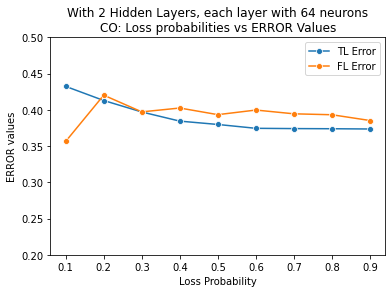

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# sns.lineplot(x = loss_prob, y = errors_tl, markers=True, dashes=False)
ax = sns.lineplot(x = loss_prob, y = np.array(errors_tl_h2['CO'])[:,0], markers=True, 
                  marker="o", dashes=False, label = 'TL Error')

ax = sns.lineplot(x = loss_prob, y = np.array(errors_fl_h2['CO'])[:,0], markers=True, 
                  marker="o", dashes=False, label = 'FL Error')

ax.set(ylim=(0.2, 0.5))

plt.legend()
plt.xlabel("Loss Probability")
plt.ylabel("ERROR values")
plt.title("With 2 Hidden Layers, each layer with 64 neurons\nCO: Loss probabilities vs ERROR Values") 
plt.show(ax)

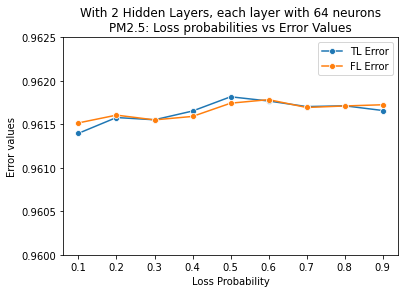

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# sns.lineplot(x = loss_prob, y = errors_tl, markers=True, dashes=False)
ax = sns.lineplot(x = loss_prob, y = np.array(errors_tl_h2['PM2.5'])[:,1], markers=True, 
                  marker="o", dashes=False, label = 'TL Error')

ax = sns.lineplot(x = loss_prob, y = np.array(errors_fl_h2['PM2.5'])[:,1], markers=True, 
                  marker="o", dashes=False, label = 'FL Error')

ax.set(ylim=(0.96, 0.9625))
# ax.set(xlabel='Loss Probability', ylabel='MSE values')
plt.legend()
plt.xlabel("Loss Probability")
plt.ylabel("Error values")
plt.title("With 2 Hidden Layers, each layer with 64 neurons\nPM2.5: Loss probabilities vs Error Values") 
plt.show(ax)

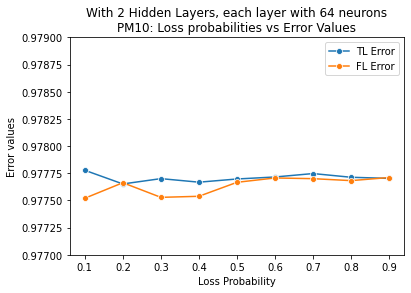

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# sns.lineplot(x = loss_prob, y = errors_tl, markers=True, dashes=False)
ax = sns.lineplot(x = loss_prob, y = np.array(errors_tl_h2['PM10'])[:,1], markers=True, 
                  marker="o", dashes=False, label = 'TL Error')

ax = sns.lineplot(x = loss_prob, y = np.array(errors_fl_h2['PM10'])[:,1], markers=True, 
                  marker="o", dashes=False, label = 'FL Error')

ax.set(ylim=(0.977, 0.979))
# ax.set(xlabel='Loss Probability', ylabel='MSE values')
plt.legend()
plt.xlabel("Loss Probability")
plt.ylabel("Error values")
plt.title("With 2 Hidden Layers, each layer with 64 neurons\nPM10: Loss probabilities vs Error Values") 
plt.show(ax)

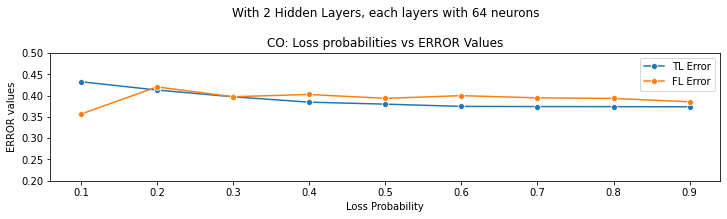

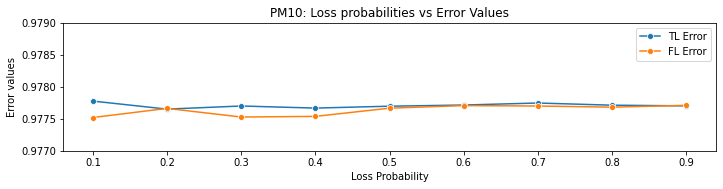

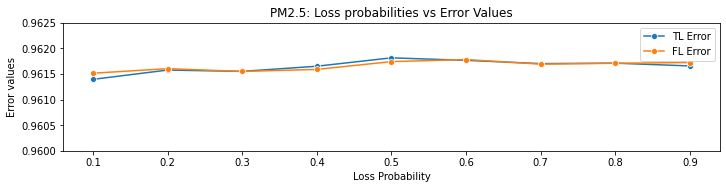

In [ ]:
plt.figure(figsize=(12, 8))
plt.title("With 2 Hidden Layers, each layer with 64 neurons")

plt.subplot(3,1,1)
ax = sns.lineplot(x = loss_prob, y = np.array(errors_tl_h2['CO'])[:,0], markers=True, 
                  marker="o", dashes=False, label = 'TL Error')

ax = sns.lineplot(x = loss_prob, y = np.array(errors_fl_h2['CO'])[:,0], markers=True, 
                  marker="o", dashes=False, label = 'FL Error')

ax.set(ylim=(0.2, 0.5))
# ax.set(xlim=(0.1, 0.9))
plt.legend()
plt.xlabel("Loss Probability")
plt.ylabel("ERROR values")
plt.title("With 2 Hidden Layers, each layers with 64 neurons\n\nCO: Loss probabilities vs ERROR Values") 
plt.show(ax)


plt.figure(figsize=(25.73, 8))
plt.subplot(3,2,1)
ax = sns.lineplot(x = loss_prob, y = np.array(errors_tl_h2['PM10'])[:,1], markers=True, 
                  marker="o", dashes=False, label = 'TL Error')

ax = sns.lineplot(x = loss_prob, y = np.array(errors_fl_h2['PM10'])[:,1], markers=True, 
                  marker="o", dashes=False, label = 'FL Error')

ax.set(ylim=(0.977, 0.979))
# ax.set(xlim=(0.1, 0.9))
# ax.set(xlabel='Loss Probability', ylabel='MSE values')
plt.legend()
plt.xlabel("Loss Probability")
plt.ylabel("Error values")
plt.title("PM10: Loss probabilities vs Error Values") 
plt.show(ax)


plt.figure(figsize=(40, 8))
plt.subplot(3,3,1)
import seaborn as sns
import matplotlib.pyplot as plt

# sns.lineplot(x = loss_prob, y = errors_tl, markers=True, dashes=False)
ax = sns.lineplot(x = loss_prob, y = np.array(errors_tl_h2['PM2.5'])[:,1], markers=True, 
                  marker="o", dashes=False, label = 'TL Error')

ax = sns.lineplot(x = loss_prob, y = np.array(errors_fl_h2['PM2.5'])[:,1], markers=True, 
                  marker="o", dashes=False, label = 'FL Error')

ax.set(ylim=(0.96, 0.9625))
# ax.set(xlim=(0.1, 0.9))
# ax.set(xlabel='Loss Probability', ylabel='MSE values')
plt.legend()
plt.xlabel("Loss Probability")
plt.ylabel("Error values")
plt.title("PM2.5: Loss probabilities vs Error Values") 
plt.show(ax)

## 4 hidden layer

### traditional Learning

In [ ]:
def traditional_ML(loss_p, gas):
  # initialize w_0
  model = Sequential()

  # model.add(Dense(64, kernel_initializer='zeros', bias_initializer='zeros', activation=tf.nn.relu, input_dim=6)) # first dense/hidden layer
  model.add(Dense(64, kernel_initializer='he_uniform', bias_initializer="zeros", activation=tf.nn.relu, input_dim=8))
  model.add(Dropout(0.1))

  model.add(Dense(64, kernel_initializer='he_uniform', bias_initializer="zeros", activation=tf.nn.relu))
  model.add(Dropout(0.1))

  model.add(Dense(64, kernel_initializer='he_uniform', bias_initializer="zeros", activation=tf.nn.relu))
  model.add(Dropout(0.1))

  model.add(Dense(64, kernel_initializer='he_uniform', bias_initializer="zeros", activation=tf.nn.relu))
  model.add(Dropout(0.1))
  
  model.add(Dense(1, kernel_initializer= 'glorot_uniform', activation=tf.nn.softmax)) # output layer


  # compile the model
  model.compile(loss='mse', 
              optimizer='adam', 
              metrics=['mse'])

  X, y = dataset[['Latitude', 'Longitude','year', 'month', 'week', 'day', 'hour', 'dayOfWeek']],  dataset[gas]

  x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = loss_p, random_state=1)


  B = 1000 #int(len(x_train) * 0.01) # so for each client the batch size would be different depending upon the total sample size
  E = 25 #max(30, B//10) # number of local epochs; it will also depend on sample size (indirectly)


  model.fit(x_train, y_train, 
                  epochs = E, 
                  batch_size=B,
                  verbose=False)
      
  x_test, y_test = x_test.to_numpy(), y_test.to_numpy()

  # adjusting the dimensions
  x_test = x_test.reshape(x_test.shape[0], 1,  x_test.shape[1])
  y_test = y_test.reshape(y_test.shape[0],1,1)
  y_predicted = model.predict(x_test)
  

  from sklearn.metrics import mean_squared_error
  mse = mean_squared_error(y_predicted.ravel(), y_test.ravel())

  NE = np.sum(abs(np.array(y_test) - np.array(y_predicted))) / np.sum(np.array(y_test))
  return (mse, NE)


In [ ]:

# Final plotting
K = 25 # as we have 25 clients

loss_prob = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
gases = ['CO', 	'PM10',	'PM2.5']
errors_tl_h4 = {'CO':[], 	'PM10':[],	'PM2.5':[]}


for gas in gases:
  for loss_p in loss_prob:
    error = traditional_ML(loss_p, gas)
    errors_tl_h4[gas].append(error)


### Federated Learning

In [ ]:
# ClientUpdate(k, w): // Run on client k
def Client(client_idx, model, gas):
    # B ← (split P_k into batches of size B) # what is p_K --> each clients' sample size
    B = 1000 #int(len(clients[client_idx]) * 0.01) # so for each client the batch size would be different depending upon the total sample size
    E = 20 #max(30, B//10) # number of local epochs; it will also depend on sample size (indirectly)

    data = clients_cut[client_idx]
    # data = dataset.loc[dataset['Station code'] == client_idx]

    X, y = data[['Latitude', 'Longitude','year', 'month', 'week', 'day', 'hour', 'dayOfWeek']],  data[gas]

    x_train, x_val, y_train, y_val = train_test_split(X, y, test_size = 0.1, random_state=1)

    try:
        model.fit(x_train, y_train, 
                    epochs = E, 
                    batch_size=B,
                    validation_data=(x_val, y_val),
                    verbose=False)
    except Exception as e:
        print(e)
        print("error")

    # return w to server
    # in our case no need for any explicit return; as the model is pass by value
    return data.shape[0] # this will return the number of total sample


In [ ]:
# Server executes: 
def Server(gas):
    # initialize w_0
    model = Sequential()
    
    # model.add(Dense(64, kernel_initializer='zeros', bias_initializer='zeros', activation=tf.nn.relu, input_dim=6)) # first dense/hidden layer
    model.add(Dense(64, kernel_initializer='he_uniform', bias_initializer="zeros", activation=tf.nn.relu, input_dim=8))
    model.add(Dropout(0.1))

    model.add(Dense(64, kernel_initializer='he_uniform', bias_initializer="zeros", activation=tf.nn.relu))
    model.add(Dropout(0.1))

    model.add(Dense(64, kernel_initializer='he_uniform', bias_initializer="zeros", activation=tf.nn.relu))
    model.add(Dropout(0.1))

    model.add(Dense(64, kernel_initializer='he_uniform', bias_initializer="zeros", activation=tf.nn.relu))
    model.add(Dropout(0.1))

    model.add(Dense(1, kernel_initializer= 'glorot_uniform', activation=tf.nn.softmax)) # output layer


    # compile the model
    model.compile(loss='mse', 
                optimizer='adam', 
                metrics=['mse'])
    

# for each round t = 1, 2, . . . do
    for t in range(1, 5):
        C = np.random.random(1)[0] # random number between 0 and 1.

        # m ← max(C  K, 1)
        m = max(int(C*K), 1) # m == random number of client selected
        weight_t_plus_1 = [None] * m # matrix to store the weights of all client in each t-round
        n_k = [None] * m # parameters for weighted sum 


        # S_t ← (random set of m clients)
        # S = {} # dictionary
        S_t = np.random.uniform(low=101, high=126, size=(m)).astype(int)

        # No need for below loop, as server don't need access to client data, server only need clients' number
        # for client in m_clients:
        #   S[client] = clients[client]

        initial_weights = model.get_weights() # setting initial weights; should be same for all clients
        # for t= 1 to T, initial_weights would be t-1th's final weights

        # for each client k ∈ S_t in parallel do
        client_idx = 0
        for client in S_t:
            # w^(k)_(t+1) ← ClientUpdate(k, model)
            n_k[client_idx] = Client(client, model, gas) # pass by reference for model
            weight_t_plus_1[client_idx] = model.get_weights()
            client_idx += 1

            # setting weights back to initial weights
            model.set_weights(initial_weights)

        # finding the weighted sum
        final_weights_t = np.array(weight_t_plus_1[0]) * (n_k[0] / sum(n_k))

        for idx in range(1, m):
          # w_(t+1) ← summation(k=1 to K){(n_k/n) * w^(k)_(t+1)} #n_k - no. of training sample in each client K; n - total training samples;
          final_weights_t += np.array(weight_t_plus_1[idx]) * (n_k[idx]/ sum(n_k))

        # setting the aggregated weights
        model.set_weights(final_weights_t)


#         print(model.get_weights())
    # return error_clients(model, loss_p)) # THIS LINE WON'T BE THERE IN REAL SERVER
    return model

In [ ]:
def error_clients(model, gas):
    
    X, y = test_data[['Latitude', 'Longitude','year', 'month', 'week', 'day', 'hour', 'dayOfWeek']],  test_data[gas]
    
    # adjusting the dimensions
    x_test, y_test = X.to_numpy(), y.to_numpy()
    x_test = x_test.reshape(x_test.shape[0], 1,  x_test.shape[1])
    y_test = y_test.reshape(y_test.shape[0],1,1)

    y_predicted = model.predict(x_test)
    
    from sklearn.metrics import mean_squared_error
    # print("y_predicted", y_predicted)
    # print("y_predicted.ravel()", y_predicted.ravel())
    NE = np.sum(abs(np.array(y_test) - np.array(y_predicted))) / np.sum(np.array(y_test))

    mse = mean_squared_error(y_predicted.ravel(), y_test.ravel())
    
    return (mse,NE)

          

In [ ]:

# create an Empty DataFrame object
train_data = pd.DataFrame()
test_data = pd.DataFrame()
loss_prob = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
errors_fl_h4 = {'CO':[], 	'PM10':[],	'PM2.5':[]}
gases = ['CO', 	'PM10',	'PM2.5']

# reading all the clients and building model
for gas in gases:
  for lp in loss_prob:
      for st_code in range(101,126):
          # splitting into train test split
          X, y = clients[st_code][['Latitude', 'Longitude','year', 'month', 'week', 'day', 'hour', 'dayOfWeek']],  clients[st_code][gas]
          x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = lp, random_state=0)

          # Normalization using min-max scaler
          # Normalization across instances should be done after splitting the data between training and test set, using only the data from the training set.
          # to avoid data leak
          scaler_cols = x_train.columns
          scaler_idx_train = x_train.index
          scaler_idx_test = x_test.index

          # from sklearn.preprocessing import MinMaxScaler
          scaler = MinMaxScaler()

          # transforming train data
          x_train_encoded_scaled = pd.DataFrame(scaler.fit_transform(x_train), columns = scaler_cols, index=scaler_idx_train)
          # display(x_train_encoded_scaled.head())

          # transforming test data
          x_test_encoded_scaled = pd.DataFrame(scaler.transform(x_test), columns = scaler_cols, index = scaler_idx_test)
          # display(x_test_encoded_scaled.head())

          # training data prep
          clients_cut[st_code] = pd.concat([x_train_encoded_scaled, y_train], axis = 1)

          # testing data prep
          # first appending x_test and y_test column wise
          # then appending each clients' dataframe one below other
          if st_code == 101:
            test_data = pd.concat([x_test_encoded_scaled, y_test], axis = 1)
          else:
            xy = pd.concat([x_test_encoded_scaled, y_test], axis=1)
            test_data = pd.concat([test_data, xy], axis=0)
          # x_test, y_test = x_test.to_numpy(), y_test.to_numpy()
      
      # Training the model using federated learning
      model = Server(gas)

      # testing model
      errors_fl_h4[gas].append(error_clients(model, gas))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


### Plots

#### Original plots

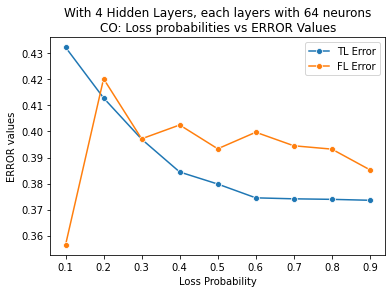

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# sns.lineplot(x = loss_prob, y = errors_tl, markers=True, dashes=False)
ax = sns.lineplot(x = loss_prob, y = np.array(errors_tl_h4['CO'])[:,0], markers=True, 
                  marker="o", dashes=False, label = 'TL Error')

ax = sns.lineplot(x = loss_prob, y = np.array(errors_fl_h4['CO'])[:,0], markers=True, 
                  marker="o", dashes=False, label = 'FL Error')

# ax.set(ylim=(0.2, 0.5))

plt.legend()
plt.xlabel("Loss Probability")
plt.ylabel("ERROR values")
plt.title("With 4 Hidden Layers, each layers with 64 neurons\nCO: Loss probabilities vs ERROR Values") 
plt.show(ax)

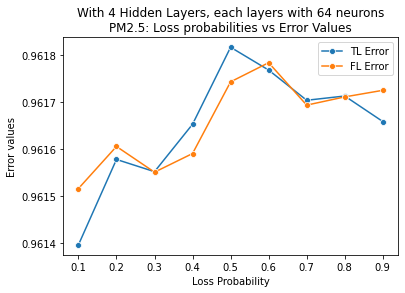

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# sns.lineplot(x = loss_prob, y = errors_tl, markers=True, dashes=False)
ax = sns.lineplot(x = loss_prob, y = np.array(errors_tl_h4['PM2.5'])[:,1], markers=True, 
                  marker="o", dashes=False, label = 'TL Error')

ax = sns.lineplot(x = loss_prob, y = np.array(errors_fl_h4['PM2.5'])[:,1], markers=True, 
                  marker="o", dashes=False, label = 'FL Error')

# ax.set(ylim=(0.96, 0.9625))
# ax.set(xlabel='Loss Probability', ylabel='MSE values')
plt.legend()
plt.xlabel("Loss Probability")
plt.ylabel("Error values")
plt.title("With 4 Hidden Layers, each layers with 64 neurons\nPM2.5: Loss probabilities vs Error Values") 
plt.show(ax)

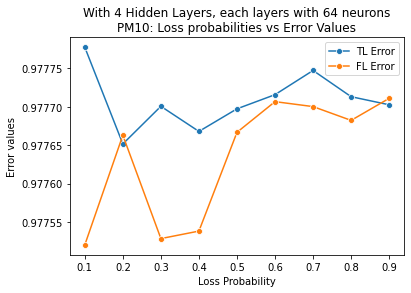

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# sns.lineplot(x = loss_prob, y = errors_tl, markers=True, dashes=False)
ax = sns.lineplot(x = loss_prob, y = np.array(errors_tl_h4['PM10'])[:,1], markers=True, 
                  marker="o", dashes=False, label = 'TL Error')

ax = sns.lineplot(x = loss_prob, y = np.array(errors_fl_h4['PM10'])[:,1], markers=True, 
                  marker="o", dashes=False, label = 'FL Error')

# ax.set(ylim=(0.977, 0.979))
# ax.set(xlabel='Loss Probability', ylabel='MSE values')
plt.legend()
plt.xlabel("Loss Probability")
plt.ylabel("Error values")
plt.title("With 4 Hidden Layers, each layers with 64 neurons\nPM10: Loss probabilities vs Error Values") 
plt.show(ax)

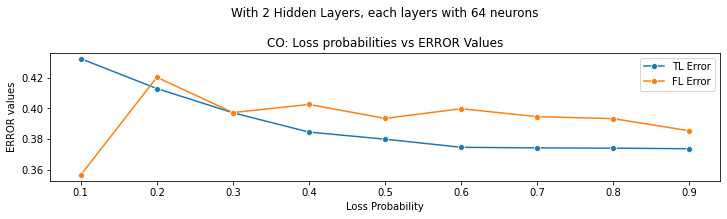

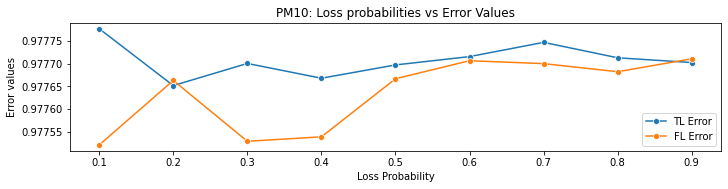

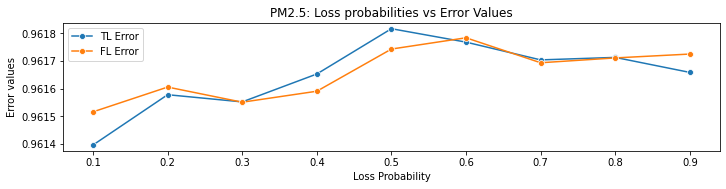

In [ ]:
plt.figure(figsize=(12, 8))
plt.title("With 4 Hidden Layers, each layer with 64 neurons")

plt.subplot(3,1,1)
ax = sns.lineplot(x = loss_prob, y = np.array(errors_tl_h4['CO'])[:,0], markers=True, 
                  marker="o", dashes=False, label = 'TL Error')

ax = sns.lineplot(x = loss_prob, y = np.array(errors_fl_h4['CO'])[:,0], markers=True, 
                  marker="o", dashes=False, label = 'FL Error')

# ax.set(ylim=(0.2, 0.5))
# ax.set(xlim=(0.1, 0.9))
plt.legend()
plt.xlabel("Loss Probability")
plt.ylabel("ERROR values")
plt.title("With 2 Hidden Layers, each layers with 64 neurons\n\nCO: Loss probabilities vs ERROR Values") 
plt.show(ax)


plt.figure(figsize=(25.7, 8))
plt.subplot(3,2,1)
ax = sns.lineplot(x = loss_prob, y = np.array(errors_tl_h4['PM10'])[:,1], markers=True, 
                  marker="o", dashes=False, label = 'TL Error')

ax = sns.lineplot(x = loss_prob, y = np.array(errors_fl_h4['PM10'])[:,1], markers=True, 
                  marker="o", dashes=False, label = 'FL Error')

# ax.set(ylim=(0.977, 0.979))
# ax.set(xlim=(0.1, 0.9))
# ax.set(xlabel='Loss Probability', ylabel='MSE values')
plt.legend()
plt.xlabel("Loss Probability")
plt.ylabel("Error values")
plt.title("PM10: Loss probabilities vs Error Values") 
plt.show(ax)


plt.figure(figsize=(40, 8))
plt.subplot(3,3,1)
import seaborn as sns
import matplotlib.pyplot as plt

# sns.lineplot(x = loss_prob, y = errors_tl, markers=True, dashes=False)
ax = sns.lineplot(x = loss_prob, y = np.array(errors_tl_h4['PM2.5'])[:,1], markers=True, 
                  marker="o", dashes=False, label = 'TL Error')

ax = sns.lineplot(x = loss_prob, y = np.array(errors_fl_h4['PM2.5'])[:,1], markers=True, 
                  marker="o", dashes=False, label = 'FL Error')

# ax.set(ylim=(0.96, 0.9625))
# ax.set(xlim=(0.1, 0.9))
# ax.set(xlabel='Loss Probability', ylabel='MSE values')
plt.legend()
plt.xlabel("Loss Probability")
plt.ylabel("Error values")
plt.title("PM2.5: Loss probabilities vs Error Values") 
plt.show(ax)

#### customized axes

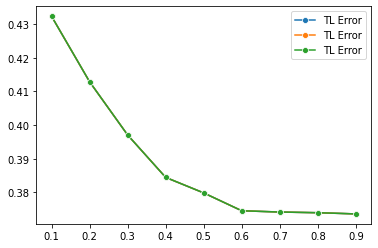

In [ ]:
sns.lineplot(x = loss_prob, y = np.array(errors_tl_h4['CO'])[:,0], markers=True, 
                  marker="o", dashes=False, label = 'TL Error')
sns.lineplot(x = loss_prob, y = np.array(errors_tl_h2['CO'])[:,0], markers=True, 
                  marker="o", dashes=False, label = 'TL Error')
sns.lineplot(x = loss_prob, y = np.array(errors_tl_h1['CO'])[:,0], markers=True, 
                  marker="o", dashes=False, label = 'TL Error')

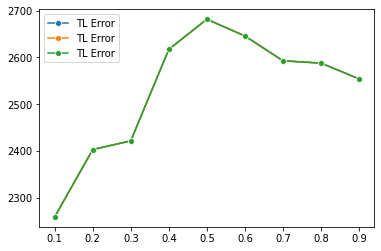

In [ ]:
sns.lineplot(x = loss_prob, y = np.array(errors_tl_h4['PM2.5'])[:,0], markers=True, 
                  marker="o", dashes=False, label = 'TL Error')
sns.lineplot(x = loss_prob, y = np.array(errors_tl_h2['PM2.5'])[:,0], markers=True, 
                  marker="o", dashes=False, label = 'TL Error')
sns.lineplot(x = loss_prob, y = np.array(errors_tl_h1['PM2.5'])[:,0], markers=True, 
                  marker="o", dashes=False, label = 'TL Error')

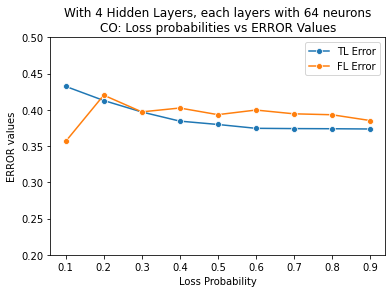

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# sns.lineplot(x = loss_prob, y = errors_tl, markers=True, dashes=False)
ax = sns.lineplot(x = loss_prob, y = np.array(errors_tl_h4['CO'])[:,0], markers=True, 
                  marker="o", dashes=False, label = 'TL Error')

ax = sns.lineplot(x = loss_prob, y = np.array(errors_fl_h4['CO'])[:,0], markers=True, 
                  marker="o", dashes=False, label = 'FL Error')

ax.set(ylim=(0.2, 0.5))

plt.legend()
plt.xlabel("Loss Probability")
plt.ylabel("ERROR values")
plt.title("With 4 Hidden Layers, each layers with 64 neurons\nCO: Loss probabilities vs ERROR Values") 
plt.show(ax)

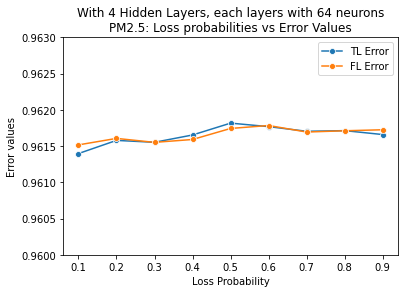

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# sns.lineplot(x = loss_prob, y = errors_tl, markers=True, dashes=False)
ax = sns.lineplot(x = loss_prob, y = np.array(errors_tl_h4['PM2.5'])[:,1], markers=True, 
                  marker="o", dashes=False, label = 'TL Error')

ax = sns.lineplot(x = loss_prob, y = np.array(errors_fl_h4['PM2.5'])[:,1], markers=True, 
                  marker="o", dashes=False, label = 'FL Error')

ax.set(ylim=(0.96, 0.963))
# ax.set(xlabel='Loss Probability', ylabel='MSE values')
plt.legend()
plt.xlabel("Loss Probability")
plt.ylabel("Error values")
plt.title("With 4 Hidden Layers, each layers with 64 neurons\nPM2.5: Loss probabilities vs Error Values") 
plt.show(ax)

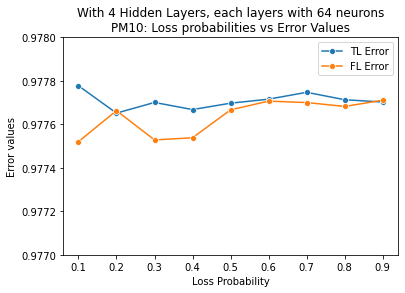

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# sns.lineplot(x = loss_prob, y = errors_tl, markers=True, dashes=False)
ax = sns.lineplot(x = loss_prob, y = np.array(errors_tl_h4['PM10'])[:,1], markers=True, 
                  marker="o", dashes=False, label = 'TL Error')

ax = sns.lineplot(x = loss_prob, y = np.array(errors_fl_h4['PM10'])[:,1], markers=True, 
                  marker="o", dashes=False, label = 'FL Error')

ax.set(ylim=(0.977, 0.978))
# ax.set(xlabel='Loss Probability', ylabel='MSE values')
plt.legend()
plt.xlabel("Loss Probability")
plt.ylabel("Error values")
plt.title("With 4 Hidden Layers, each layers with 64 neurons\nPM10: Loss probabilities vs Error Values") 
plt.show(ax)

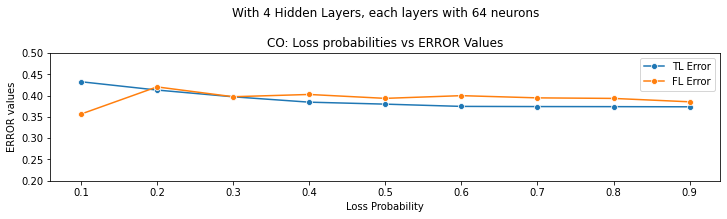

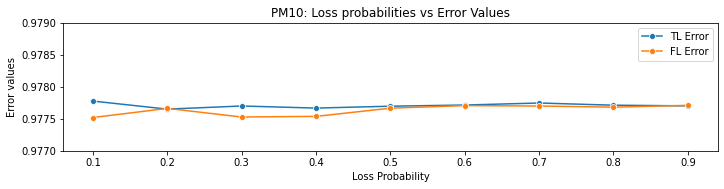

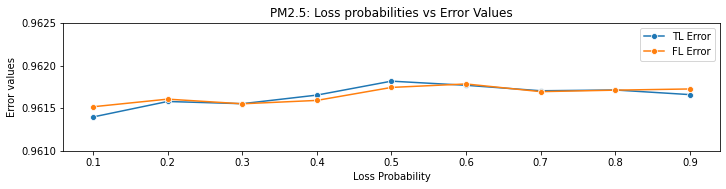

In [ ]:
plt.figure(figsize=(12, 8))
plt.title("With 4 Hidden Layers, each layer with 64 neurons")

plt.subplot(3,1,1)
ax = sns.lineplot(x = loss_prob, y = np.array(errors_tl_h4['CO'])[:,0], markers=True, 
                  marker="o", dashes=False, label = 'TL Error')

ax = sns.lineplot(x = loss_prob, y = np.array(errors_fl_h4['CO'])[:,0], markers=True, 
                  marker="o", dashes=False, label = 'FL Error')

ax.set(ylim=(0.2, 0.5))
# ax.set(xlim=(0.1, 0.9))
plt.legend()
plt.xlabel("Loss Probability")
plt.ylabel("ERROR values")
plt.title("With 4 Hidden Layers, each layers with 64 neurons\n\nCO: Loss probabilities vs ERROR Values") 
plt.show(ax)


plt.figure(figsize=(25.8, 8))
plt.subplot(3,2,1)
ax = sns.lineplot(x = loss_prob, y = np.array(errors_tl_h4['PM10'])[:,1], markers=True, 
                  marker="o", dashes=False, label = 'TL Error')

ax = sns.lineplot(x = loss_prob, y = np.array(errors_fl_h4['PM10'])[:,1], markers=True, 
                  marker="o", dashes=False, label = 'FL Error')

ax.set(ylim=(0.977, 0.979))
# ax.set(xlim=(0.1, 0.9))
# ax.set(xlabel='Loss Probability', ylabel='MSE values')
plt.legend()
plt.xlabel("Loss Probability")
plt.ylabel("Error values")
plt.title("PM10: Loss probabilities vs Error Values") 
plt.show(ax)


plt.figure(figsize=(40, 8))
plt.subplot(3,3,1)
import seaborn as sns
import matplotlib.pyplot as plt

# sns.lineplot(x = loss_prob, y = errors_tl, markers=True, dashes=False)
ax = sns.lineplot(x = loss_prob, y = np.array(errors_tl_h4['PM2.5'])[:,1], markers=True, 
                  marker="o", dashes=False, label = 'TL Error')

ax = sns.lineplot(x = loss_prob, y = np.array(errors_fl_h4['PM2.5'])[:,1], markers=True, 
                  marker="o", dashes=False, label = 'FL Error')

ax.set(ylim=(0.961, 0.9625))
# ax.set(xlim=(0.1, 0.9))
# ax.set(xlabel='Loss Probability', ylabel='MSE values')
plt.legend()
plt.xlabel("Loss Probability")
plt.ylabel("Error values")
plt.title("PM2.5: Loss probabilities vs Error Values") 
plt.show(ax)